In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

## PART - 1 : application.csv analysis

- ### Data understanding and preperation

In [4]:
# loading application.csv

app_data = pd.read_csv('application_data.csv')

In [5]:
# inspecting the dataframe

app_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0         202500.00   406597.50     24700.50        351000.00    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                        0.02       -9461           -637           -3648.00            -2120          nan           1               1                0                 1           1           0        Laborers             1.00                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.08          0.26          0.14            0.02              0.04                         0.97             0.62            0.01           0.00           0.07           0.08           0.12          0.04   
1      100003       0         Cash loans           F            N               N             0         270000.00  1293502.50     35698.50       1129500.00           Family         State servant               Higher education               Married  House / apartment                        0.00      -16765          -1188           -1186.00             -291          nan           1               1                0                 1           1           0      Core staff             2.00                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School          0.31          0.62           nan            0.10              0.05                         0.99             0.80            0.06           0.08           0.03           0.29           0.33          0.01   
2      100004       0    Revolving loans           M            Y               Y             0          67500.00   135000.00      6750.00        135000.00    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                        0.01      -19046           -225           -4260.00            -2531        26.00           1               1                1                 1           1           0        Laborers             1.00                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           nan          0.56          0.73             nan               nan                          nan              nan             nan            nan            nan            nan            nan           nan   
3      100006       0         Cash loan

In [6]:
# inspecting shape of dataframe

app_data.shape

(307511, 122)

In [7]:
# descriptive statistics of dataframe

app_data.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
count   307511.00 307511.00     307511.00         307511.00   307511.00    307499.00        307233.00                   307511.00   307511.00      307511.00          307511.00        307511.00    104582.00   307511.00       307511.00        307511.00         307511.00   307511.00   307511.00        307509.00             307511.00                    307511.00                307511.00                   307511.00                   307511.00                    307511.00               307511.00               307511.00                307511.00     134133.00     306851.00     246546.00       151450.00         127568.00                    157504.00        103023.00        92646.00      143620.00      152683.00      154491.00       98869.00     124921.00              97312.00       153161.00                 93997.00          137829.00        151450.00          127568.00                     157504.00         103023.00         92646.00       143620.00       152683.00       154491.00   
mean    278180.52      0.08          0.42         168797.92   599026.00     27108.57        538396.21                        0.02   -16037.00       63815.05           -4986.12         -2994.20        12.06        1.00            0.82             0.20              1.00        0.28        0.06             2.15                  2.05                         2.03                    12.06                        0.02                        0.05                         0.04                    0.08                    0.23                     0.18          0.50          0.51          0.51            0.12              0.09                         0.98             0.75            0.04           0.08           0.15           0.23           0.23          0.07                  0.10            0.11                     0.01               0.03             0.11               0.09                          0.98              0.76             0.04            0.07            0.15            0.22   
std     102790.18      0.27          0.72         237123.15   402490.78     14493.74        369446.46                        0.01     4363.99      141275.77            3522.89          1509.45        11.94        0.00            0.38             0.40              0.04        0.45        0.23             0.91                  0.51                         0.50                     3.27                        0.12                        0.22                         0.20                    0.27                    0.42                     0.38          0.21          0.19          0.19            0.11              0.08                         0.06             0.11            0.08           0.13           0.10           0.14           0.16          0.08                  0.09            0.11                     0.05               0.07             0.11               0.08                          0.06              0.11             0.07            0.13            0.10            0.14   
min     100002.00      0.00          0.00      

In [8]:
# inspecting dtypes and null_counts of dataframe

app_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [9]:
# percentage of null in each column

100*app_data.isnull().sum()/app_data.shape[0]

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [10]:
# dropping columns with more than 45% null values

app_data.dropna(thresh=app_data.shape[0]*0.55,how='all',axis=1, inplace=True)

In [11]:
# percentage of null in each column

100*app_data.isnull().sum()/app_data.shape[0]

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

##### The following columns have less than or near to 13% null values


- AMT_REQ_CREDIT_BUREAU_HOUR    ---13.50
- AMT_REQ_CREDIT_BUREAU_DAY     ---13.50
- AMT_REQ_CREDIT_BUREAU_WEEK    ---13.50
- AMT_REQ_CREDIT_BUREAU_MON     ---13.50
- AMT_REQ_CREDIT_BUREAU_QRT     ---13.50
- AMT_REQ_CREDIT_BUREAU_YEAR    ---13.50
- AMT_GOODS_PRICE                ---0.09
- NAME_TYPE_SUITE                ---0.42
- EXT_SOURCE_2                   ---0.21
- EXT_SOURCE_3                  ---19.83
- OBS_30_CNT_SOCIAL_CIRCLE       ---0.33
- DEF_30_CNT_SOCIAL_CIRCLE       ---0.33
- OBS_60_CNT_SOCIAL_CIRCLE       ---0.33
- DEF_60_CNT_SOCIAL_CIRCLE       ---0.33

In [12]:
app_data.shape

(307511, 73)

In [13]:
# dropping duplicates 

app_data.drop_duplicates(keep='first', inplace=True)

In [14]:
# no duplicates found since shape is same

app_data.shape

(307511, 73)

- ### Data Cleaning and Manipulation

- ##### Utility functions

In [15]:
# util function to detect outliers in a column

def outlier_detector(col_name):
    Q3 = app_data[col_name].quantile(.75)
    Q1 = app_data[col_name].quantile(.25)
    IQR = Q3 - Q1
    print('Upper :', Q3 + 3*IQR)
    print('Lower :', Q1 - 3*IQR)
    

### TARGET 

In [16]:
# checking for null 

app_data['TARGET'].isnull().sum()

0

In [17]:
# checking for value counts in percentage

app_data['TARGET'].value_counts(normalize=True)*100

0   91.93
1    8.07
Name: TARGET, dtype: float64

In [18]:
# check dtype

app_data['TARGET'].dtype

dtype('int64')

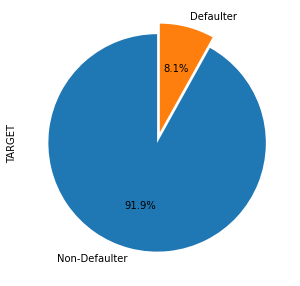

In [19]:
# plot to know the distribution

labels='Non-Defaulter', 'Defaulter'
plt.figure(figsize=(7,5))
app_data['TARGET'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=labels, startangle=90, explode=(0,0.1));

- ***Here we can see there is a data imbalance in TARGET variable. We are going to handle this issue during univariate analysis of TARGET variable***

### NAME_CONTRACT_TYPE 

In [20]:
# checking for null 

app_data['NAME_CONTRACT_TYPE'].isnull().sum()

0

In [21]:
# checking for value counts in percentage


app_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans        90.48
Revolving loans    9.52
Name: NAME_CONTRACT_TYPE, dtype: float64

In [22]:
# checking dtype

app_data['NAME_CONTRACT_TYPE'].dtype

dtype('O')

In [23]:
# changing to categorical variable

app_data['NAME_CONTRACT_TYPE'] = app_data['NAME_CONTRACT_TYPE'].astype('category')

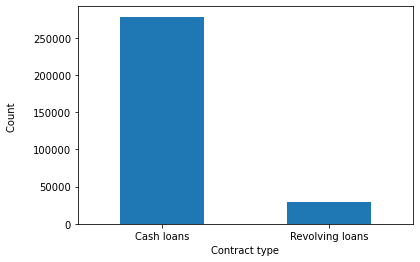

In [24]:
# plot to know the distribution

app_data['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.xlabel('Contract type')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

### CODE_GENDER 

In [25]:
# checking for null 

app_data['CODE_GENDER'].isnull().sum()

0

In [26]:
# checking for value counts 

app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [27]:
# dropping rows with 'XNA' from gender column

app_data.drop(app_data.loc[app_data['CODE_GENDER']=='XNA'].index, inplace=True)

In [28]:
# checking for value counts 

app_data['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [29]:
# checking dtype 

app_data['CODE_GENDER'].dtype

dtype('O')

In [30]:
# changing to categorical variable

app_data['CODE_GENDER'] = app_data['CODE_GENDER'].astype('category')

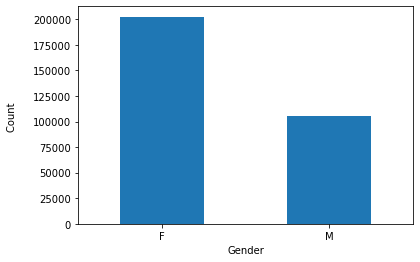

In [31]:
# plot to know the distribution

app_data['CODE_GENDER'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

### FLAG_OWN_CAR

In [32]:
# checking for null 

app_data['FLAG_OWN_CAR'].isnull().sum()

0

In [33]:
# checking for value counts in percentage

app_data['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N   65.99
Y   34.01
Name: FLAG_OWN_CAR, dtype: float64

In [34]:
# checking dtype 

app_data['FLAG_OWN_CAR'].dtype

dtype('O')

In [35]:
# changing to categorical variable

app_data['FLAG_OWN_CAR'] = app_data['FLAG_OWN_CAR'].astype('category')

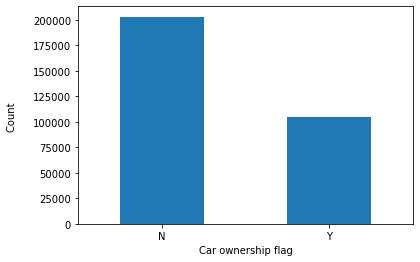

In [36]:
# plot to know the distribution

app_data['FLAG_OWN_CAR'].value_counts().plot.bar()
plt.xlabel('Car ownership flag')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

### FLAG_OWN_REALTY

In [37]:
# checking for null 

app_data['FLAG_OWN_REALTY'].isnull().sum()

0

In [38]:
# checking for value counts in percentage

app_data['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y   69.37
N   30.63
Name: FLAG_OWN_REALTY, dtype: float64

In [39]:
# checking dtype 

app_data['FLAG_OWN_REALTY'].dtype

dtype('O')

In [40]:
# changing to categorical variable

app_data['FLAG_OWN_REALTY'] = app_data['FLAG_OWN_REALTY'].astype('category')

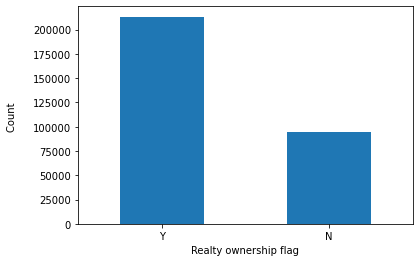

In [41]:
# plot to know the distribution

app_data['FLAG_OWN_REALTY'].value_counts().plot.bar()
plt.xlabel('Realty ownership flag')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

### CNT_CHILDREN

In [42]:
# checking for null 

app_data['CNT_CHILDREN'].isnull().sum()

0

In [43]:
# checking for value counts in percentage

app_data['CNT_CHILDREN'].value_counts(normalize=True)*100

0    70.04
1    19.88
2     8.70
3     1.21
4     0.14
5     0.03
6     0.01
7     0.00
14    0.00
19    0.00
12    0.00
10    0.00
9     0.00
8     0.00
11    0.00
Name: CNT_CHILDREN, dtype: float64

In [44]:
# checking dtype 

app_data['CNT_CHILDREN'].dtype

dtype('int64')

In [45]:
# converting to categorical dtype 

app_data['CNT_CHILDREN'] = app_data['CNT_CHILDREN'].astype('category')

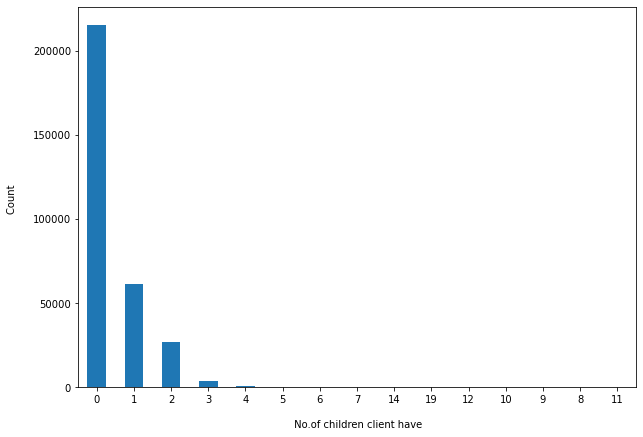

In [46]:
# plot to know the distribution

plt.figure(figsize=(10,7))
app_data['CNT_CHILDREN'].value_counts().plot.bar()
plt.xlabel('\n No.of children client have')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

### AMT_INCOME_TOTAL 

In [47]:
# checking null 

app_data['AMT_INCOME_TOTAL'].isnull().sum()

0

In [48]:
# checking dtype

app_data['AMT_INCOME_TOTAL'].dtype

dtype('float64')

In [49]:
# quantile spread

app_data['AMT_INCOME_TOTAL'].describe()

count      307507.00
mean       168797.69
std        237124.63
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

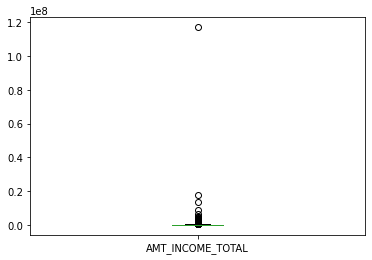

In [50]:
# box plot to check data spread

app_data['AMT_INCOME_TOTAL'].plot.box();

In [51]:
# taking data spread less than outlier point 117000000

app_data[app_data['AMT_INCOME_TOTAL']<117000000]['AMT_INCOME_TOTAL'].describe()

count     307506.00
mean      168417.75
std       108812.38
min        25650.00
25%       112500.00
50%       147150.00
75%       202500.00
max     18000090.00
Name: AMT_INCOME_TOTAL, dtype: float64

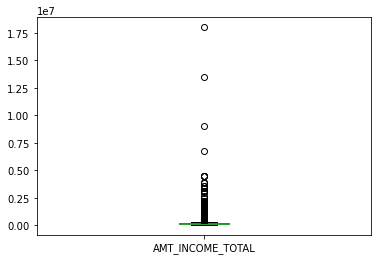

In [52]:
# checking box plot

app_data[app_data['AMT_INCOME_TOTAL']<117000000]['AMT_INCOME_TOTAL'].plot.box();

In [53]:
# detect outlier points using util function

outlier_detector('AMT_INCOME_TOTAL')

Upper : 472500.0
Lower : -157500.0


In [54]:
# taking data spread less than outlier point

app_data[app_data['AMT_INCOME_TOTAL']<472500]['AMT_INCOME_TOTAL'].describe()

count   304413.00
mean    162910.70
std      77494.30
min      25650.00
25%     112500.00
50%     144000.00
75%     202500.00
max     469800.00
Name: AMT_INCOME_TOTAL, dtype: float64

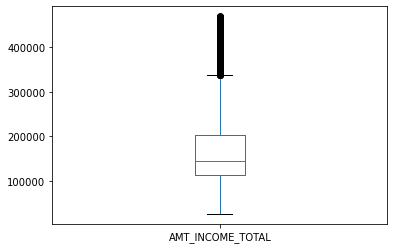

In [55]:
# checking box plot

app_data[app_data['AMT_INCOME_TOTAL']<472500]['AMT_INCOME_TOTAL'].plot.box();

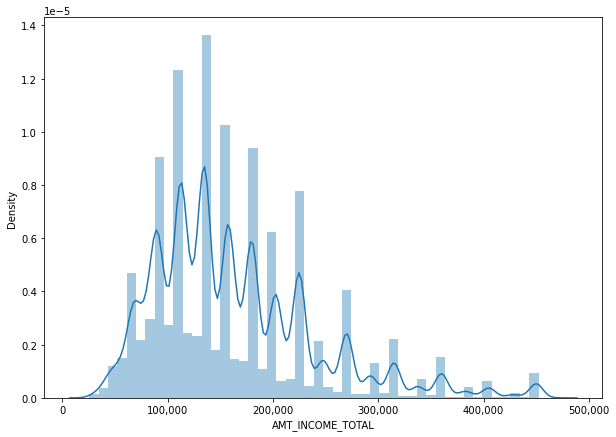

In [56]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(app_data[app_data['AMT_INCOME_TOTAL']<472500]['AMT_INCOME_TOTAL'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

In [57]:
# binning income as low, average and high based on quantiles

app_data['INCOME_GROUPS'] = pd.qcut(app_data['AMT_INCOME_TOTAL'], q=[0,.25,.75,1], labels=['low','average','high'])

In [58]:
# checking new column 

app_data['INCOME_GROUPS'].unique()

['average', 'high', 'low']
Categories (3, object): ['low' < 'average' < 'high']

### AMT_CREDIT 

In [59]:
# checking null count

app_data['AMT_CREDIT'].isnull().sum()

0

In [60]:
# checking dtype

app_data['AMT_CREDIT'].dtype

dtype('float64')

In [61]:
# checking data spread

app_data['AMT_CREDIT'].describe()

count    307507.00
mean     599028.60
std      402492.60
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

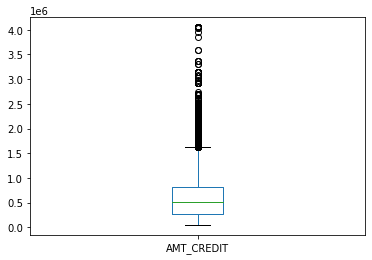

In [62]:
# box plot to check data spread

app_data['AMT_CREDIT'].plot.box();

In [63]:
# detect outlier using util function

outlier_detector('AMT_CREDIT')

Upper : 2424600.0
Lower : -1345950.0


In [64]:
# checking data spread below outlier point

app_data[app_data['AMT_CREDIT']<2500000]['AMT_CREDIT'].describe()

count    307146.00
mean     596605.44
std      396326.01
min       45000.00
25%      270000.00
50%      512995.50
75%      808650.00
max     2487091.50
Name: AMT_CREDIT, dtype: float64

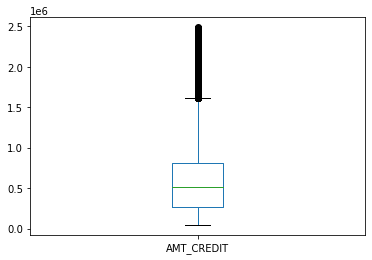

In [65]:
# checking data spread using box plot

app_data[app_data['AMT_CREDIT']<2500000]['AMT_CREDIT'].plot.box();

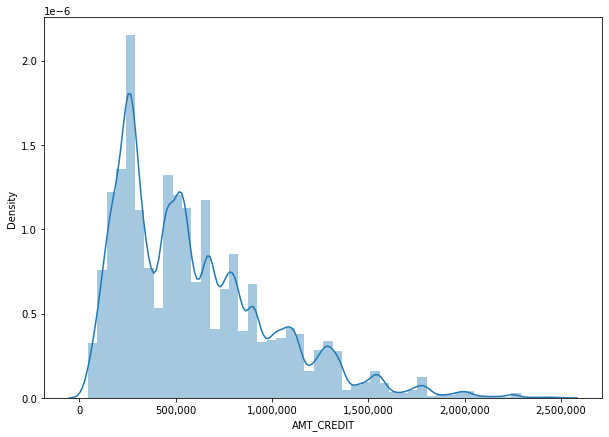

In [66]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(app_data[app_data['AMT_CREDIT']<2500000]['AMT_CREDIT'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

In [67]:
# binning credit as low, average and high based on quantiles

app_data['CREDIT_GROUPS'] = pd.qcut(app_data['AMT_CREDIT'], q=[0,.25,.75,1], labels=['low','average','high'])

In [68]:
# checking new column 

app_data['CREDIT_GROUPS'].unique()

['average', 'high', 'low']
Categories (3, object): ['low' < 'average' < 'high']

### AMT_ANNUITY 

In [69]:
# checking null count

app_data['AMT_ANNUITY'].isnull().sum()

12

In [70]:
# null count in percentage

100*app_data['AMT_ANNUITY'].isnull().sum()/app_data.shape[0]

0.00390235019040217

In [71]:
# checking dtype

app_data['AMT_ANNUITY'].dtype

dtype('float64')

In [72]:
# checking shape of data before imputing

app_data.shape

(307507, 75)

In [73]:
# since the null count is 0.003% of total data size we proceed to impute the values using 'dropna'

app_data.dropna(subset=['AMT_ANNUITY'],how='any',inplace=True)

In [74]:
# verifying imputation

app_data.shape

(307495, 75)

In [75]:
# checking quantile spread

app_data['AMT_ANNUITY'].describe()

count   307495.00
mean     27108.67
std      14493.80
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

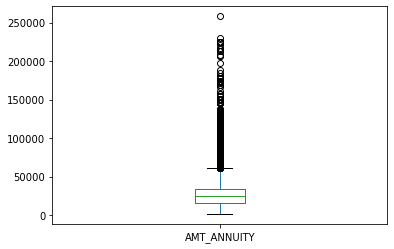

In [76]:
# checking data spread using box plot

app_data['AMT_ANNUITY'].plot.box();

In [77]:
# detect outliers

outlier_detector('AMT_ANNUITY')

Upper : 88812.0
Lower : -37692.0


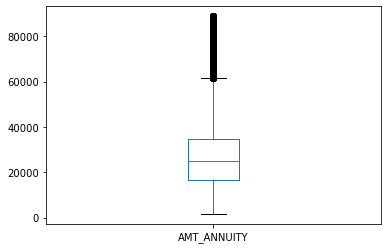

In [78]:
# checking data spread less than then oultier data point

app_data[app_data['AMT_ANNUITY']<88812]['AMT_ANNUITY'].plot.box();

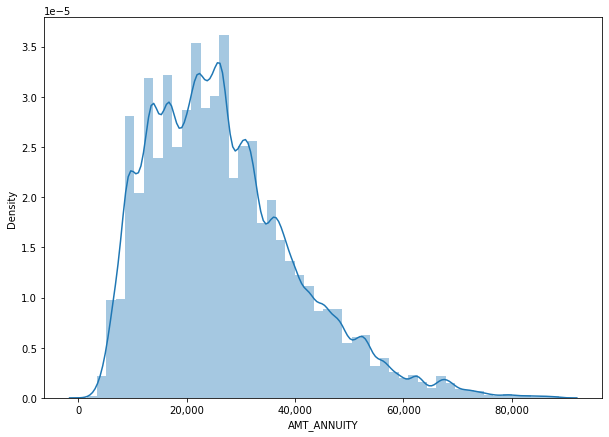

In [79]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(app_data[app_data['AMT_ANNUITY']<88812]['AMT_ANNUITY'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

### AMT_GOODS_PRICE 

In [80]:
# checking the null count

app_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [81]:
# checking percentage of null values

app_data['AMT_GOODS_PRICE'].isnull().sum()/app_data.shape[0]*100

0.09040797411340022

In [82]:
# checking dtype

app_data['AMT_GOODS_PRICE'].dtype

dtype('float64')

In [83]:
# checking shape of data before imputing

app_data.shape

(307495, 75)

In [84]:
# since the null count is 0.09% of total data size we proceed to impute the values using 'dropna'

app_data.dropna(subset=['AMT_GOODS_PRICE'],how='any',inplace=True)

In [85]:
# verifying imputation

app_data.shape

(307217, 75)

In [86]:
# checking quantile spread

app_data['AMT_GOODS_PRICE'].describe()

count    307217.00
mean     538398.86
std      369449.16
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

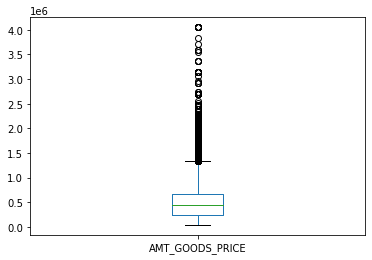

In [87]:
# checking data spread using box plot

app_data['AMT_GOODS_PRICE'].plot.box();

In [88]:
# checking outliers

outlier_detector('AMT_GOODS_PRICE')

Upper : 2002500.0
Lower : -1084500.0


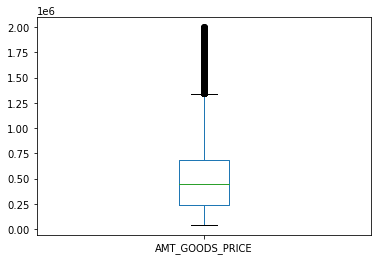

In [89]:
# checking data spread less than then oultier data point

app_data[app_data['AMT_GOODS_PRICE']<2000000]['AMT_GOODS_PRICE'].plot.box();

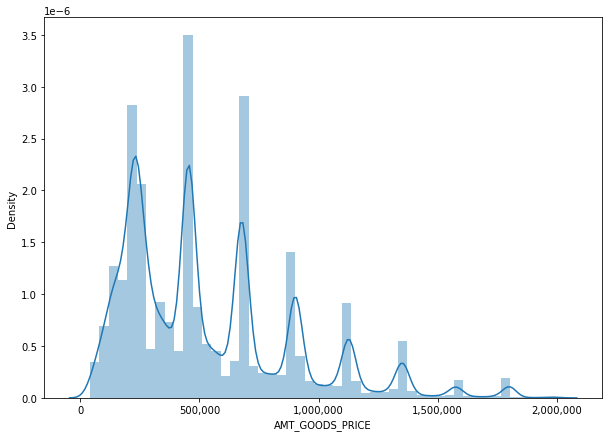

In [90]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(app_data[app_data['AMT_GOODS_PRICE']<2000000]['AMT_GOODS_PRICE'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

In [91]:
# binning consumer loan goods price as low, average and high based on quantiles

app_data['GOODS_PRICE_GROUPS'] = pd.qcut(app_data['AMT_GOODS_PRICE'], q=[0,.25,.75,1], labels=['low','average','high'])

In [92]:
# checking new column 

app_data['GOODS_PRICE_GROUPS'].unique()

['average', 'high', 'low']
Categories (3, object): ['low' < 'average' < 'high']

### NAME_TYPE_SUITE

In [93]:
# checking null count

app_data['NAME_TYPE_SUITE'].isnull().sum()

1014

In [94]:
# null count in percentage

app_data['NAME_TYPE_SUITE'].isnull().sum()/app_data.shape[0]*100

0.33005985996868664

In [95]:
# checking value counts 

app_data['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied     81.16
Family            13.11
Spouse, partner    3.71
Children           1.07
Other_B            0.58
Other_A            0.28
Group of people    0.09
Name: NAME_TYPE_SUITE, dtype: float64

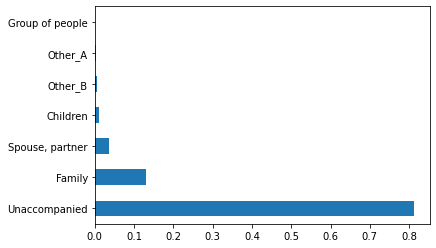

In [96]:
# plot to know the distribution

app_data['NAME_TYPE_SUITE'].value_counts(normalize=True).plot.barh();

In [97]:
# checking mode of data

app_data['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [98]:
# since the null count is 0.33% of total data size we proceed to impute the using mode of data in the column 
# using 'fillna' method

app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [99]:
# verifying imputation

app_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [100]:
# checking dtype 

app_data['NAME_TYPE_SUITE'].dtype

dtype('O')

In [101]:
# changing to categorical variable

app_data['NAME_TYPE_SUITE'] = app_data['NAME_TYPE_SUITE'].astype('category')

### NAME_INCOME_TYPE 

In [102]:
# checking null count

app_data['NAME_INCOME_TYPE'].isnull().sum()

0

In [103]:
# checking for value counts in percentage

app_data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                51.62
Commercial associate   23.29
Pensioner              18.01
State servant           7.06
Unemployed              0.01
Student                 0.01
Businessman             0.00
Maternity leave         0.00
Name: NAME_INCOME_TYPE, dtype: float64

In [104]:
# checking dtype 

app_data['NAME_INCOME_TYPE'].dtype

dtype('O')

In [105]:
# changing to categorical variable

app_data['NAME_INCOME_TYPE'] = app_data['NAME_INCOME_TYPE'].astype('category')

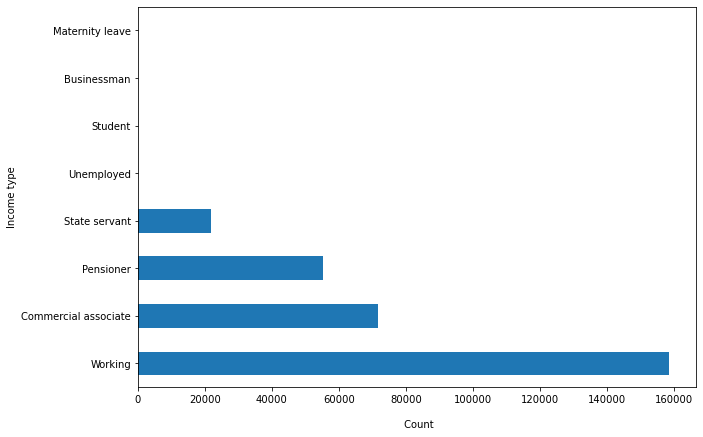

In [106]:
# plot to know the distribution

plt.figure(figsize=(10,7))
app_data['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Income type')
plt.xticks(rotation=0)
plt.show()

### NAME_EDUCATION_TYPE 

In [107]:
# checking null count

app_data['NAME_EDUCATION_TYPE'].isnull().sum()

0

In [108]:
# checking for value counts in percentage

app_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special   71.02
Higher education                24.35
Incomplete higher                3.34
Lower secondary                  1.24
Academic degree                  0.05
Name: NAME_EDUCATION_TYPE, dtype: float64

In [109]:
# checking dtype 

app_data['NAME_EDUCATION_TYPE'].dtype

dtype('O')

In [110]:
# changing to categorical variable

app_data['NAME_EDUCATION_TYPE'] = app_data['NAME_EDUCATION_TYPE'].astype('category')

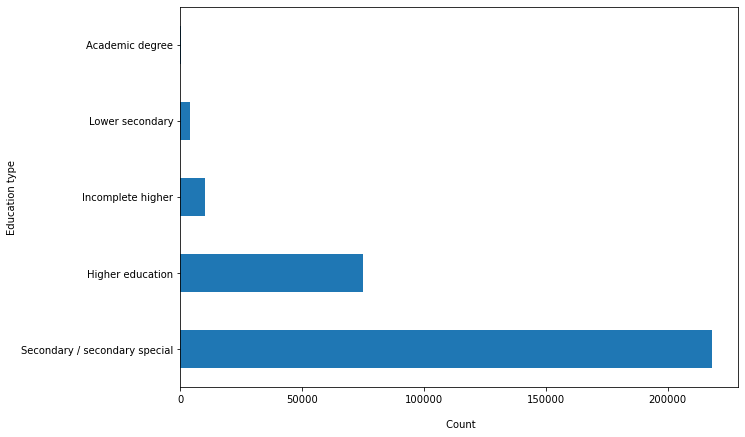

In [111]:
# plot to know the distribution

plt.figure(figsize=(10,7))
app_data['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Education type')
plt.xticks(rotation=0)
plt.show()

### NAME_FAMILY_STATUS 

In [112]:
# checking null count

app_data['NAME_FAMILY_STATUS'].isnull().sum()

0

In [113]:
# checking for value counts in percentage

app_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                63.88
Single / not married   14.77
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Name: NAME_FAMILY_STATUS, dtype: float64

In [114]:
# checking dtype 

app_data['NAME_FAMILY_STATUS'].dtype

dtype('O')

In [115]:
# changing to categorical variable

app_data['NAME_FAMILY_STATUS'] = app_data['NAME_FAMILY_STATUS'].astype('category')

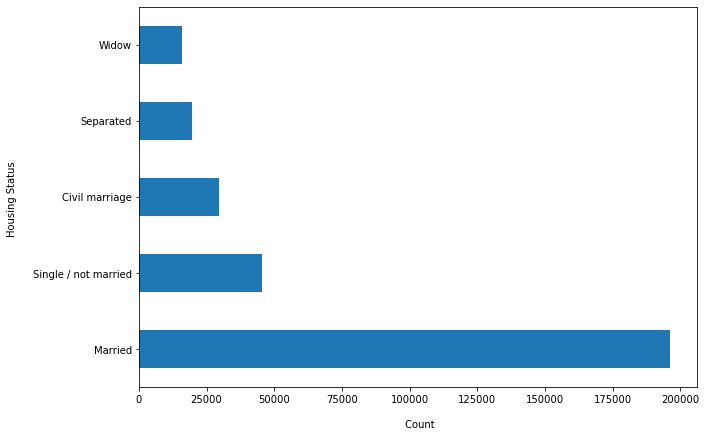

In [116]:
# plot to know the distribution

plt.figure(figsize=(10,7))
app_data['NAME_FAMILY_STATUS'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Housing Status \n')
plt.xticks(rotation=0)
plt.show()

### NAME_HOUSING_TYPE 

In [117]:
# checking null count

app_data['NAME_HOUSING_TYPE'].isnull().sum()

0

In [118]:
app_data['NAME_HOUSING_TYPE'].dtype

dtype('O')

In [119]:
# checking for value counts in percentage

app_data['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

House / apartment     88.74
With parents           4.82
Municipal apartment    3.63
Rented apartment       1.59
Office apartment       0.85
Co-op apartment        0.36
Name: NAME_HOUSING_TYPE, dtype: float64

In [120]:
# checking dtype 

app_data['NAME_HOUSING_TYPE'].dtype

dtype('O')

In [121]:
# changing to categorical variable

app_data['NAME_HOUSING_TYPE'] = app_data['NAME_HOUSING_TYPE'].astype('category')

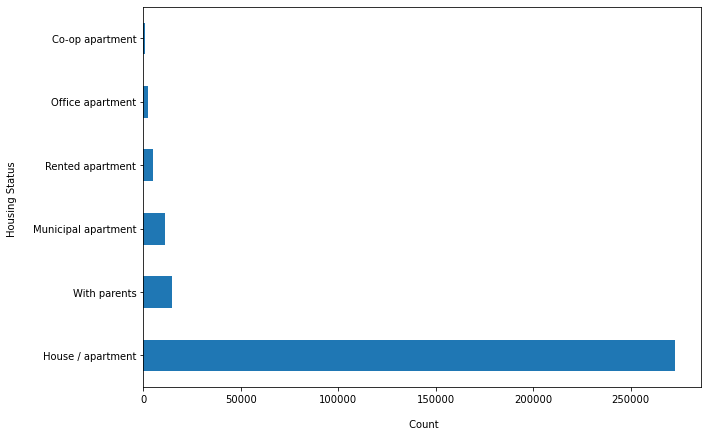

In [122]:
# plot to know the distribution

plt.figure(figsize=(10,7))
app_data['NAME_HOUSING_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Housing Status \n')
plt.xticks(rotation=0)
plt.show()

### REGION_POPULATION_RELATIVE 

In [123]:
# checking null count

app_data['REGION_POPULATION_RELATIVE'].isnull().sum()

0

In [124]:
# checking dtype 

app_data['REGION_POPULATION_RELATIVE'].dtype

dtype('float64')

In [125]:
# checking quantile spread

app_data['REGION_POPULATION_RELATIVE'].describe()

count   307217.00
mean         0.02
std          0.01
min          0.00
25%          0.01
50%          0.02
75%          0.03
max          0.07
Name: REGION_POPULATION_RELATIVE, dtype: float64

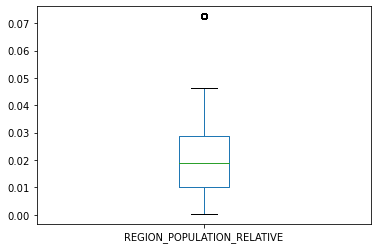

In [126]:
# checking data spread using box plot

app_data['REGION_POPULATION_RELATIVE'].plot.box();

In [127]:
# detect outlier

outlier_detector('REGION_POPULATION_RELATIVE')

Upper : 0.084634
Lower : -0.045965


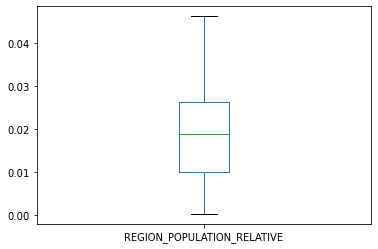

In [128]:
# checking data spread using box plot where data point greater than 0.07 is a possible outlier

app_data[app_data['REGION_POPULATION_RELATIVE']<0.07]['REGION_POPULATION_RELATIVE'].plot.box();

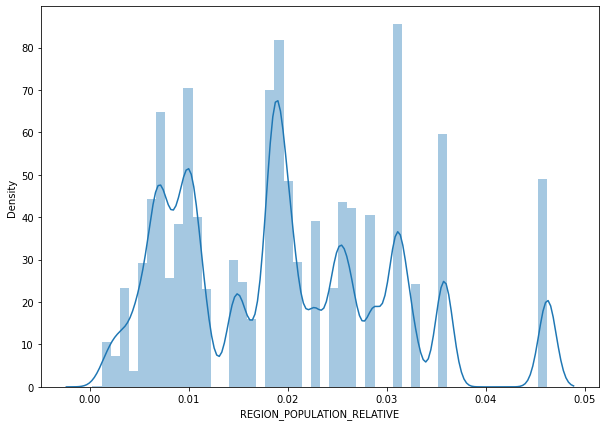

In [129]:
# plot to know the distribution

plt.figure(figsize=(10,7))
sns.distplot(app_data[app_data['REGION_POPULATION_RELATIVE']<0.07]['REGION_POPULATION_RELATIVE'])
plt.show()

### DAYS_BIRTH 

In [130]:
# checking null count

app_data['DAYS_BIRTH'].isnull().sum()

0

In [131]:
# checking dtype

app_data['DAYS_BIRTH'].dtype

dtype('int64')

In [132]:
# checking quantile spread

app_data['DAYS_BIRTH'].describe()

count   307217.00
mean    -16038.82
std       4363.85
min     -25229.00
25%     -19684.00
50%     -15753.00
75%     -12415.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

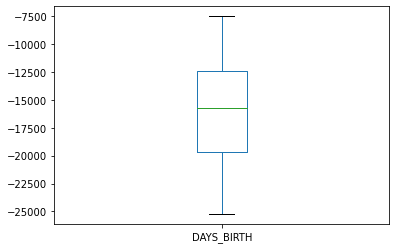

In [133]:
# checking data spread using box plot

app_data['DAYS_BIRTH'].plot.box();

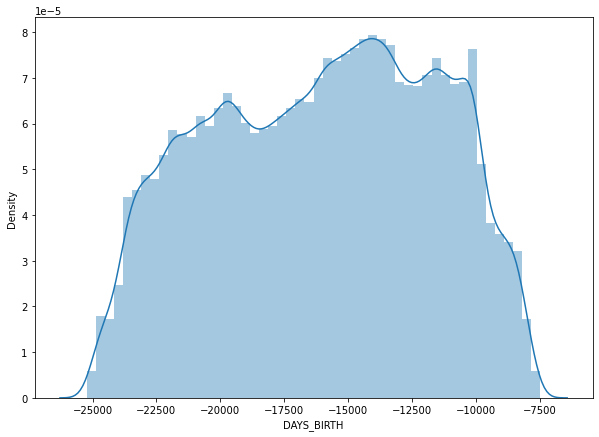

In [134]:
# plot to know the distribution

plt.figure(figsize=(10,7))
sns.distplot(app_data['DAYS_BIRTH'])
plt.show()

In [135]:
# convert days into years of age and using abs to avoid negative age values

app_data['DAYS_BIRTH'] = abs(app_data['DAYS_BIRTH']/365)

In [136]:
# checking dtype

app_data['DAYS_BIRTH'].dtype

dtype('float64')

In [137]:
# using floor method to round off to nearest integer

app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].apply(lambda x: math.floor(x))

In [138]:
# converting from float to int type

app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].astype('int')

In [139]:
# verifying conversion

app_data['DAYS_BIRTH'].dtype

dtype('int64')

In [140]:
# checking quantile spread

app_data['DAYS_BIRTH'].describe()

count   307217.00
mean        43.44
std         11.95
min         20.00
25%         34.00
50%         43.00
75%         53.00
max         69.00
Name: DAYS_BIRTH, dtype: float64

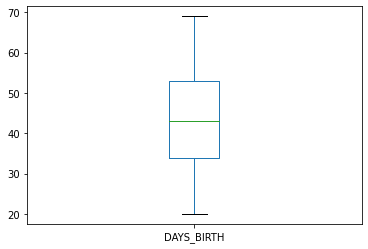

In [141]:
# checking data spread using box plot

app_data['DAYS_BIRTH'].plot.box();

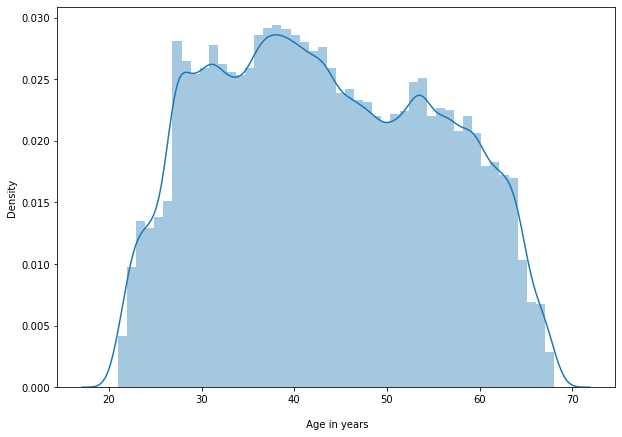

In [142]:
# plot to know the distribution

plt.figure(figsize=(10,7))
sns.distplot(app_data['DAYS_BIRTH'])
plt.xlabel('\n Age in years')
plt.show()

In [143]:
# binning into different age groups 

app_data['AGE_GROUPS'] = pd.cut(app_data['DAYS_BIRTH'], [0,20,30,40,50,60,9999], labels=['<20','20-30','30-40','40-50','50-60','60+'])

In [144]:
# checking value counts

app_data['AGE_GROUPS'].value_counts()

30-40    83023
40-50    74338
50-60    67785
20-30    52714
60+      29356
<20          1
Name: AGE_GROUPS, dtype: int64

In [145]:
# checking dtype

app_data['AGE_GROUPS'].dtype

CategoricalDtype(categories=['<20', '20-30', '30-40', '40-50', '50-60', '60+'], ordered=True)

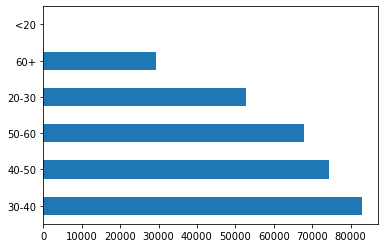

In [146]:
# plot to know the distribution

app_data['AGE_GROUPS'].value_counts().plot.barh();

### DAYS_EMPLOYED 

In [147]:
# checking null count

app_data['DAYS_EMPLOYED'].isnull().sum()

0

In [148]:
# checking dtype

app_data['DAYS_EMPLOYED'].dtype

dtype('int64')

In [149]:
# checking quantile spread

app_data['DAYS_EMPLOYED'].describe()

count   307217.00
mean     63851.98
std     141306.63
min     -17912.00
25%      -2760.00
50%      -1213.00
75%       -289.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

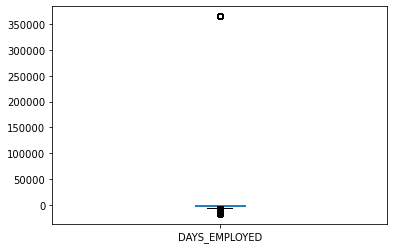

In [150]:
# checking data spread using box plot

app_data['DAYS_EMPLOYED'].plot.box();

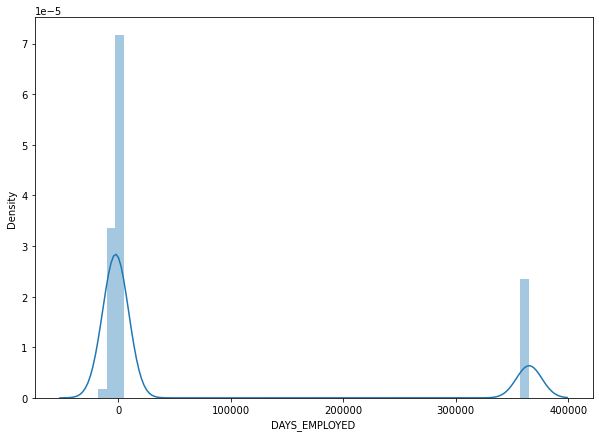

In [151]:
# plot to know the distribution

plt.figure(figsize=(10,7))
sns.distplot(app_data['DAYS_EMPLOYED'])
plt.show()

In [152]:
# converting days to years employed and using abs to avoid negative years

app_data['DAYS_EMPLOYED'] = abs(app_data['DAYS_EMPLOYED']/365)

In [153]:
# check dtype

app_data['DAYS_EMPLOYED'].dtype

dtype('float64')

In [154]:
# round off the years to nearest integer value

app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(lambda x: math.floor(x))

In [155]:
# convert float to int

app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].astype('int')

In [156]:
# verifying dtype

app_data['DAYS_EMPLOYED'].dtype

dtype('int64')

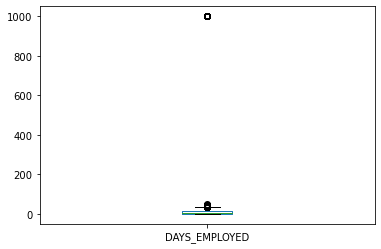

In [157]:
# checking data spread using box plot

app_data['DAYS_EMPLOYED'].plot.box();

In [158]:
# checking outliers since there are -ve values

outlier_detector('DAYS_EMPLOYED')

Upper : 54.0
Lower : -37.0


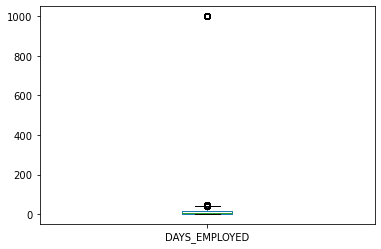

In [159]:
# checking data spread after avoiding -ve data points

app_data[(app_data['DAYS_EMPLOYED']>0)]['DAYS_EMPLOYED'].plot.box();

In [160]:
# checking percentage of -ve years

len(app_data[(app_data['DAYS_EMPLOYED']<0)]['DAYS_EMPLOYED'])/app_data.shape[0]*100


0.0

In [161]:
# checking median

int(app_data['DAYS_EMPLOYED'].median())

6

In [162]:
# since its 18% we will impute it by median of data

app_data['DAYS_EMPLOYED'][app_data['DAYS_EMPLOYED'] < 0] = int(app_data['DAYS_EMPLOYED'].median())

In [163]:
# checking percentage of -ve years

len(app_data[(app_data['DAYS_EMPLOYED']<0)]['DAYS_EMPLOYED'])/app_data.shape[0]*100


0.0

In [164]:
# checking dtype

app_data['DAYS_EMPLOYED'].dtype

dtype('int64')

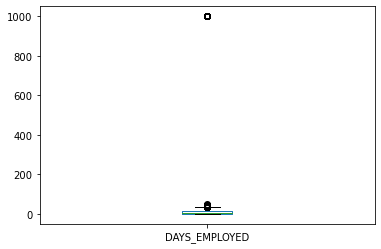

In [165]:
# checking data spread after avoiding -ve data points

app_data['DAYS_EMPLOYED'].plot.box();

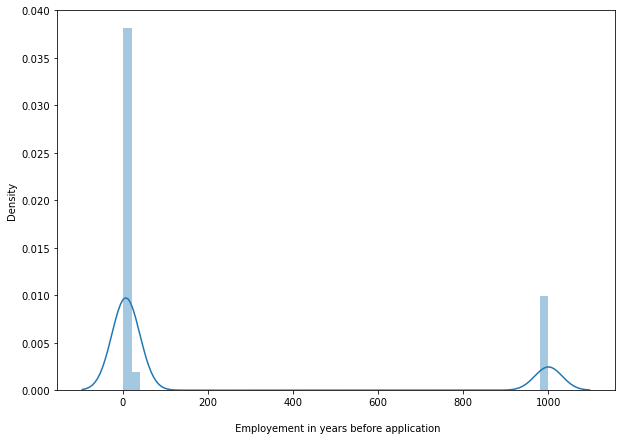

In [166]:
# plot to know the distribution

plt.figure(figsize=(10,7))
sns.distplot(app_data[(app_data['DAYS_EMPLOYED']>0)]['DAYS_EMPLOYED'])
plt.xlabel('\n Employement in years before application')
plt.show()

In [167]:
# binning into different working experince groups 
 
app_data['EMP_EXP_GROUPS'] = pd.cut(app_data['DAYS_EMPLOYED'], [-9999,5,10,20,30,9999], labels=['<5','5-10','10-20','20-30','30+'])

In [168]:
# checking value counts

app_data['EMP_EXP_GROUPS'].value_counts()

<5       152370
30+       57897
5-10      55922
10-20     32622
20-30      8406
Name: EMP_EXP_GROUPS, dtype: int64

### OCCUPATION_TYPE 


In [169]:
# checking null count

app_data['OCCUPATION_TYPE'].isnull().sum()

96332

In [170]:
# checking dtype

app_data['OCCUPATION_TYPE'].dtype

dtype('O')

In [171]:
# null count in percentage

app_data['OCCUPATION_TYPE'].isnull().sum()/app_data.shape[0]*100

31.356337702666192

In [172]:
# checking for value counts in percentage

app_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                26.14
Sales staff             15.20
Core staff              13.05
Managers                10.12
Drivers                  8.81
High skill tech staff    5.39
Accountants              4.65
Medicine staff           4.04
Security staff           3.18
Cooking staff            2.82
Cleaning staff           2.20
Private service staff    1.26
Low-skill Laborers       0.99
Waiters/barmen staff     0.64
Secretaries              0.62
Realty agents            0.36
HR staff                 0.27
IT staff                 0.25
Name: OCCUPATION_TYPE, dtype: float64

In [173]:
# checking mode of data

app_data['OCCUPATION_TYPE'].mode()

0    Laborers
dtype: object

In [174]:
# since replacing almost 30% null records with mode of data can cause data imbalance 
# hence tagging null values as 'NA'

app_data['OCCUPATION_TYPE'].fillna('NA', inplace=True)

In [175]:
# checking for value counts in percentage

app_data['OCCUPATION_TYPE'].value_counts(normalize=True)*100

NA                      31.36
Laborers                17.95
Sales staff             10.44
Core staff               8.96
Managers                 6.95
Drivers                  6.05
High skill tech staff    3.70
Accountants              3.19
Medicine staff           2.78
Security staff           2.18
Cooking staff            1.93
Cleaning staff           1.51
Private service staff    0.86
Low-skill Laborers       0.68
Waiters/barmen staff     0.44
Secretaries              0.42
Realty agents            0.24
HR staff                 0.18
IT staff                 0.17
Name: OCCUPATION_TYPE, dtype: float64

In [176]:
# convert to integer type

app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].astype('category')

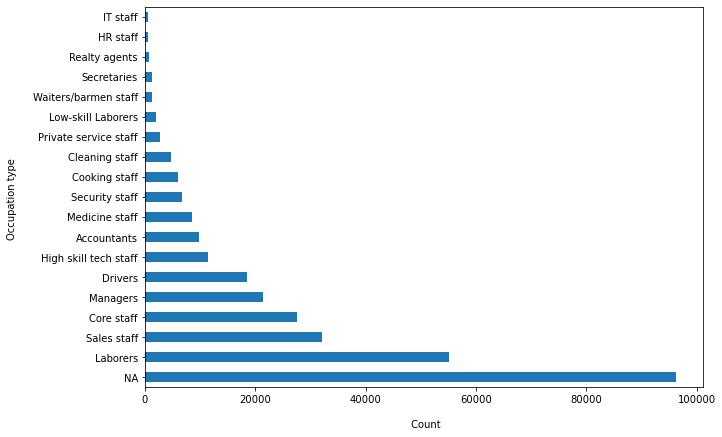

In [177]:
# plot to know the distribution

plt.figure(figsize=(10,7))
app_data['OCCUPATION_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Occupation type \n')
plt.xticks(rotation=0)
plt.show()

### CNT_FAM_MEMBERS

In [178]:
# checking null count

app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [179]:
# checking dtype

app_data['CNT_FAM_MEMBERS'].dtype

dtype('float64')

In [180]:
# convert to integer type

app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype('int')

In [181]:
# checking for value counts

app_data['CNT_FAM_MEMBERS'].value_counts()

2     158217
1      67781
3      52546
4      24673
5       3472
6        407
7         81
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [182]:
# converting to categorical dtype 

app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype('category')

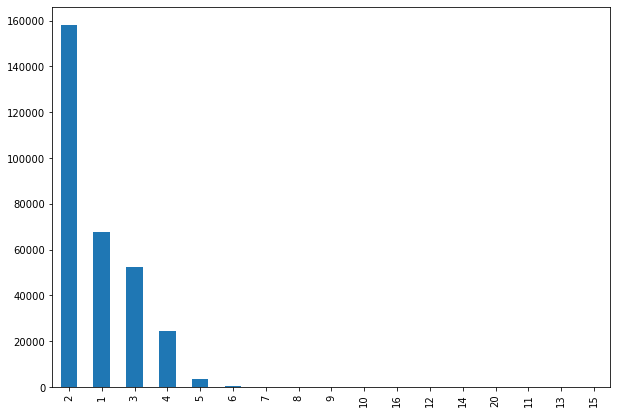

In [183]:
# plot to know the distribution

plt.figure(figsize=(10,7))
app_data['CNT_FAM_MEMBERS'].value_counts().plot.bar()
plt.show()

### REGION_RATING_CLIENT 

In [184]:
# checking null count

app_data['REGION_RATING_CLIENT'].isnull().sum()

0

In [185]:
# checking dtype

app_data['REGION_RATING_CLIENT'].dtype

dtype('int64')

In [186]:
# convert to categorical type

app_data['REGION_RATING_CLIENT'] = app_data['REGION_RATING_CLIENT'].astype('category')

In [187]:
# checking for value counts in percentage

app_data['REGION_RATING_CLIENT'].value_counts(normalize=True)*100

2   73.81
3   15.72
1   10.47
Name: REGION_RATING_CLIENT, dtype: float64

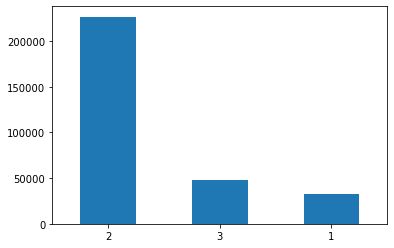

In [188]:
# plot to know the distribution

app_data['REGION_RATING_CLIENT'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

### ORGANIZATION_TYPE 

In [189]:
# checking null count

app_data['ORGANIZATION_TYPE'].isnull().sum()

0

In [190]:
# checking dtype

app_data['ORGANIZATION_TYPE'].dtype

dtype('O')

In [191]:
# converting to categorical variable

app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].astype('category')

In [192]:
# checking for value counts in percentage

app_data['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

Business Entity Type 3   22.11
XNA                      18.02
Self-employed            12.49
Other                     5.43
Medicine                  3.64
Business Entity Type 2    3.43
Government                3.38
School                    2.89
Trade: type 7             2.55
Kindergarten              2.24
Construction              2.19
Business Entity Type 1    1.95
Transport: type 4         1.76
Trade: type 3             1.14
Industry: type 9          1.10
Industry: type 3          1.07
Security                  1.05
Housing                   0.96
Industry: type 11         0.88
Military                  0.86
Bank                      0.82
Agriculture               0.80
Police                    0.76
Transport: type 2         0.72
Postal                    0.70
Security Ministries       0.64
Trade: type 2             0.62
Restaurant                0.59
Services                  0.51
University                0.43
Industry: type 7          0.43
Transport: type 3         0.39
Industry

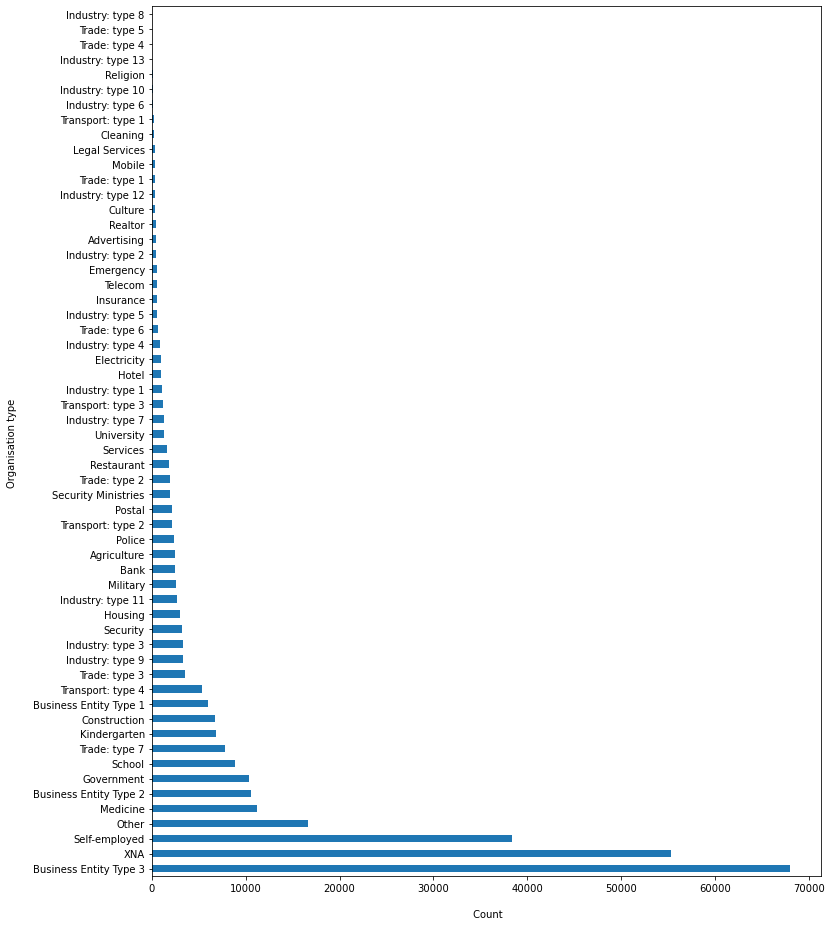

In [193]:
# plot to know the distribution

plt.figure(figsize=(12,16))
app_data['ORGANIZATION_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Organisation type \n')
plt.xticks(rotation=0)
plt.show()

### EXT_SOURCE_2

In [194]:
# checking null count

app_data['EXT_SOURCE_2'].isnull().sum()

659

In [195]:
# null count in percentage

app_data['EXT_SOURCE_2'].isnull().sum()/app_data.shape[0]*100

0.21450635869759813

In [196]:
# check dtype

app_data['EXT_SOURCE_2'].dtype

dtype('float64')

In [197]:
# checking quantile spread

app_data['EXT_SOURCE_2'].describe()

count   306558.00
mean         0.51
std          0.19
min          0.00
25%          0.39
50%          0.57
75%          0.66
max          0.85
Name: EXT_SOURCE_2, dtype: float64

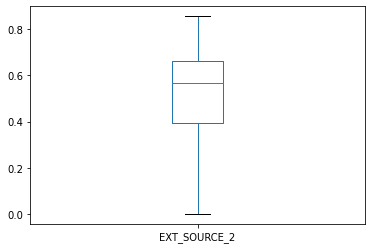

In [198]:
# checking data spread using box plot

app_data['EXT_SOURCE_2'].plot.box();

In [199]:
# since the percentage of null values are 0.21% of total data, then replacing null with median will be suitable

app_data['EXT_SOURCE_2'].fillna(app_data['EXT_SOURCE_2'].median(), inplace=True)

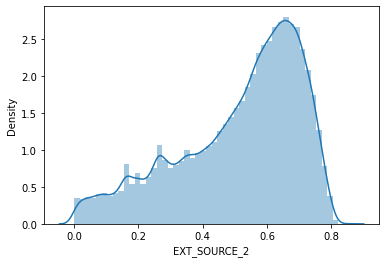

In [200]:
# plot to know the distribution

sns.distplot(app_data['EXT_SOURCE_2'])
plt.show()

### EXT_SOURCE_3

In [201]:
# checking null count

app_data['EXT_SOURCE_3'].isnull().sum()

60896

In [202]:
# null count in percentage

app_data['EXT_SOURCE_3'].isnull().sum()/app_data.shape[0]*100

19.821819756068187

In [203]:
# check dtype

app_data['EXT_SOURCE_3'].dtype

dtype('float64')

In [204]:
# checking quantile spread

app_data['EXT_SOURCE_3'].describe()

count   246321.00
mean         0.51
std          0.19
min          0.00
25%          0.37
50%          0.54
75%          0.67
max          0.90
Name: EXT_SOURCE_3, dtype: float64

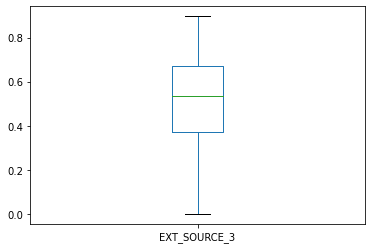

In [205]:
# checking data spread using box plot

app_data['EXT_SOURCE_3'].plot.box();

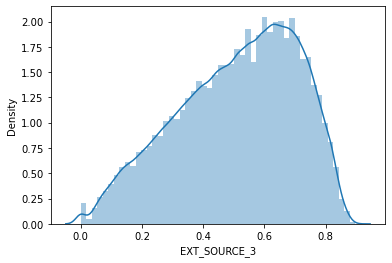

In [206]:
# plot to know the distribution

sns.distplot(app_data['EXT_SOURCE_3'])
plt.show()

- ***Since replacing almost 20% of null values in a skewed distribution like above can cause more skweness to data. Hence deciding to remove the column***

In [207]:
# dropping the column

app_data.drop('EXT_SOURCE_3', axis=1, inplace=True)

- **OBS_30_CNT_SOCIAL_CIRCLE**
- **DEF_30_CNT_SOCIAL_CIRCLE**
- **OBS_60_CNT_SOCIAL_CIRCLE**
- **DEF_60_CNT_SOCIAL_CIRCLE**

In [208]:
# checking null count in percentage for each column

columns =['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

for col in columns:
    print(f"Percentage of null values in {col} ",app_data[col].isnull().sum()/app_data.shape[0]*100, '\n')

Percentage of null values in OBS_30_CNT_SOCIAL_CIRCLE  0.3323383797120602 

Percentage of null values in DEF_30_CNT_SOCIAL_CIRCLE  0.3323383797120602 

Percentage of null values in OBS_60_CNT_SOCIAL_CIRCLE  0.3323383797120602 

Percentage of null values in DEF_60_CNT_SOCIAL_CIRCLE  0.3323383797120602 



In [209]:
# checking dtype for each column

for col in columns:
    print(f"dtype in {col} ",app_data[col].dtype, '\n')

dtype in OBS_30_CNT_SOCIAL_CIRCLE  float64 

dtype in DEF_30_CNT_SOCIAL_CIRCLE  float64 

dtype in OBS_60_CNT_SOCIAL_CIRCLE  float64 

dtype in DEF_60_CNT_SOCIAL_CIRCLE  float64 



In [210]:
# checking value counts in each column

for col in columns:
    print(app_data[col].value_counts(normalize=True)*100, '\n')

0.00     53.48
1.00     15.92
2.00      9.73
3.00      6.63
4.00      4.62
5.00      3.12
6.00      2.11
7.00      1.43
8.00      0.97
9.00      0.65
10.00     0.45
11.00     0.28
12.00     0.21
13.00     0.13
14.00     0.08
15.00     0.05
16.00     0.04
17.00     0.03
18.00     0.02
19.00     0.01
20.00     0.01
21.00     0.01
22.00     0.01
23.00     0.00
24.00     0.00
25.00     0.00
27.00     0.00
26.00     0.00
30.00     0.00
28.00     0.00
348.00    0.00
29.00     0.00
47.00     0.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64 

0.00    88.53
1.00     9.24
2.00     1.74
3.00     0.39
4.00     0.08
5.00     0.02
6.00     0.00
7.00     0.00
8.00     0.00
34.00    0.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64 

0.00     53.72
1.00     15.94
2.00      9.71
3.00      6.60
4.00      4.55
5.00      3.09
6.00      2.07
7.00      1.42
8.00      0.94
9.00      0.64
10.00     0.44
11.00     0.27
12.00     0.20
13.00     0.13
14.00     0.08
15.00     0.05
16.00     0.04
17.00     0.

In [211]:
# since each column data consists of 0.32% null we are dropping those using 'dropna' method

for col in columns:
    app_data.dropna(subset=[col],how='any',axis=0,inplace=True)

In [212]:
# checking shape

app_data.shape

(306196, 77)

In [213]:
# converting to int type

for col in columns:
    app_data[col] = app_data[col].astype('int')

In [214]:
# checking dtype for each column

for col in columns:
    print(f"dtype in {col} ",app_data[col].dtype, '\n')

dtype in OBS_30_CNT_SOCIAL_CIRCLE  int64 

dtype in DEF_30_CNT_SOCIAL_CIRCLE  int64 

dtype in OBS_60_CNT_SOCIAL_CIRCLE  int64 

dtype in DEF_60_CNT_SOCIAL_CIRCLE  int64 



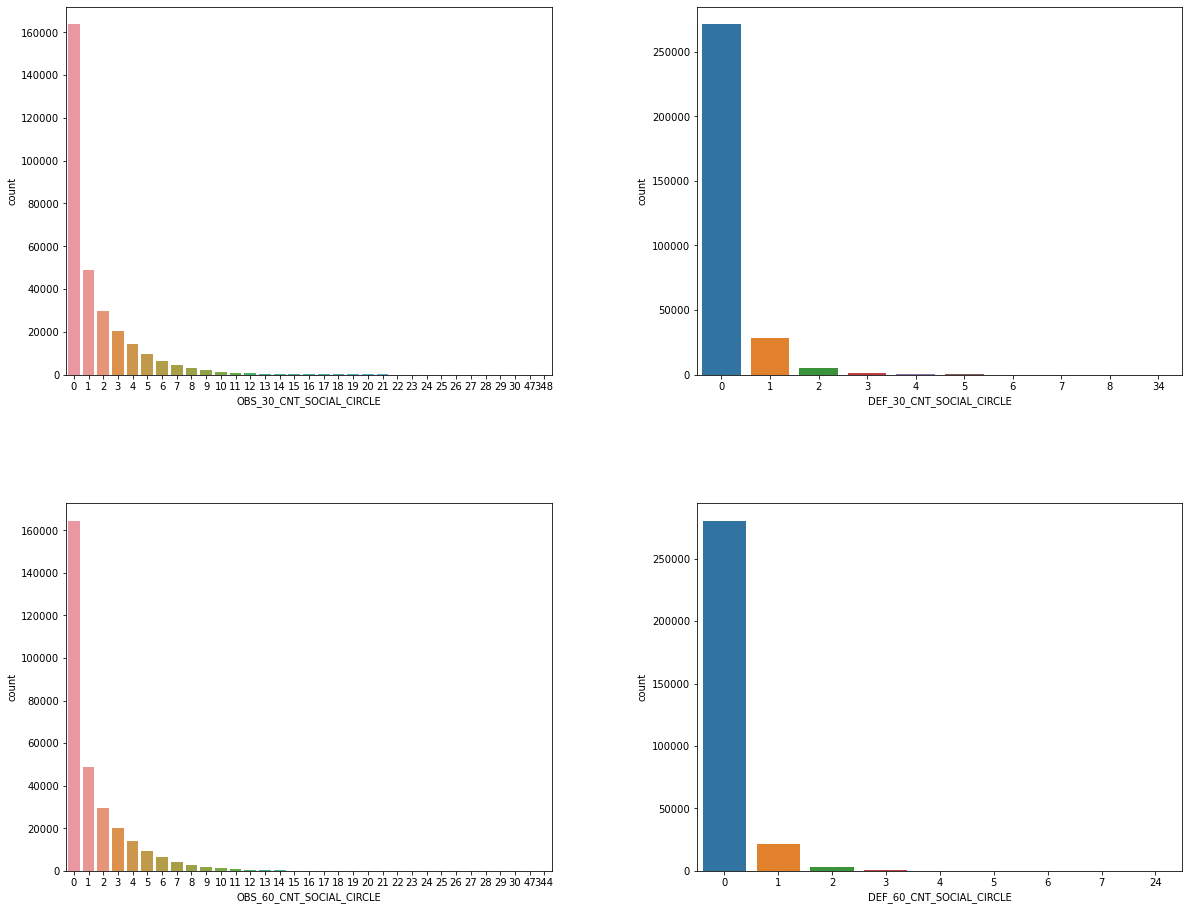

In [215]:
# plot to know the distribution

fig, axes = plt.subplots(2,2, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(len(columns)), axes.flat):
    sns.countplot(app_data[columns[i]], ax=ax)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
plt.show()

### FLAG_DOCUMENT 

In [216]:
# checking null count

for i in range(2,22):
    print(f"Null values in FLAG_DOCUMENT_{i} :-",app_data[f'FLAG_DOCUMENT_{i}'].isnull().sum(),"\n")
    

Null values in FLAG_DOCUMENT_2 :- 0 

Null values in FLAG_DOCUMENT_3 :- 0 

Null values in FLAG_DOCUMENT_4 :- 0 

Null values in FLAG_DOCUMENT_5 :- 0 

Null values in FLAG_DOCUMENT_6 :- 0 

Null values in FLAG_DOCUMENT_7 :- 0 

Null values in FLAG_DOCUMENT_8 :- 0 

Null values in FLAG_DOCUMENT_9 :- 0 

Null values in FLAG_DOCUMENT_10 :- 0 

Null values in FLAG_DOCUMENT_11 :- 0 

Null values in FLAG_DOCUMENT_12 :- 0 

Null values in FLAG_DOCUMENT_13 :- 0 

Null values in FLAG_DOCUMENT_14 :- 0 

Null values in FLAG_DOCUMENT_15 :- 0 

Null values in FLAG_DOCUMENT_16 :- 0 

Null values in FLAG_DOCUMENT_17 :- 0 

Null values in FLAG_DOCUMENT_18 :- 0 

Null values in FLAG_DOCUMENT_19 :- 0 

Null values in FLAG_DOCUMENT_20 :- 0 

Null values in FLAG_DOCUMENT_21 :- 0 



In [217]:
# checking dtype of each column

for i in range(2,22):
    print(f"dtype in FLAG_DOCUMENT_{i} :-",app_data[f'FLAG_DOCUMENT_{i}'].dtype,"\n")
    

dtype in FLAG_DOCUMENT_2 :- int64 

dtype in FLAG_DOCUMENT_3 :- int64 

dtype in FLAG_DOCUMENT_4 :- int64 

dtype in FLAG_DOCUMENT_5 :- int64 

dtype in FLAG_DOCUMENT_6 :- int64 

dtype in FLAG_DOCUMENT_7 :- int64 

dtype in FLAG_DOCUMENT_8 :- int64 

dtype in FLAG_DOCUMENT_9 :- int64 

dtype in FLAG_DOCUMENT_10 :- int64 

dtype in FLAG_DOCUMENT_11 :- int64 

dtype in FLAG_DOCUMENT_12 :- int64 

dtype in FLAG_DOCUMENT_13 :- int64 

dtype in FLAG_DOCUMENT_14 :- int64 

dtype in FLAG_DOCUMENT_15 :- int64 

dtype in FLAG_DOCUMENT_16 :- int64 

dtype in FLAG_DOCUMENT_17 :- int64 

dtype in FLAG_DOCUMENT_18 :- int64 

dtype in FLAG_DOCUMENT_19 :- int64 

dtype in FLAG_DOCUMENT_20 :- int64 

dtype in FLAG_DOCUMENT_21 :- int64 



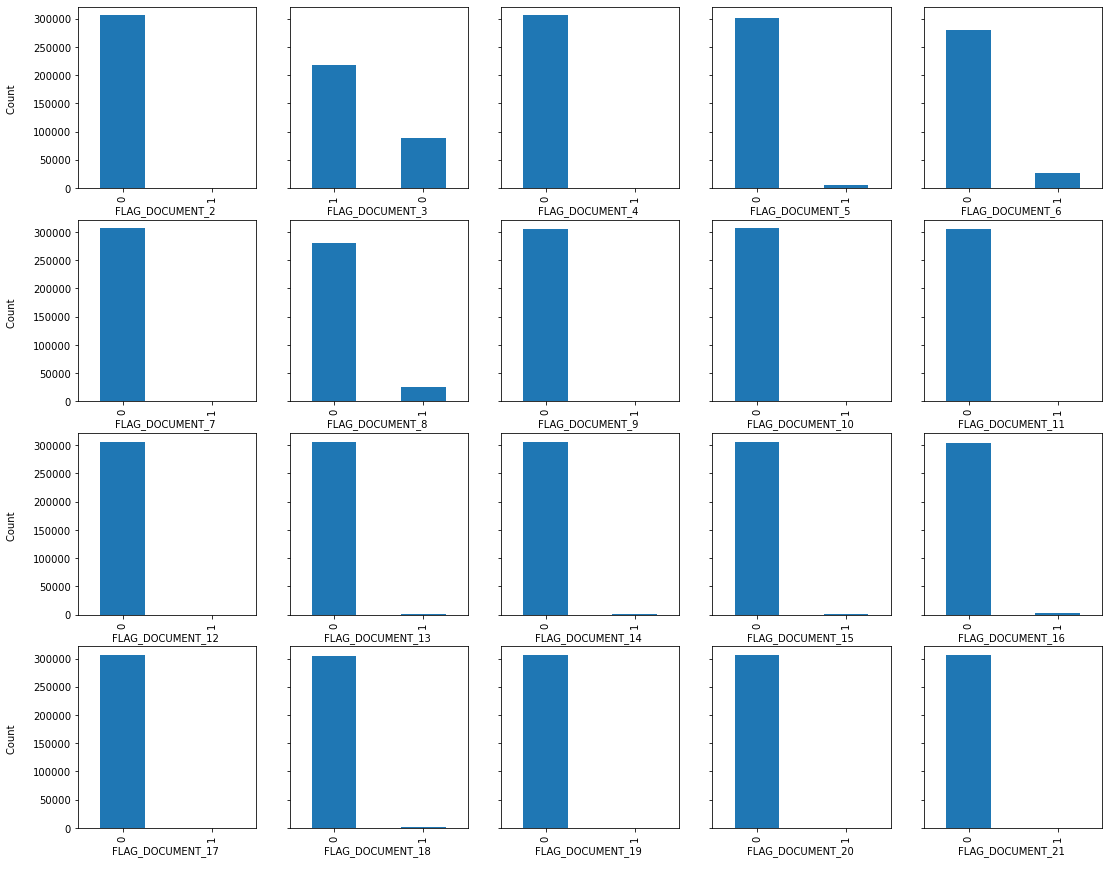

In [218]:
# plot to know the distribution

fig, axes = plt.subplots(4,5, figsize=(15,12),  sharey=True)
fig.tight_layout()

for i, ax in zip(range(2,22), axes.flat):
    app_data[f'FLAG_DOCUMENT_{i}'].value_counts().plot.bar(ax=ax)
    ax.set_ylabel('Count \n')
    ax.set_xlabel(f'FLAG_DOCUMENT_{i} \n')
plt.show()

### AMT_REQ_CREDIT_BUREAU columns

In [219]:
# checking null count in percentage for each column

cols = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in cols:
    print(f"Percentage of null values in {col} ",app_data[col].isnull().sum()/app_data.shape[0]*100, '\n')

Percentage of null values in AMT_REQ_CREDIT_BUREAU_HOUR  13.488745770682831 

Percentage of null values in AMT_REQ_CREDIT_BUREAU_DAY  13.488745770682831 

Percentage of null values in AMT_REQ_CREDIT_BUREAU_WEEK  13.488745770682831 

Percentage of null values in AMT_REQ_CREDIT_BUREAU_MON  13.488745770682831 

Percentage of null values in AMT_REQ_CREDIT_BUREAU_QRT  13.488745770682831 

Percentage of null values in AMT_REQ_CREDIT_BUREAU_YEAR  13.488745770682831 



In [220]:
# checking dtype for each column

for col in cols:
    print(f"dtype in {col} ",app_data[col].dtype, '\n')

dtype in AMT_REQ_CREDIT_BUREAU_HOUR  float64 

dtype in AMT_REQ_CREDIT_BUREAU_DAY  float64 

dtype in AMT_REQ_CREDIT_BUREAU_WEEK  float64 

dtype in AMT_REQ_CREDIT_BUREAU_MON  float64 

dtype in AMT_REQ_CREDIT_BUREAU_QRT  float64 

dtype in AMT_REQ_CREDIT_BUREAU_YEAR  float64 



In [221]:
# checking value counts in each column

for col in cols:
    print(app_data[col].value_counts(normalize=True)*100, '\n')

0.00   99.39
1.00    0.59
2.00    0.02
3.00    0.00
4.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64 

0.00   99.44
1.00    0.49
2.00    0.04
3.00    0.02
4.00    0.01
5.00    0.00
6.00    0.00
9.00    0.00
8.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64 

0.00   96.79
1.00    3.09
2.00    0.08
3.00    0.02
4.00    0.01
6.00    0.01
5.00    0.00
8.00    0.00
7.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64 

0.00    83.53
1.00    12.48
2.00     2.03
3.00     0.75
4.00     0.41
5.00     0.23
6.00     0.13
7.00     0.11
9.00     0.08
8.00     0.07
10.00    0.05
11.00    0.04
12.00    0.03
13.00    0.03
14.00    0.02
15.00    0.01
16.00    0.01
17.00    0.01
18.00    0.00
19.00    0.00
24.00    0.00
27.00    0.00
22.00    0.00
23.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64 

0.00     80.97
1.00     12.75
2.00      5.42
3.00      0.65
4.00      0.18
5.00      0.02
6.00      0.01
7.00      0.00
8.00      0.00
19.00     0.00
261.00    0.0

In [222]:
# since each column data consists of 13% null we are dropping those using 'dropna' method

for col in cols:
    app_data.dropna(subset=[col],how='any',axis=0,inplace=True)

In [223]:
# checking shape

app_data.shape

(264894, 77)

In [224]:
# converting to int type

for col in cols:
    app_data[col] = app_data[col].astype('int')

In [225]:
# checking dtype for each column

for col in cols:
    print(f"dtype in {col} ",app_data[col].dtype, '\n')

dtype in AMT_REQ_CREDIT_BUREAU_HOUR  int64 

dtype in AMT_REQ_CREDIT_BUREAU_DAY  int64 

dtype in AMT_REQ_CREDIT_BUREAU_WEEK  int64 

dtype in AMT_REQ_CREDIT_BUREAU_MON  int64 

dtype in AMT_REQ_CREDIT_BUREAU_QRT  int64 

dtype in AMT_REQ_CREDIT_BUREAU_YEAR  int64 



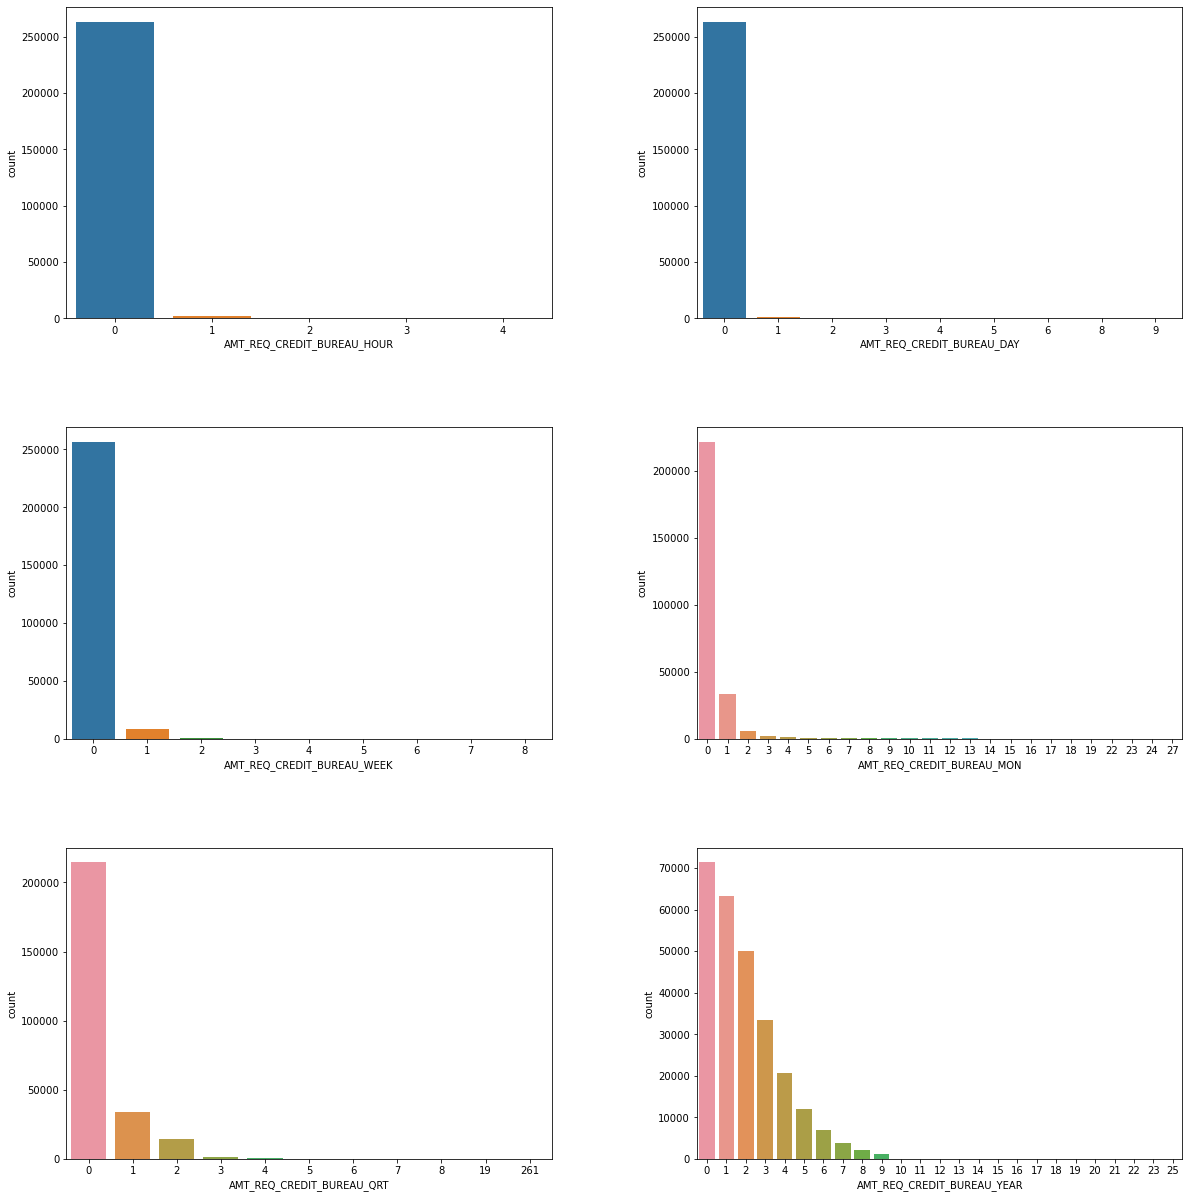

In [226]:
# plot to know the distribution

fig, axes = plt.subplots(3,2, figsize=(20,20))
fig.tight_layout()

for i, ax in zip(range(len(cols)), axes.flat):
    sns.countplot(app_data[cols[i]], ax=ax)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
plt.show()

In [227]:
# count of null in each column

app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

- ## Univariate Analysis 

- ***Utility functions for plotting***

In [228]:
# util function to plot categorical variables using countplot

def categorical_plots(col_name, defaulter, non_defaulter, fig_size, rot=0):
    plt.figure(figsize=fig_size)
    
    plt.subplot(1,2,1)
    plt.title('Defaulter')
    bplot_1 = sns.countplot(x=col_name, data=defaulter)
    for p in bplot_1.patches:
        bplot_1.annotate(text = "{:.2f}%".format(float(p.get_height()/defaulter.shape[0]*100)), 
                       xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 6), 
                       textcoords = 'offset points')
        
    plt.xticks(rotation = rot)
    
    plt.subplot(1,2,2)
    plt.title('Non-Defaulter')
    bplot_2 = sns.countplot(x=col_name, data=non_defaulter)
    for p in bplot_2.patches:
        bplot_2.annotate(text = "{:.2f}%".format(float(p.get_height()/non_defaulter.shape[0]*100)), 
                       xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 6), 
                       textcoords = 'offset points')
    plt.xticks(rotation = rot)

    
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)
    
    plt.show()
    

# util function to plot continous variables using distplot

def continous_plots(data_1, data_2, fig_size):
    plt.figure(figsize=fig_size)
    
    sns.distplot(data_1, hist=False, label='Defaulter')
    sns.distplot(data_2, hist=False, label='Non-Defaulter')
    
    plt.legend()
    
    plt.show()
    
    

### TARGET variable analysis

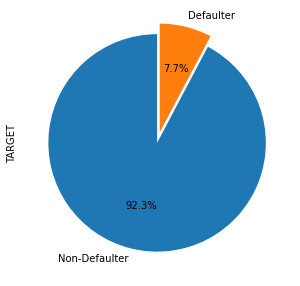

In [229]:
labels='Non-Defaulter', 'Defaulter'
plt.figure(figsize=(7,5))
app_data['TARGET'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',labels=labels, startangle=90, explode=(0,0.1));

-  ***Dividing data into defaulter and non_defaulter dataframes due to data imbalance***

In [230]:
defaulter = app_data[app_data['TARGET']==1]
non_defaulter = app_data[app_data['TARGET']==0]

In [231]:
defaulter.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0       100002       1         Cash loans           M            N               Y            0         202500.00   406597.50     24700.50        351000.00   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                        0.02          25              1           -3648.00            -2120           1               1                0                 1           1           0        Laborers               1                    2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.26                         2                         2                         2                         2                -1134.00                0                1                0                0                0   
26      100031       1         Cash loans           F            N               Y            0         112500.00   979992.00     27076.50        702000.00   Unaccompanied               Working  Secondary / secondary special                 Widow  House / apartment                        0.02          51              7           -6573.00            -1827           1               1                0                 1           0           0   Cooking staff               1                    3                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.55                        10                         1                        10                         0                 -161.00                0                1                0                0                0   
40      100047       1         Cash loans           M            N               Y            0         202500.00  1193580.00     35028.00        855000.00   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment                        0.03          47              3           -1182.00            -1029           1               1                0                 1           0           0        Laborers               2                    2                            2                    TUESDAY                        9                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.31                         0                         0                         0                         0                -1075.00                0                1                0                0                0   
42      100049       1         Cash loans   

In [232]:
non_defaulter.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
1      100003       0         Cash loans           F            N               N            0         270000.00  1293502.50     35698.50       1129500.00           Family         State servant               Higher education               Married  House / apartment                        0.00          45              3           -1186.00             -291           1               1                0                 1           1           0      Core staff               2                    1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School          0.62                         1                         0                         1                         0                 -828.00                0                1                0                0                0   
2      100004       0    Revolving loans           M            Y               Y            0          67500.00   135000.00      6750.00        135000.00    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                        0.01          52              0           -4260.00            -2531           1               1                1                 1           1           0        Laborers               1                    2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government          0.56                         0                         0                         0                         0                 -815.00                0                0                0                0                0   
4      100007       0         Cash loans           M            N               Y            0         121500.00   513000.00     21865.50        513000.00    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                        0.03          54              8           -4311.00            -3458           1               1                0                 1           0           0      Core staff               1                    2                            2                   THURSDAY                       11                           0                           0                            0                       0                       1                        1                Religion          0.32                         0                         0                         0                         0                -1106.00                0                0                0                0                0   
5      100008       0         Cash loans   

- ## Categorical variables

In [233]:
# get the list of categorical columns

list(app_data.select_dtypes(include=['category']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'ORGANIZATION_TYPE',
 'INCOME_GROUPS',
 'CREDIT_GROUPS',
 'GOODS_PRICE_GROUPS',
 'AGE_GROUPS',
 'EMP_EXP_GROUPS']

### NAME_CONTRACT_TYPE variable analysis

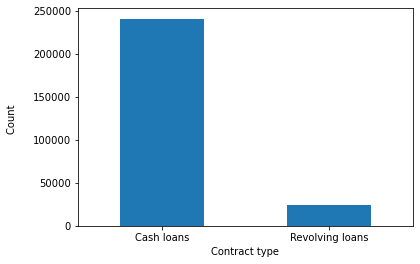

In [234]:
# plot bar graph

app_data['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.xlabel('Contract type')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

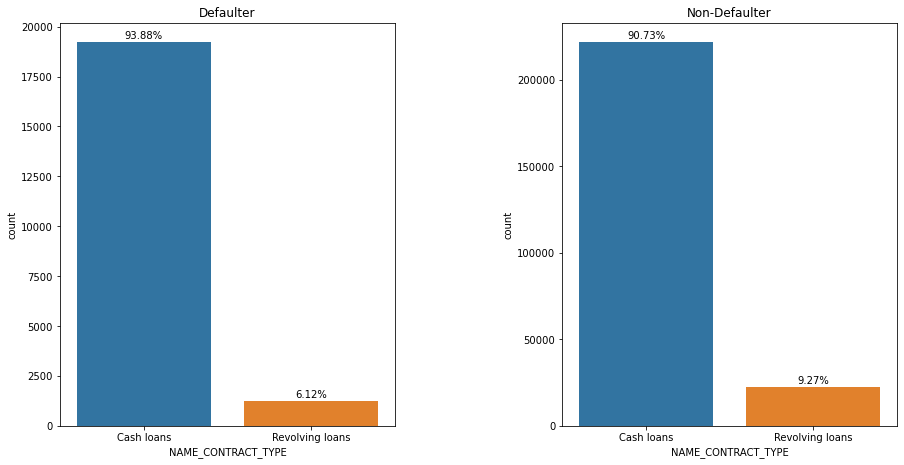

In [235]:
# checking the distribution of contract types among defaulters and non-defaulters

categorical_plots('NAME_CONTRACT_TYPE', defaulter, non_defaulter, (15,7))

### CODE_GENDER variable analysis

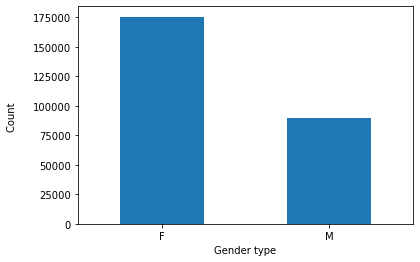

In [236]:
# plot bar graph

app_data['CODE_GENDER'].value_counts().plot.bar()
plt.xlabel('Gender type')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

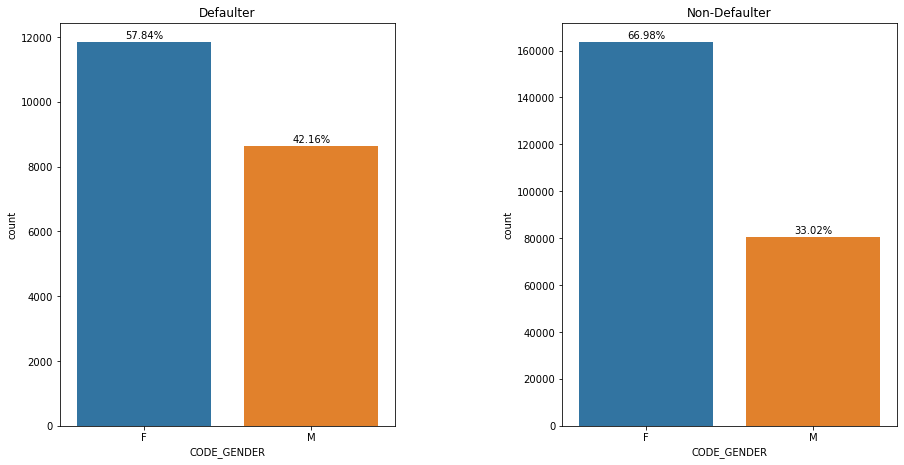

In [237]:
# checking the distribution of gender types among defaulters and non-defaulters

categorical_plots('CODE_GENDER', defaulter, non_defaulter, (15,7))

### FLAG_OWN_CAR variable analysis

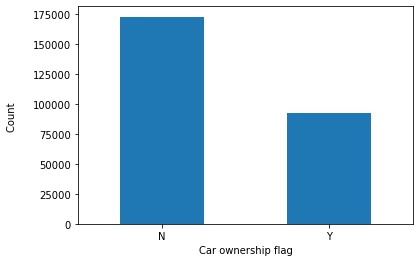

In [238]:
# plot bar graph

app_data['FLAG_OWN_CAR'].value_counts().plot.bar()
plt.xlabel('Car ownership flag')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

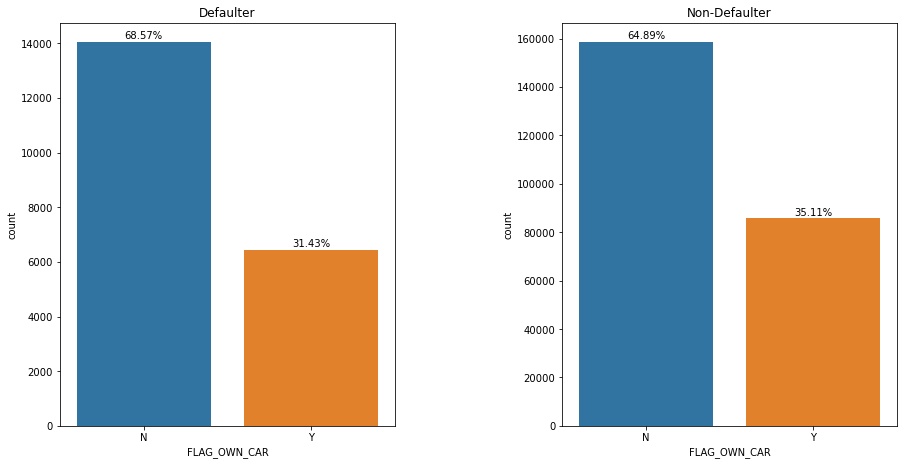

In [239]:
# checking the distribution of car owners or not among defaulters and non-defaulters

categorical_plots('FLAG_OWN_CAR', defaulter, non_defaulter, (15,7))

### FLAG_OWN_REALTY variable analysis

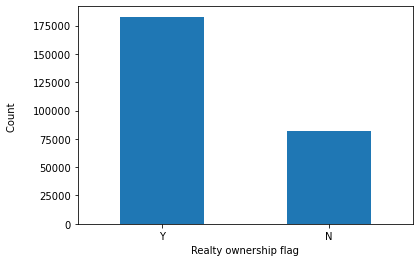

In [240]:
# plot bar graph

app_data['FLAG_OWN_REALTY'].value_counts().plot.bar()
plt.xlabel('Realty ownership flag')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

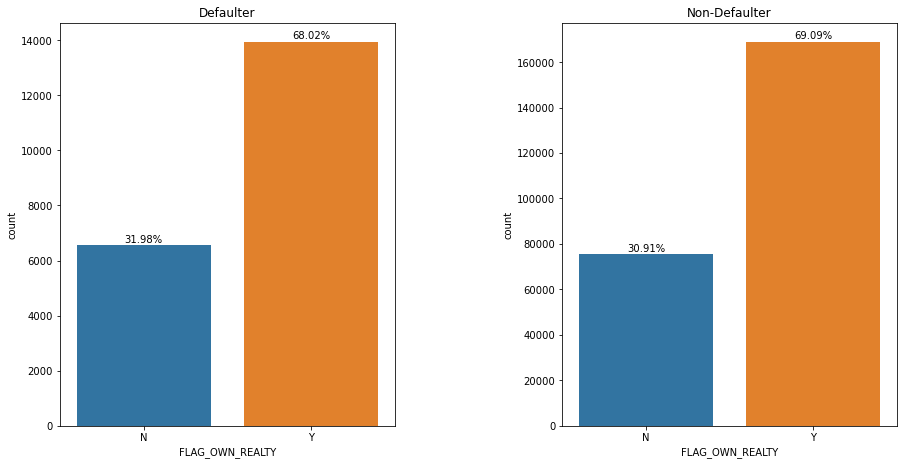

In [241]:
# checking the distribution of realty owners or not among defaulters and non-defaulters

categorical_plots('FLAG_OWN_REALTY', defaulter, non_defaulter, (15,7))

### CNT_CHILDREN variable analysis

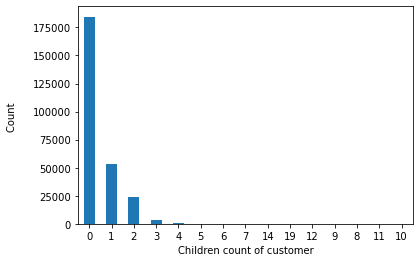

In [242]:
# plot bar graph

app_data['CNT_CHILDREN'].value_counts().plot.bar()
plt.xlabel('Children count of customer')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

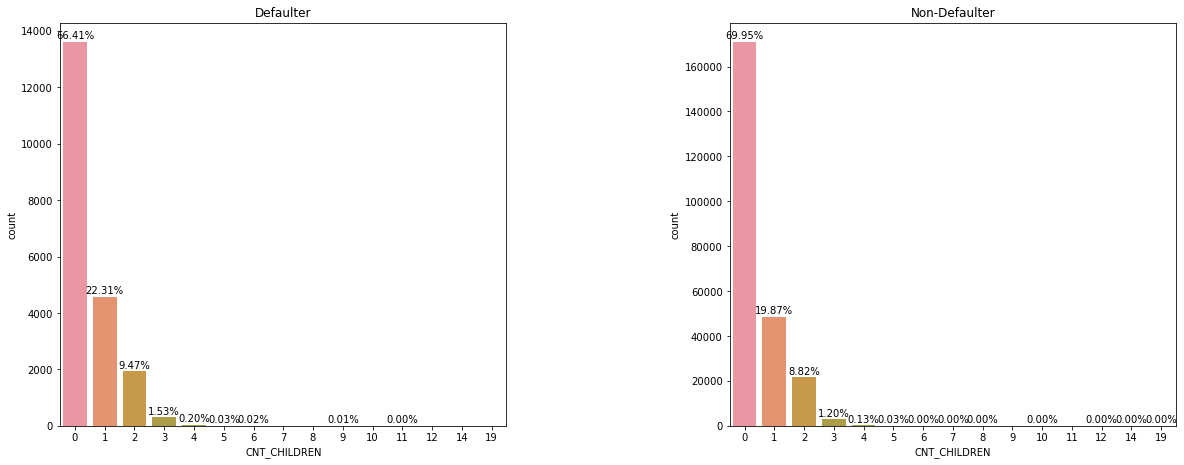

In [243]:
# checking the distribution of children count of customer among defaulters and non-defaulters

categorical_plots('CNT_CHILDREN', defaulter, non_defaulter, (20,7))

### NAME_TYPE_SUITE variable analysis

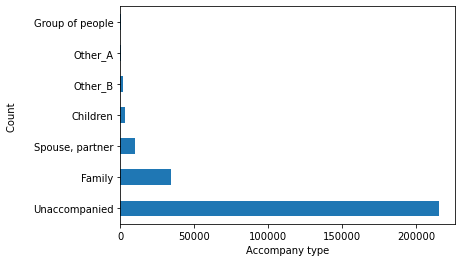

In [244]:
# plot bar graph

app_data['NAME_TYPE_SUITE'].value_counts().plot.barh()
plt.xlabel('Accompany type')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

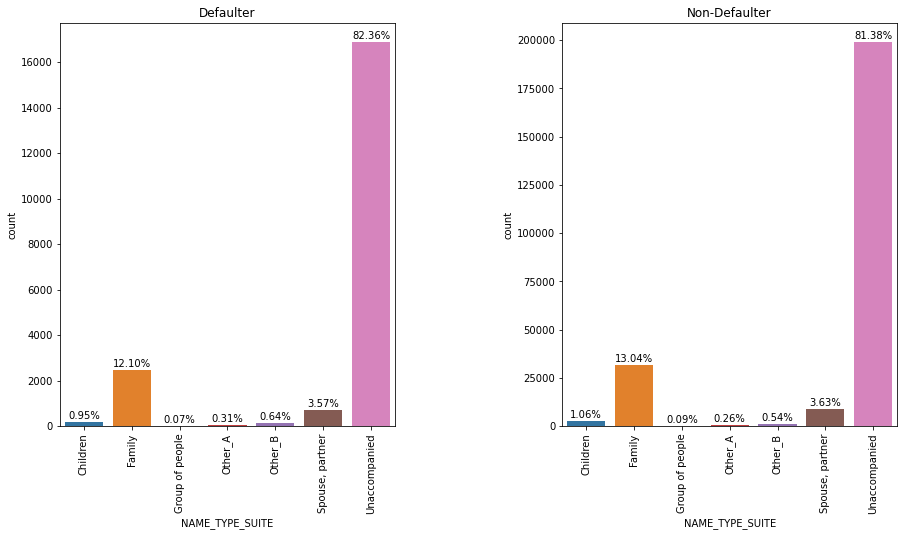

In [245]:
# checking the distribution of realty owners or not among defaulters and non-defaulters

categorical_plots('NAME_TYPE_SUITE', defaulter, non_defaulter, (15,7), rot=90)

### NAME_INCOME_TYPE variable analysis

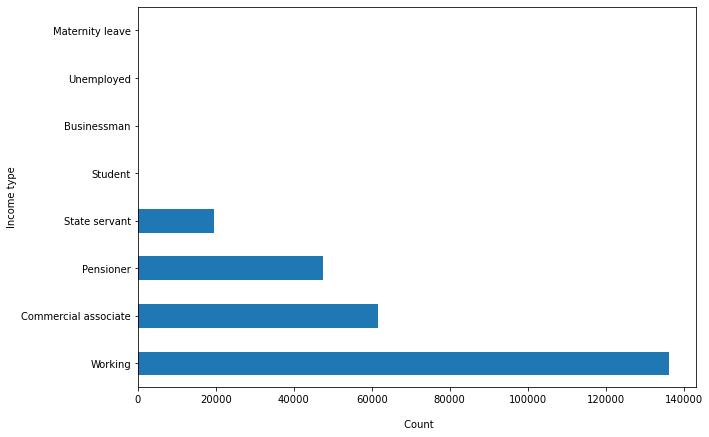

In [246]:
# plot bar graph

plt.figure(figsize=(10,7))
app_data['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Income type')
plt.xticks(rotation=0)
plt.show()

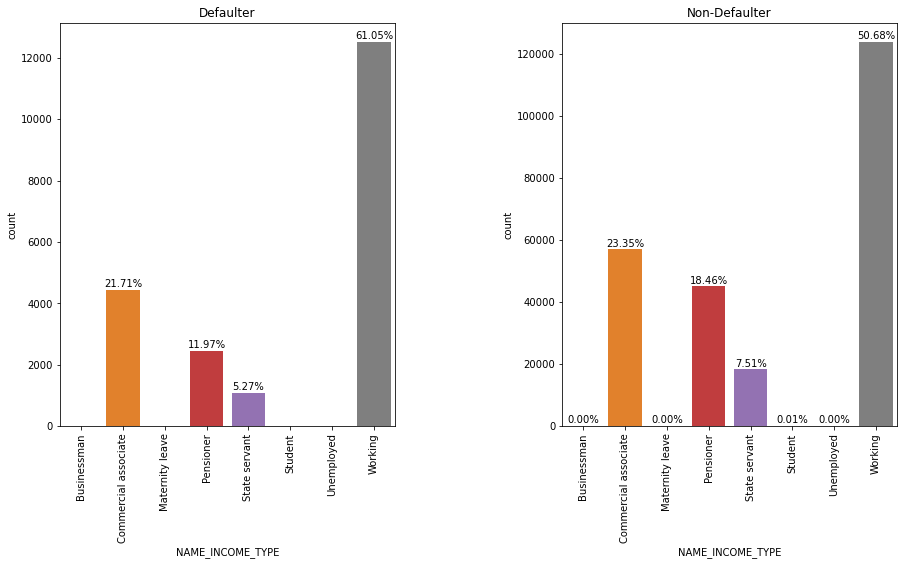

In [247]:
# checking the distribution of realty owners or not among defaulters and non-defaulters

categorical_plots('NAME_INCOME_TYPE', defaulter, non_defaulter, (15,7), rot=90)

### NAME_EDUCATION_TYPE variable analysis

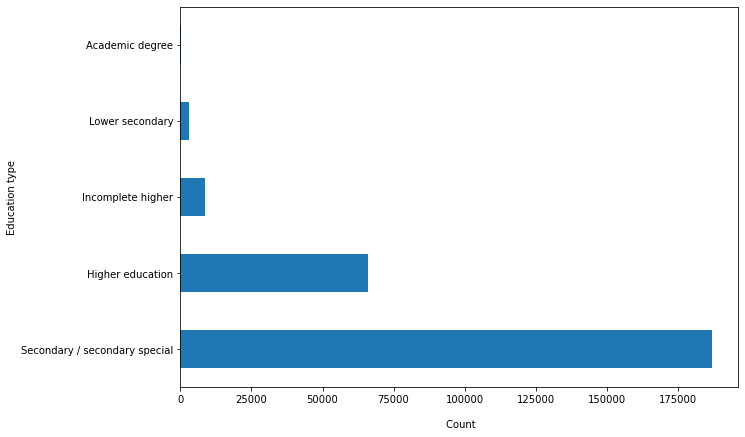

In [248]:
# plot bar graph

plt.figure(figsize=(10,7))
app_data['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Education type')
plt.xticks(rotation=0)
plt.show()

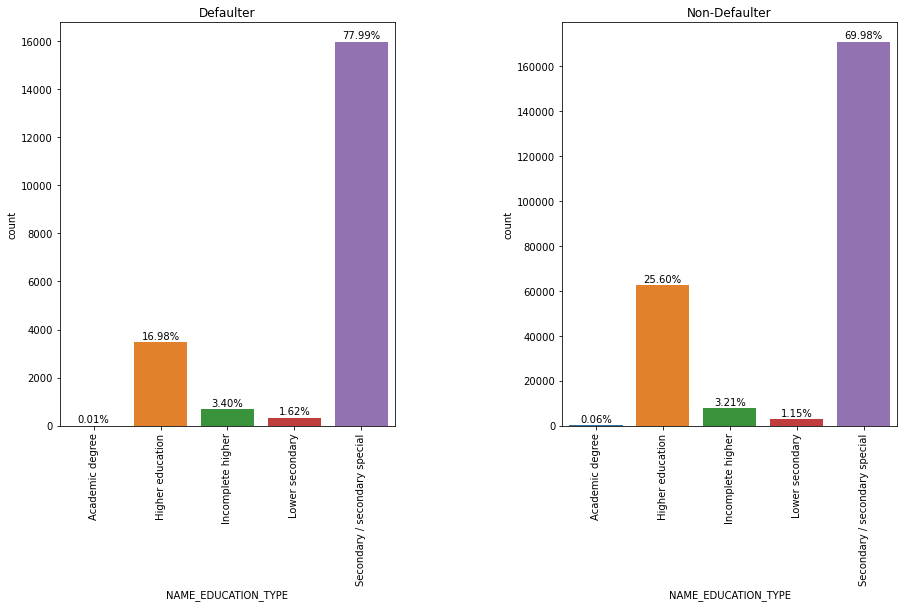

In [249]:
# checking the distribution of education type among defaulters and non-defaulters

categorical_plots('NAME_EDUCATION_TYPE', defaulter, non_defaulter, (15,7), rot=90)

### NAME_FAMILY_STATUS variable analysis

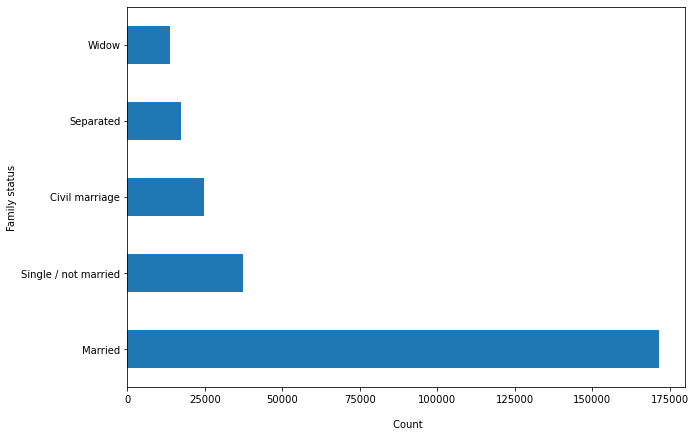

In [250]:
# plot bar graph

plt.figure(figsize=(10,7))
app_data['NAME_FAMILY_STATUS'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Family status')
plt.xticks(rotation=0)
plt.show()

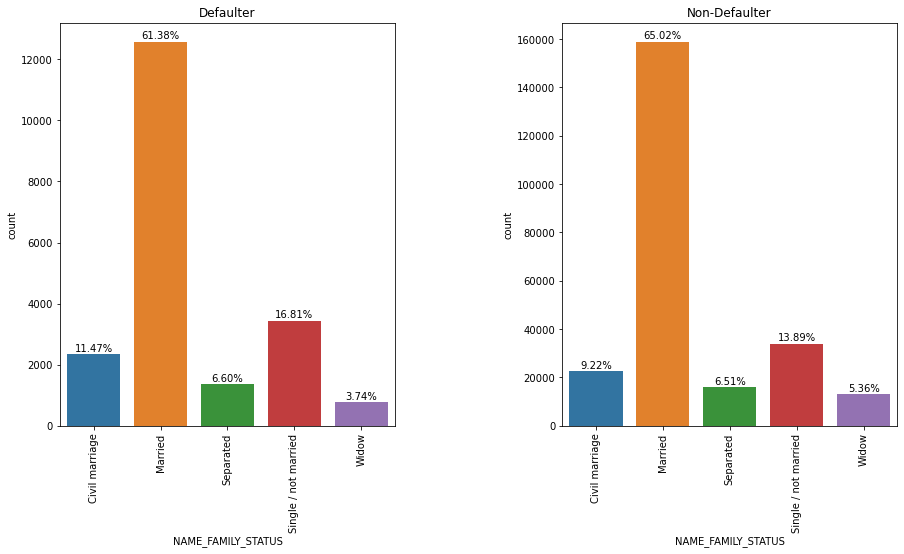

In [251]:
# checking the distribution of family status among defaulters and non-defaulters

categorical_plots('NAME_FAMILY_STATUS', defaulter, non_defaulter, (15,7), rot=90)

### NAME_HOUSING_TYPE varible analysis

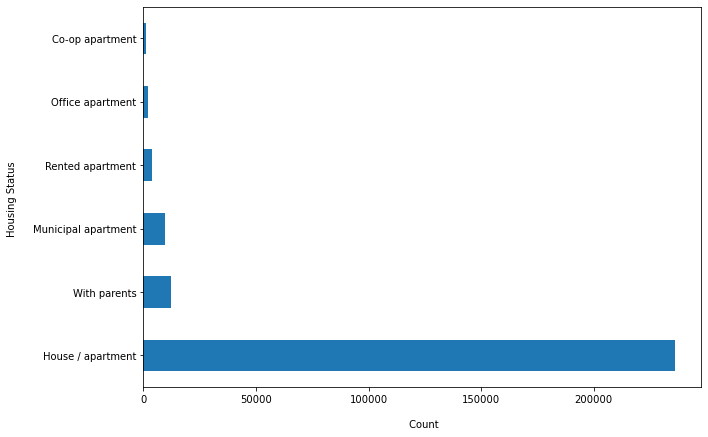

In [252]:
# plot bar graph

plt.figure(figsize=(10,7))
app_data['NAME_HOUSING_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Housing Status \n')
plt.xticks(rotation=0)
plt.show()

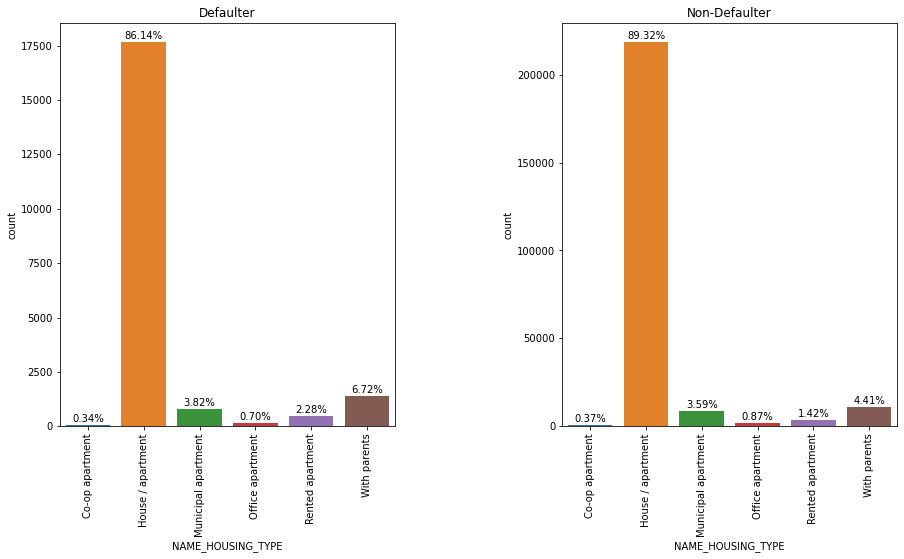

In [253]:
# checking the distribution of housing type among defaulters and non-defaulters

categorical_plots('NAME_HOUSING_TYPE', defaulter, non_defaulter, (15,7), rot=90)

### OCCUPATION_TYPE variable analysis


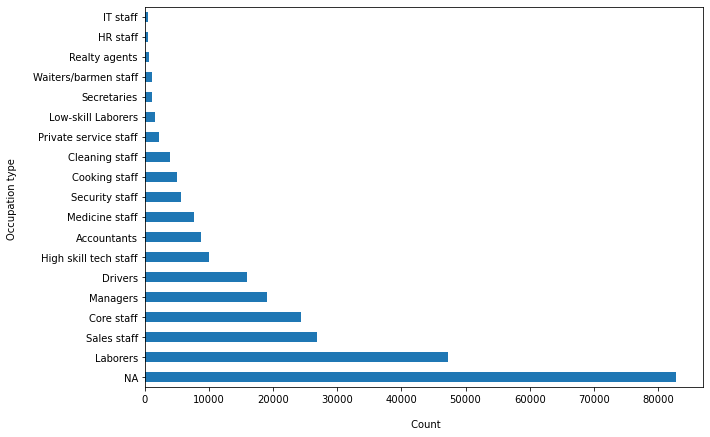

In [254]:
# plot bar graph

plt.figure(figsize=(10,7))
app_data['OCCUPATION_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Occupation type \n')
plt.xticks(rotation=0)
plt.show()

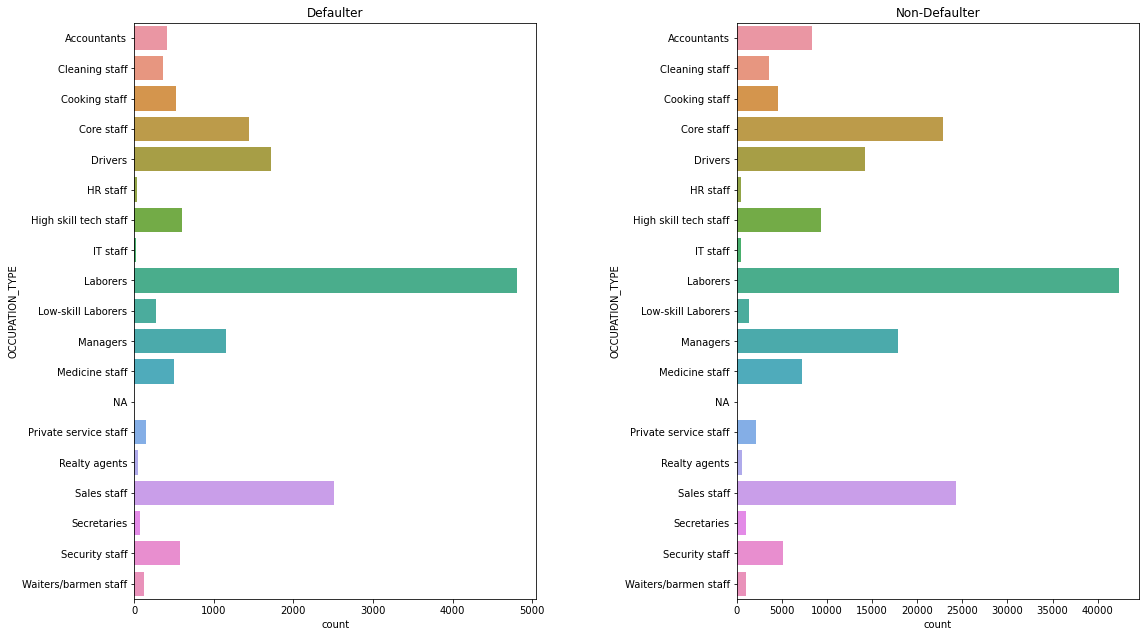

In [255]:
plt.figure(figsize=(18,10))
    
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(y='OCCUPATION_TYPE', data=defaulter[defaulter['OCCUPATION_TYPE']!='NA'])

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(y='OCCUPATION_TYPE', data=non_defaulter[non_defaulter['OCCUPATION_TYPE']!='NA'])


plt.subplots_adjust(left=0.125,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.5, 
                hspace=0.35)

plt.show()

### CNT_FAM_MEMBERS variable analysis

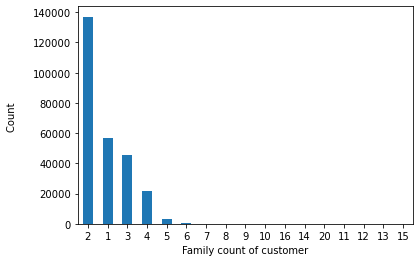

In [256]:
# plot bar graph

app_data['CNT_FAM_MEMBERS'].value_counts().plot.bar()
plt.xlabel('Family count of customer')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

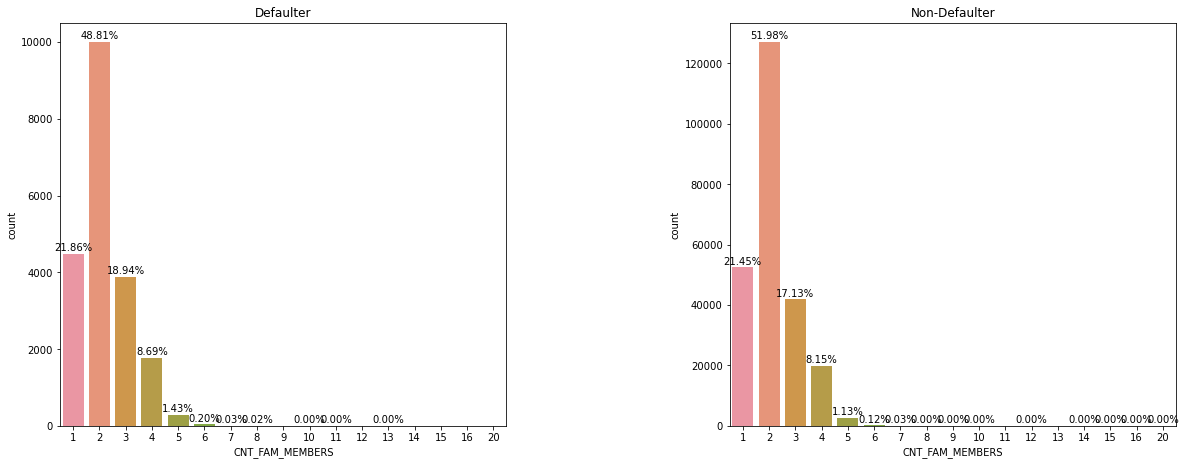

In [257]:
# checking the distribution of family count of customer among defaulters and non-defaulters

categorical_plots('CNT_FAM_MEMBERS', defaulter, non_defaulter, (20,7))

### REGION_RATING_CLIENT varible analysis

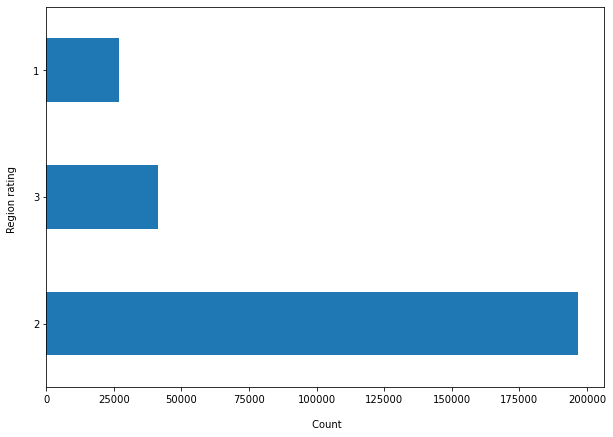

In [258]:
# plot bar graph

plt.figure(figsize=(10,7))
app_data['REGION_RATING_CLIENT'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Region rating \n')
plt.xticks(rotation=0)
plt.show()

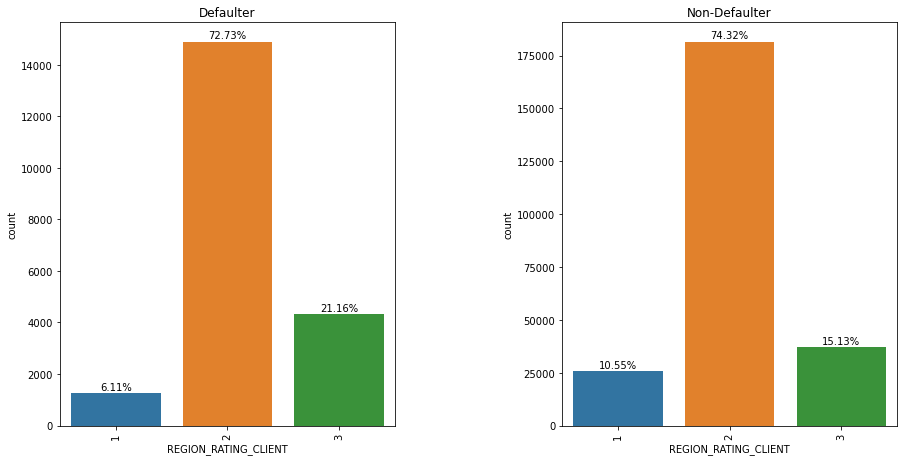

In [259]:
# checking the distribution of customer region rating among defaulters and non-defaulters

categorical_plots('REGION_RATING_CLIENT', defaulter, non_defaulter, (15,7), rot=90)

### ORGANIZATION_TYPE varible analysis

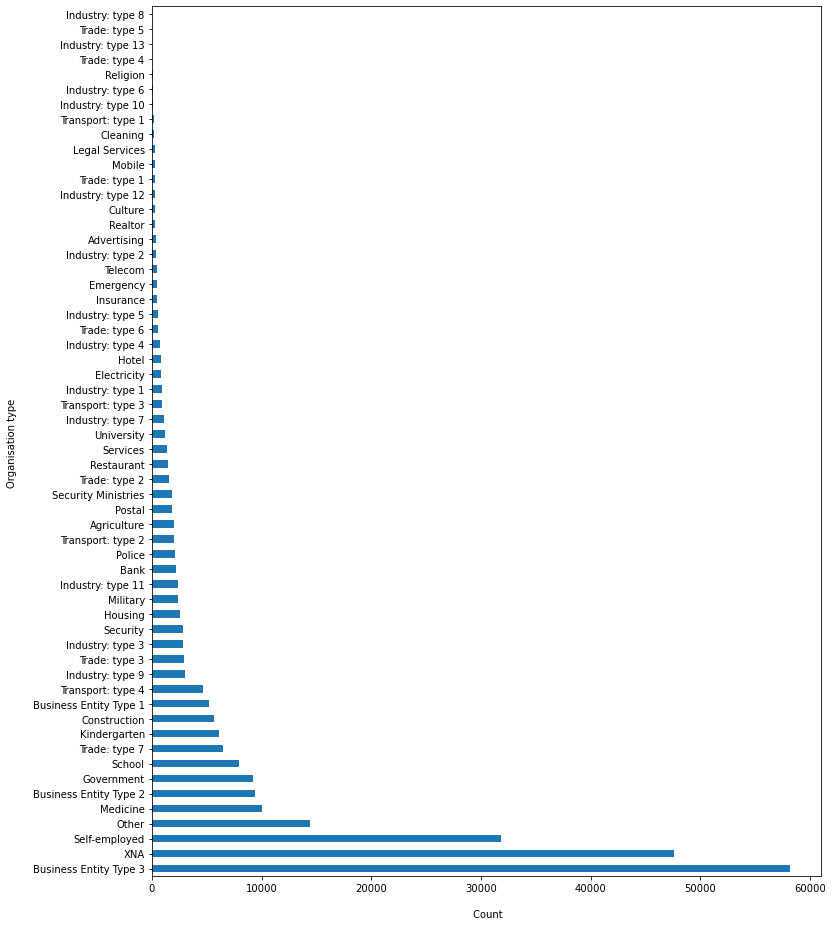

In [260]:
# plot bar graph

plt.figure(figsize=(12,16))
app_data['ORGANIZATION_TYPE'].value_counts().plot.barh()
plt.xlabel('\n Count')
plt.ylabel('Organisation type \n')
plt.xticks(rotation=0)
plt.show()

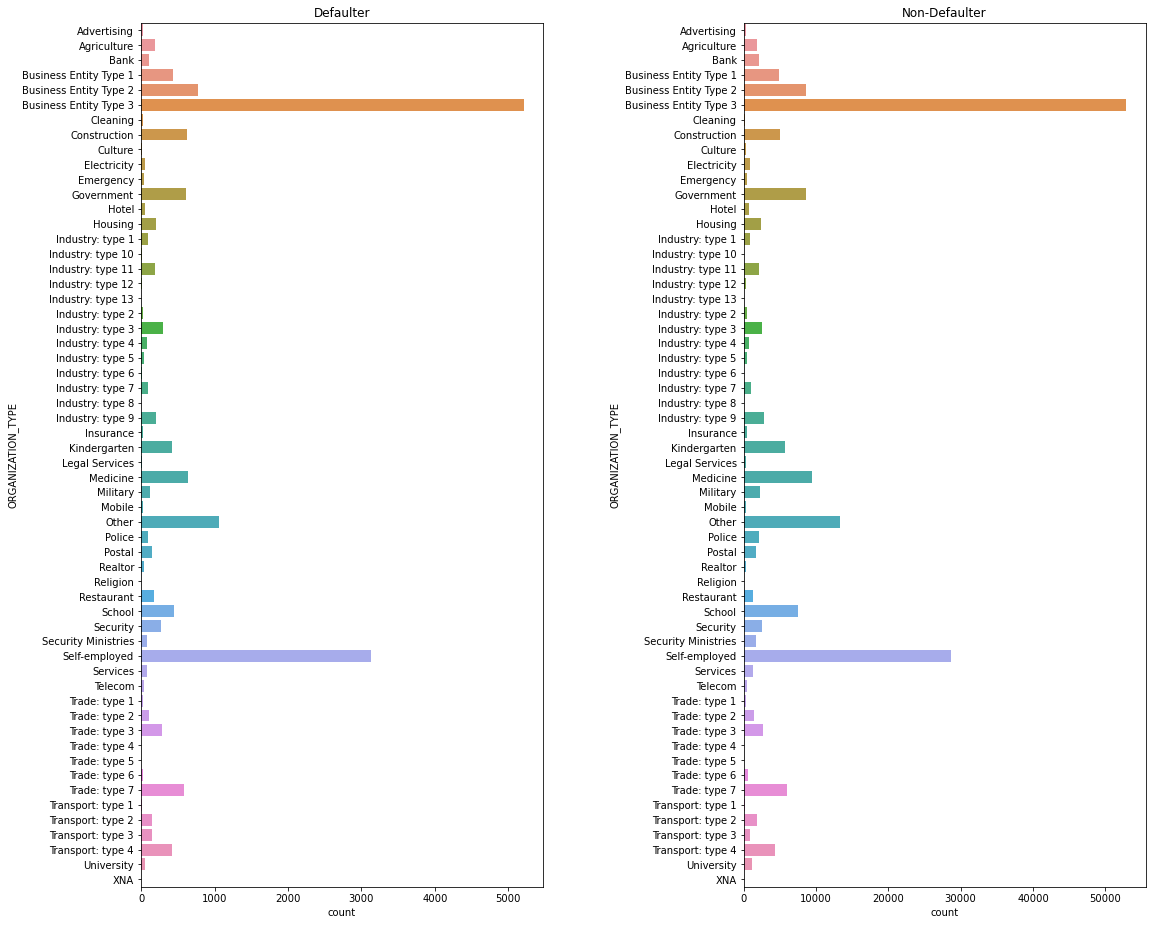

In [261]:
# checking the distribution of organisation type among defaulters and non-defaulters

plt.figure(figsize=(18,15))
    
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(y='ORGANIZATION_TYPE', data=defaulter[defaulter['ORGANIZATION_TYPE']!='XNA'])

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(y='ORGANIZATION_TYPE', data=non_defaulter[non_defaulter['ORGANIZATION_TYPE']!='XNA'])


plt.subplots_adjust(left=0.125,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.5, 
                hspace=0.35)

plt.show()

### INCOME_GROUPS varible analysis

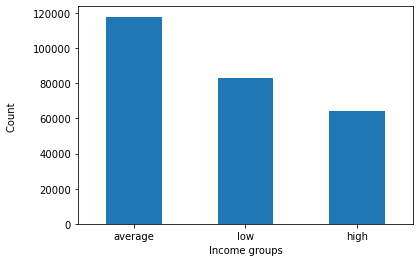

In [262]:
# plot bar graph

app_data['INCOME_GROUPS'].value_counts().plot.bar()
plt.xlabel('Income groups')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

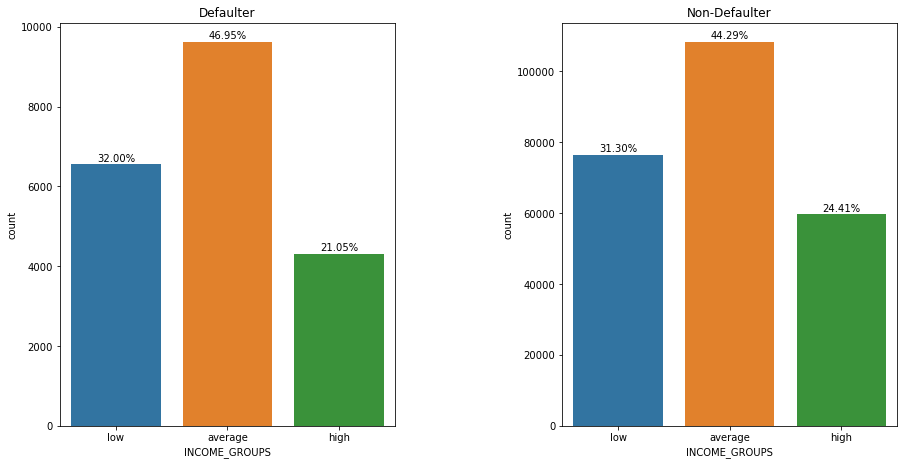

In [263]:
# checking the distribution of income amount groups among defaulters and non-defaulters

categorical_plots('INCOME_GROUPS', defaulter, non_defaulter, (15,7))

### CREDIT_GROUPS varible analysis

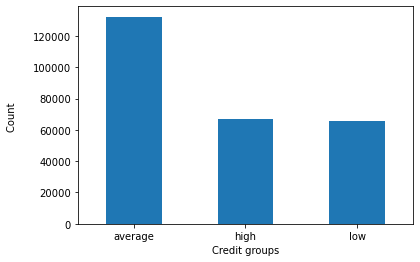

In [264]:
# plot bar graph

app_data['CREDIT_GROUPS'].value_counts().plot.bar()
plt.xlabel('Credit groups')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

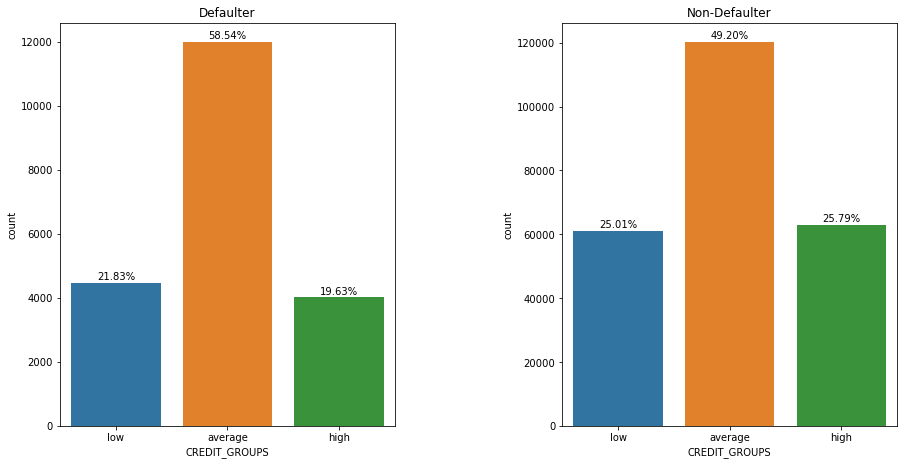

In [265]:
# checking the distribution of credit amount groups among defaulters and non-defaulters

categorical_plots('CREDIT_GROUPS', defaulter, non_defaulter, (15,7))

### GOODS_PRICE_GROUPS varible analysis

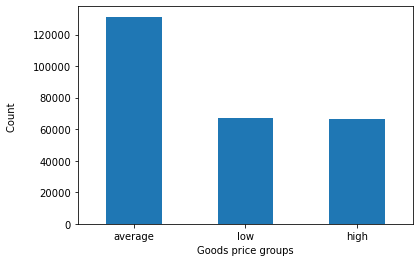

In [266]:
# plot bar graph

app_data['GOODS_PRICE_GROUPS'].value_counts().plot.bar()
plt.xlabel('Goods price groups')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

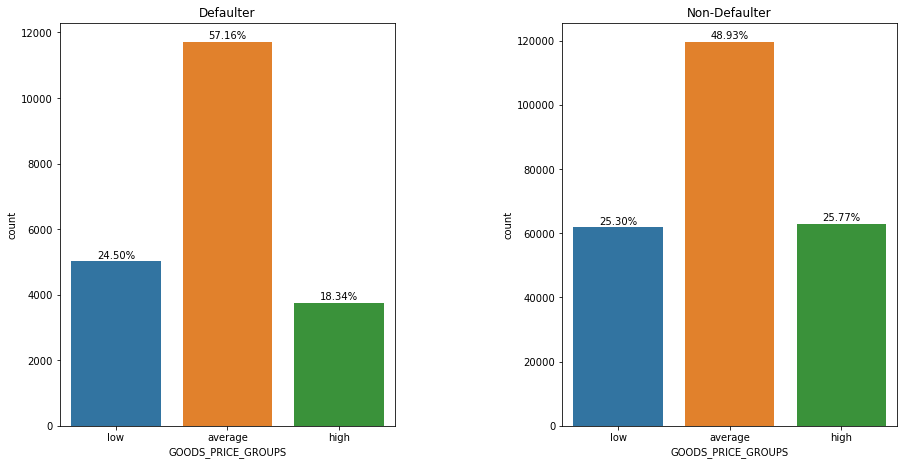

In [267]:
# checking the distribution of goods price groups among defaulters and non-defaulters

categorical_plots('GOODS_PRICE_GROUPS', defaulter, non_defaulter, (15,7))

### AGE_GROUPS varible analysis

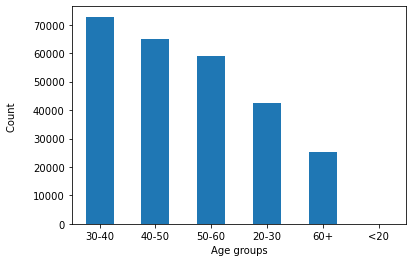

In [268]:
# plot bar graph

app_data['AGE_GROUPS'].value_counts().plot.bar()
plt.xlabel('Age groups')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

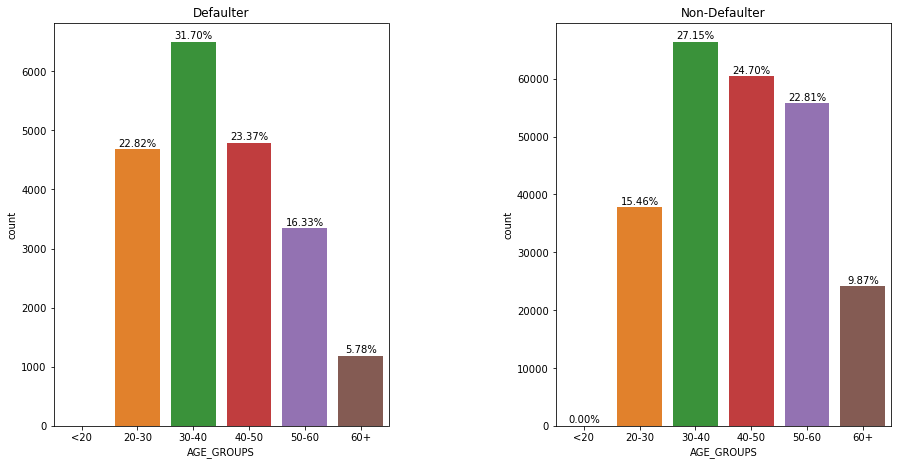

In [269]:
# checking the distribution of age groups among defaulters and non-defaulters

categorical_plots('AGE_GROUPS', defaulter, non_defaulter, (15,7))

### EMP_EXP_GROUPS varible analysis

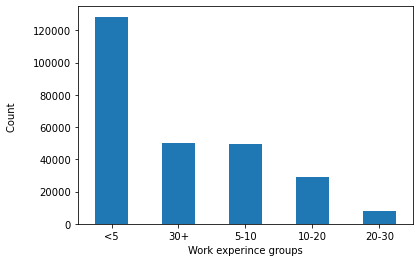

In [270]:
# plot bar graph

app_data['EMP_EXP_GROUPS'].value_counts().plot.bar()
plt.xlabel('Work experince groups')
plt.ylabel('Count \n')
plt.xticks(rotation=0)
plt.show()

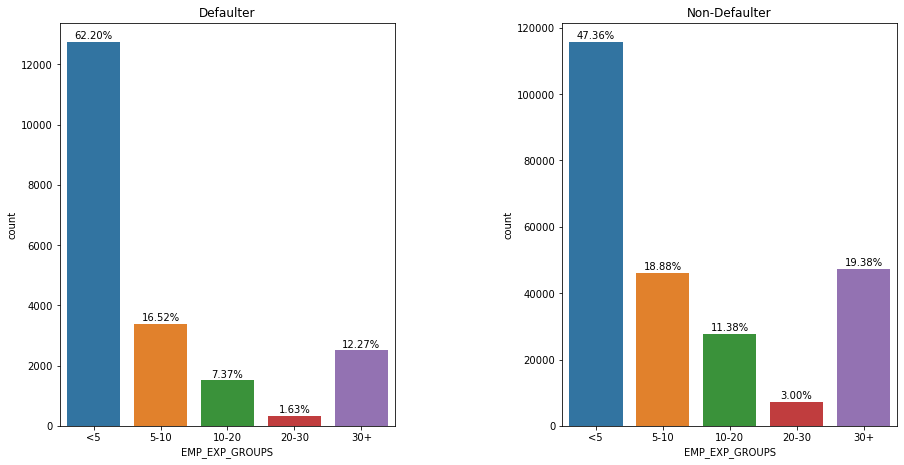

In [271]:
# checking the distribution of work experince groups among defaulters and non-defaulters

categorical_plots('EMP_EXP_GROUPS', defaulter, non_defaulter, (15,7))

- ## Numerical variables

In [272]:
# dropping some irrelevant numerical columns columns 

cols =['DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

for col in cols:
    app_data.drop(col, axis=1, inplace=True)
    defaulter.drop(col, axis=1, inplace=True)
    non_defaulter.drop(col, axis=1, inplace=True)

    


In [273]:
# get the list of categorical columns

list(app_data.select_dtypes(include=['number']).columns)

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_2']

- ***Finding top correlations in numerical variables among defaulters***

In [274]:
defaulter.select_dtypes(include=['number'])

SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_2
0           100002       1         202500.00   406597.50     24700.50        351000.00                        0.02          25              1          0.26
26          100031       1         112500.00   979992.00     27076.50        702000.00                        0.02          51              7          0.55
40          100047       1         202500.00  1193580.00     35028.00        855000.00                        0.03          47              3          0.31
42          100049       1         135000.00   288873.00     16258.50        238500.00                        0.01          36              9          0.67
81          100096       1          81000.00   252000.00     14593.50        252000.00                        0.03          67           1000          0.02
...            ...     ...               ...         ...          ...              ...                         ...         ...            ...           ...
307448      456186       1         207000.00   450000.00     32746.50        450000.00                        0.02          27              8          0.33
307475      456215       1         144000.00  1303200.00     46809.00       1125000.00                        0.01          36              6          0.58
307481      456225       1         225000.00   297000.00     19975.50        297000.00                        0.01          56              8          0.71
307489      456233       1         225000.00   521280.00     23089.50        450000.00                        0.01          45              0          0.62
307509      456254       1         171000.00   370107.00     20205.00        319500.00                        0.01          32             13          0.51

[20490 rows x 10 columns]

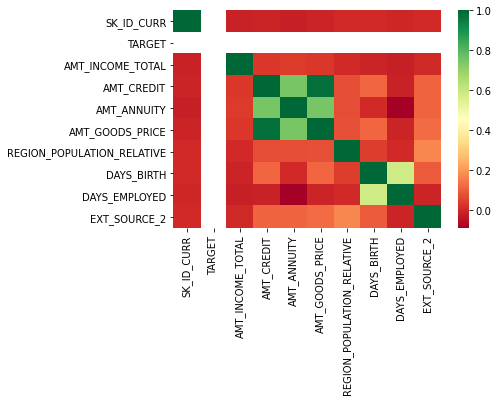

In [275]:
# plot correlation matrix using heatmap

sns.heatmap(defaulter.select_dtypes(include=['number']).corr(),cmap='RdYlGn')
plt.show()

In [276]:
# ordering based on top correlation of numerical features

corr = defaulter.select_dtypes(include=['number']).corr().abs()

# set self correlation as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

print(corr_cols)

AMT_GOODS_PRICE              0.98
AMT_CREDIT                   0.98
AMT_ANNUITY                  0.75
DAYS_EMPLOYED                0.58
DAYS_BIRTH                   0.58
EXT_SOURCE_2                 0.17
REGION_POPULATION_RELATIVE   0.17
AMT_INCOME_TOTAL             0.04
SK_ID_CURR                   0.01
TARGET                        nan
dtype: float64


- ***Finding top correlations in numerical variables among non_defaulters***

In [277]:
non_defaulter.select_dtypes(include=['number'])

SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_2
1           100003       0         270000.00  1293502.50     35698.50       1129500.00                        0.00          45              3          0.62
2           100004       0          67500.00   135000.00      6750.00        135000.00                        0.01          52              0          0.56
4           100007       0         121500.00   513000.00     21865.50        513000.00                        0.03          54              8          0.32
5           100008       0          99000.00   490495.50     27517.50        454500.00                        0.04          46              4          0.35
6           100009       0         171000.00  1560726.00     41301.00       1395000.00                        0.04          37              8          0.72
...            ...     ...               ...         ...          ...              ...                         ...         ...            ...           ...
307502      456246       0          94500.00   225000.00     10620.00        225000.00                        0.01          44             23          0.31
307503      456247       0         112500.00   345510.00     17770.50        247500.00                        0.02          32              1          0.50
307505      456249       0         112500.00   225000.00     22050.00        225000.00                        0.02          66           1000          0.35
307508      456253       0         153000.00   677664.00     29979.00        585000.00                        0.01          41             21          0.54
307510      456255       0         157500.00   675000.00     49117.50        675000.00                        0.05          46              3          0.71

[244404 rows x 10 columns]

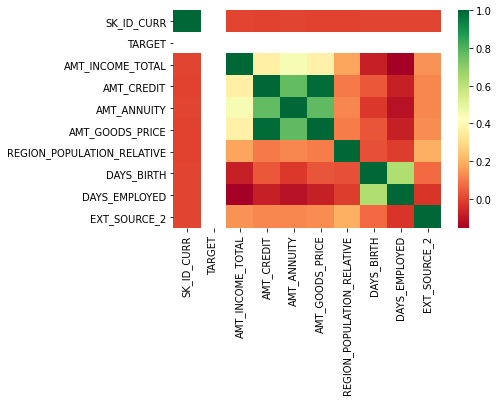

In [278]:
# plot correlation matrix using heatmap

sns.heatmap(non_defaulter.select_dtypes(include=['number']).corr(),cmap='RdYlGn')
plt.show()

In [279]:
# ordering based on top correlation of numerical features

corr = non_defaulter.select_dtypes(include=['number']).corr().abs()

# set self correlation as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

print(corr_cols)

AMT_GOODS_PRICE              0.99
AMT_CREDIT                   0.99
AMT_ANNUITY                  0.78
DAYS_EMPLOYED                0.63
DAYS_BIRTH                   0.63
AMT_INCOME_TOTAL             0.45
EXT_SOURCE_2                 0.19
REGION_POPULATION_RELATIVE   0.19
SK_ID_CURR                   0.00
TARGET                        nan
dtype: float64


### ***P.S :- The analysis of these correlated features between each other can be found in the 'Bivariate Analysis part' using scatter plots***

- ##### Utility functions

In [280]:
# util function to plot distribution plot and box plot of numerical columns

def numerical_continous_plot(col_name, title_name, defaulter,non_defaulter,fig_size):
    
    plt.figure(figsize=fig_size)
    plt.title(f'\n {title_name} distribution among defaulters and non-defaulters  \n')
    sns.distplot(non_defaulter[col_name], label='Non-Defaulters', hist = False, color='blue')
    sns.distplot(defaulter[col_name], label='Defaulters', hist = False, color='red')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=fig_size)
    plt.suptitle(f'\n {title_name} spread among defaulters and non-defaulters  \n')
    
    plt.subplot(1,2,1)
    sns.boxplot(x='TARGET', y=col_name, data=defaulter)
    plt.xlabel(f'{col_name} in defaulters ')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='TARGET', y=col_name, data=non_defaulter)
    plt.xlabel(f'{col_name} in non-defaulters ')

    
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.4) 
    
    plt.show()


### AMT_INCOME_TOTAL variable analysis

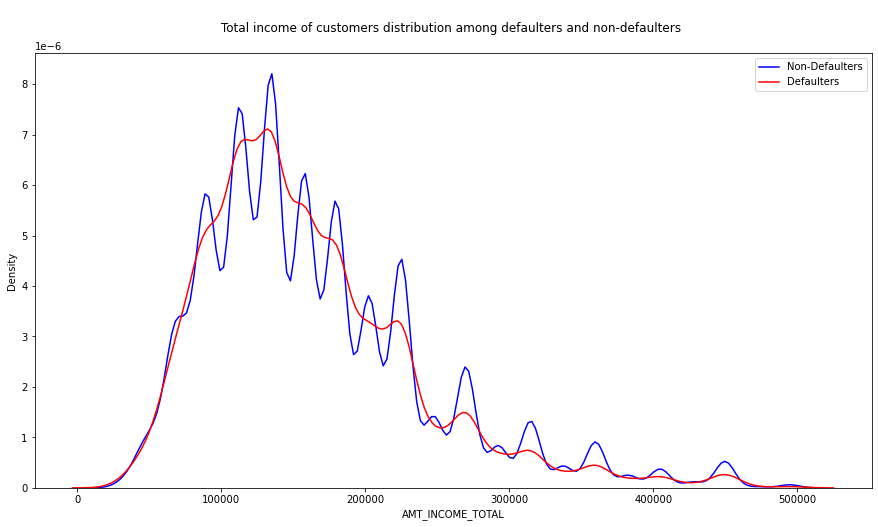

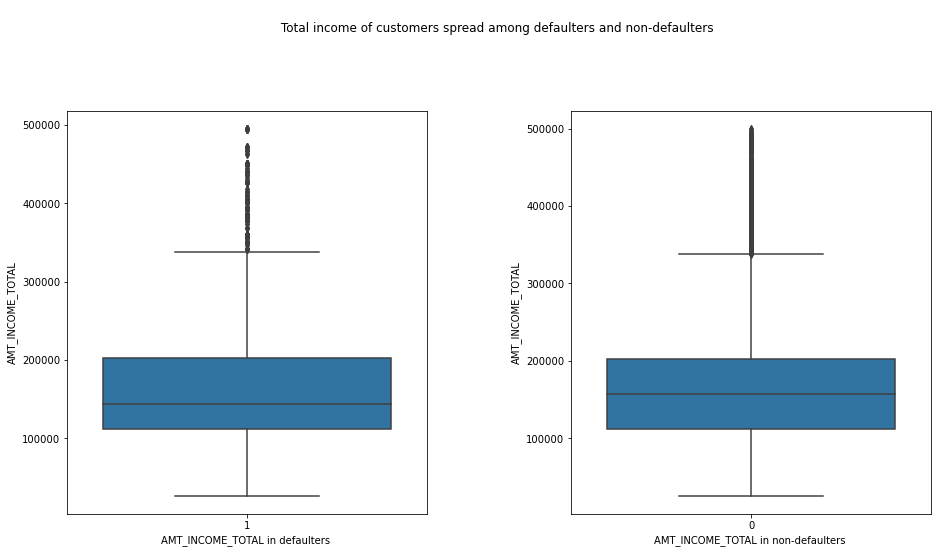

In [281]:
# plotting dist plot and box plot 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

numerical_continous_plot('AMT_INCOME_TOTAL','Total income of customers',d1,d2,(15,8))

### AMT_CREDIT variable analysis

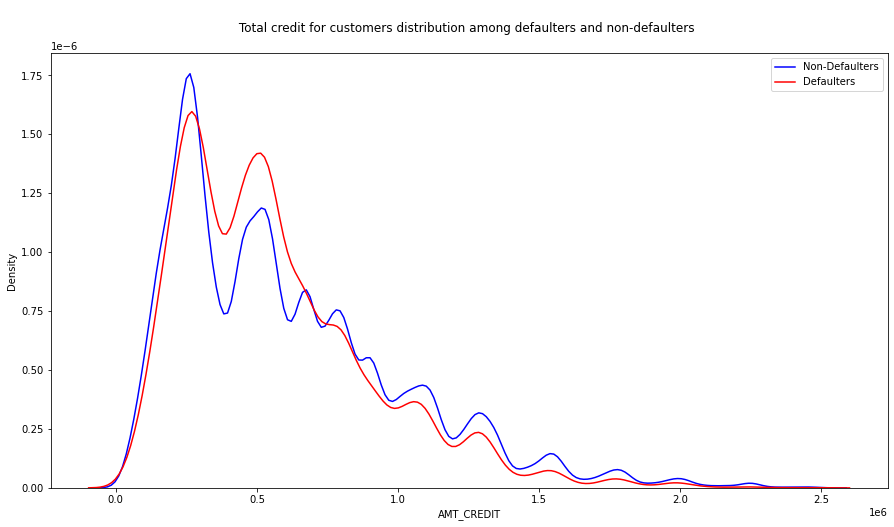

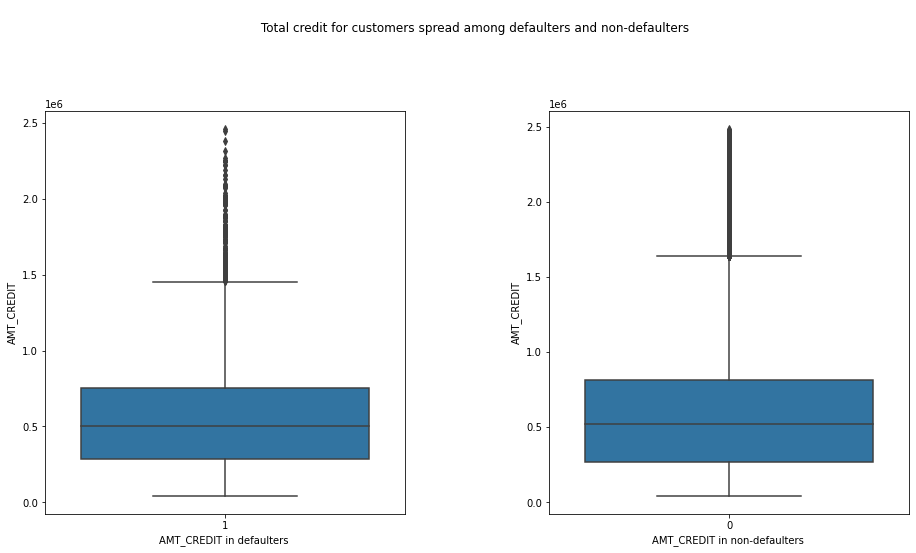

In [282]:
# plotting dist plot and box plot 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

numerical_continous_plot('AMT_CREDIT','Total credit for customers',d1,d2,(15,8))


### AMT_ANNUITY variable analysis

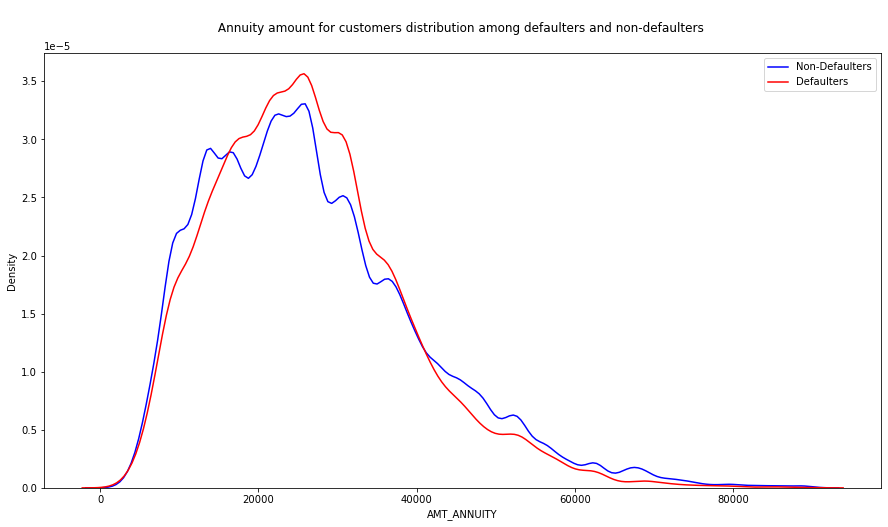

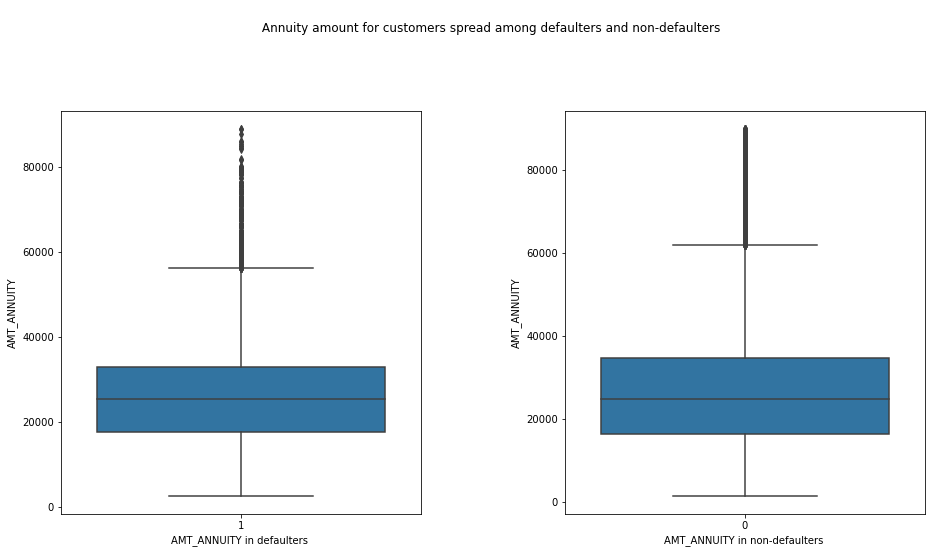

In [283]:
# plotting dist plot and box plot 

d1 = defaulter[defaulter['AMT_ANNUITY']<90000]
d2 = non_defaulter[non_defaulter['AMT_ANNUITY']<90000]

numerical_continous_plot('AMT_ANNUITY','Annuity amount for customers',d1,d2,(15,8))



### AMT_GOODS_PRICE variable analysis

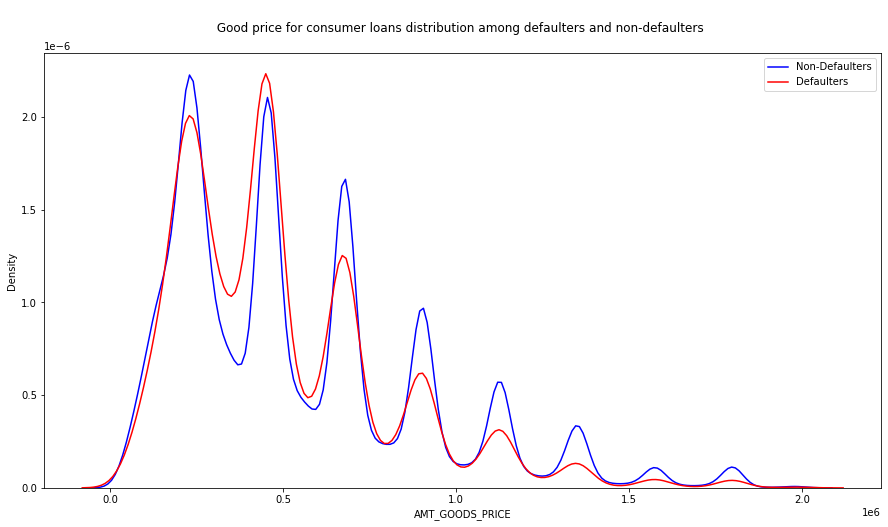

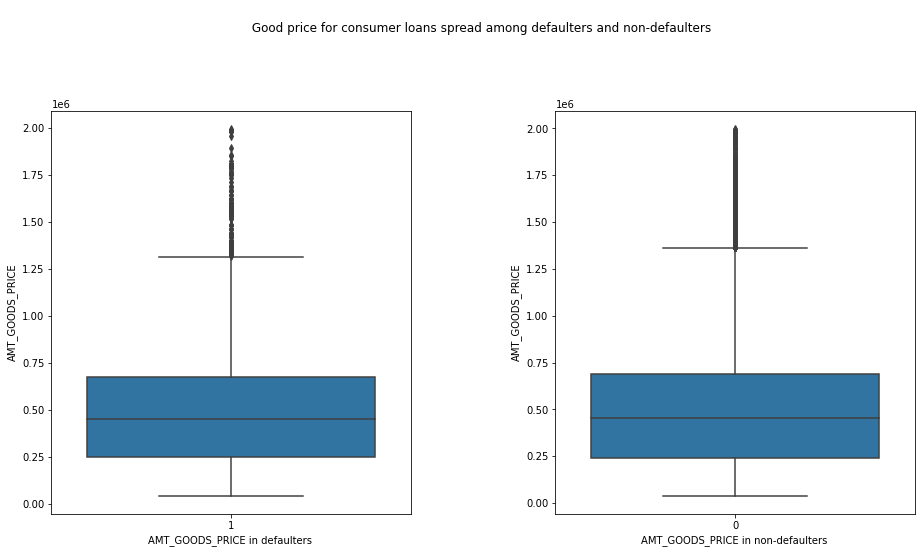

In [284]:
# plotting dist plot and box plot 

d1 = defaulter[defaulter['AMT_GOODS_PRICE']<2000000]
d2 = non_defaulter[non_defaulter['AMT_GOODS_PRICE']<2000000]

numerical_continous_plot('AMT_GOODS_PRICE','Good price for consumer loans',d1,d2,(15,8))


### REGION_POPULATION_RELATIVE variable analysis

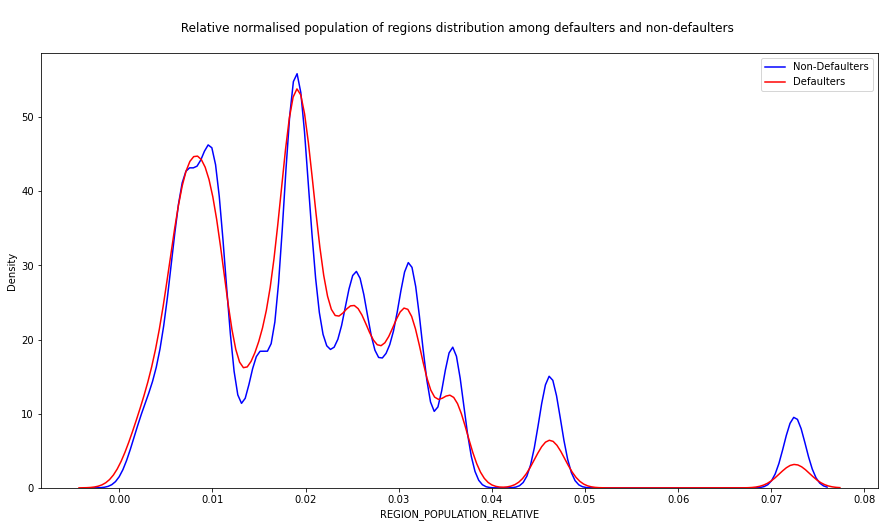

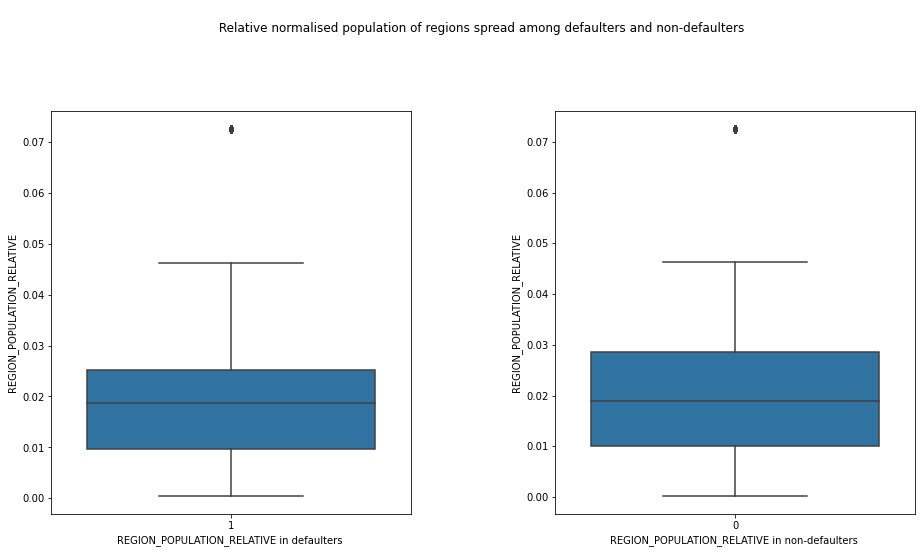

In [285]:
# plotting dist plot and box plot 

d1 = defaulter
d2 = non_defaulter

numerical_continous_plot('REGION_POPULATION_RELATIVE','Relative normalised population of regions',d1,d2,(15,8))


### DAYS_BIRTH variable analysis

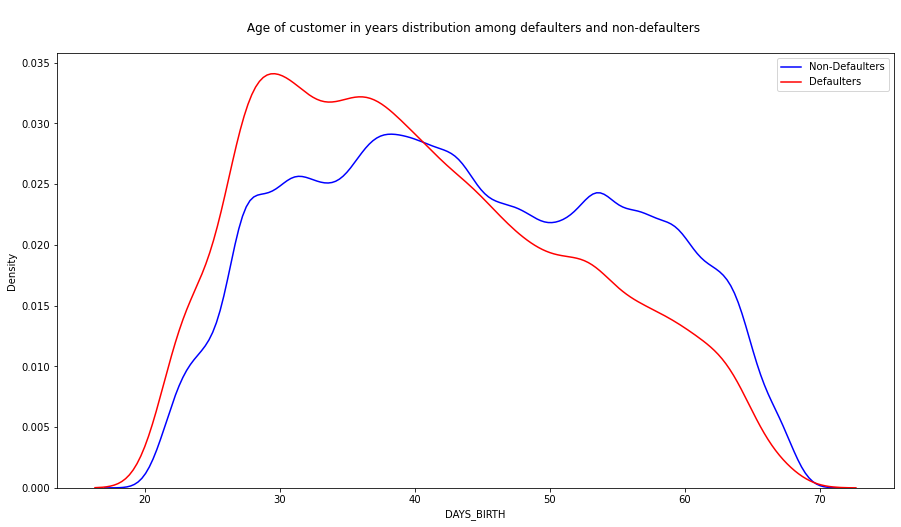

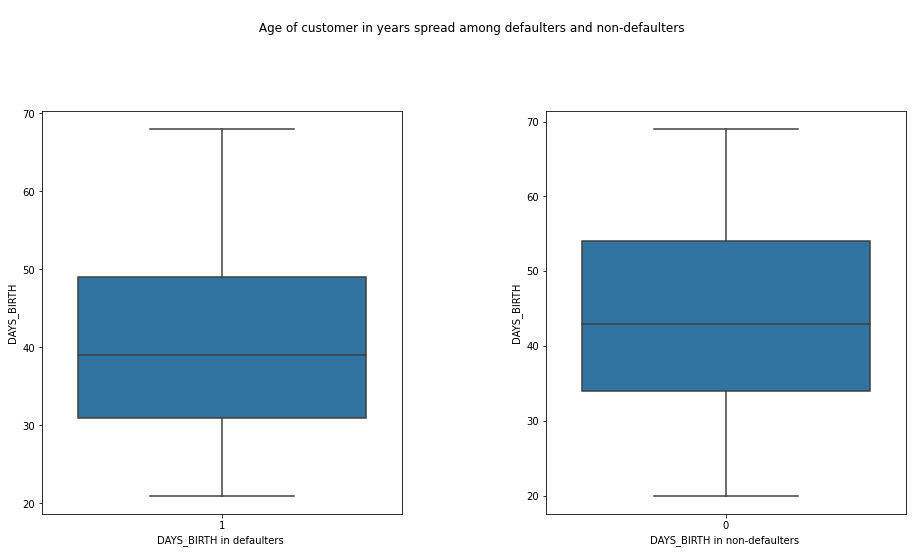

In [286]:
# plotting dist plot and box plot 

d1 = defaulter
d2 = non_defaulter

numerical_continous_plot('DAYS_BIRTH','Age of customer in years',d1,d2,(15,8))


### DAYS_EMPLOYED variable analysis

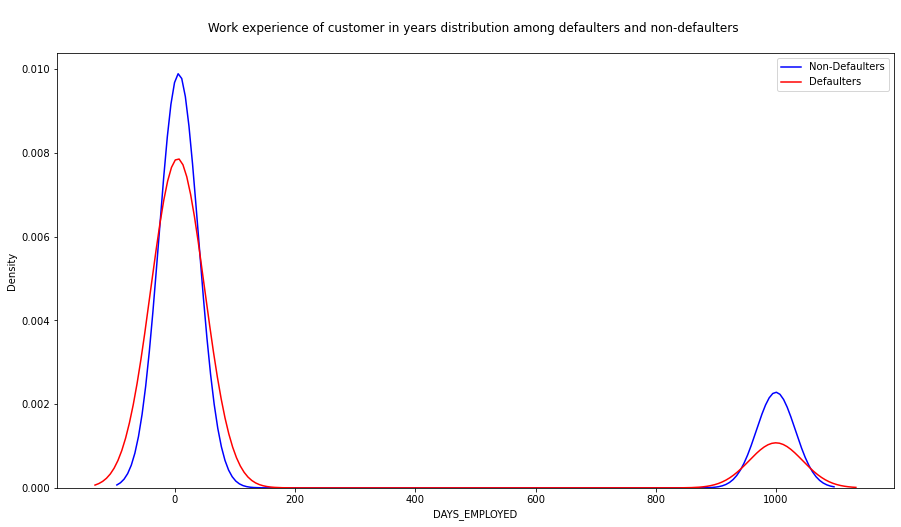

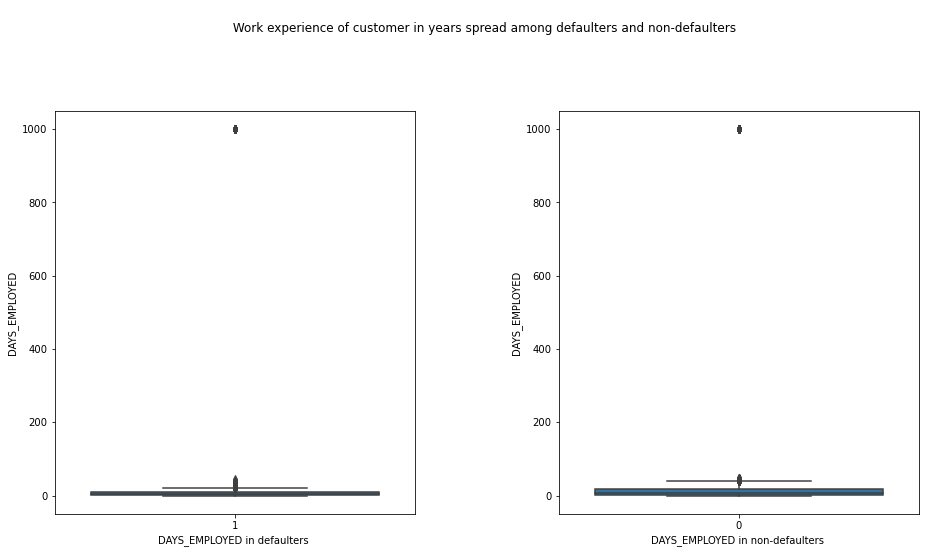

In [287]:
# plotting dist plot and box plot 

d1 = defaulter
d2 = non_defaulter

numerical_continous_plot('DAYS_EMPLOYED','Work experience of customer in years',d1,d2,(15,8))


### EXT_SOURCE_2 variable analysis

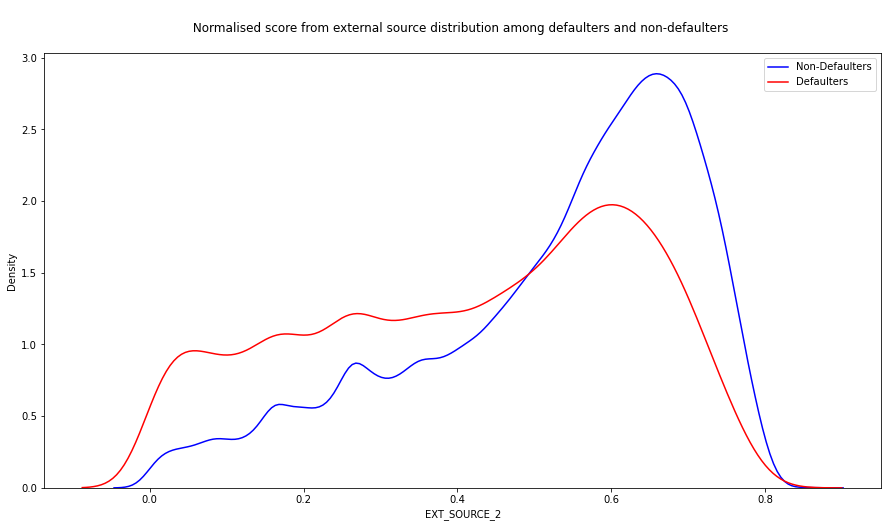

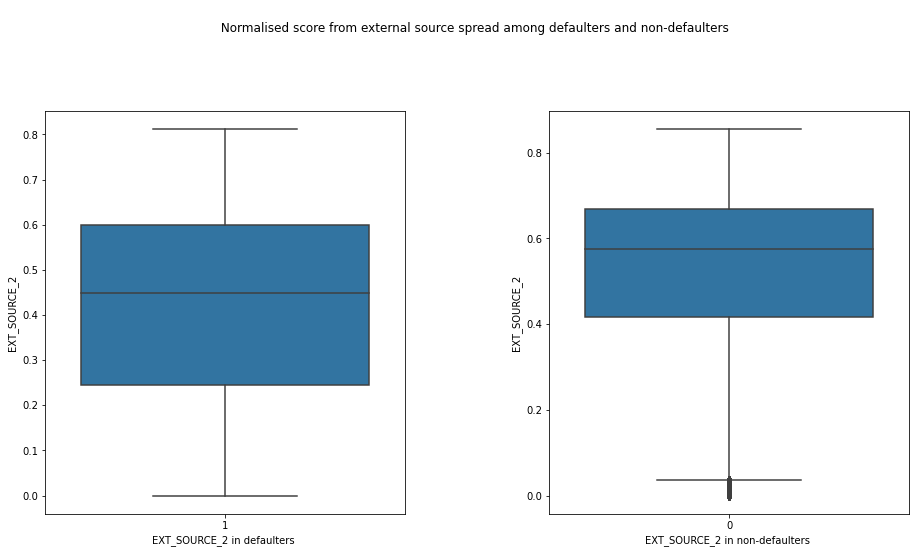

In [288]:
# plotting dist plot and box plot 

d1 = defaulter
d2 = non_defaulter

numerical_continous_plot('EXT_SOURCE_2','Normalised score from external source',d1,d2,(15,8))


- ## Bivariate Analysis

- ***Utility functions for plotting***

In [289]:
# util function to plot continous variables among each other using scatter plot

def continous_continous_scatterplot(col_1, col_2, d1, d2, fig_size):
    plt.figure(figsize=fig_size)
    
    plt.subplot(1,2,1)
    plt.title('Defaulter')
    sns.scatterplot(d1[col_1], d1[col_2])
    
    plt.subplot(1,2,2)
    plt.title('Non-Defaulter')
    sns.scatterplot(d2[col_1], d2[col_2])

    
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
    
    plt.show()
    
    
# util function to plot categorical and continous variables among each other using box plot

def categorical_continous_boxplot(col_1, col_2, d1, d2, fig_size):
    plt.figure(figsize=fig_size)
    
    plt.subplot(1,2,1)
    plt.title('Defaulter')
    sns.boxplot(x=col_1, y=col_2, data=d1)
    
    plt.subplot(1,2,2)
    plt.title('Non-Defaulter')
    sns.boxplot(x=col_1, y=col_2, data=d2)

    
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
    
    plt.show()
    

# util function to plot categorical and categorical variables among each other using count plot    
    
def categorical_categorical_countplot(col_1, col_2, fig_size, rot=0):
    plt.figure(figsize=fig_size)
    
    plt.subplot(1,2,1)
    plt.title('Defaulter')
    cplot = sns.countplot(x=col_1, hue=col_2, data=defaulter)
    for p in cplot.patches:
        cplot.annotate(text = "{:.2f}%".format(float(p.get_height()/defaulter.shape[0]*100)), 
                       xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 6), 
                       textcoords = 'offset points')
    plt.xticks(rotation=rot)
    
    plt.subplot(1,2,2)
    plt.title('Non-Defaulter')
    cplot = sns.countplot(x=col_1, hue=col_2, data=non_defaulter)
    for p in cplot.patches:
        cplot.annotate(text = "{:.2f}%".format(float(p.get_height()/non_defaulter.shape[0]*100)), 
                       xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 6), 
                       textcoords = 'offset points')
    plt.xticks(rotation=rot)

    
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
    
    plt.show()
       

### NAME_CONTRACT_TYPE vs CODE_GENDER

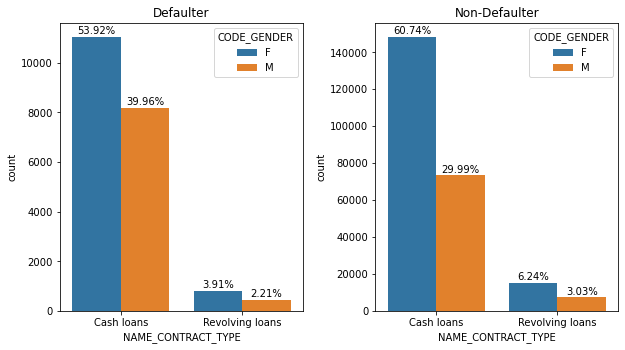

In [290]:
# using countplots

categorical_categorical_countplot('NAME_CONTRACT_TYPE','CODE_GENDER', (10,5))

### NAME_CONTRACT_TYPE vs AMT_CREDIT

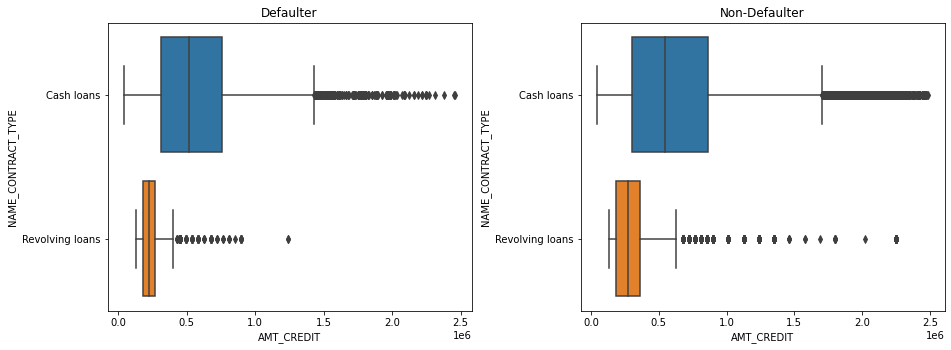

In [291]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','NAME_CONTRACT_TYPE',d1 , d2, (15,5))

### CODE_GENDER vs NAME_INCOME_TYPE

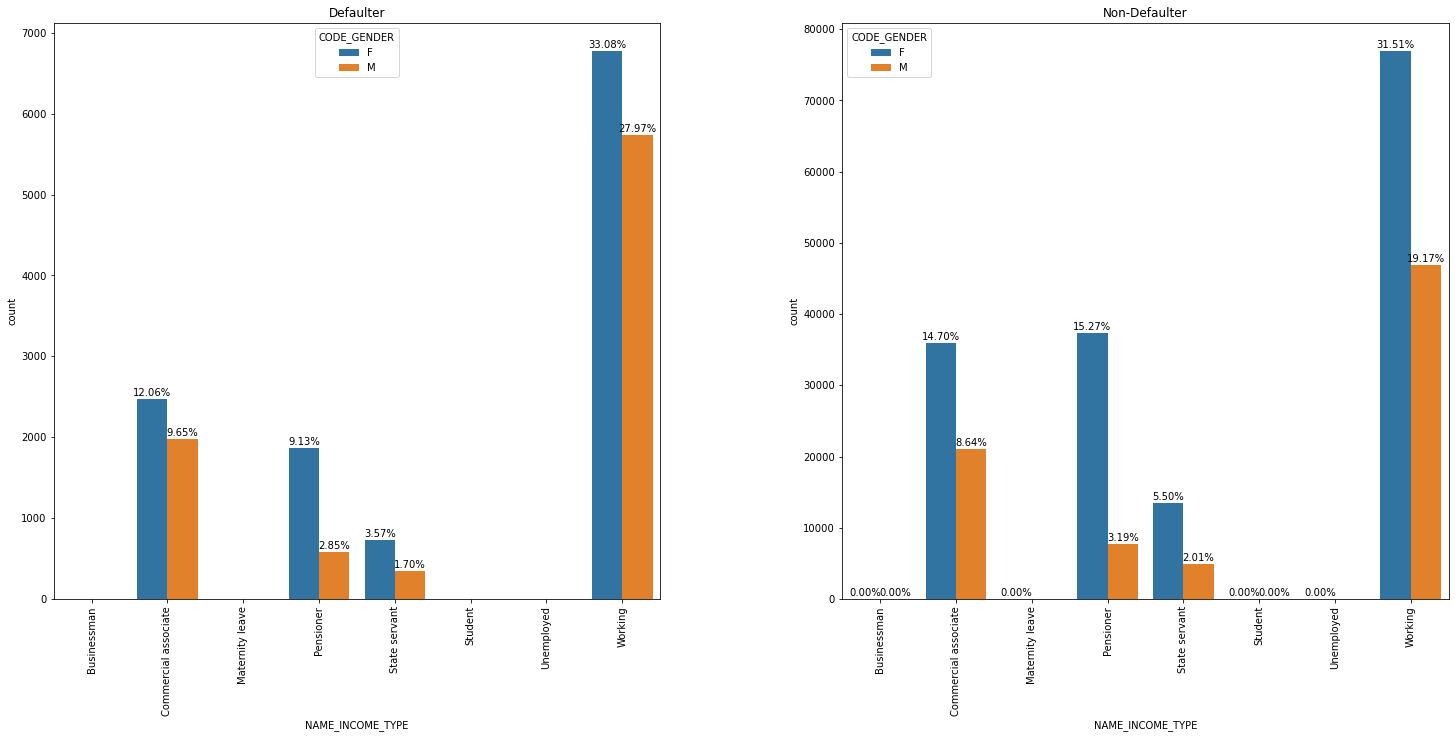

In [292]:
# using countplots

categorical_categorical_countplot('NAME_INCOME_TYPE','CODE_GENDER', (25,10), rot=90)

### CODE_GENDER vs NAME_FAMILY_STATUS

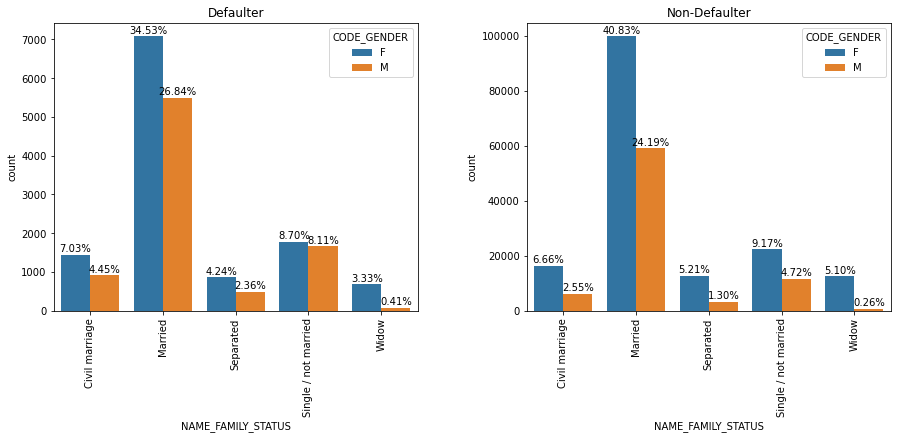

In [293]:
# using countplots

categorical_categorical_countplot('NAME_FAMILY_STATUS','CODE_GENDER', (15,5), rot=90)

### CODE_GENDER vs NAME_EDUCATION_TYPE

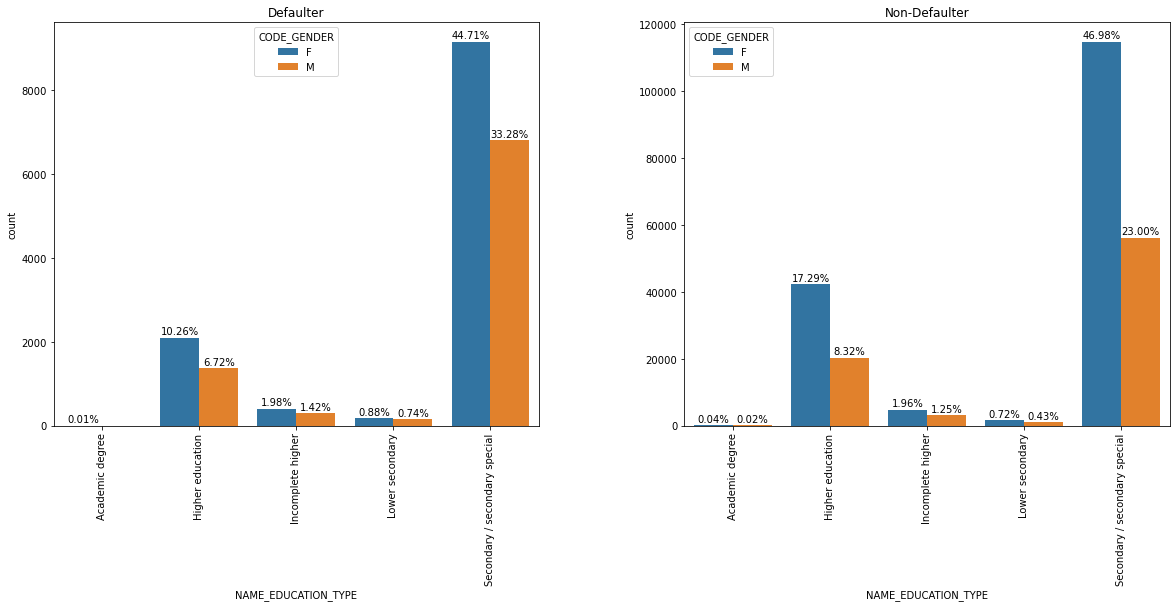

In [294]:
# using countplots

categorical_categorical_countplot('NAME_EDUCATION_TYPE','CODE_GENDER', (20,7), rot=90)

### CODE_GENDER vs AMT_INCOME_TOTAL

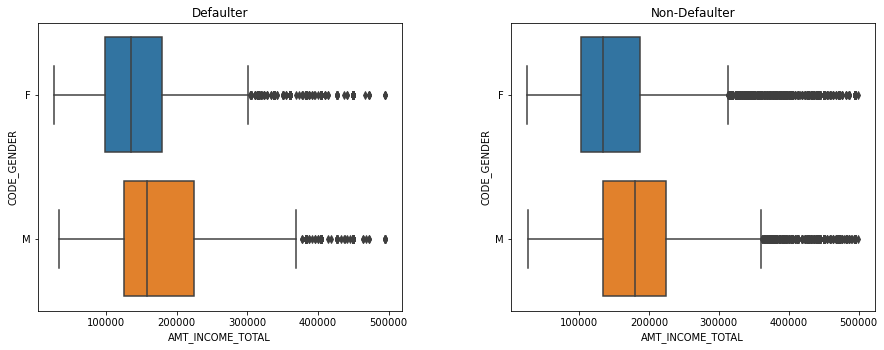

In [295]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','CODE_GENDER', d1, d2, (15,5))

###  CODE_GENDER  vs  AMT_CREDIT

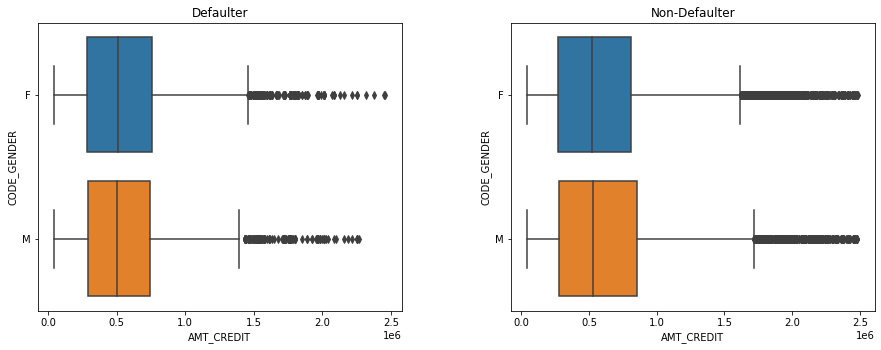

In [296]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]


categorical_continous_boxplot('AMT_CREDIT','CODE_GENDER', d1, d2, (15,5))

### FLAG_OWN_CAR vs CODE_GENDER

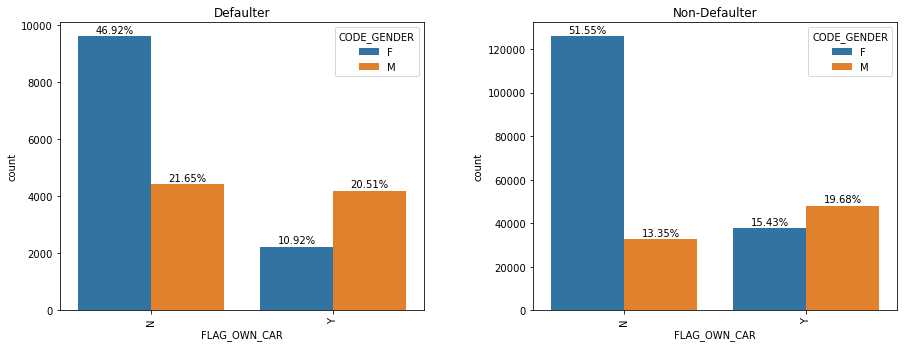

In [297]:
# using countplots

categorical_categorical_countplot('FLAG_OWN_CAR','CODE_GENDER', (15,5), rot=90)

### FLAG_OWN_CAR vs AMT_INCOME_TOTAL

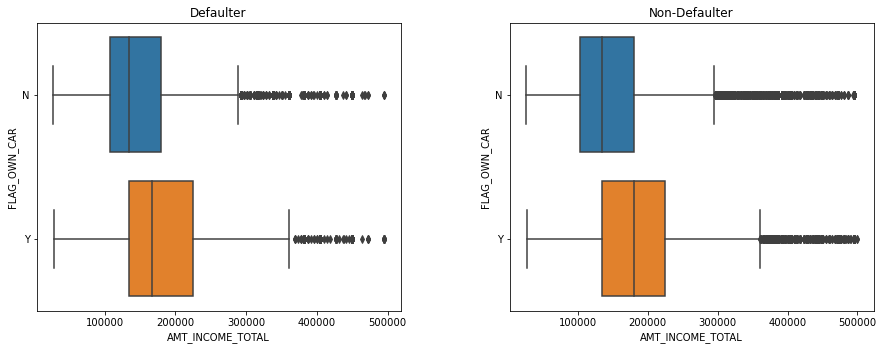

In [298]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','FLAG_OWN_CAR', d1, d2, (15,5))

### FLAG_OWN_CAR vs AMT_CREDIT

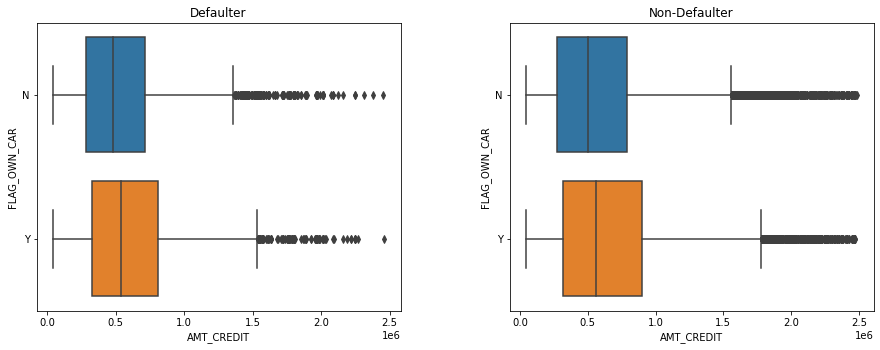

In [299]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]


categorical_continous_boxplot('AMT_CREDIT','FLAG_OWN_CAR', d1, d2, (15,5))

### FLAG_OWN_REALTY vs CODE_GENDER

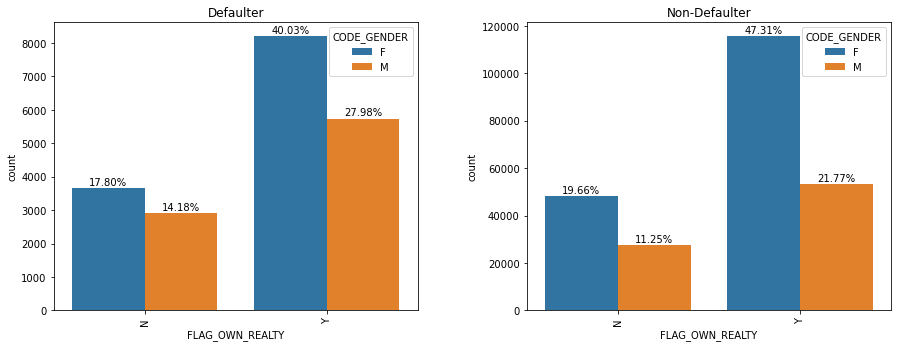

In [300]:
# using countplots

categorical_categorical_countplot('FLAG_OWN_REALTY','CODE_GENDER', (15,5), rot=90)

### FLAG_OWN_REALTY vs AMT_INCOME_TOTAL

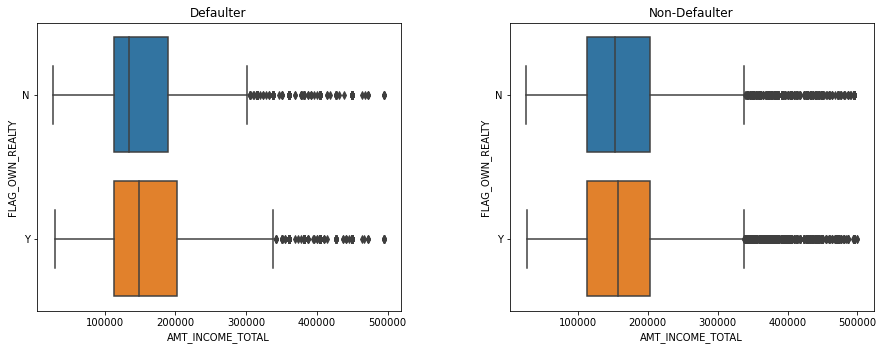

In [301]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','FLAG_OWN_REALTY', d1, d2, (15,5))

### FLAG_OWN_REALTY vs AMT_CREDIT

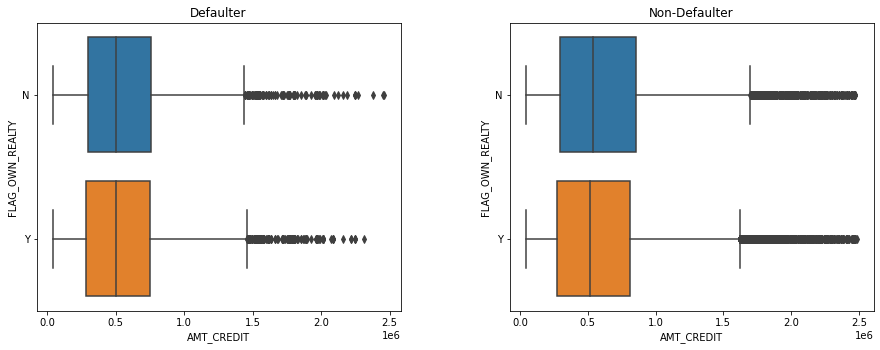

In [302]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]


categorical_continous_boxplot('AMT_CREDIT','FLAG_OWN_REALTY', d1, d2, (15,5))

### CNT_CHILDREN vs AMT_INCOME_TOTAL

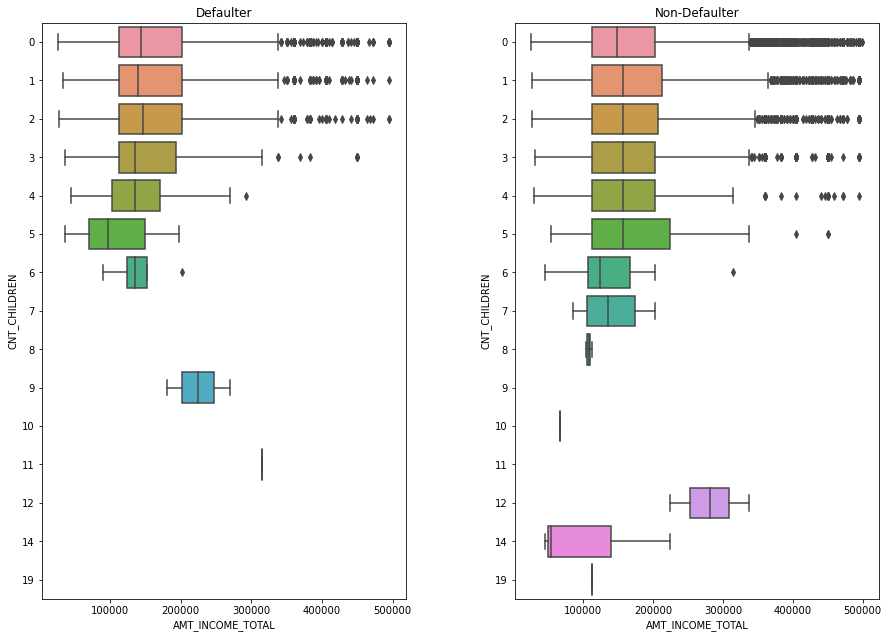

In [303]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','CNT_CHILDREN', d1, d2, (15,10))

### CNT_CHILDREN vs AMT_CREDIT

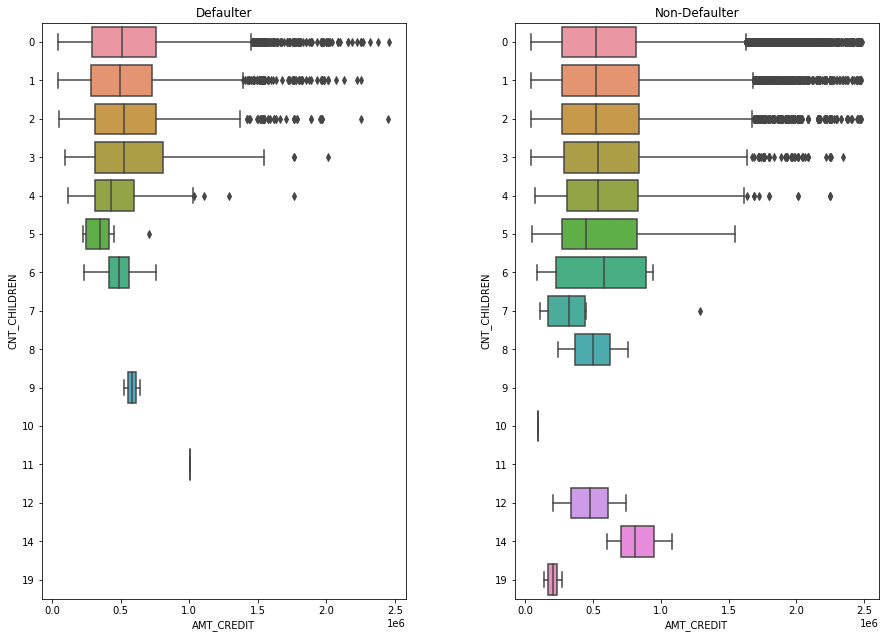

In [304]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]


categorical_continous_boxplot('AMT_CREDIT','CNT_CHILDREN', d1, d2, (15,10))

### AMT_INCOME_TOTAL vs  AMT_CREDIT

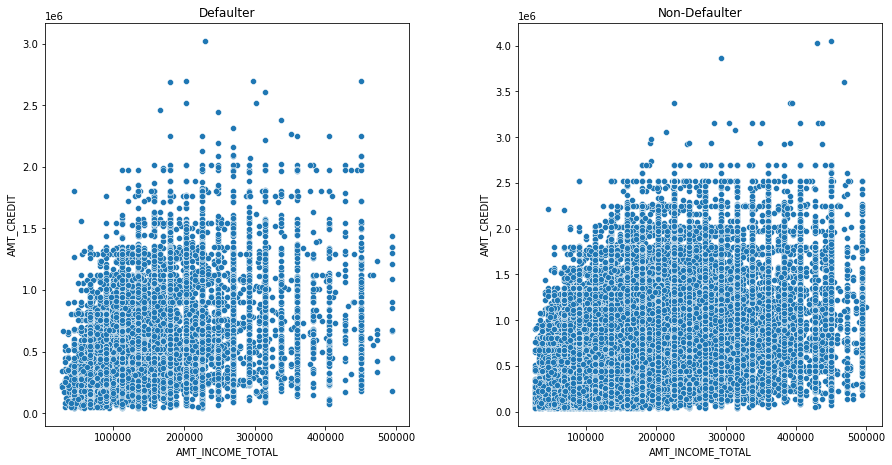

In [305]:
# using scatterplots

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

continous_continous_scatterplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', d1, d2, (15,7))

### AMT_INCOME_TOTAL vs OCCUPATION_TYPE

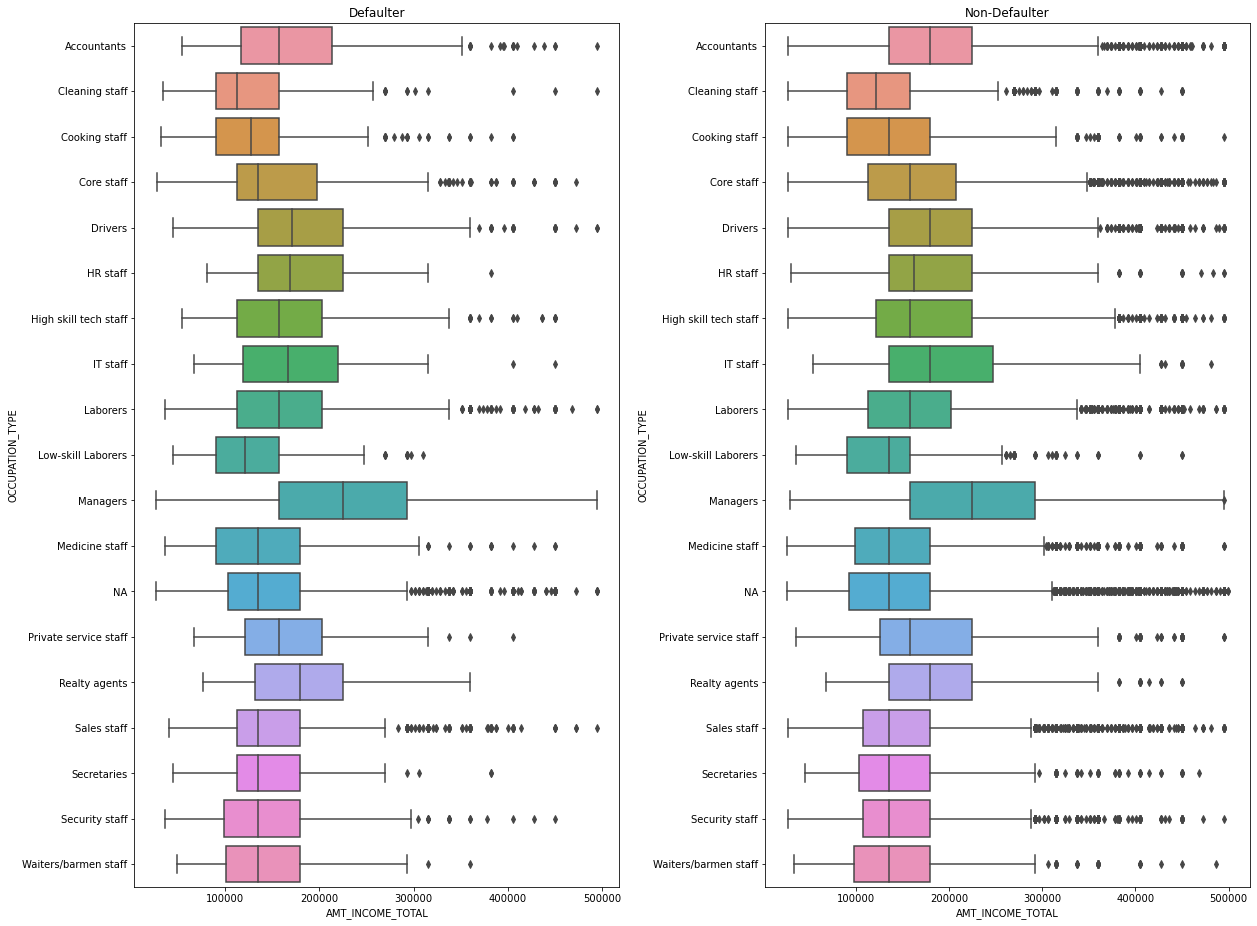

In [306]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','OCCUPATION_TYPE', d1, d2, (20,15))

### AMT_INCOME_TOTAL vs NAME_HOUSING_TYPE

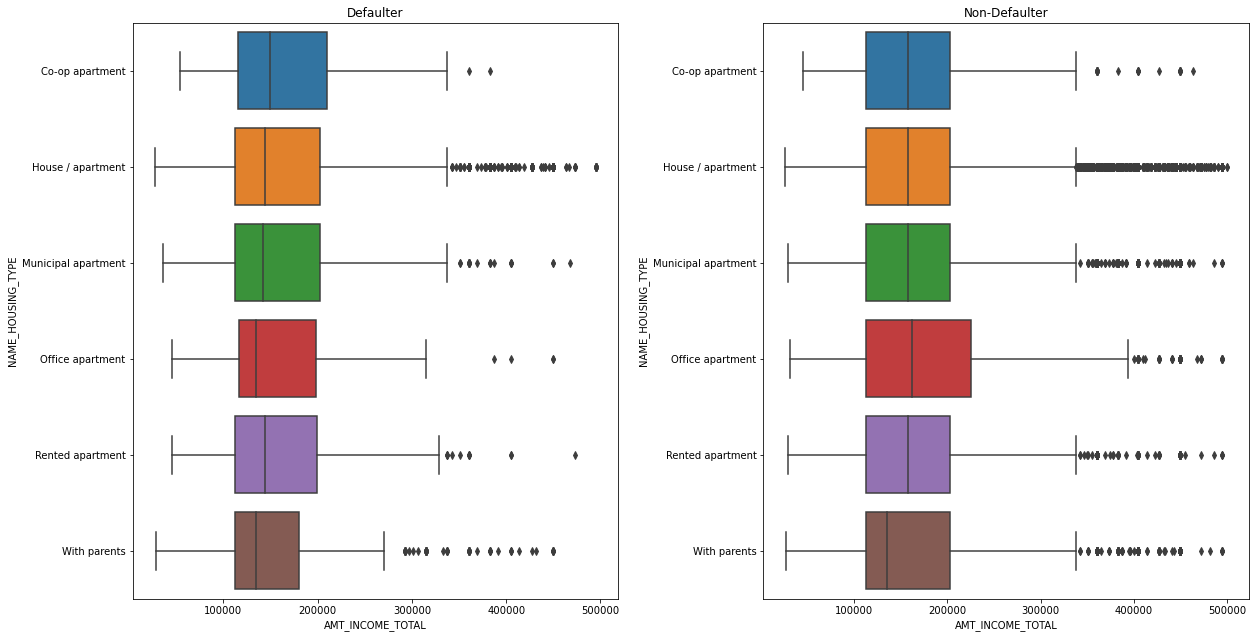

In [307]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','NAME_HOUSING_TYPE', d1, d2, (20,10))

### AMT_GOODS_PRICE vs NAME_INCOME_TYPE

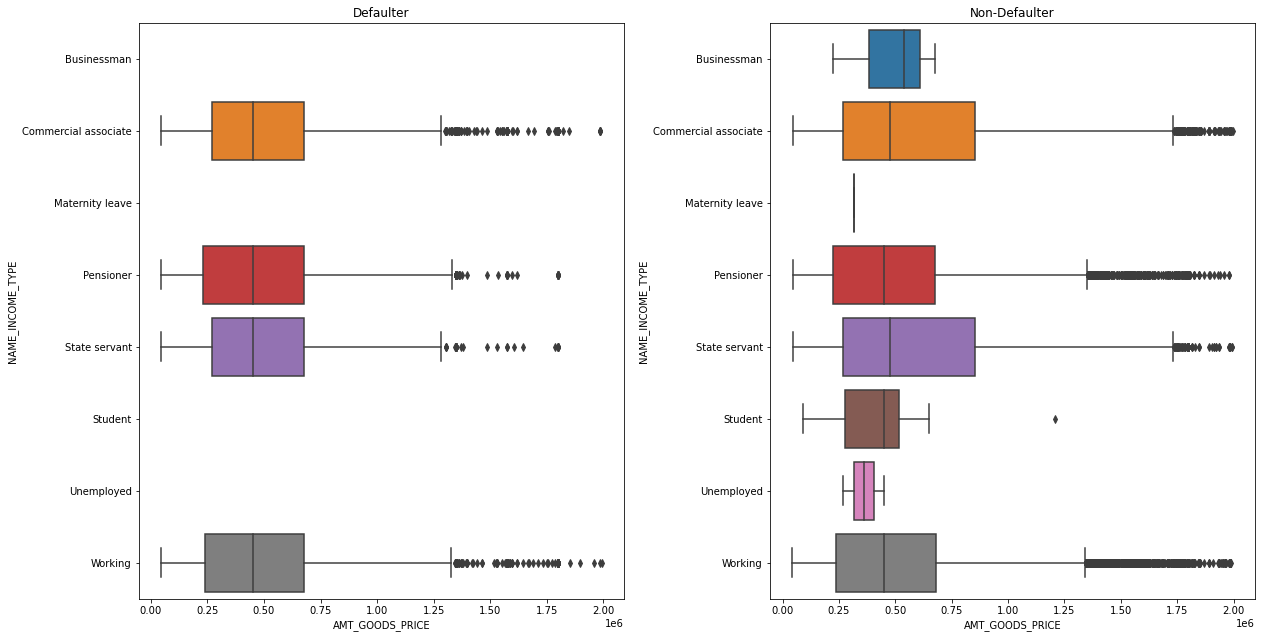

In [308]:
# using boxplots 

d1 = defaulter[defaulter['AMT_GOODS_PRICE']<2000000]
d2 = non_defaulter[non_defaulter['AMT_GOODS_PRICE']<2000000]

categorical_continous_boxplot('AMT_GOODS_PRICE','NAME_INCOME_TYPE', d1, d2, (20,10))

### NAME_TYPE_SUITE  vs  AMT_INCOME_TOTAL

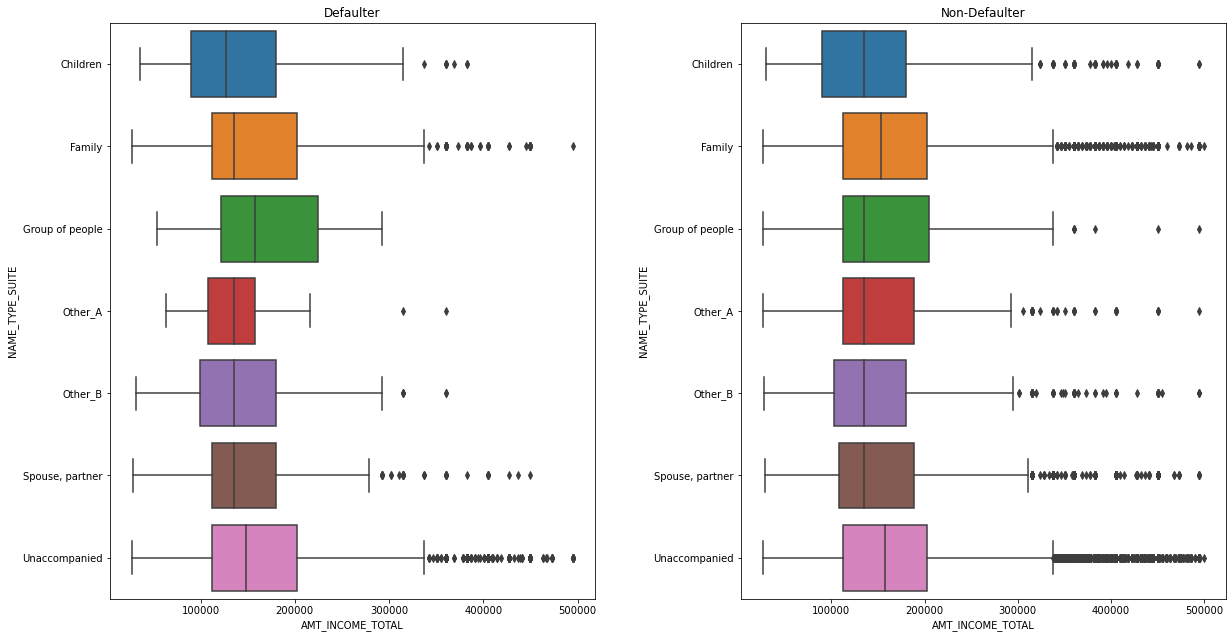

In [309]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','NAME_TYPE_SUITE', d1, d2, (20,10))

### NAME_TYPE_SUITE  vs  AMT_INCOME_TOTAL

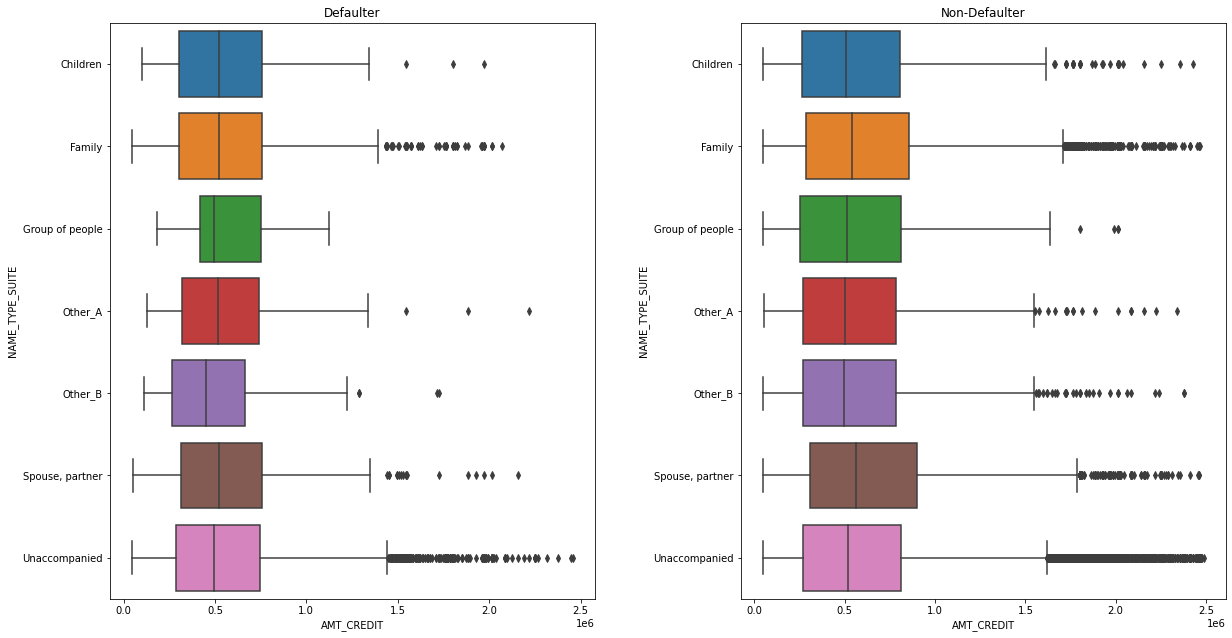

In [310]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','NAME_TYPE_SUITE', d1, d2, (20,10))

### NAME_INCOME_TYPE vs AMT_INCOME_TOTAL

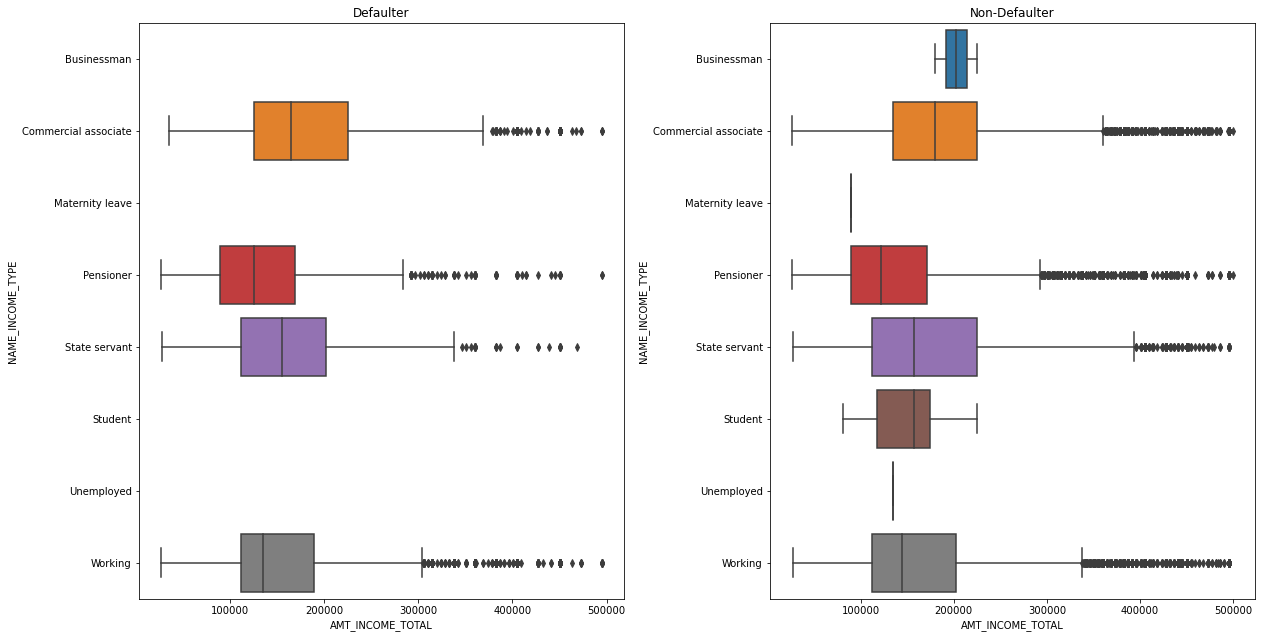

In [311]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','NAME_INCOME_TYPE', d1, d2, (20,10))

### NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL

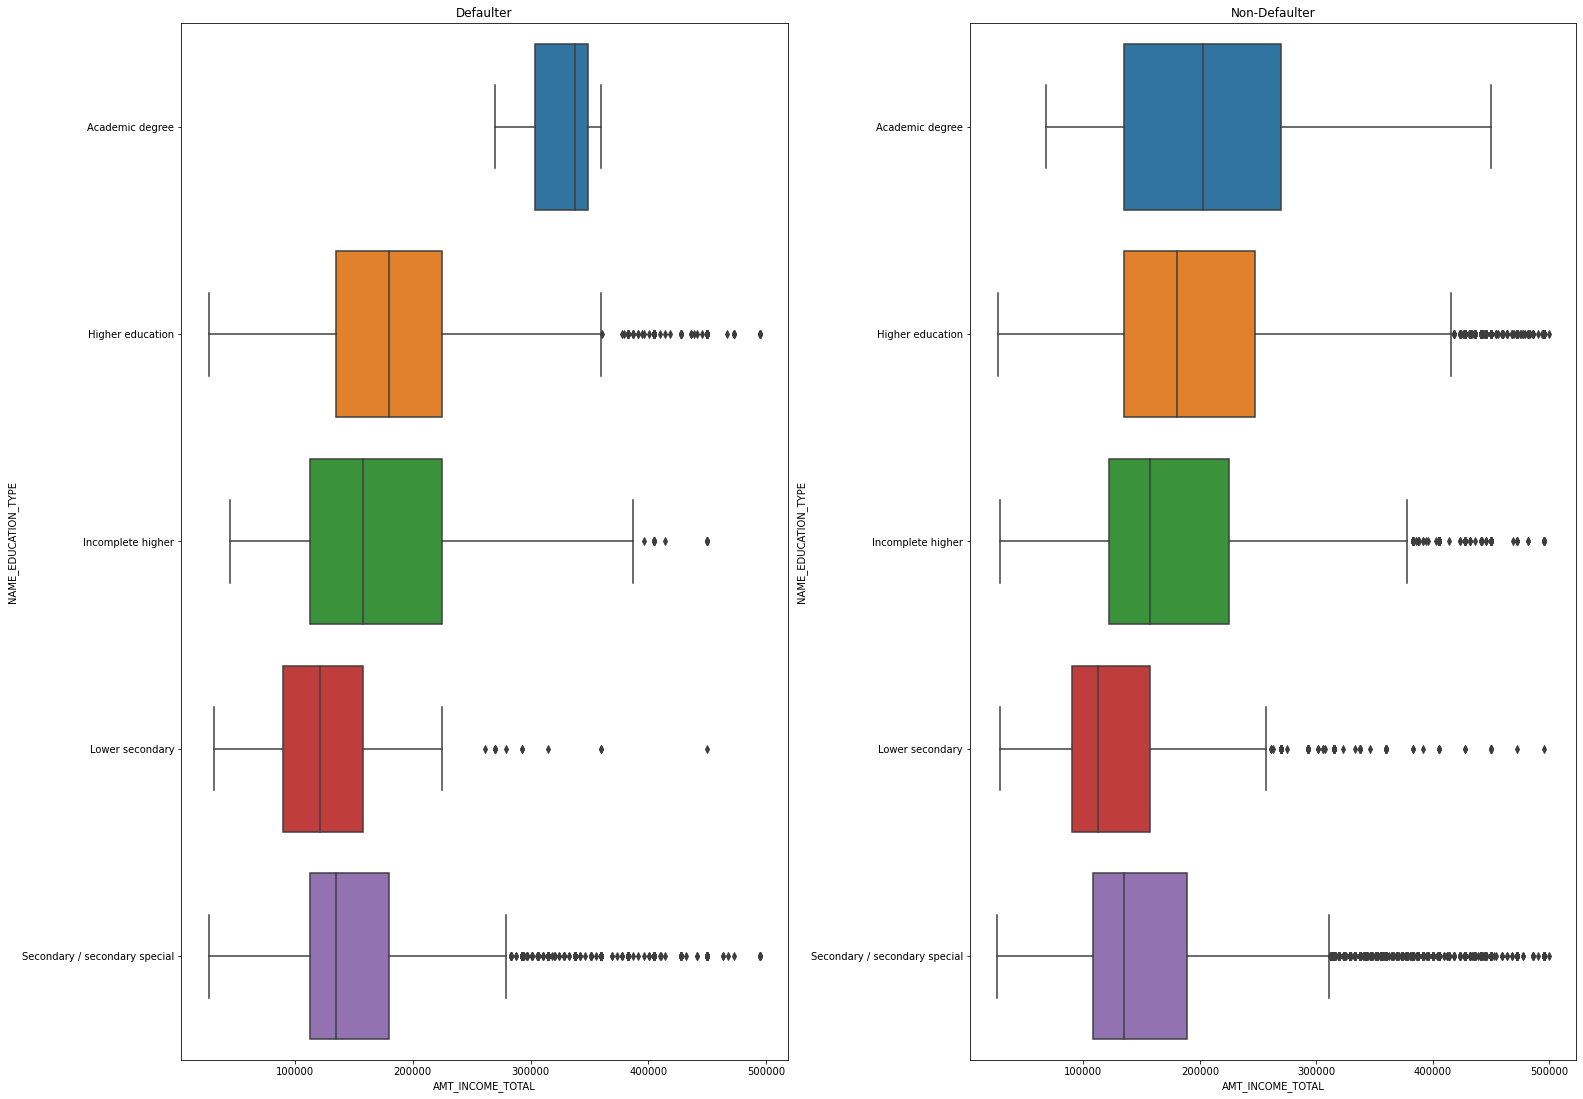

In [312]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE', d1, d2, (25,18))

### NAME_FAMILY_STATUS vs  AMT_INCOME_TOTAL

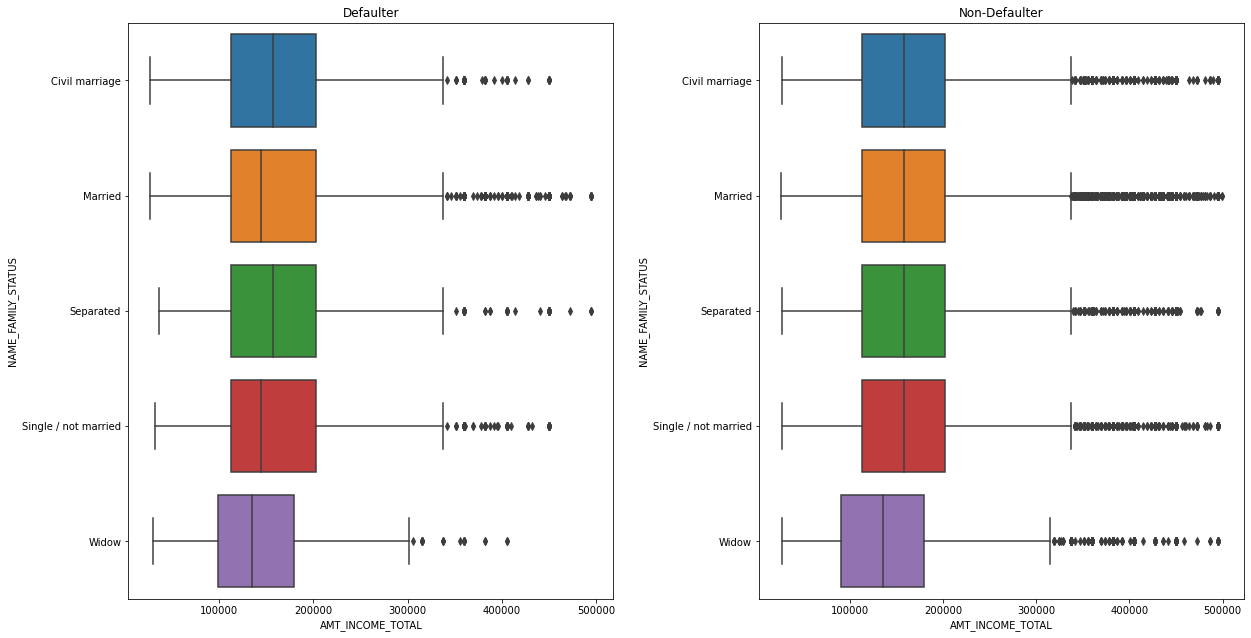

In [313]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','NAME_FAMILY_STATUS', d1, d2, (20,10))

### NAME_FAMILY_STATUS vs  AMT_CREDIT

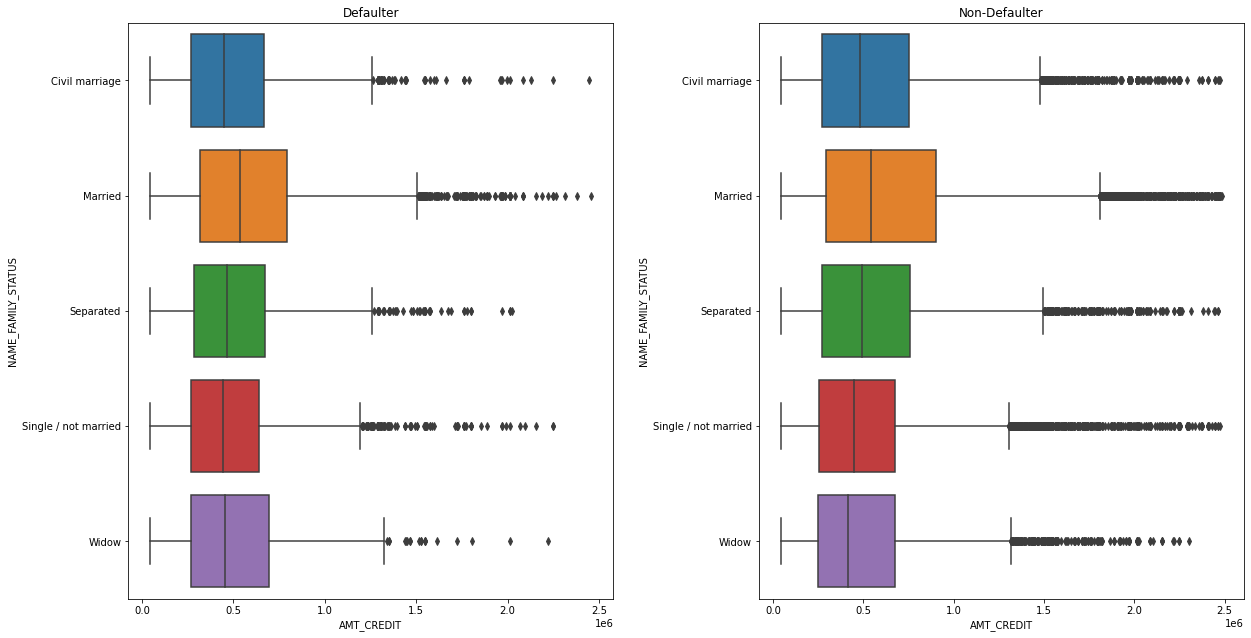

In [314]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','NAME_FAMILY_STATUS', d1, d2, (20,10))

###  NAME_HOUSING_TYPE  vs  AMT_INCOME_TOTAL

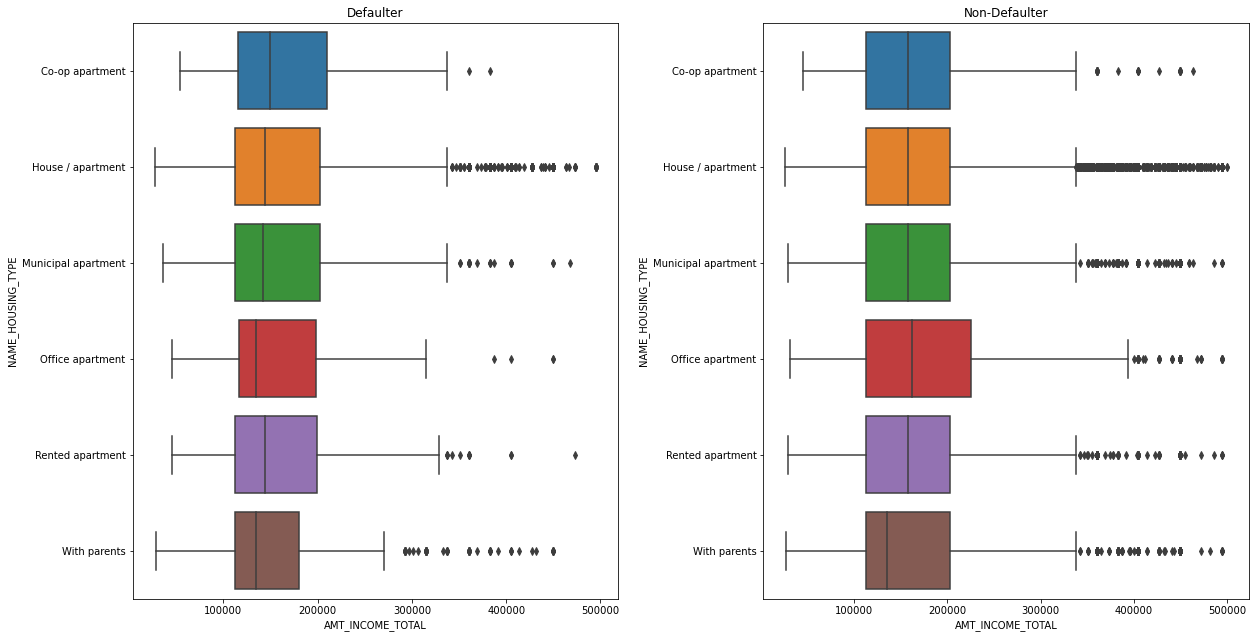

In [315]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','NAME_HOUSING_TYPE', d1, d2, (20,10))

### NAME_HOUSING_TYPE vs  AMT_CREDIT

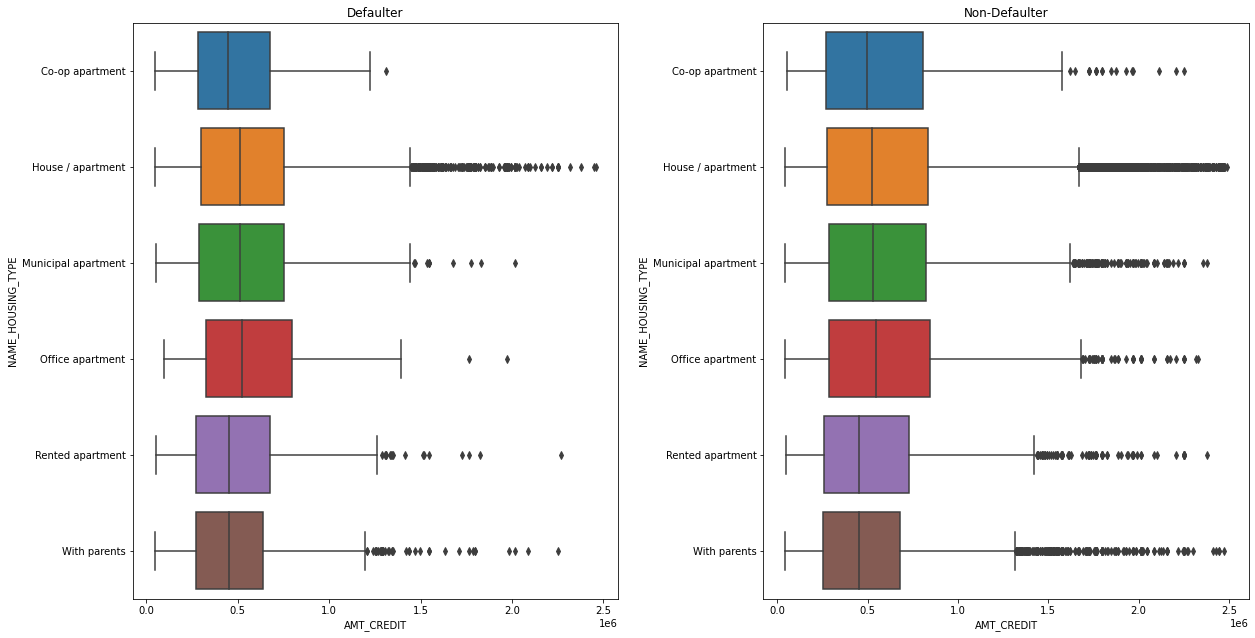

In [316]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','NAME_HOUSING_TYPE', d1, d2, (20,10))

### REGION_POPULATION_RELATIVE  vs  NAME_EDUCATION_TYPE

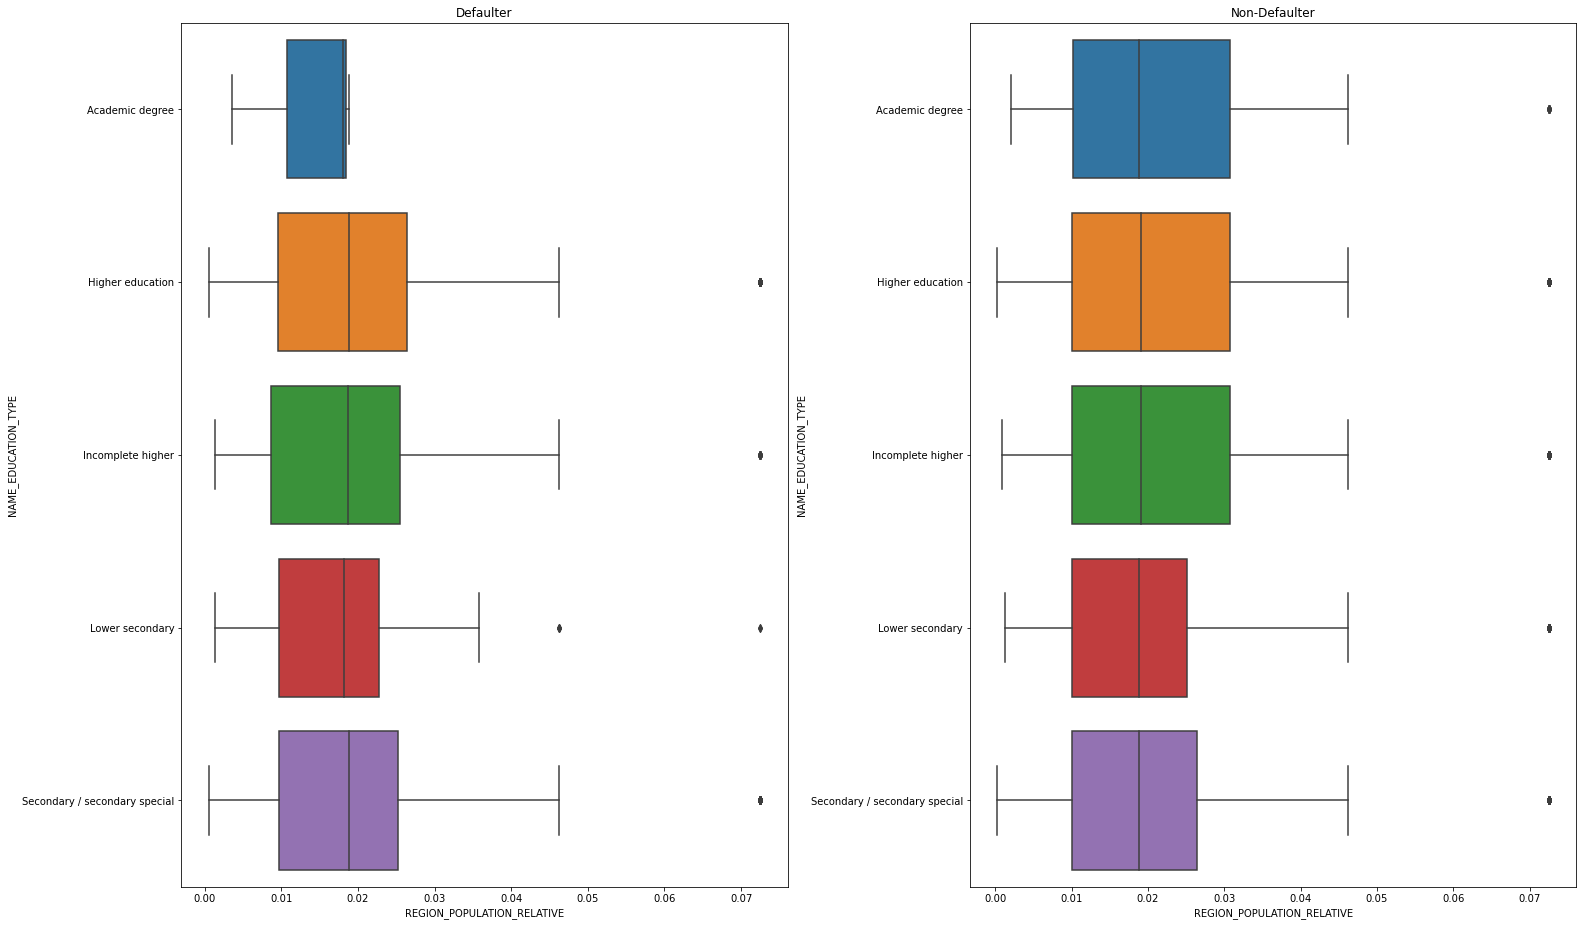

In [317]:
# using boxplots 

d1 = defaulter
d2 = non_defaulter

categorical_continous_boxplot('REGION_POPULATION_RELATIVE','NAME_EDUCATION_TYPE', d1, d2, (25,15))

### REGION_POPULATION_RELATIVE  vs  AMT_INCOME_TOTAL

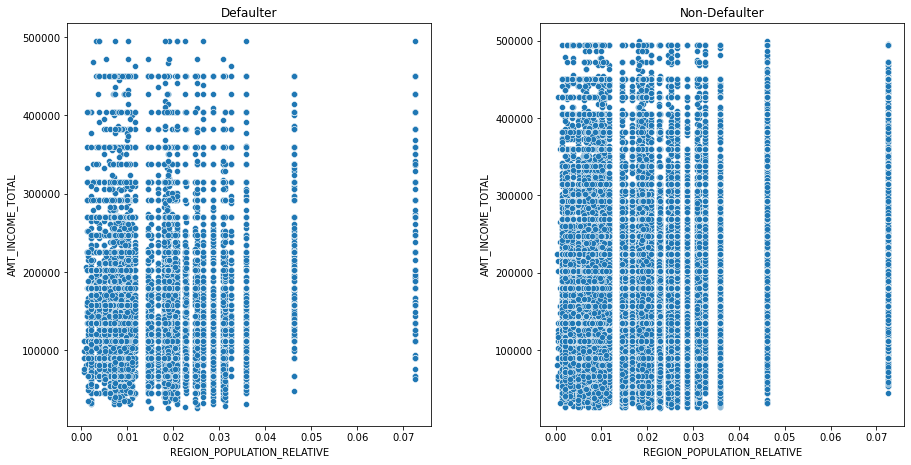

In [318]:
# using scatterplots

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

continous_continous_scatterplot('REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', d1, d2, (15,7))

### REGION_POPULATION_RELATIVE  vs  AMT_CREDIT

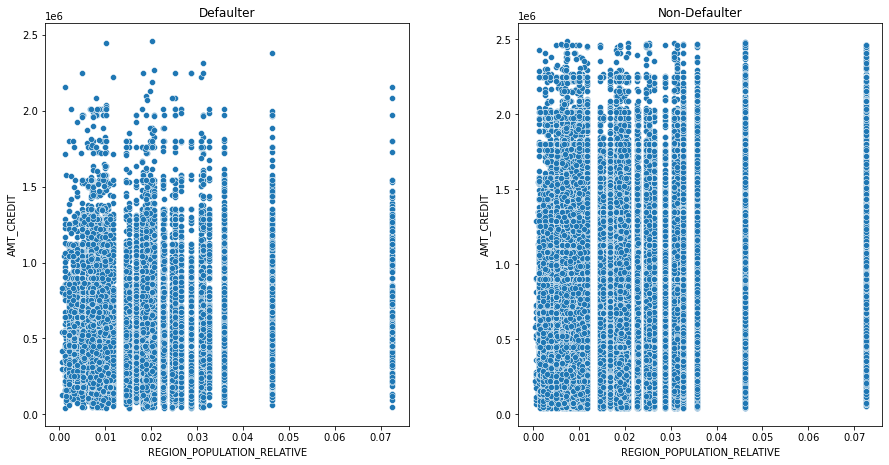

In [319]:
# using scatterplots

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

continous_continous_scatterplot('REGION_POPULATION_RELATIVE', 'AMT_CREDIT', d1, d2, (15,7))

### REGION_POPULATION_RELATIVE  vs  NAME_HOUSING_TYPE

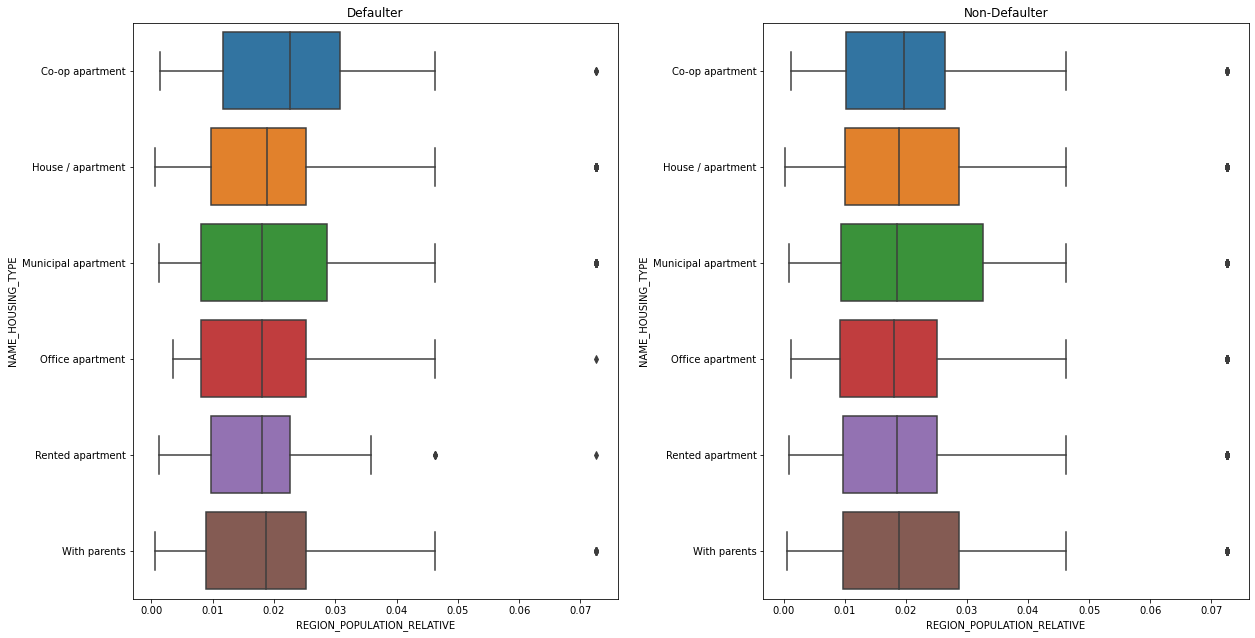

In [320]:
# using boxplots 

d1 = defaulter
d2 = non_defaulter

categorical_continous_boxplot('REGION_POPULATION_RELATIVE','NAME_HOUSING_TYPE', d1, d2, (20,10))

### REGION_POPULATION_RELATIVE  vs  NAME_INCOME_TYPE

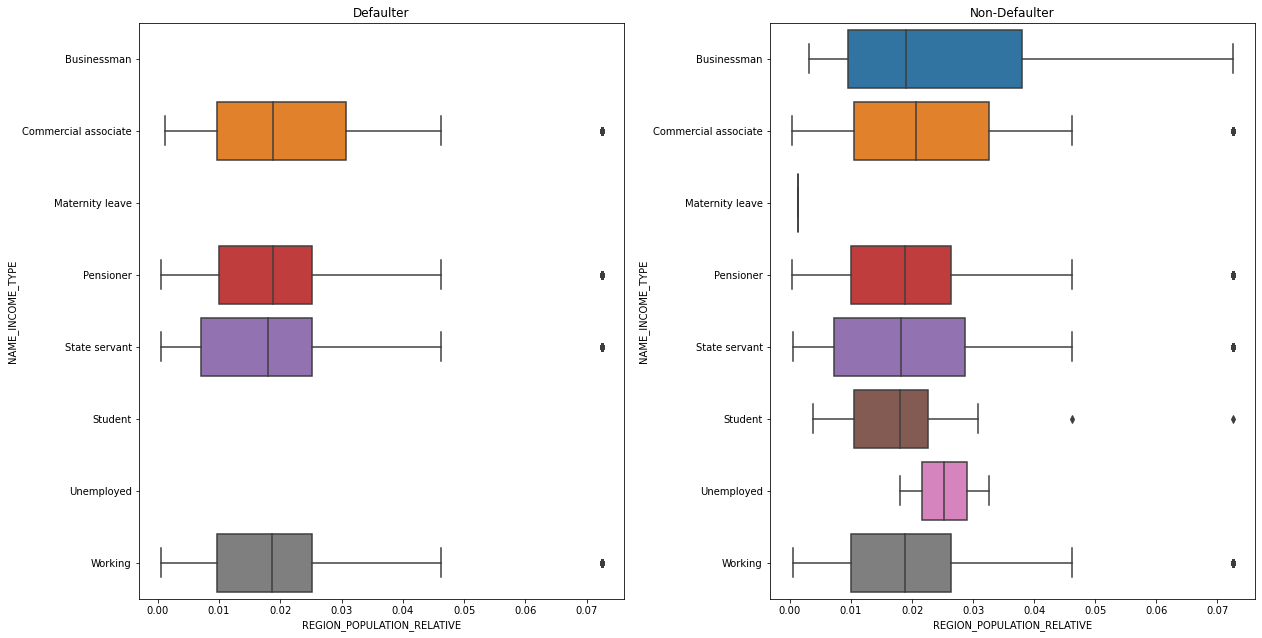

In [321]:
# using boxplots 

d1 = defaulter
d2 = non_defaulter

categorical_continous_boxplot('REGION_POPULATION_RELATIVE','NAME_INCOME_TYPE', d1, d2, (20,10))

### OCCUPATION_TYPE vs AMT_INCOME_TOTAL

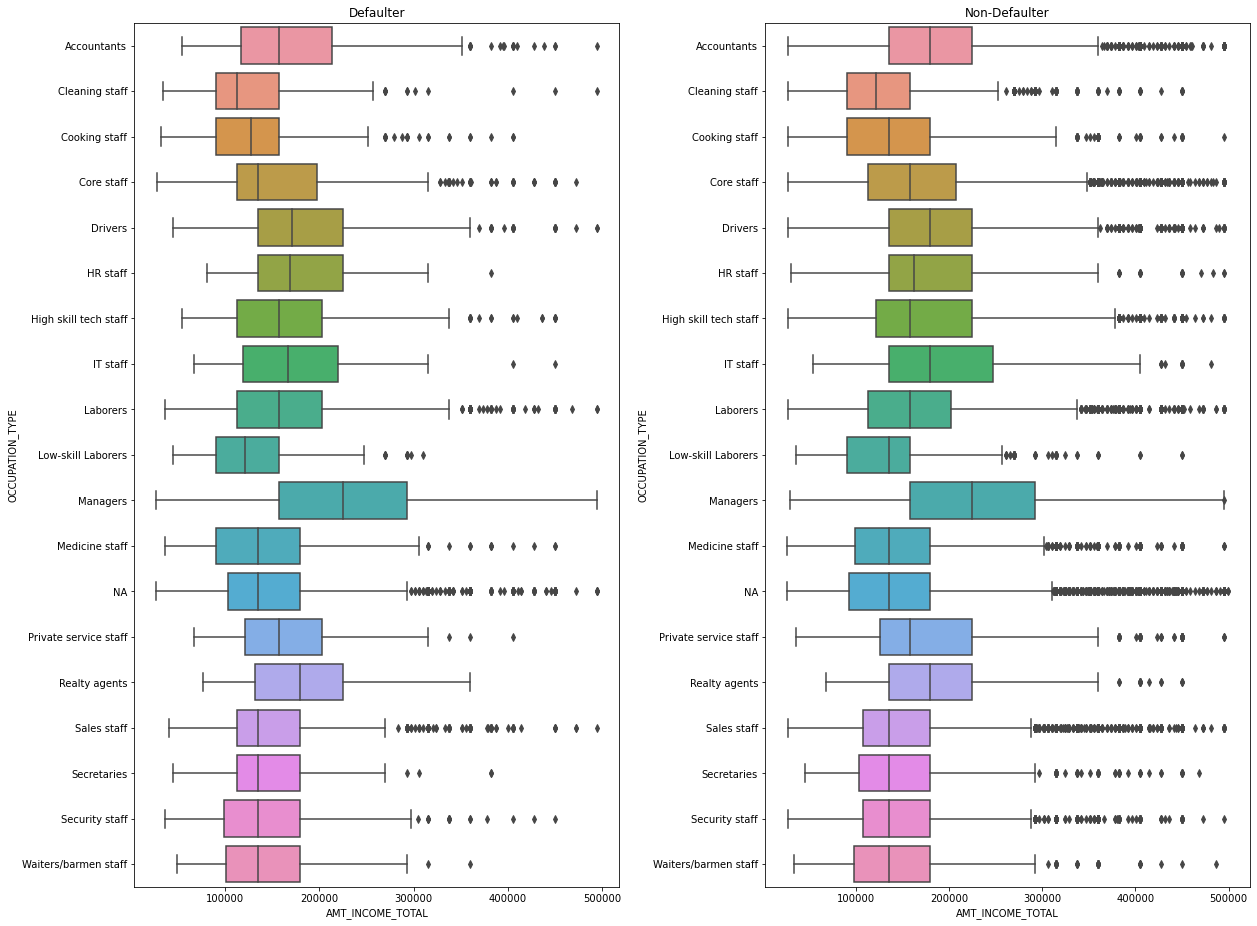

In [322]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','OCCUPATION_TYPE', d1, d2, (20,15))

### OCCUPATION_TYPE vs AMT_CREDIT

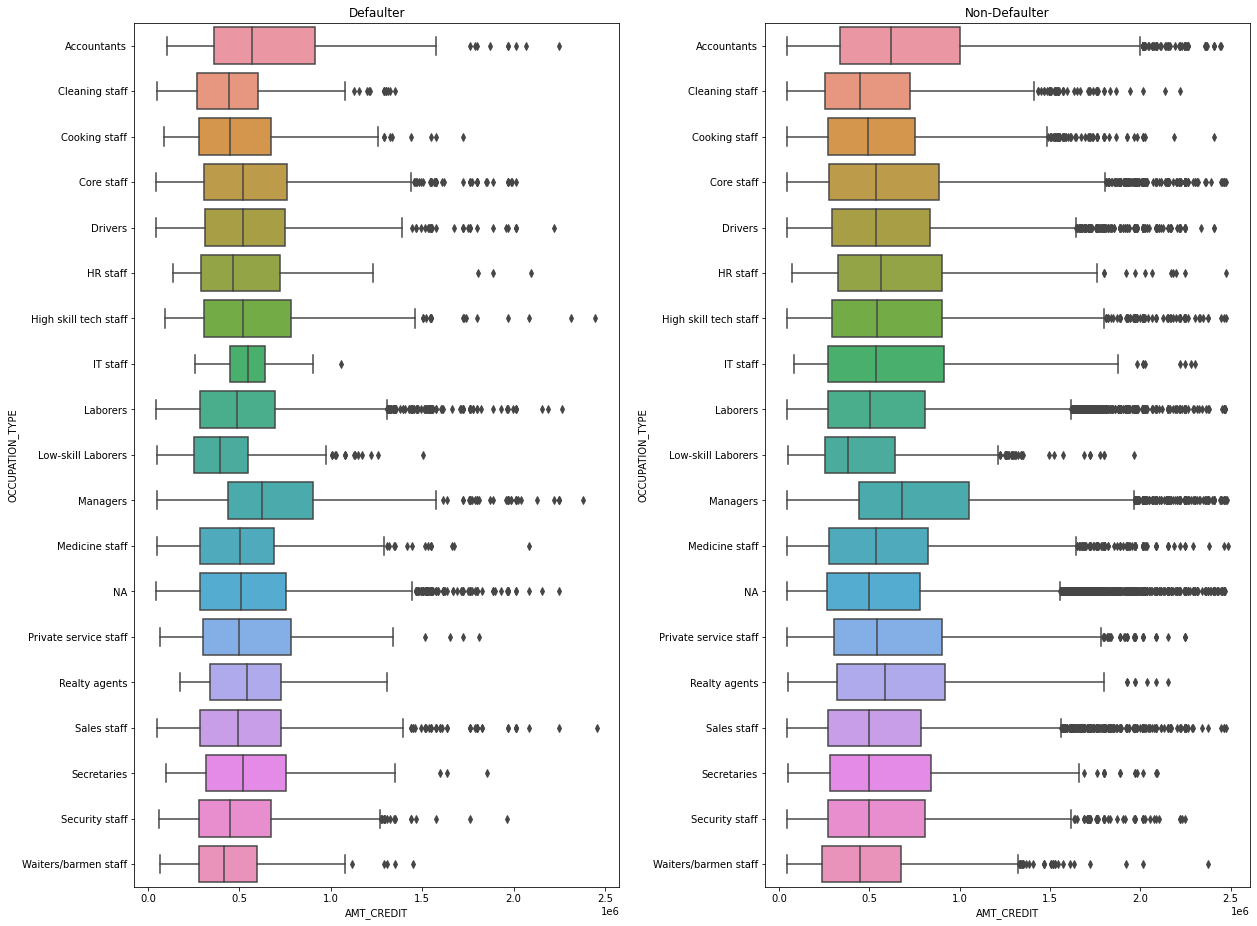

In [323]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','OCCUPATION_TYPE', d1, d2, (20,15))

### CNT_FAM_MEMBERS  vs  AMT_INCOME_TOTAL

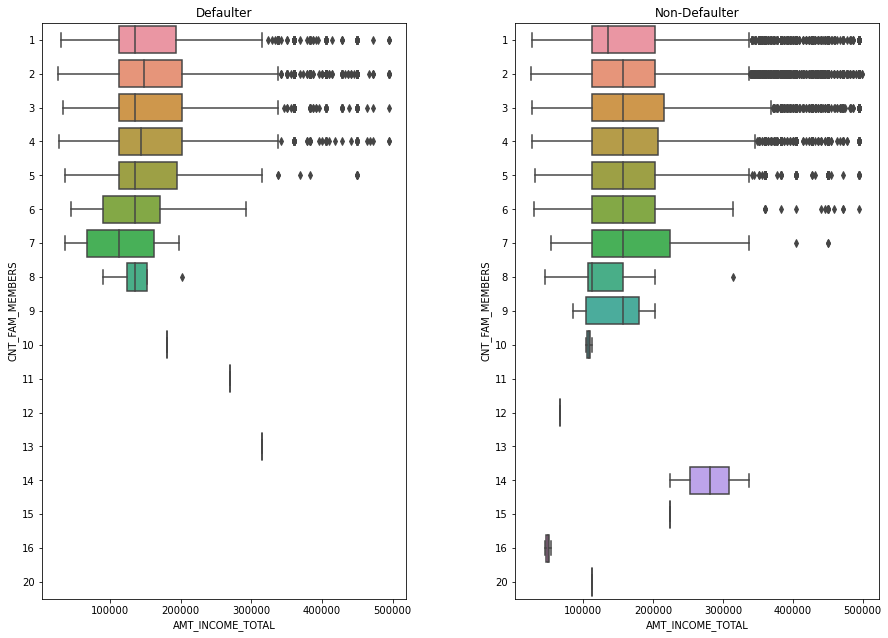

In [324]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','CNT_FAM_MEMBERS', d1, d2, (15,10))

### CNT_FAM_MEMBERS  vs AMT_CREDIT

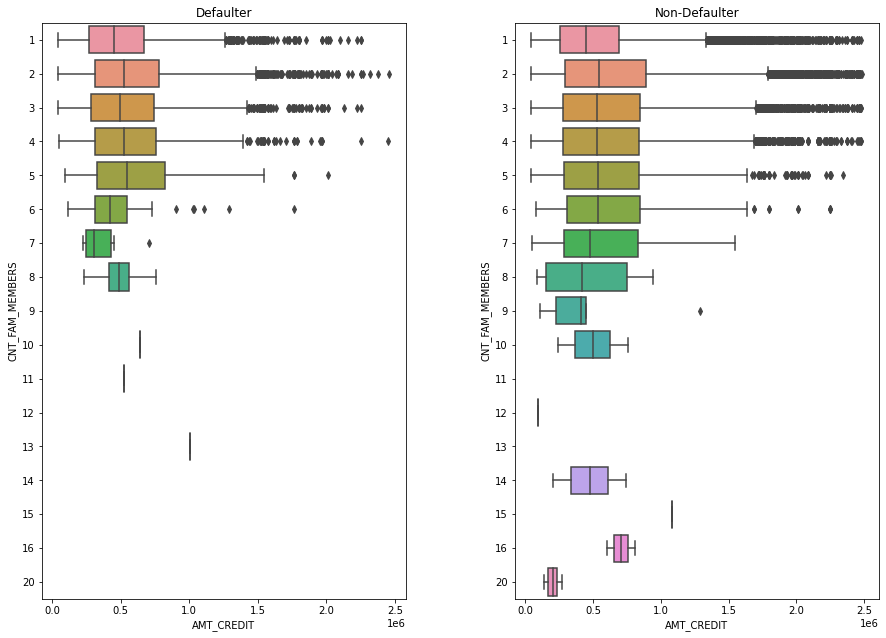

In [325]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]


categorical_continous_boxplot('AMT_CREDIT','CNT_FAM_MEMBERS', d1, d2, (15,10))

### REGION_RATING_CLIENT vs AMT_INCOME_TOTAL

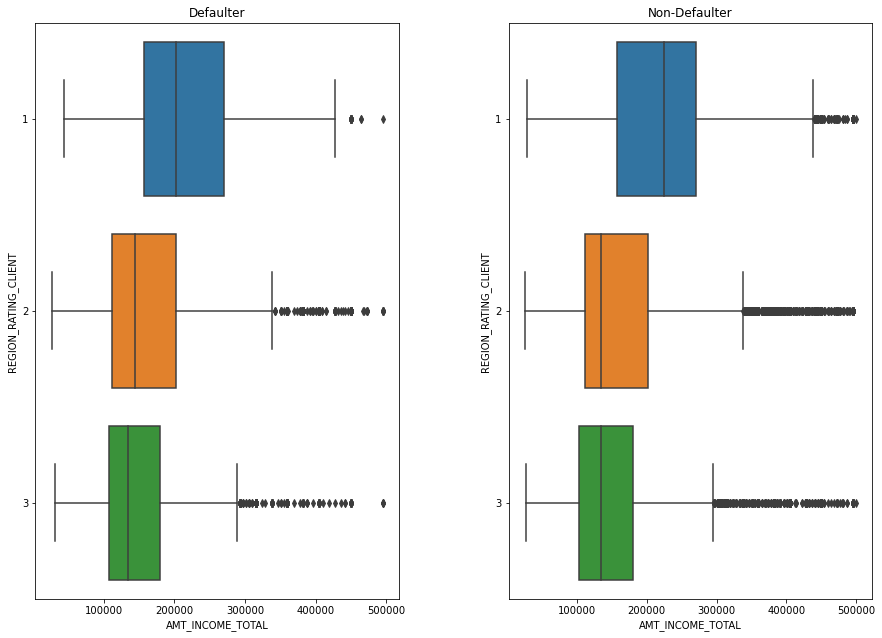

In [326]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','REGION_RATING_CLIENT', d1, d2, (15,10))

### REGION_RATING_CLIENT vs AMT_CREDIT

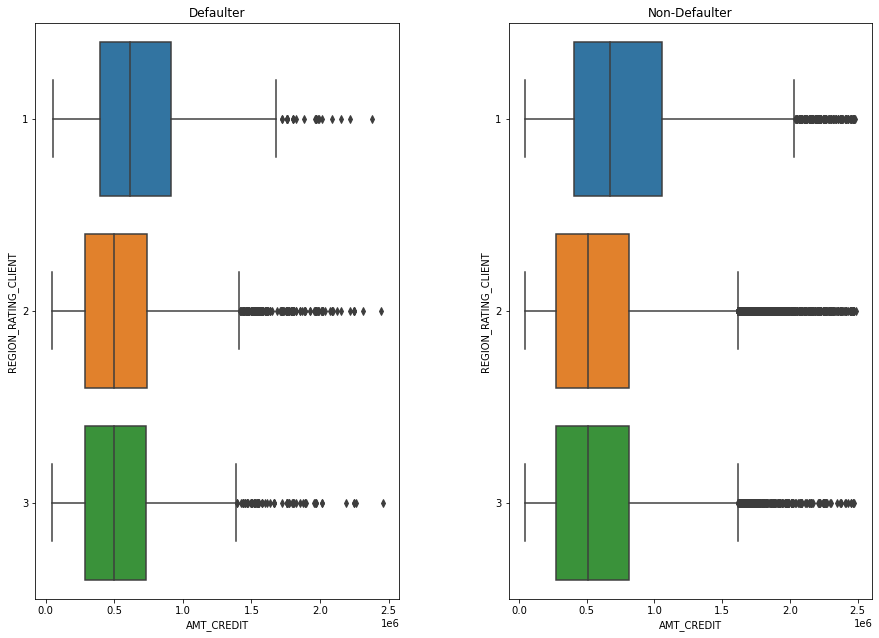

In [327]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','REGION_RATING_CLIENT', d1, d2, (15,10))

### REGION_RATING_CLIENT vs NAME_HOUSING_TYPE

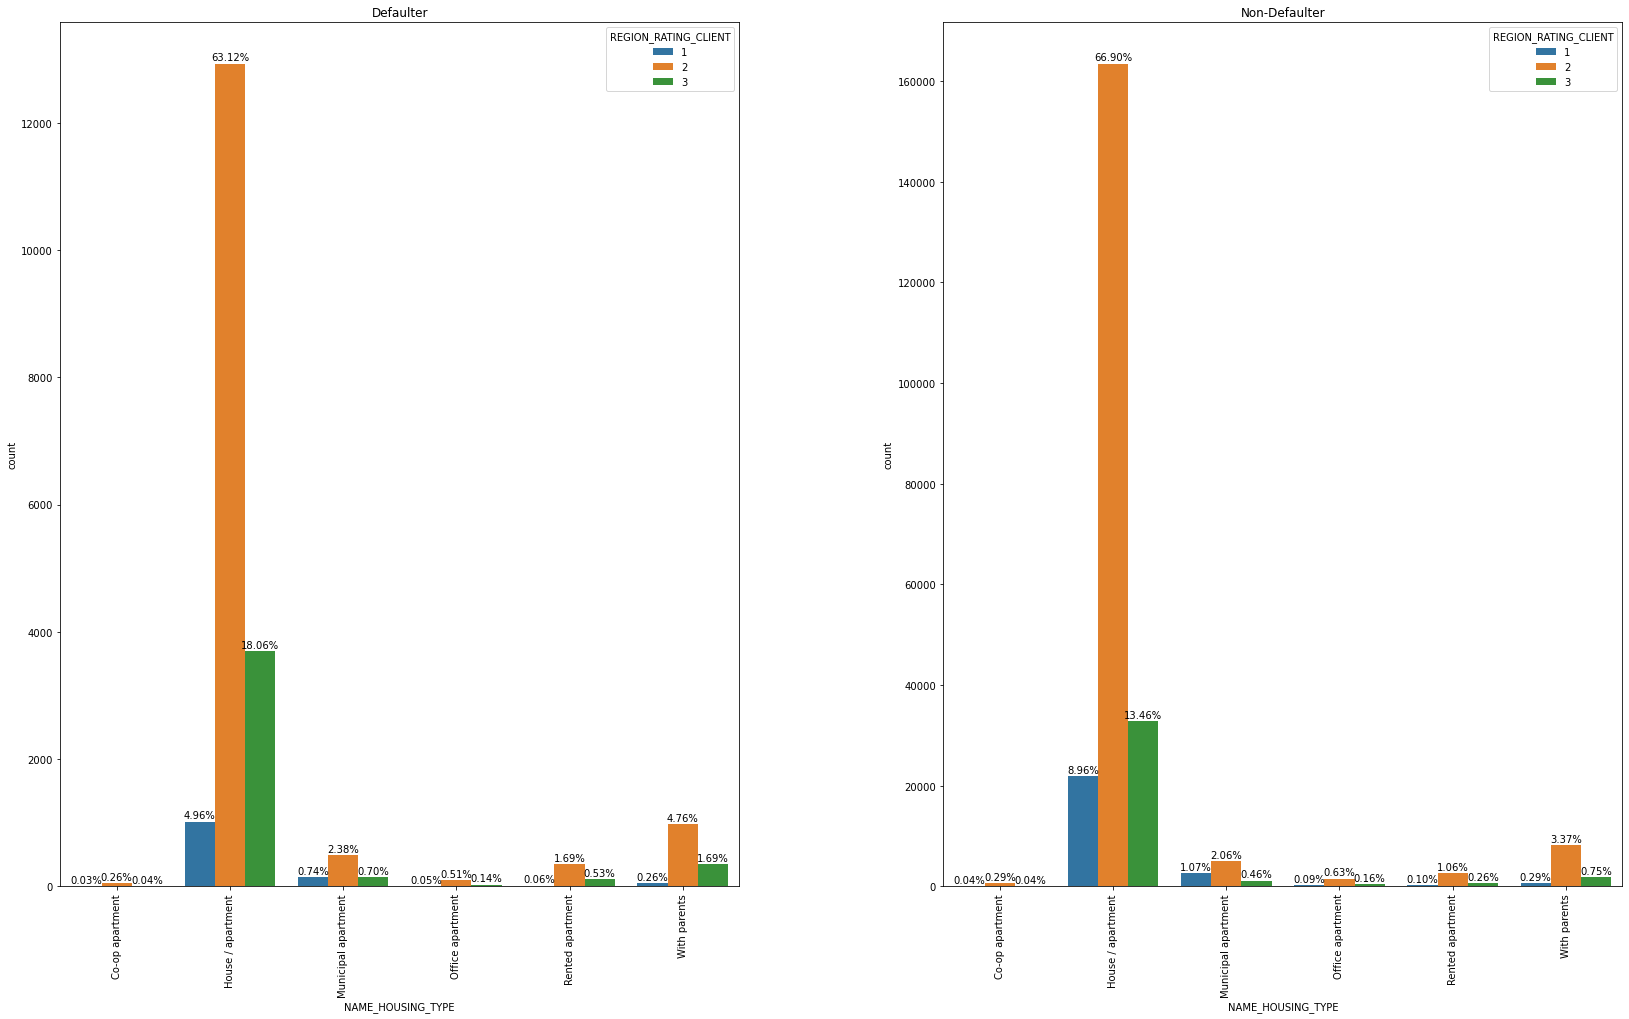

In [328]:
# using countplots

categorical_categorical_countplot('NAME_HOUSING_TYPE','REGION_RATING_CLIENT', (28,15), rot=90)

### WEEKDAY_APPR_PROCESS_START vs AMT_CREDIT

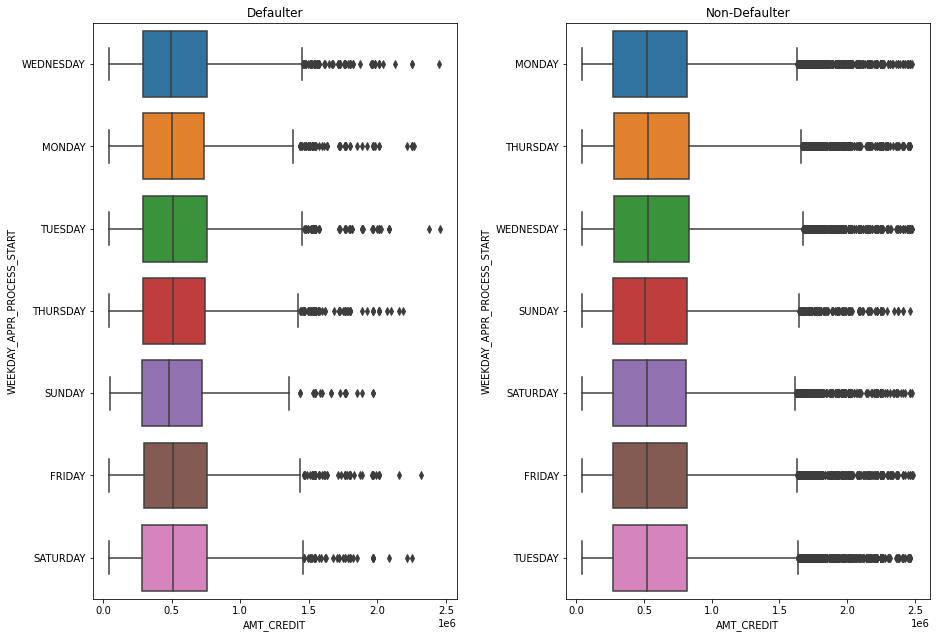

In [329]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','WEEKDAY_APPR_PROCESS_START', d1, d2, (15,10))

### EXT_SOURCE_2  vs  AMT_INCOME_TOTAL

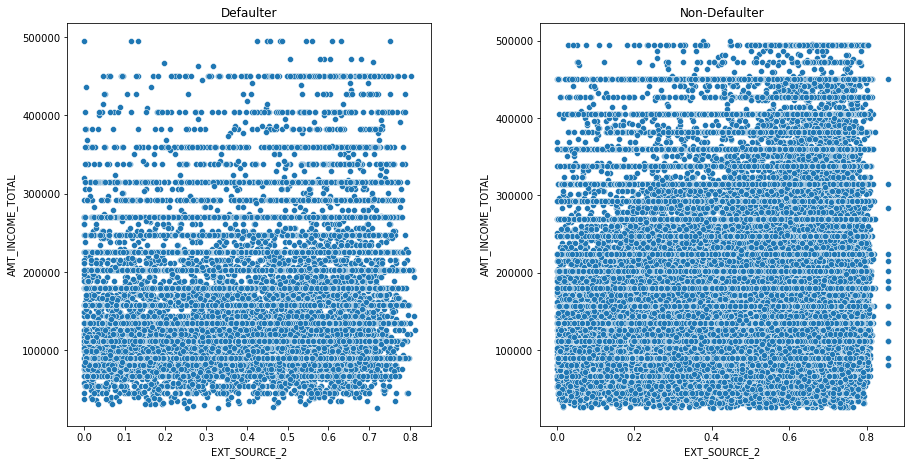

In [330]:
# using scatterplots

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

continous_continous_scatterplot('EXT_SOURCE_2', 'AMT_INCOME_TOTAL', d1, d2, (15,7))

### EXT_SOURCE_2  vs  AMT_CREDIT

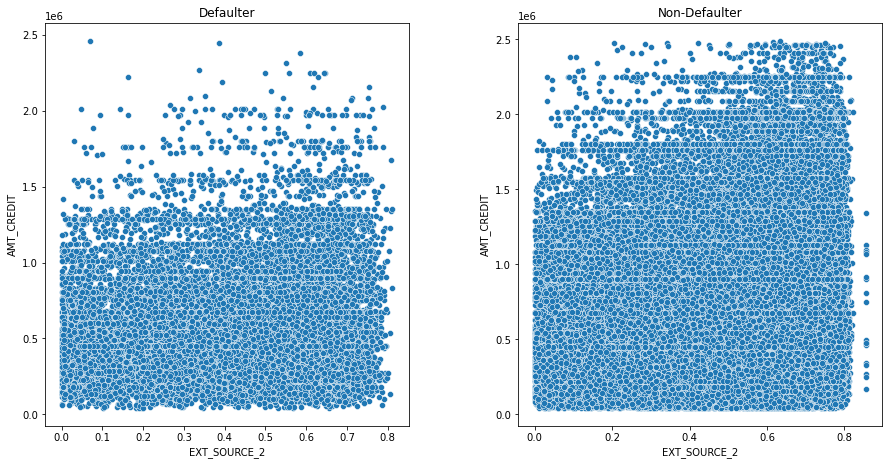

In [331]:
# using scatterplots

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

continous_continous_scatterplot('EXT_SOURCE_2', 'AMT_CREDIT', d1, d2, (15,7))

### INCOME_GROUPS vs NAME_INCOME_TYPE

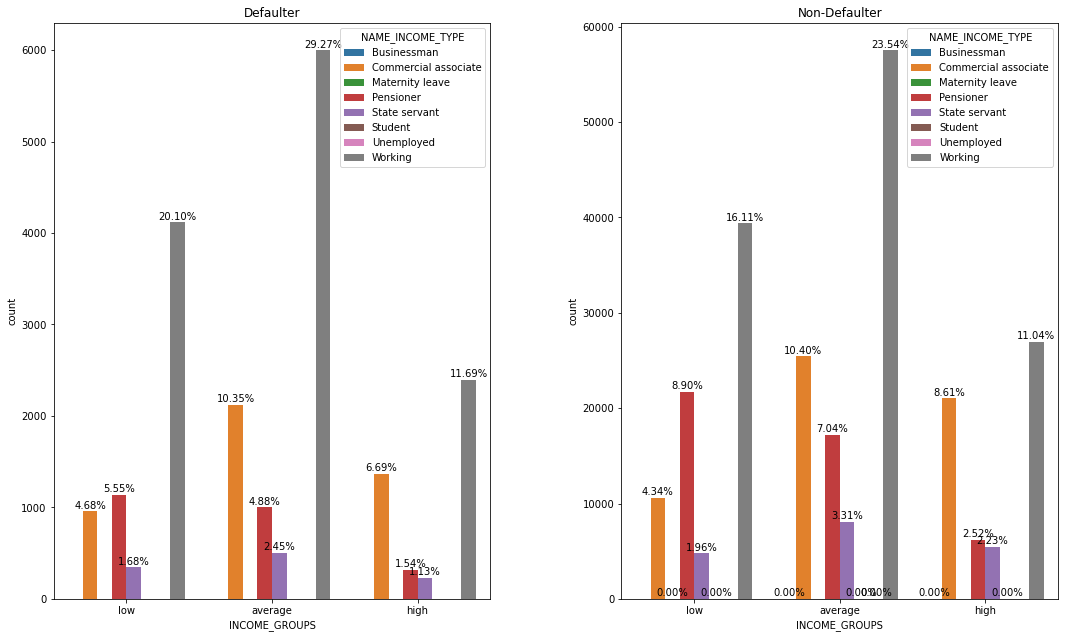

In [332]:
# using countplots

categorical_categorical_countplot('INCOME_GROUPS','NAME_INCOME_TYPE', (18,10))

### INCOME_GROUPS vs NAME_EDUCATION_TYPE

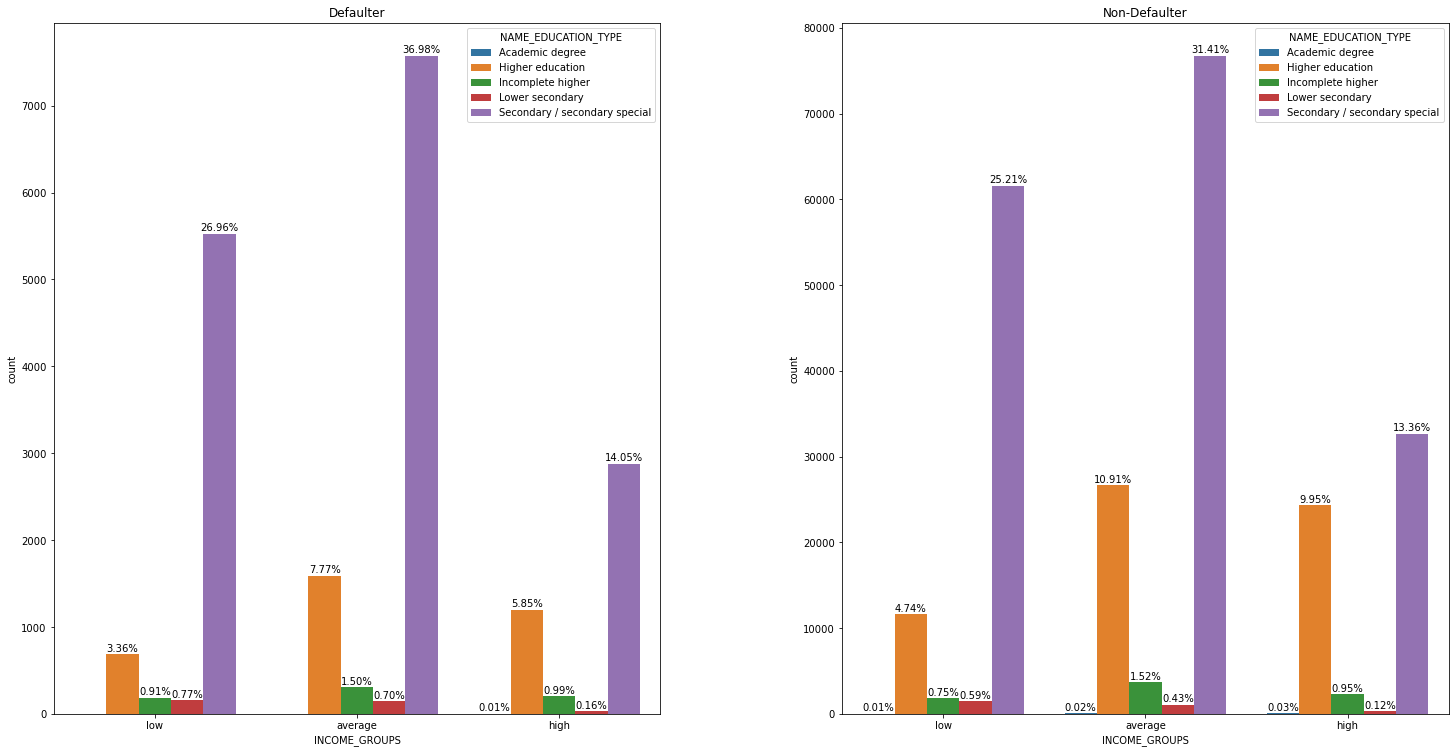

In [333]:
# using countplots

categorical_categorical_countplot('INCOME_GROUPS','NAME_EDUCATION_TYPE', (25,12))

### INCOME_GROUPS vs NAME_HOUSING_TYPE

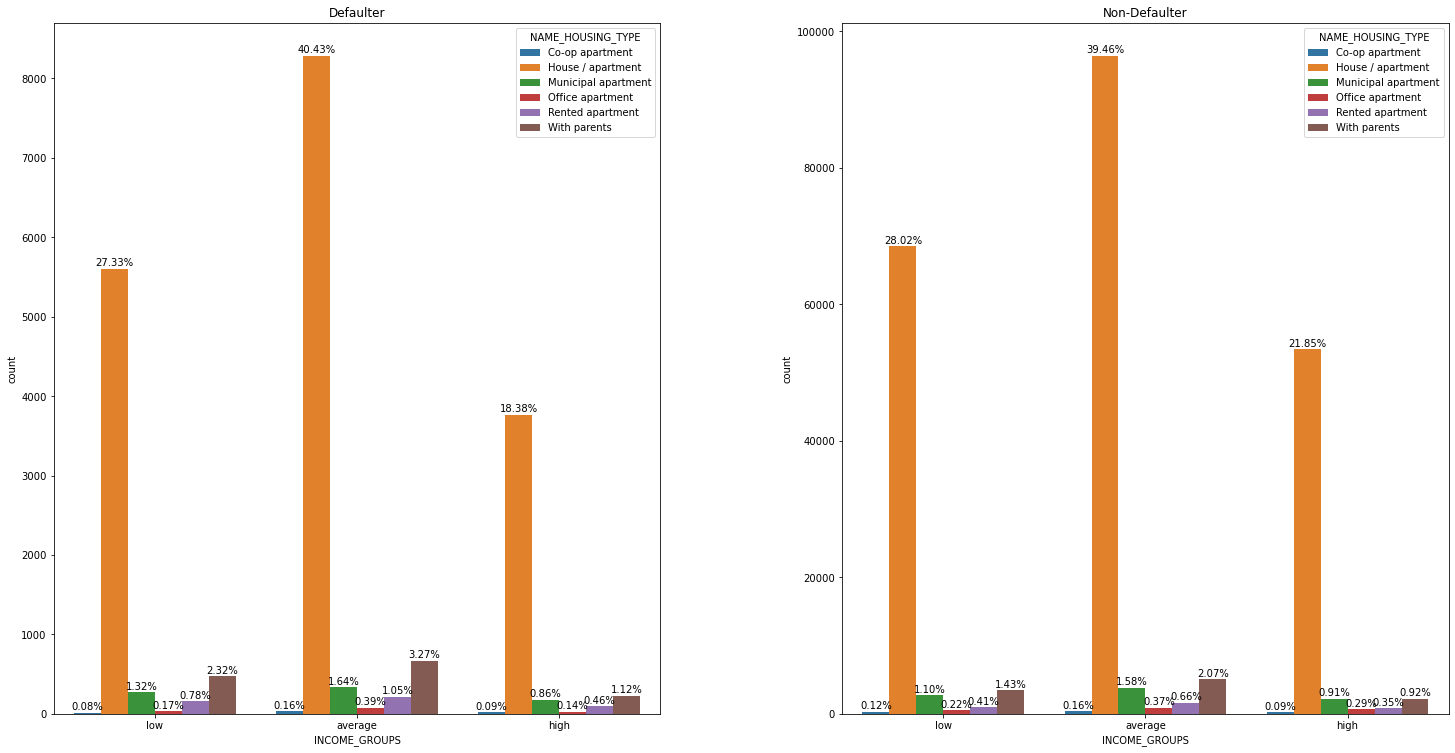

In [334]:
# using countplots

categorical_categorical_countplot('INCOME_GROUPS','NAME_HOUSING_TYPE', (25,12))

### CREDIT_GROUPS vs NAME_INCOME_TYPE

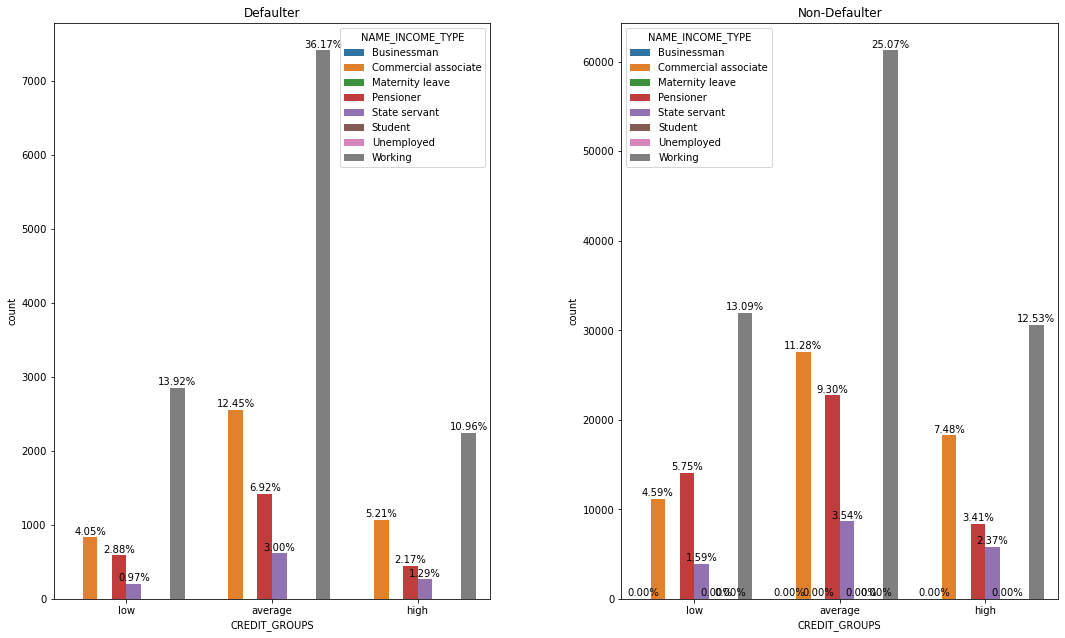

In [335]:
# using countplots

categorical_categorical_countplot('CREDIT_GROUPS','NAME_INCOME_TYPE', (18,10))

### CREDIT_GROUPS vs NAME_EDUCATION_TYPE

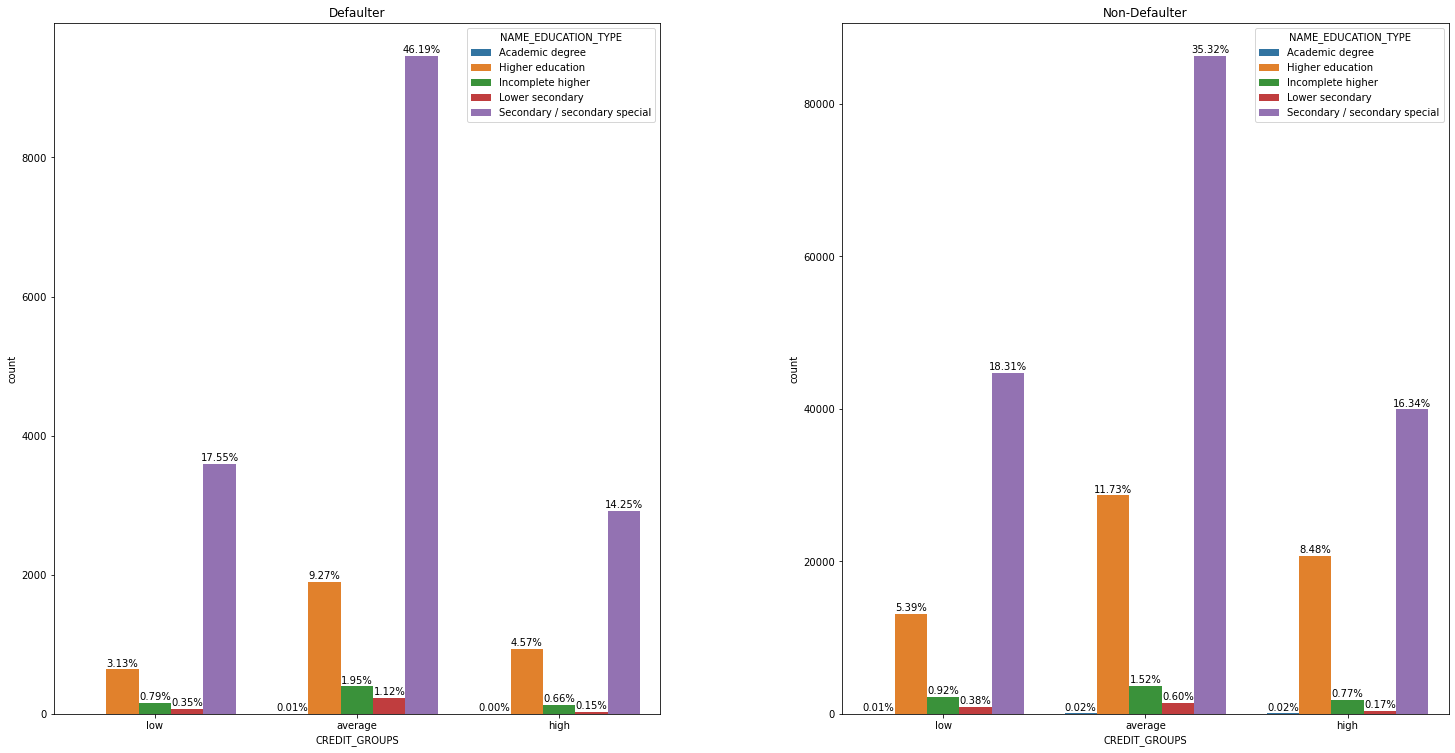

In [336]:
# using countplots

categorical_categorical_countplot('CREDIT_GROUPS','NAME_EDUCATION_TYPE', (25,12))

### CREDIT_GROUPS vs NAME_HOUSING_TYPE

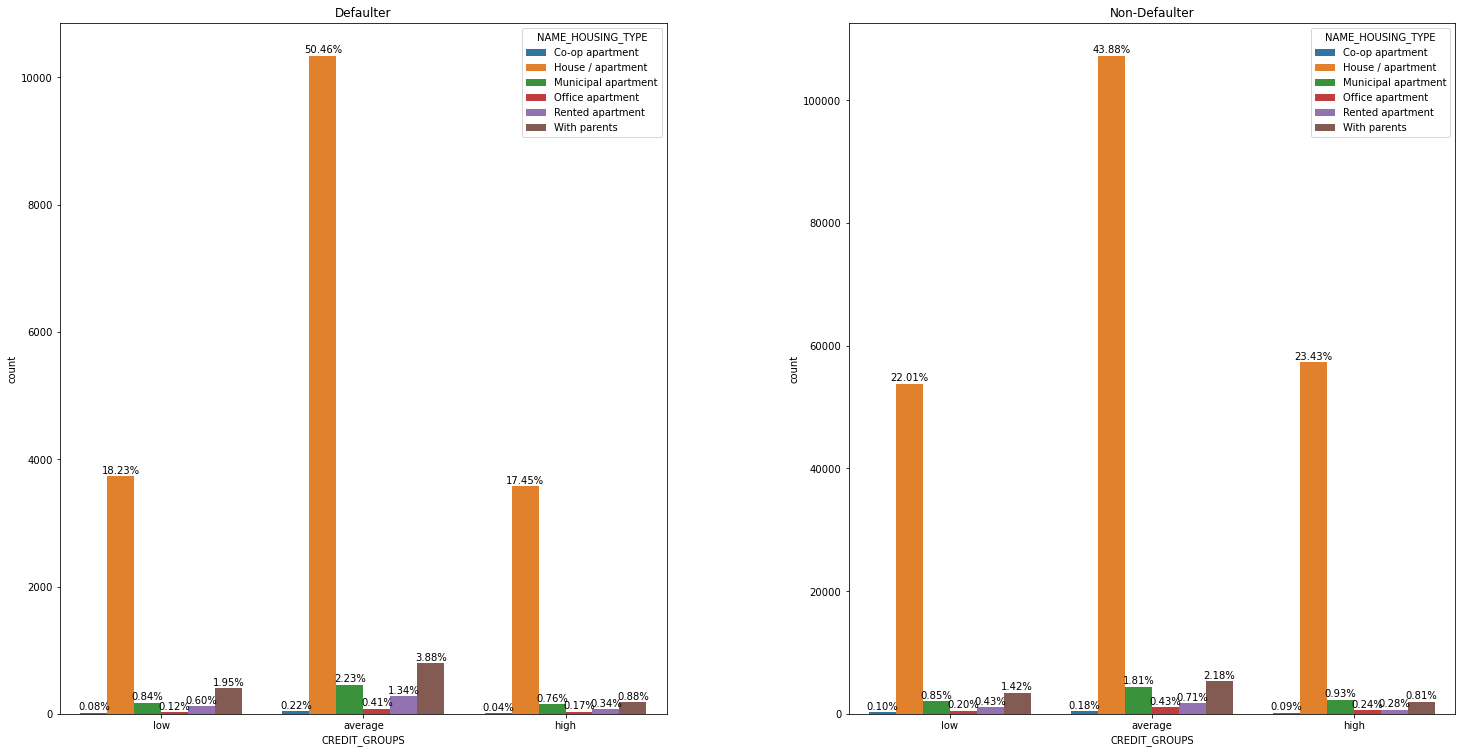

In [337]:
# using countplots

categorical_categorical_countplot('CREDIT_GROUPS','NAME_HOUSING_TYPE', (25,12))

### AGE_GROUPS  vs  AMT_INCOME_TOTAL

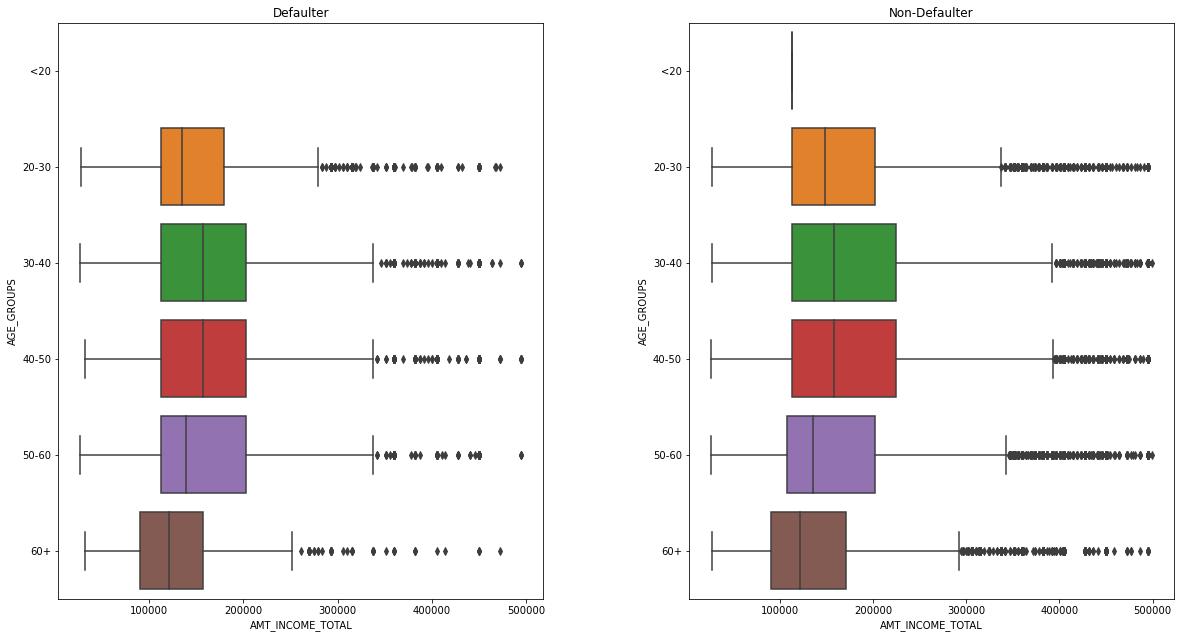

In [338]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','AGE_GROUPS', d1, d2, (20,10))

### AGE_GROUPS  vs  AMT_CREDIT

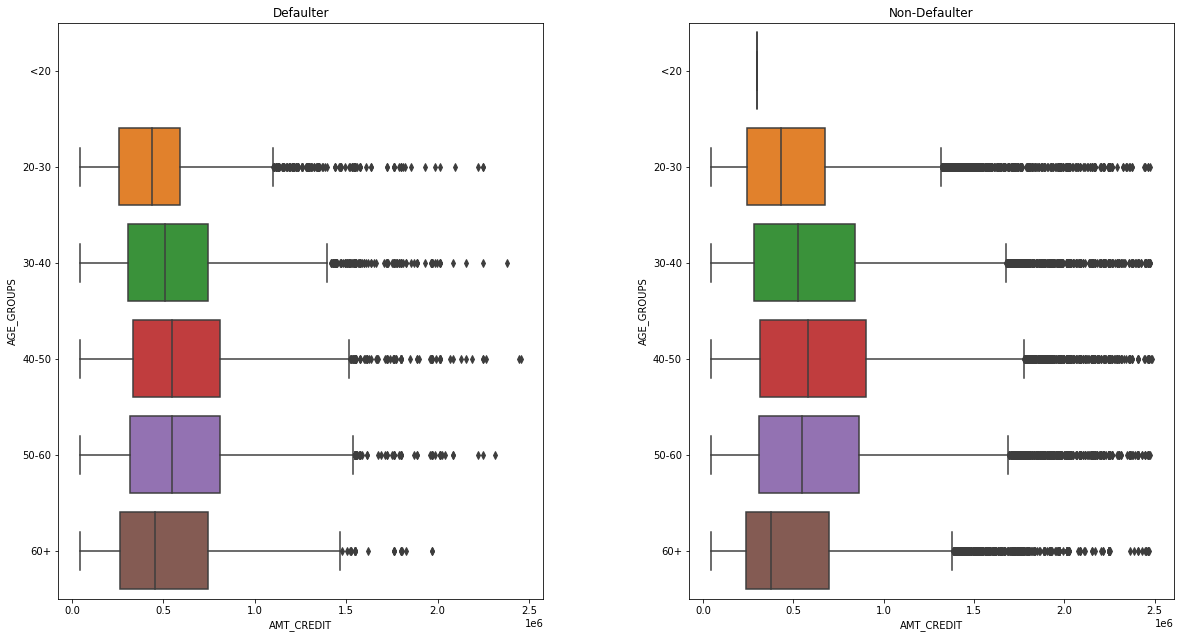

In [339]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','AGE_GROUPS', d1, d2, (20,10))

### EMP_EXP_GROUPS vs AMT_INCOME_TOTAL

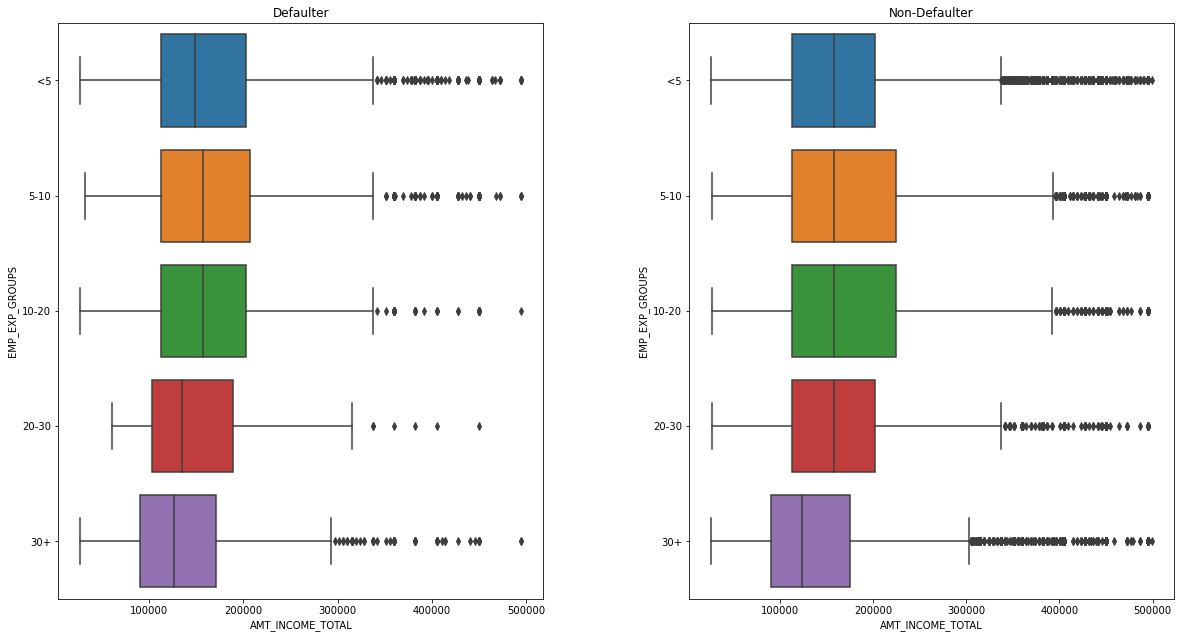

In [340]:
# using boxplots 

d1 = defaulter[defaulter['AMT_INCOME_TOTAL']<500000]
d2 = non_defaulter[non_defaulter['AMT_INCOME_TOTAL']<500000]

categorical_continous_boxplot('AMT_INCOME_TOTAL','EMP_EXP_GROUPS', d1, d2, (20,10))

### EMP_EXP_GROUPS vs AMT_CREDIT

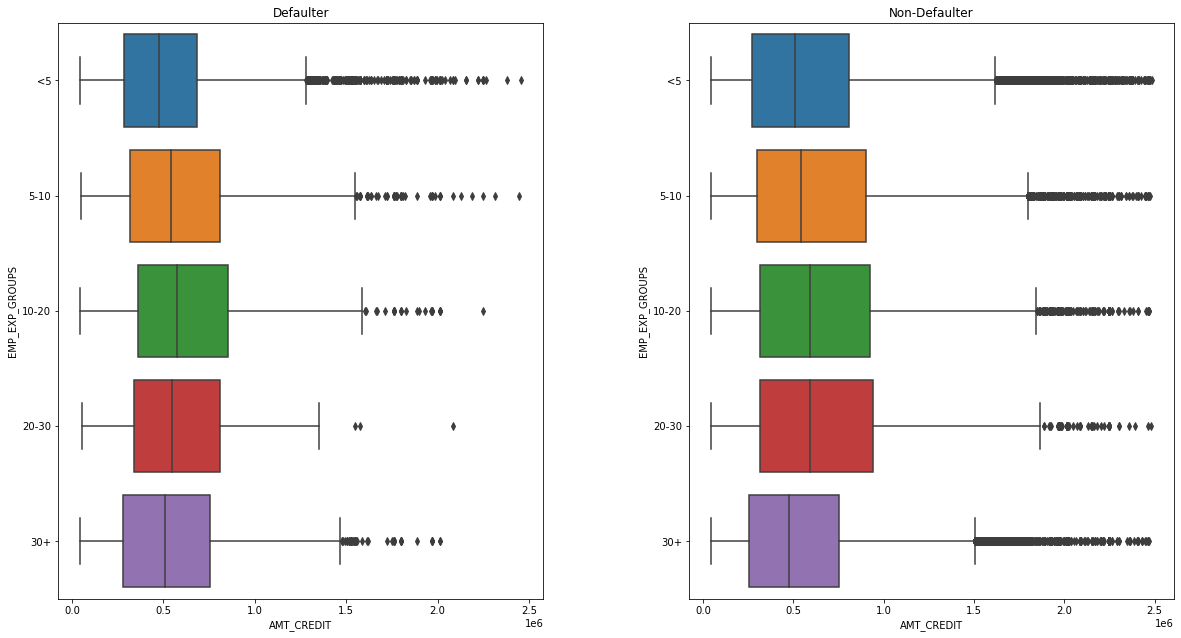

In [341]:
# using boxplots 

d1 = defaulter[defaulter['AMT_CREDIT']<2500000]
d2 = non_defaulter[non_defaulter['AMT_CREDIT']<2500000]

categorical_continous_boxplot('AMT_CREDIT','EMP_EXP_GROUPS', d1, d2, (20,10))

In [342]:
# dropping some irrelevant columns after analysis and also after binning

cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 
        'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 
        'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 
        'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START']

for col in cols:
    app_data.drop(col, axis=1, inplace=True)
    defaulter.drop(col, axis=1, inplace=True)
    non_defaulter.drop(col, axis=1, inplace=True)

## PART - 2 : previous_application.csv analysis

- ### Data understanding and preperation

In [343]:
# loading application.csv

prev_data = pd.read_csv('previous_application.csv')

In [344]:
# inspecting the dataframe

prev_data.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans      1730.43         17145.00    17145.00              0.00         17145.00                   SATURDAY                       15                           Y                       1               0.00                   0.18                      0.87                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity        12.00           middle  POS mobile with interest           365243.00          -42.00                     300.00         -42.00            -37.00                       0.00
1     2802425      108129         Cash loans     25188.62        607500.00   679671.00               nan        607500.00                   THURSDAY                       11                           Y                       1                nan                    nan                       nan                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA        36.00       low_action          Cash X-Sell: low           365243.00         -134.00                     916.00      365243.00         365243.00                       1.00
2     2523466      122040         Cash loans     15060.74        112500.00   136444.50               nan        112500.00                    TUESDAY                       11                           Y                       1                nan                    nan                       nan                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA        12.00             high         Cash X-Sell: high           365243.00         -271.00                      59.00      365243.00         365243.00                       1.00
3     2819243      176158         Cash loans     47041.33        450000.00   470790.00               nan        450000.00                     MONDAY                        7                           Y                       1                nan                    nan                       nan                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA        12.00           middle       Cash X-Sell: middle           365243.00         -482.00                    -152.00        -182.00           -177.00                       1.00
4     1784265      202054         Cash loans     31924.40        337500.00   404055.00               nan        337500.00                   THURSDAY                        9                           Y                       1                nan                    nan                       nan                Repairs              Refused           -781  Cash through the bank   

In [345]:
# inspecting shape of dataframe

prev_data.shape

(1670214, 37)

In [346]:
# descriptive statistics of dataframe

prev_data.describe()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1670214.00  1670214.00   1297979.00       1670214.00  1670213.00         774370.00       1284699.00               1670214.00              1670214.00          774370.00                5951.00                   5951.00     1670214.00        1670214.00   1297984.00           997149.00       997149.00                  997149.00      997149.00         997149.00                  997149.00
mean   1923089.14   278357.17     15955.12        175233.86   196114.02           6697.40        227847.28                    12.48                    1.00               0.08                   0.19                      0.77        -880.68            313.95        16.05           342209.86        13826.27                   33767.77       76582.40          81992.34                       0.33
std     532597.96   102814.82     14782.14        292779.76   318574.62          20921.50        315396.56                     3.33                    0.06               0.11                   0.09                      0.10         779.10           7127.44        14.57            88916.12        72444.87                  106857.03      149647.42         153303.52                       0.47
min    1000001.00   100001.00         0.00             0.00        0.00             -0.90             0.00                     0.00                    0.00              -0.00                   0.03                      0.37       -2922.00             -1.00         0.00            -2922.00        -2892.00                   -2801.00       -2889.00          -2874.00                       0.00
25%    1461857.25   189329.00      6321.78         18720.00    24160.50              0.00         50841.00                    10.00                    1.00               0.00                   0.16                      0.72       -1300.00             -1.00         6.00           365243.00        -1628.00                   -1242.00       -1314.00          -1270.00                       0.00
50%    1923110.50   278714.50     11250.00         71046.00    80541.00           1638.00        112320.00                    12.00                    1.00               0.05                   0.19                      0.84        -581.00              3.00        12.00           365243.00         -831.00                    -361.00        -537.00           -499.00                       0.00
75%    2384279.75   367514.00     20658.42        180360.00   216418.50           7740.00        234000.00                    15.00                    1.00               0.11                   0.19                      0.85        -280.00             82.00        24.00           365243.00         -411.00                     129.00         -74.00            -44.00                       1.00
max    2845382.00   456255.00    418058.15       6905160.00  6905160.00        3060045.00       6905160.00                    23.00                    1.00               1.00                   1.00                      1.00          -1.00        4000000.00        84.00           365243.00       365243.00                  365243.00      365243.00         365243.00                       1.00

In [347]:
# inspecting dtypes and null_counts of dataframe

prev_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [348]:
# percentage of null in each column

100*prev_data.isnull().sum()/prev_data.shape[0]

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
RATE_INTEREST_PRIMARY         99.64
RATE_INTEREST_PRIVILEGED      99.64
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

In [349]:
# dropping columns with more than 40% null values

prev_data.dropna(thresh=prev_data.shape[0]*0.60,how='all',axis=1, inplace=True)

In [350]:
# percentage of null in each column

100*prev_data.isnull().sum()/prev_data.shape[0]

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                   22.29
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

##### The following columns atmost 23% null values


- AMT_ANNUITY -----22.29
- AMT_GOODS_PRICE -----23.08
- CNT_PAYMENT -----22.29

In [351]:
prev_data.shape

(1670214, 26)

In [352]:
# dropping duplicates 

prev_data.drop_duplicates(keep='first', inplace=True)

In [353]:
# no duplicates found since shape is same

prev_data.shape

(1670214, 26)

- ### Data Cleaning and Manipulation

- ##### Utility functions

In [354]:
# util function to detect outliers in a column

def outlier_detector_prev(col_name):
    Q3 = prev_data[col_name].quantile(.75)
    Q1 = prev_data[col_name].quantile(.25)
    IQR = Q3 - Q1
    print('Upper :', Q3 + 3*IQR)
    print('Lower :', Q1 - 3*IQR)
    

### NAME_CONTRACT_TYPE

In [355]:
# checking null count

prev_data['NAME_CONTRACT_TYPE'].isnull().sum()

0

In [356]:
# checking dtype

prev_data['NAME_CONTRACT_TYPE'].dtype

dtype('O')

In [357]:
# checking for value counts in percentage

prev_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans        44.76
Consumer loans    43.66
Revolving loans   11.57
XNA                0.02
Name: NAME_CONTRACT_TYPE, dtype: float64

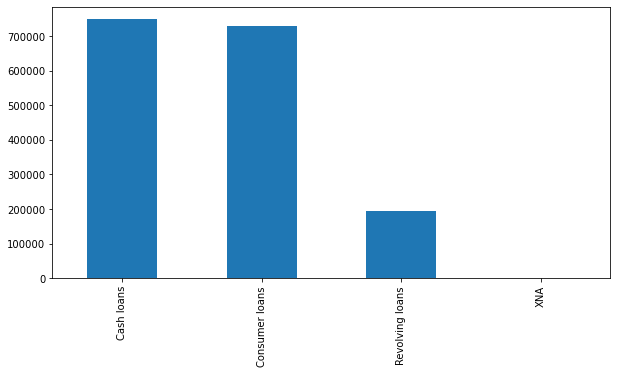

In [358]:
# plot to know the distribution

plt.figure(figsize=(10,5))
prev_data['NAME_CONTRACT_TYPE'].value_counts().plot.bar();

In [359]:
# impute 'XNA' since its only 0.02% of total data

prev_data.drop(prev_data.loc[prev_data['NAME_CONTRACT_TYPE']=='XNA'].index, inplace=True)

In [360]:
# checking for value counts in percentage

prev_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans        44.77
Consumer loans    43.67
Revolving loans   11.57
Name: NAME_CONTRACT_TYPE, dtype: float64

In [361]:
# changing dtype to categorical

prev_data['NAME_CONTRACT_TYPE'] = prev_data['NAME_CONTRACT_TYPE'].astype('category')

In [362]:
# checking dtype

prev_data['NAME_CONTRACT_TYPE'].dtype

CategoricalDtype(categories=['Cash loans', 'Consumer loans', 'Revolving loans'], ordered=False)

### AMT_ANNUITY

In [363]:
# checking null count

prev_data['AMT_ANNUITY'].isnull().sum()

371889

In [364]:
# null count in percentage

prev_data['AMT_ANNUITY'].isnull().sum()/prev_data.shape[0]*100

22.270562703159772

In [365]:
# checking dtype

prev_data['AMT_ANNUITY'].dtype

dtype('float64')

In [366]:
# checking quantile spread

prev_data['AMT_ANNUITY'].describe()

count   1297979.00
mean      15955.12
std       14782.14
min           0.00
25%        6321.78
50%       11250.00
75%       20658.42
max      418058.15
Name: AMT_ANNUITY, dtype: float64

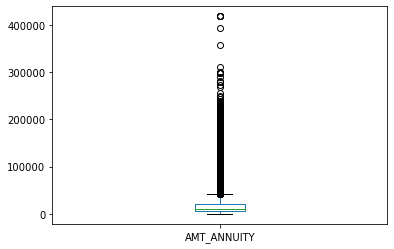

In [367]:
# checking data spread using box plot

prev_data['AMT_ANNUITY'].plot.box();

In [368]:
# detect outliers

outlier_detector_prev('AMT_ANNUITY')

Upper : 63668.34
Lower : -36688.14


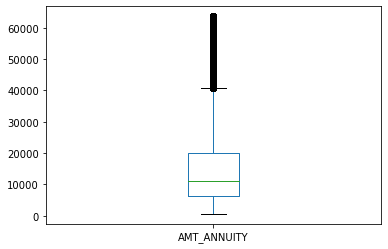

In [369]:
# checking data spread using box plot between outlier points

prev_data[(prev_data['AMT_ANNUITY']>0) & (prev_data['AMT_ANNUITY']< 63668.34)]['AMT_ANNUITY'].plot.box();

In [370]:
# checking percentage of data points above outlier threshold

len(prev_data[(prev_data['AMT_ANNUITY']> 63668)]['AMT_ANNUITY'])/prev_data.shape[0]*100

1.1242804820500782

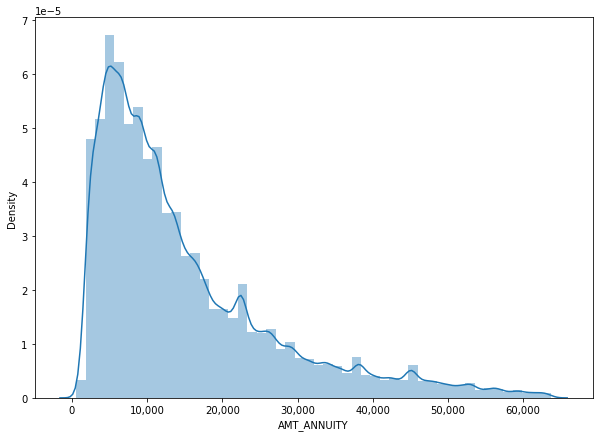

In [371]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(prev_data[(prev_data['AMT_ANNUITY']>0) & (prev_data['AMT_ANNUITY']< 63668.34)]['AMT_ANNUITY'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

In [372]:
# since there are 22% outliers we are imputing it using mode of data

prev_data['AMT_ANNUITY'].fillna(prev_data['AMT_ANNUITY'].mode()[0], inplace=True)

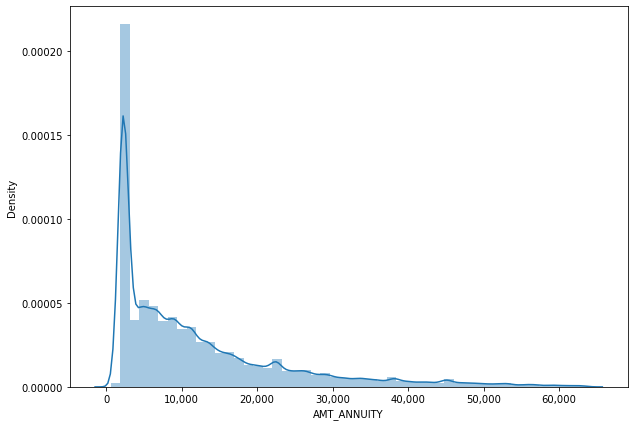

In [373]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(prev_data[(prev_data['AMT_ANNUITY']>0) & (prev_data['AMT_ANNUITY']< 63668.34)]['AMT_ANNUITY'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

### AMT_APPLICATION

In [374]:
# checking null count

prev_data['AMT_APPLICATION'].isnull().sum()

0

In [375]:
# checking dtype

prev_data['AMT_APPLICATION'].dtype

dtype('float64')

In [376]:
# checking quantile spread

prev_data['AMT_APPLICATION'].describe()

count   1669868.00
mean     175270.17
std      292799.23
min           0.00
25%       18796.50
50%       71055.00
75%      180441.00
max     6905160.00
Name: AMT_APPLICATION, dtype: float64

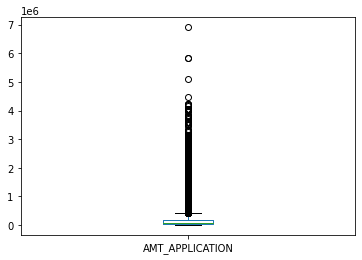

In [377]:
# checking data spread using box plot

prev_data['AMT_APPLICATION'].plot.box();

In [378]:
# detect outliers

outlier_detector_prev('AMT_APPLICATION')

Upper : 665374.5
Lower : -466137.0


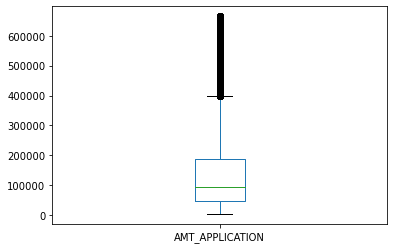

In [379]:
# checking data spread using box plot excluding outlier

prev_data[(prev_data['AMT_APPLICATION']> 0) & (prev_data['AMT_APPLICATION']< 665280.0)]['AMT_APPLICATION'].plot.box();

In [380]:
# checking percentage of data points above outlier threshold

len(prev_data[(prev_data['AMT_APPLICATION']> 670000)]['AMT_APPLICATION'])/prev_data.shape[0]*100

7.217756134017779

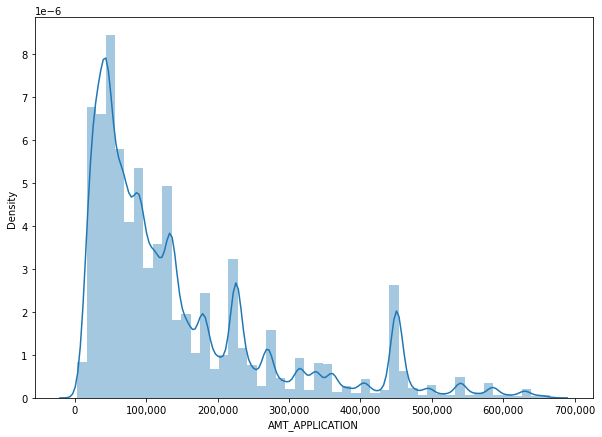

In [381]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(prev_data[(prev_data['AMT_APPLICATION']> 0) & (prev_data['AMT_APPLICATION']< 665280.0)]['AMT_APPLICATION'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

### AMT_CREDIT

In [382]:
# checking null count

prev_data['AMT_CREDIT'].isnull().sum()

1

In [383]:
# imputing null value

prev_data.dropna(subset=['AMT_CREDIT'],how='any',inplace=True)

In [384]:
# checking null count

prev_data['AMT_CREDIT'].describe()

count   1669867.00
mean     196154.66
std      318595.11
min           0.00
25%       24192.00
50%       80550.00
75%      216418.50
max     6905160.00
Name: AMT_CREDIT, dtype: float64

In [385]:
# check dtype

prev_data['AMT_CREDIT'].dtype

dtype('float64')

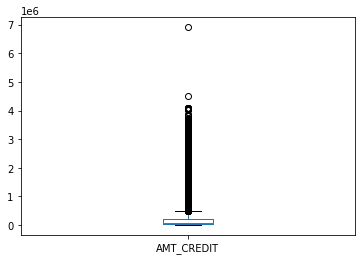

In [386]:
# checking data spread using box plot

prev_data['AMT_CREDIT'].plot.box();

In [387]:
# detect outliers

outlier_detector_prev('AMT_CREDIT')

Upper : 793098.0
Lower : -552487.5


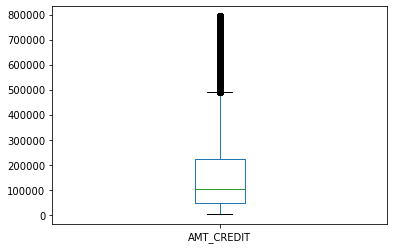

In [388]:
# checking data spread using box plot

prev_data[(prev_data['AMT_CREDIT']> 0) & (prev_data['AMT_CREDIT']< 793192.5)]['AMT_CREDIT'].plot.box();

In [389]:
# checking percentage of data points above outlier threshold

len(prev_data[(prev_data['AMT_CREDIT']> 800000)]['AMT_CREDIT'])/prev_data.shape[0]*100

5.6679364284700515

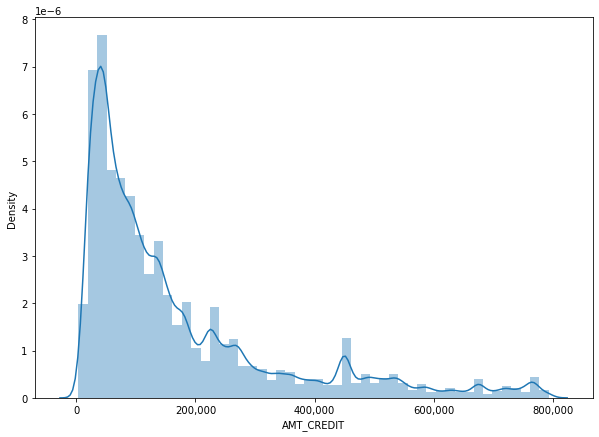

In [390]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(prev_data[(prev_data['AMT_CREDIT']> 0) & (prev_data['AMT_CREDIT']< 793192.5)]['AMT_CREDIT'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

In [391]:
# binning credit amount as low, average and high based on quantiles

prev_data['PREV_AMT_CREDIT_GROUPS'] = pd.qcut(prev_data['AMT_CREDIT'], q=[0,.25,.75,1], labels=['low','average','high'])

### AMT_GOODS_PRICE

In [392]:
# checking null count

prev_data['AMT_GOODS_PRICE'].isnull().sum()

385168

In [393]:
# checking null count percentage

prev_data['AMT_GOODS_PRICE'].isnull().sum()/prev_data.shape[0]*100

23.065789071824284

In [394]:
# checking null count

prev_data['AMT_GOODS_PRICE'].describe()

count   1284699.00
mean     227847.28
std      315396.56
min           0.00
25%       50841.00
50%      112320.00
75%      234000.00
max     6905160.00
Name: AMT_GOODS_PRICE, dtype: float64

In [395]:
# check dtype

prev_data['AMT_GOODS_PRICE'].dtype

dtype('float64')

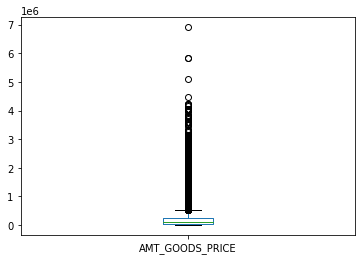

In [396]:
# checking data spread using box plot

prev_data['AMT_GOODS_PRICE'].plot.box();

In [397]:
# detect outliers

outlier_detector_prev('AMT_GOODS_PRICE')

Upper : 783477.0
Lower : -498636.0


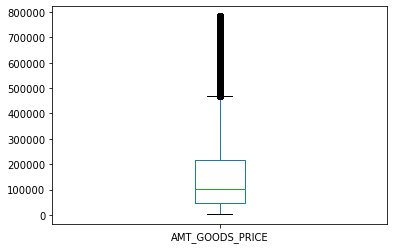

In [398]:
# checking data spread using box plot

prev_data[(prev_data['AMT_GOODS_PRICE']> 0) & (prev_data['AMT_GOODS_PRICE']< 783477)]['AMT_GOODS_PRICE'].plot.box();

In [399]:
# checking percentage of data points above outlier threshold

len(prev_data[(prev_data['AMT_GOODS_PRICE']> 783477)]['AMT_GOODS_PRICE'])/prev_data.shape[0]*100

5.035011770398481

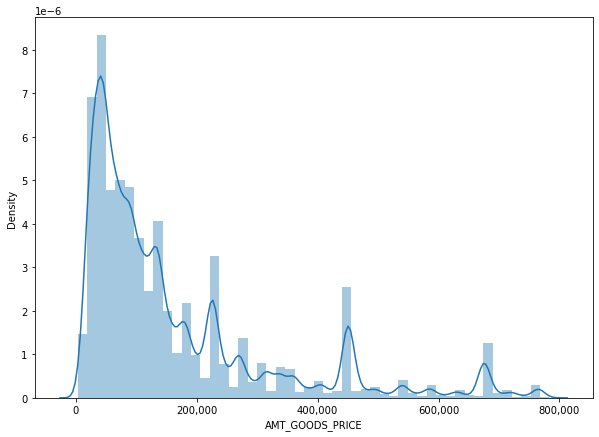

In [400]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(prev_data[(prev_data['AMT_GOODS_PRICE']> 0) & (prev_data['AMT_GOODS_PRICE']< 783477)]['AMT_GOODS_PRICE'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

In [401]:
# since there are 23% outliers we are imputing it using mode of data

prev_data['AMT_GOODS_PRICE'].fillna(prev_data['AMT_GOODS_PRICE'].mode()[0], inplace=True)

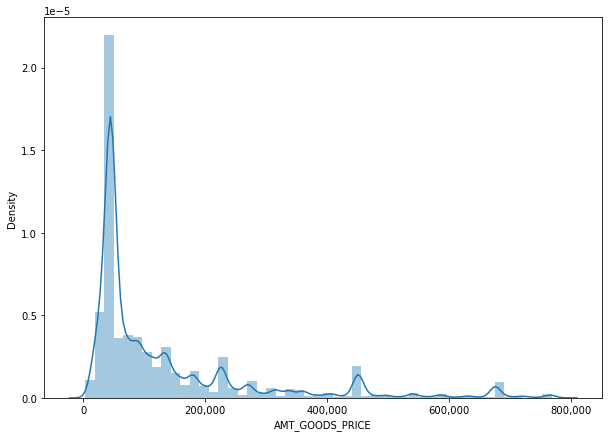

In [402]:
# plot to know the distribution

plt.figure(figsize=(10,7))
ax = sns.distplot(prev_data[(prev_data['AMT_GOODS_PRICE']>0) & (prev_data['AMT_GOODS_PRICE']< 783477)]['AMT_GOODS_PRICE'])
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.show()

In [403]:
# binning consumer loan goods price as low, average and high based on quantiles

prev_data['PREV_GOODS_PRICE_GROUPS'] = pd.qcut(prev_data['AMT_GOODS_PRICE'], q=[0,.25,.75,1], labels=['low','average','high'])

### FLAG_LAST_APPL_PER_CONTRACT

In [404]:
# checking null count

prev_data['FLAG_LAST_APPL_PER_CONTRACT'].isnull().sum()

0

In [405]:
# check dtype

prev_data['FLAG_LAST_APPL_PER_CONTRACT'].dtype

dtype('O')

In [406]:
# change dtype to categorical

prev_data['FLAG_LAST_APPL_PER_CONTRACT'] = prev_data['FLAG_LAST_APPL_PER_CONTRACT'].astype('category')

In [407]:
# checking for value counts in percentage

prev_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts(normalize=True)

Y   0.99
N   0.01
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

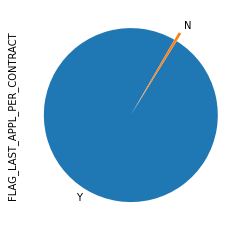

In [408]:
# plot to know the distribution

prev_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts().plot.pie(explode=(0,0.1), startangle=60);

### NAME_CASH_LOAN_PURPOSE

In [409]:
# checking null count

prev_data['NAME_CASH_LOAN_PURPOSE'].isnull().sum()

0

In [410]:
# checking dtype

prev_data['NAME_CASH_LOAN_PURPOSE'].dtype

dtype('O')

In [411]:
# checking for value counts in percentage

prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100

XAP                                55.23
XNA                                40.60
Repairs                             1.42
Other                               0.93
Urgent needs                        0.50
Buying a used car                   0.17
Building a house or an annex        0.16
Everyday expenses                   0.14
Medicine                            0.13
Payments on other loans             0.12
Education                           0.09
Journey                             0.07
Purchase of electronic equipment    0.06
Buying a new car                    0.06
Wedding / gift / holiday            0.06
Buying a home                       0.05
Car repairs                         0.05
Furniture                           0.04
Buying a holiday home / land        0.03
Business development                0.03
Gasification / water supply         0.02
Buying a garage                     0.01
Hobby                               0.00
Money for a third person            0.00
Refusal to name 

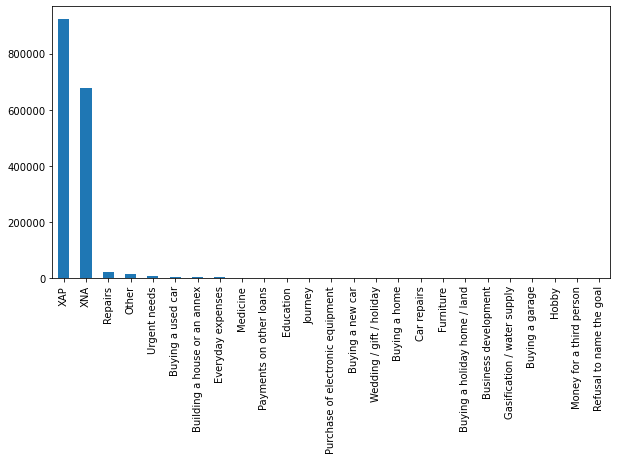

In [412]:
# plot bar graph

plt.figure(figsize=(10,5))
prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts().plot.bar();

- ***Here we are not removing XAP and XNA values since these are values corresponding to Consumer loans in Cash loan field. Hence removing it can cause data missing in fields related to Consumer loans eg:-NAME_GOODS_CATEGORY field***

In [413]:
# checking value counts excluding XAP and XNA

# Here we are not removing XAP and XNA values since these are values
# corresponding to Consumer loans in Home loan field. 
# Hence removing it can cause data missing in fields related to Consumer loans eg:-NAME_GOODS_CATEGORY field


prev_data[~prev_data['NAME_CASH_LOAN_PURPOSE'].isin(['XAP','XNA'])]['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100

Repairs                            34.13
Other                              22.41
Urgent needs                       12.08
Buying a used car                   4.15
Building a house or an annex        3.87
Everyday expenses                   3.47
Medicine                            3.12
Payments on other loans             2.77
Education                           2.26
Journey                             1.78
Purchase of electronic equipment    1.52
Buying a new car                    1.45
Wedding / gift / holiday            1.38
Buying a home                       1.24
Car repairs                         1.14
Furniture                           1.08
Buying a holiday home / land        0.77
Business development                0.61
Gasification / water supply         0.43
Buying a garage                     0.20
Hobby                               0.08
Money for a third person            0.04
Refusal to name the goal            0.02
Name: NAME_CASH_LOAN_PURPOSE, dtype: float64

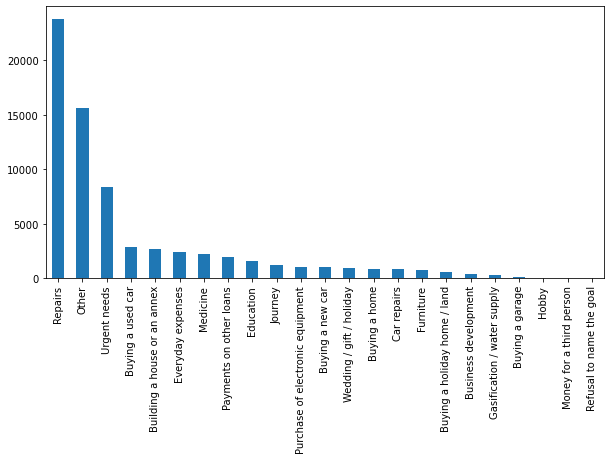

In [414]:
# plot bar graph

plt.figure(figsize=(10,5))
prev_data[~prev_data['NAME_CASH_LOAN_PURPOSE'].isin(['XAP','XNA'])]['NAME_CASH_LOAN_PURPOSE'].value_counts().plot.bar();

In [415]:
# changing to categorical variable

prev_data['NAME_CASH_LOAN_PURPOSE'] = prev_data['NAME_CASH_LOAN_PURPOSE'].astype('category')

### NAME_CONTRACT_STATUS

In [416]:
# checking null count

prev_data['NAME_CONTRACT_STATUS'].isnull().sum()

0

In [417]:
# check dtype

prev_data['NAME_CONTRACT_STATUS'].dtype

dtype('O')

In [418]:
# checking for value counts in percentage

prev_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved       62.09
Canceled       18.92
Refused        17.41
Unused offer    1.58
Name: NAME_CONTRACT_STATUS, dtype: float64

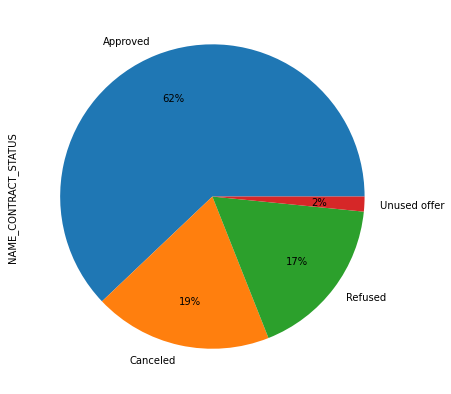

In [419]:
# plot pie graph to know distribution

plt.figure(figsize=(10,7))
prev_data['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%.0f%%', pctdistance=0.7);

In [420]:
# changing to categorical variable

prev_data['NAME_CONTRACT_STATUS'] = prev_data['NAME_CONTRACT_STATUS'].astype('category')

### DAYS_DECISION

In [421]:
# checking null count

prev_data['DAYS_DECISION'].isnull().sum()

0

In [422]:
# check dtype

prev_data['DAYS_DECISION'].dtype

dtype('int64')

In [423]:
prev_data['DAYS_DECISION'].describe()

count   1669867.00
mean       -880.78
std         779.15
min       -2922.00
25%       -1300.00
50%        -581.00
75%        -280.00
max          -1.00
Name: DAYS_DECISION, dtype: float64

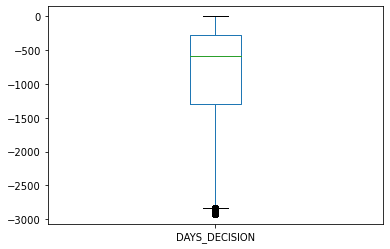

In [424]:
# checking quantile spread

prev_data['DAYS_DECISION'].plot.box();

In [425]:
#converting days to years and also using abs to avoid -ve years

prev_data['DAYS_DECISION'] = abs(prev_data['DAYS_DECISION']/365)

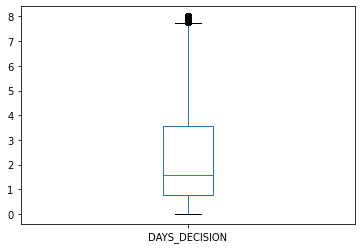

In [426]:
# checking data spread using box plot

prev_data['DAYS_DECISION'].plot.box();

In [427]:
# binning to decision year groups

prev_data['DECISION_GROUPS'] = pd.cut(prev_data['DAYS_DECISION'], [0,1,3,5,9999], labels=['<1','1-3','3-5','5+'])

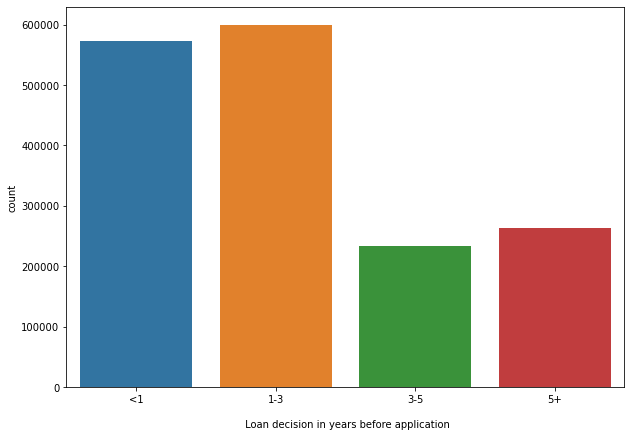

In [428]:
# plot to know the distribution

plt.figure(figsize=(10,7))
sns.countplot(prev_data['DECISION_GROUPS'])
plt.xlabel('\n Loan decision in years before application')
plt.show()

### NAME_PAYMENT_TYPE

In [429]:
# checking null count

prev_data['NAME_PAYMENT_TYPE'].isnull().sum()

0

In [430]:
# checking dtype 

prev_data['NAME_PAYMENT_TYPE'].dtype

dtype('O')

In [431]:
# checking for value counts in percentage

prev_data['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100

Cash through the bank                       61.89
XNA                                         37.55
Non-cash from your account                   0.49
Cashless from the account of the employer    0.06
Name: NAME_PAYMENT_TYPE, dtype: float64

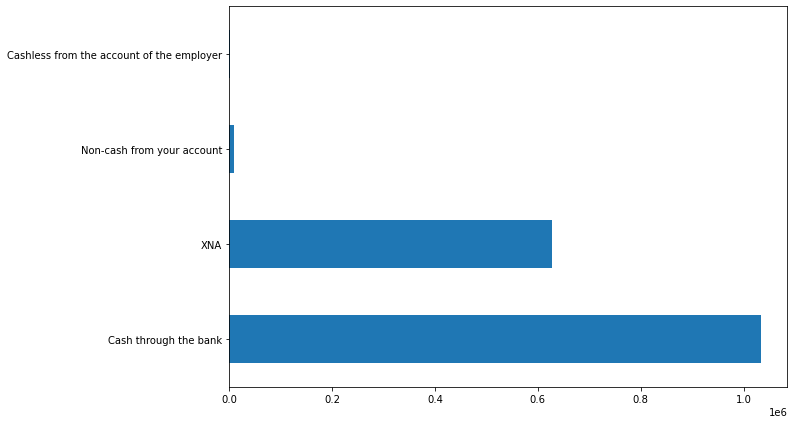

In [432]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_PAYMENT_TYPE'].value_counts().plot.barh();

In [433]:
# removing 'XNA' records sinces its only 7%

prev_data.drop(prev_data.loc[prev_data['NAME_PAYMENT_TYPE']=='XNA'].index, inplace=True)

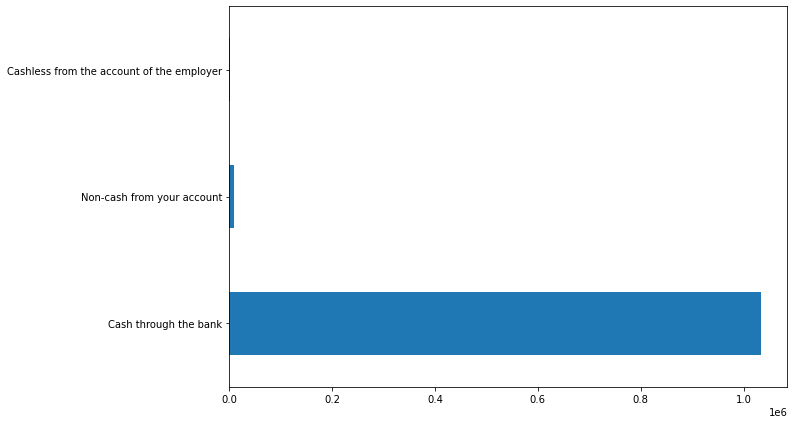

In [434]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_PAYMENT_TYPE'].value_counts().plot.barh();

In [435]:
# change to categorical

prev_data['NAME_PAYMENT_TYPE'] = prev_data['NAME_PAYMENT_TYPE'].astype('category')

### NAME_CLIENT_TYPE

In [436]:
# checking null count

prev_data['NAME_CLIENT_TYPE'].isnull().sum()

0

In [437]:
# checking dtype 

prev_data['NAME_CLIENT_TYPE'].dtype

dtype('O')

In [438]:
# checking dtype 

prev_data['NAME_GOODS_CATEGORY'].dtype

dtype('O')

In [439]:
# checking for value counts in percentage

prev_data['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100

Repeater    67.18
New         24.02
Refreshed    8.74
XNA          0.07
Name: NAME_CLIENT_TYPE, dtype: float64

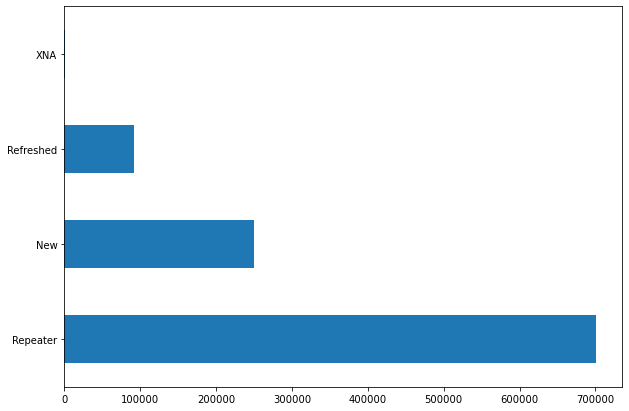

In [440]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_CLIENT_TYPE'].value_counts().plot.barh();

In [441]:
# removing 'XNA' records sinces its only 0.12%

prev_data.drop(prev_data.loc[prev_data['NAME_CLIENT_TYPE']=='XNA'].index, inplace=True)

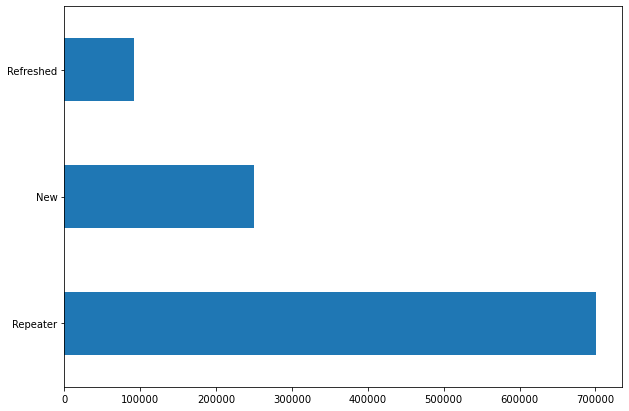

In [442]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_CLIENT_TYPE'].value_counts().plot.barh();

In [443]:
# change to categorical

prev_data['NAME_CLIENT_TYPE'] = prev_data['NAME_CLIENT_TYPE'].astype('category')

### NAME_GOODS_CATEGORY

In [444]:
# checking null count

prev_data['NAME_GOODS_CATEGORY'].isnull().sum()

0

In [445]:
# checking dtype 

prev_data['NAME_GOODS_CATEGORY'].dtype

dtype('O')

In [446]:
# checking for value counts in percentage

prev_data['NAME_GOODS_CATEGORY'].value_counts(normalize=True)*100

XNA                        39.48
Mobile                     18.84
Consumer Electronics       10.36
Computers                   9.05
Audio/Video                 8.58
Furniture                   4.36
Photo / Cinema Equipment    2.16
Clothing and Accessories    1.98
Construction Materials      1.95
Auto Accessories            0.59
Jewelry                     0.54
Homewares                   0.39
Medical Supplies            0.29
Vehicles                    0.26
Sport and Leisure           0.24
Gardening                   0.21
Office Appliances           0.20
Other                       0.19
Medicine                    0.13
Tourism                     0.12
Direct Sales                0.04
Fitness                     0.01
Additional Service          0.01
Education                   0.01
Weapon                      0.01
Insurance                   0.00
House Construction          0.00
Animals                     0.00
Name: NAME_GOODS_CATEGORY, dtype: float64

- ***Here we are not removing XNA values since these are values corresponding to Cash loans in Consumer loan field. Hence removing it can cause data missing in fields related to Cash loans***

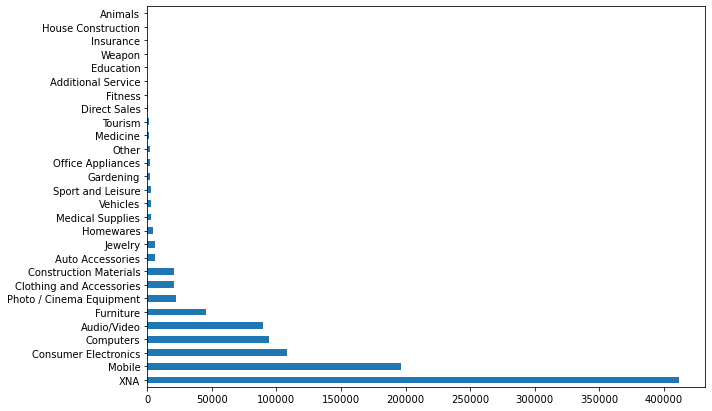

In [447]:
# # plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_GOODS_CATEGORY'].value_counts().plot.barh();

In [448]:
# checking for value counts in percentage

prev_data[prev_data['NAME_GOODS_CATEGORY']!='XNA']['NAME_GOODS_CATEGORY'].value_counts(normalize=True)*100

Mobile                     31.13
Consumer Electronics       17.12
Computers                  14.96
Audio/Video                14.18
Furniture                   7.21
Photo / Cinema Equipment    3.57
Clothing and Accessories    3.27
Construction Materials      3.22
Auto Accessories            0.98
Jewelry                     0.90
Homewares                   0.65
Medical Supplies            0.47
Vehicles                    0.43
Sport and Leisure           0.39
Gardening                   0.34
Office Appliances           0.33
Other                       0.31
Medicine                    0.21
Tourism                     0.20
Direct Sales                0.06
Fitness                     0.02
Additional Service          0.01
Education                   0.01
Weapon                      0.01
Insurance                   0.01
House Construction          0.00
Animals                     0.00
Name: NAME_GOODS_CATEGORY, dtype: float64

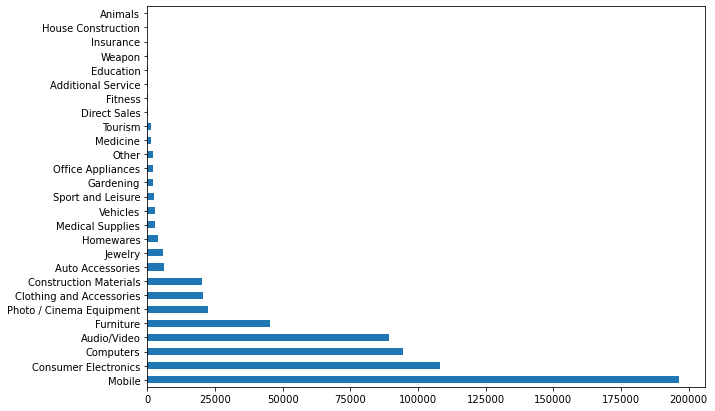

In [449]:
# plot bar graph excluding XNA

plt.figure(figsize=(10,7))
prev_data[prev_data['NAME_GOODS_CATEGORY']!='XNA']['NAME_GOODS_CATEGORY'].value_counts().plot.barh();

In [450]:
# change to categorical

prev_data['NAME_GOODS_CATEGORY'] = prev_data['NAME_GOODS_CATEGORY'].astype('category')

### NAME_PORTFOLIO

In [451]:
# checking null count

prev_data['NAME_PORTFOLIO'].isnull().sum()

0

In [452]:
# checking dtype 

prev_data['NAME_PORTFOLIO'].dtype

dtype('O')

In [453]:
# checking for value counts in percentage

prev_data['NAME_PORTFOLIO'].value_counts(normalize=True)*100

POS    57.80
Cash   38.64
XNA     3.52
Cars    0.04
Name: NAME_PORTFOLIO, dtype: float64

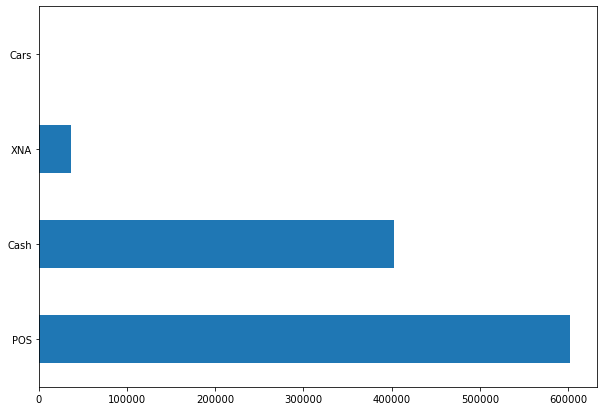

In [454]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_PORTFOLIO'].value_counts().plot.barh();

In [455]:
# removing 'XNA' records sinces its only 3%

prev_data.drop(prev_data.loc[prev_data['NAME_PORTFOLIO']=='XNA'].index, inplace=True)

In [456]:
# change to categorical

prev_data['NAME_PORTFOLIO'] = prev_data['NAME_PORTFOLIO'].astype('category')

### NAME_PRODUCT_TYPE

In [457]:
# checking null count

prev_data['NAME_PRODUCT_TYPE'].isnull().sum()

0

In [458]:
# checking dtype 

prev_data['NAME_PRODUCT_TYPE'].dtype

dtype('O')

In [459]:
# checking for value counts in percentage

prev_data['NAME_PRODUCT_TYPE'].value_counts(normalize=True)*100

XNA       59.95
x-sell    30.96
walk-in    9.09
Name: NAME_PRODUCT_TYPE, dtype: float64

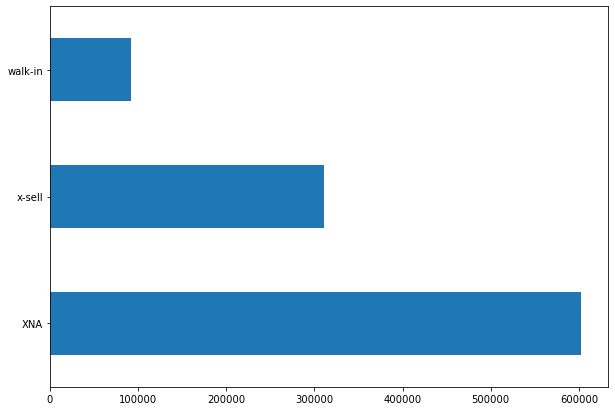

In [460]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_PRODUCT_TYPE'].value_counts().plot.barh();

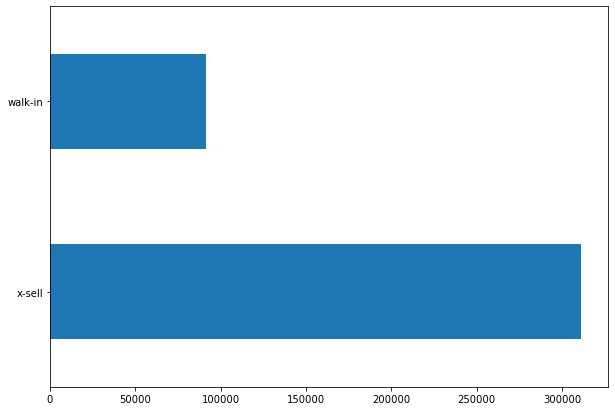

In [461]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data[prev_data['NAME_PRODUCT_TYPE']!='XNA']['NAME_PRODUCT_TYPE'].value_counts().plot.barh();

In [462]:
# change to categorical

prev_data['NAME_PRODUCT_TYPE'] = prev_data['NAME_PRODUCT_TYPE'].astype('category')

### CHANNEL_TYPE

In [463]:
# checking null count

prev_data['CHANNEL_TYPE'].isnull().sum()

0

In [464]:
# checking dtype 

prev_data['CHANNEL_TYPE'].dtype

dtype('O')

In [465]:
# checking for value counts in percentage

prev_data['CHANNEL_TYPE'].value_counts(normalize=True)*100

Country-wide                 37.76
Credit and cash offices      32.52
Stone                        16.82
Regional / Local              8.59
AP+ (Cash loan)               3.24
Contact center                0.60
Channel of corporate sales    0.43
Car dealer                    0.04
Name: CHANNEL_TYPE, dtype: float64

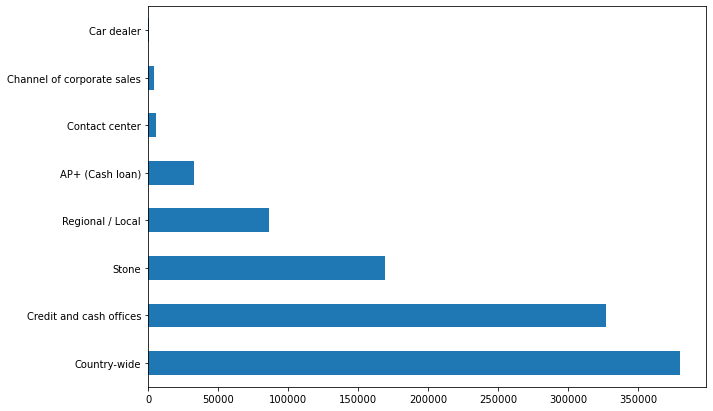

In [466]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['CHANNEL_TYPE'].value_counts().plot.barh();

In [467]:
# change to categorical

prev_data['CHANNEL_TYPE'] = prev_data['CHANNEL_TYPE'].astype('category')

### SELLERPLACE_AREA

In [468]:
# checking null count

prev_data['SELLERPLACE_AREA'].isnull().sum()

0

In [469]:
# checking dtype 

prev_data['SELLERPLACE_AREA'].dtype

dtype('int64')

In [470]:
# checking quantile spread

prev_data['SELLERPLACE_AREA'].describe()

count   1005473.00
mean        450.84
std        9165.72
min          -1.00
25%          -1.00
50%          30.00
75%         150.00
max     4000000.00
Name: SELLERPLACE_AREA, dtype: float64

In [471]:
# taking abs of area to avoid negative areas

prev_data['SELLERPLACE_AREA'] = abs(prev_data['SELLERPLACE_AREA'])

In [472]:
# checking quantile spread

prev_data['SELLERPLACE_AREA'].describe()

count   1005473.00
mean        451.47
std        9165.69
min           0.00
25%           1.00
50%          30.00
75%         150.00
max     4000000.00
Name: SELLERPLACE_AREA, dtype: float64

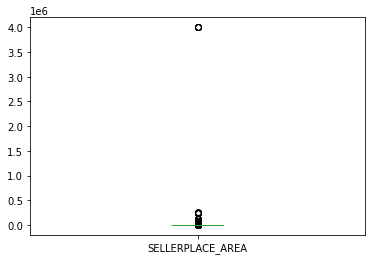

In [473]:
# checking data spread using box plot

prev_data['SELLERPLACE_AREA'].plot.box();

In [474]:
# detect outliers

outlier_detector_prev('SELLERPLACE_AREA')

Upper : 597.0
Lower : -446.0


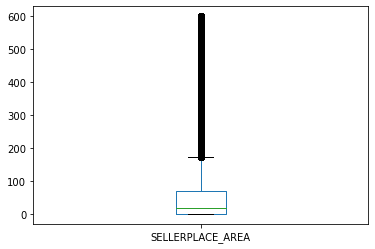

In [475]:
# checking data spread using box plot excluding outlier 

prev_data[(prev_data['SELLERPLACE_AREA']<600) & (prev_data['SELLERPLACE_AREA']>0)]['SELLERPLACE_AREA'].plot.box();

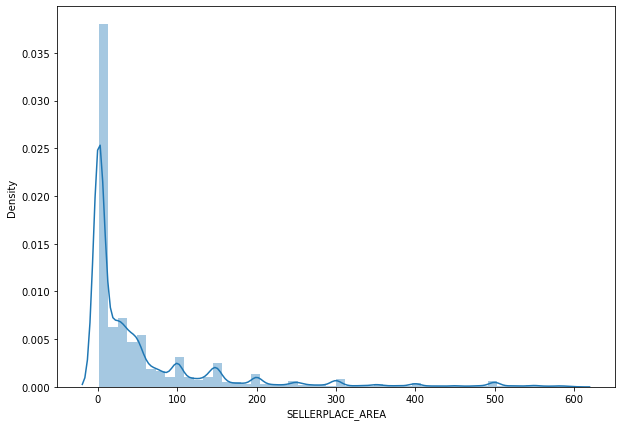

In [476]:
# plot to know the distribution

plt.figure(figsize=(10,7))
sns.distplot(prev_data[(prev_data['SELLERPLACE_AREA']<600) & (prev_data['SELLERPLACE_AREA']>0)]['SELLERPLACE_AREA'])
plt.show()

### NAME_SELLER_INDUSTRY

In [477]:
# checking null count

prev_data['NAME_SELLER_INDUSTRY'].isnull().sum()

0

In [478]:
# checking dtype 

prev_data['NAME_SELLER_INDUSTRY'].dtype

dtype('O')

In [479]:
# checking for value counts in percentage

prev_data['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)*100

XNA                    36.90
Consumer electronics   32.02
Connectivity           19.77
Furniture               4.67
Construction            2.35
Clothing                2.03
Industry                1.52
Auto technology         0.38
Jewelry                 0.25
MLM partners            0.07
Tourism                 0.04
Name: NAME_SELLER_INDUSTRY, dtype: float64

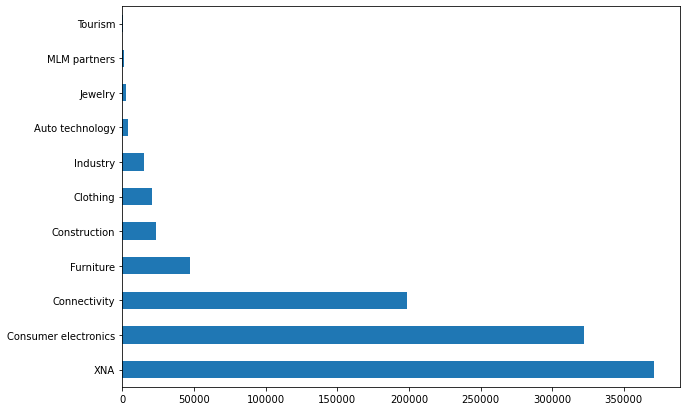

In [480]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_SELLER_INDUSTRY'].value_counts().plot.barh();

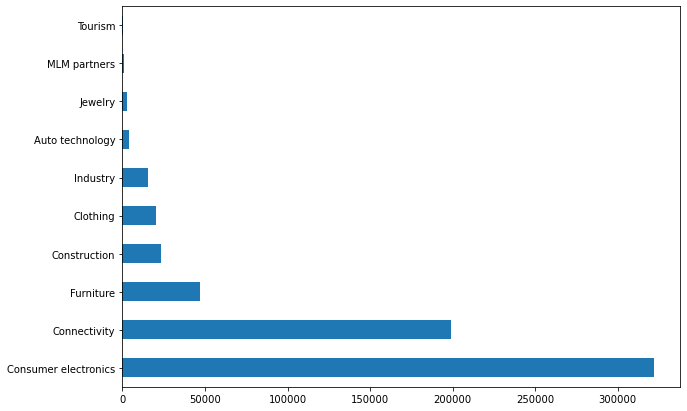

In [481]:
# plot bar graph excluding XNA since imputing XNA can cause data missing for Home loan fields

plt.figure(figsize=(10,7))
prev_data[prev_data['NAME_SELLER_INDUSTRY']!='XNA']['NAME_SELLER_INDUSTRY'].value_counts().plot.barh();

In [482]:
# change to categorical

prev_data['NAME_SELLER_INDUSTRY'] = prev_data['NAME_SELLER_INDUSTRY'].astype('category')

### NAME_YIELD_GROUP

In [483]:
# checking null count

prev_data['NAME_YIELD_GROUP'].isnull().sum()

0

In [484]:
# checking dtype 

prev_data['NAME_YIELD_GROUP'].dtype

dtype('O')

In [485]:
# checking for value counts in percentage

prev_data['NAME_YIELD_GROUP'].value_counts(normalize=True)*100

middle       33.46
high         30.45
low_normal   27.80
low_action    8.29
Name: NAME_YIELD_GROUP, dtype: float64

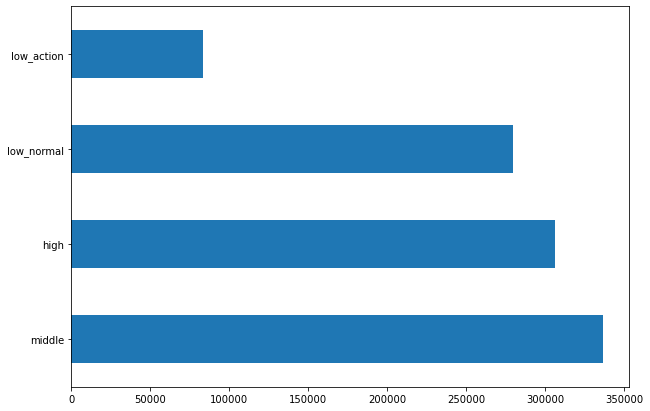

In [486]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['NAME_YIELD_GROUP'].value_counts().plot.barh();

In [487]:
# change to categorical

prev_data['NAME_YIELD_GROUP'] = prev_data['NAME_YIELD_GROUP'].astype('category')

### PRODUCT_COMBINATION

In [488]:
# checking null count

prev_data['PRODUCT_COMBINATION'].isnull().sum()

0

In [489]:
# checking dtype 

prev_data['PRODUCT_COMBINATION'].dtype

dtype('O')

In [490]:
# checking for value counts in percentage

prev_data['PRODUCT_COMBINATION'].value_counts(normalize=True)*100


POS household with interest      22.79
POS mobile with interest         16.14
Cash X-Sell: middle              12.62
Cash X-Sell: low                 11.14
POS industry with interest        8.18
POS household without interest    7.54
Cash Street: high                 5.17
Cash X-Sell: high                 5.13
Cash Street: low                  3.17
Cash Street: middle               2.82
POS mobile without interest       2.19
POS other with interest           1.85
POS industry without interest     1.04
POS others without interest       0.22
Name: PRODUCT_COMBINATION, dtype: float64

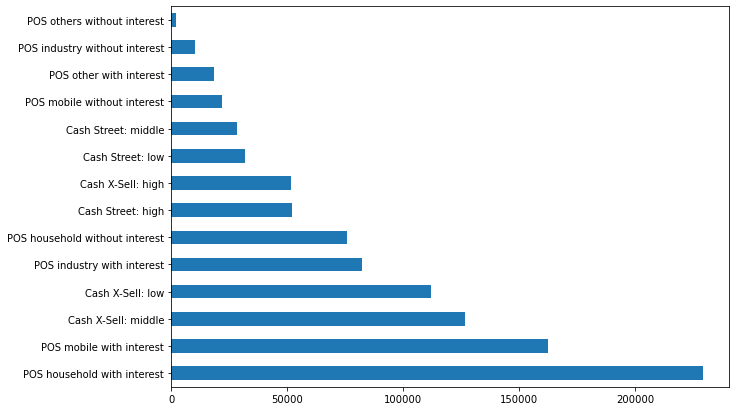

In [491]:
# plot bar graph

plt.figure(figsize=(10,7))
prev_data['PRODUCT_COMBINATION'].value_counts().plot.barh();

In [492]:
# change to categorical

prev_data['PRODUCT_COMBINATION'] = prev_data['PRODUCT_COMBINATION'].astype('category')

In [493]:
# removing some irrelevant columns

cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
        'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 
        'CODE_REJECT_REASON', 'CNT_PAYMENT']

for col in cols:
    prev_data.drop(col, axis=1, inplace=True)
    

In [494]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'PREV_AMT_CREDIT_GROUPS', 'PREV_GOODS_PRICE_GROUPS', 'DECISION_GROUPS'], dtype='object')

- ## Univariate Analysis + Bivariate Analysis (previous_application.csv)

- ***Utility functions for plotting***

In [495]:
# util function to plot continous variable using scatter plot

def continous_continous_scatterplot(data, col_1, col_2, title_name, fig_size):
    plt.figure(figsize=fig_size)
    
    plt.title(title_name)
    sns.scatterplot(data[col_1], data[col_2])
    
      
    plt.show()
    
    
# util function to plot categorical vs continous variable using box plot

def categorical_continous_boxplot(data, col_1, col_2, title_name, fig_size):
    plt.figure(figsize=fig_size)
    
   
    plt.title(title_name)
    sns.boxplot(x=col_1, y=col_2, data=data)

    plt.show()
    
    
# util function to plot categorical variables using count plot

def categorical_categorical_countplot(data, col_1, col_2, title_name, fig_size, rot=0, perc_flag=True):
    plt.figure(figsize=fig_size)
    
    plt.title(title_name)
    bplot = sns.countplot(x=col_1, hue=col_2, data=data)
    if perc_flag:
        for p in bplot.patches:
            bplot.annotate(text = "{:.1f}%".format(float(p.get_height()/data.shape[0]*100)), 
                   xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 6), 
                   textcoords = 'offset points')
    plt.xticks(rotation=rot)

    plt.show()
       

- ## Categorical variables

In [496]:
# get the list of categorical columns

list(prev_data.select_dtypes(include=['category']).columns)

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'PREV_AMT_CREDIT_GROUPS',
 'PREV_GOODS_PRICE_GROUPS',
 'DECISION_GROUPS']

### NAME_CONTRACT_TYPE

#### NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS

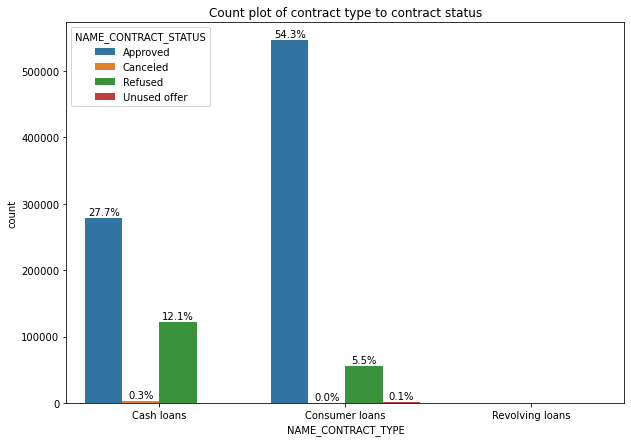

In [497]:
categorical_categorical_countplot(prev_data,'NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','Count plot of contract type to contract status', (10,7))

#### NAME_CONTRACT_TYPE vs AMT_CREDIT

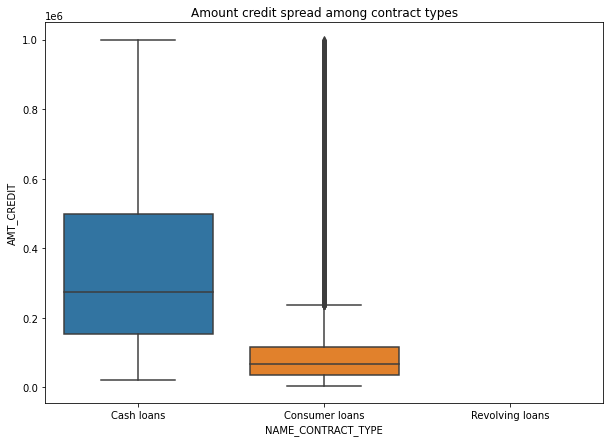

In [498]:
categorical_continous_boxplot(prev_data[(prev_data['AMT_CREDIT']> 0) & (prev_data['AMT_CREDIT']< 1000000)],'NAME_CONTRACT_TYPE','AMT_CREDIT','Amount credit spread among contract types',(10,7))

### NAME_CASH_LOAN_PURPOSE

#### NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS

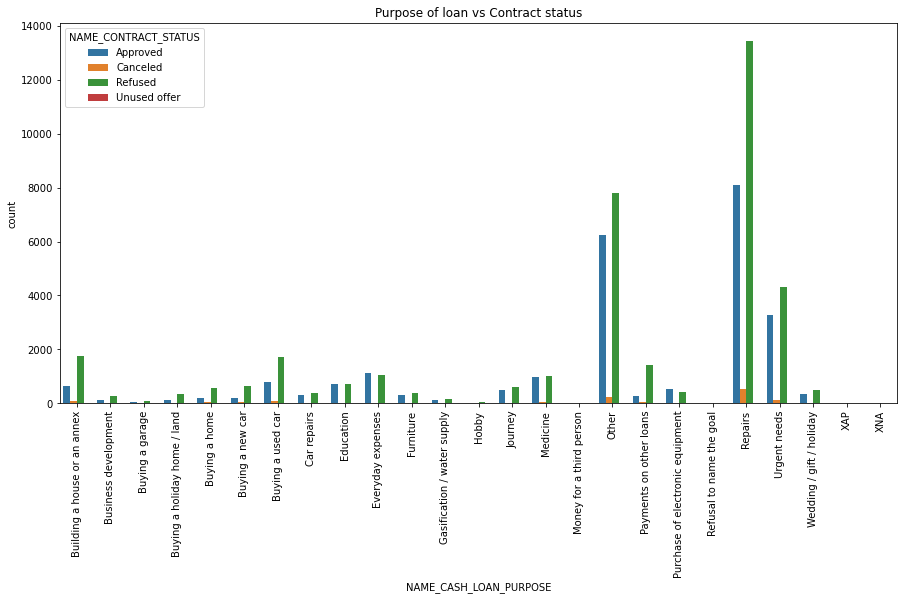

In [499]:
categorical_categorical_countplot(prev_data[~prev_data['NAME_CASH_LOAN_PURPOSE'].isin(['XAP','XNA'])],'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','Purpose of loan vs Contract status', (15,7), rot=90, perc_flag=False)

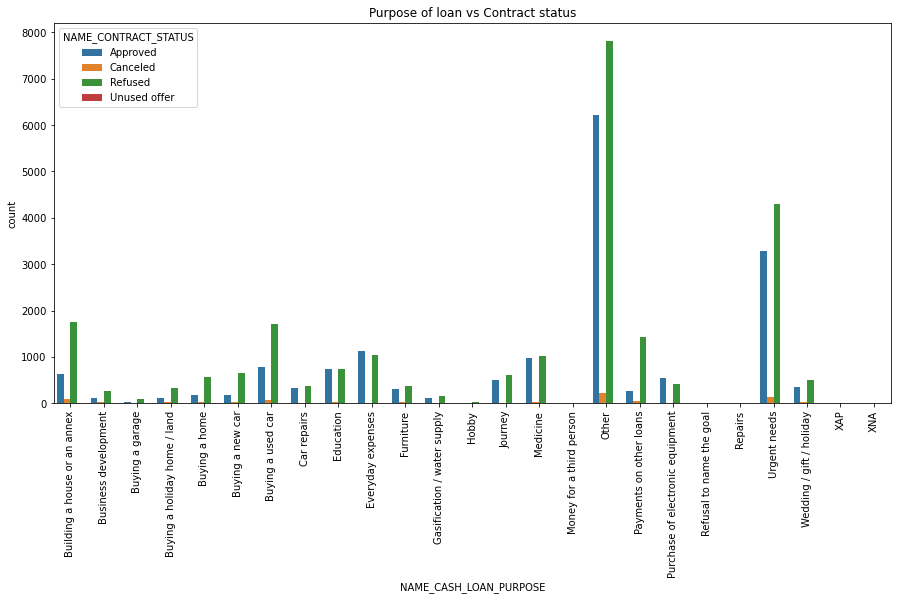

In [500]:
categorical_categorical_countplot(prev_data[~prev_data['NAME_CASH_LOAN_PURPOSE'].isin(['XAP','XNA','Repairs'])],'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','Purpose of loan vs Contract status', (15,7), rot=90, perc_flag=False)

### NAME_PAYMENT_TYPE

#### NAME_PAYMENT_TYPE vs NAME_CONTRACT_STATUS

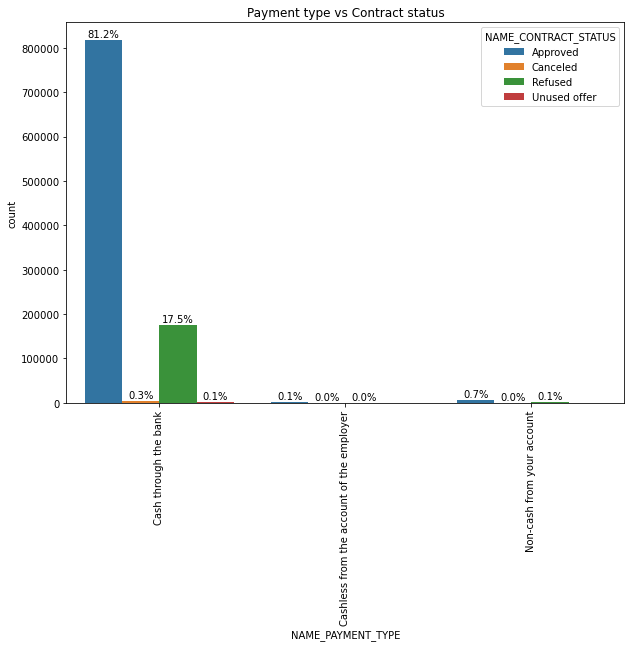

In [501]:
categorical_categorical_countplot(prev_data[prev_data['NAME_PAYMENT_TYPE']!='XNA'], 'NAME_PAYMENT_TYPE', 'NAME_CONTRACT_STATUS','Payment type vs Contract status',(10,7), rot=90)

### NAME_CLIENT_TYPE

#### NAME_CLIENT_TYPE vs  NAME_CONTRACT_STATUS

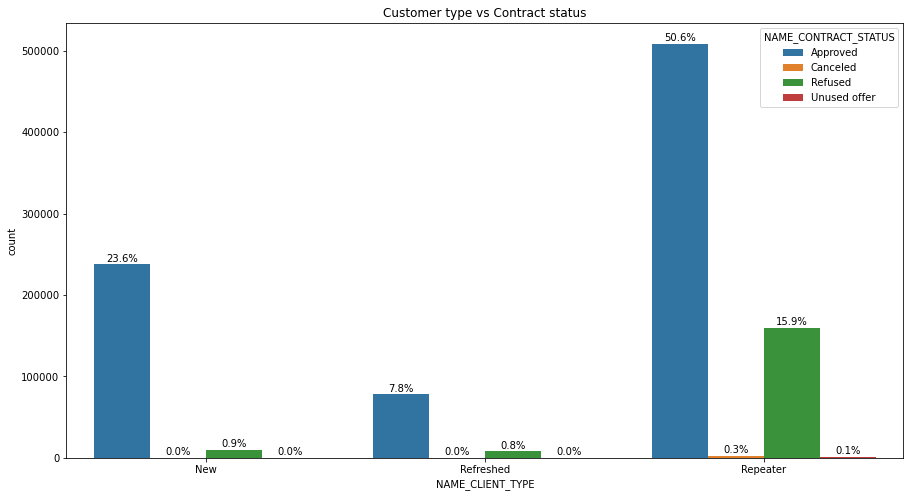

In [502]:
categorical_categorical_countplot(prev_data[prev_data['NAME_CLIENT_TYPE']!='XNA'], 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS','Customer type vs Contract status',(15,8))

### NAME_GOODS_CATEGORY

#### NAME_GOODS_CATEGORY vs NAME_CONTRACT_STATUS

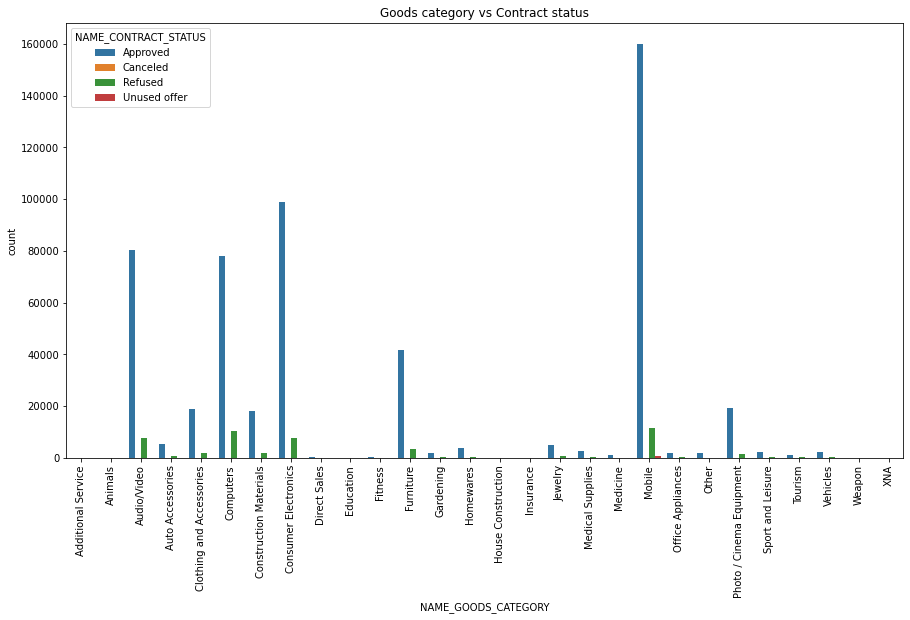

In [503]:
categorical_categorical_countplot(prev_data[prev_data['NAME_GOODS_CATEGORY']!='XNA'], 'NAME_GOODS_CATEGORY', 'NAME_CONTRACT_STATUS','Goods category vs Contract status',(15,8),rot=90, perc_flag=False)

### NAME_PORTFOLIO

#### NAME_PORTFOLIO vs NAME_CONTRACT_STATUS

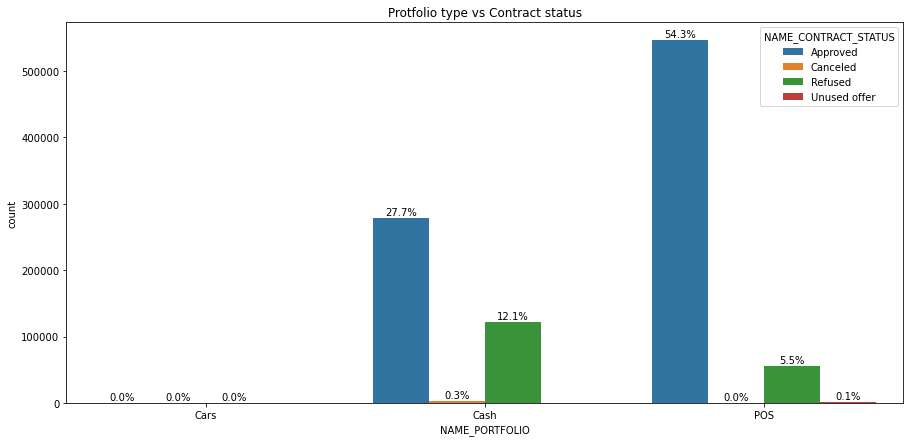

In [504]:
categorical_categorical_countplot(prev_data[prev_data['NAME_PORTFOLIO']!='XNA'], 'NAME_PORTFOLIO', 'NAME_CONTRACT_STATUS','Protfolio type vs Contract status',(15,7))

### NAME_PRODUCT_TYPE

#### NAME_PRODUCT_TYPE vs NAME_CONTRACT_STATUS

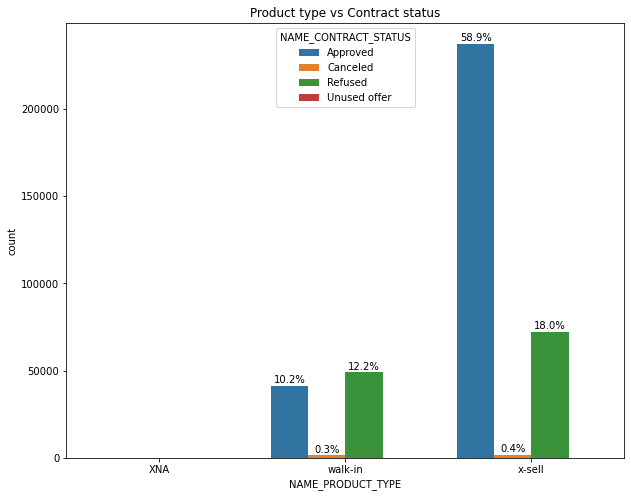

In [505]:
categorical_categorical_countplot(prev_data[prev_data['NAME_PRODUCT_TYPE']!='XNA'], 'NAME_PRODUCT_TYPE', 'NAME_CONTRACT_STATUS','Product type vs Contract status',(10,8))

### CHANNEL_TYPE

#### CHANNEL_TYPE vs  NAME_CONTRACT_STATUS

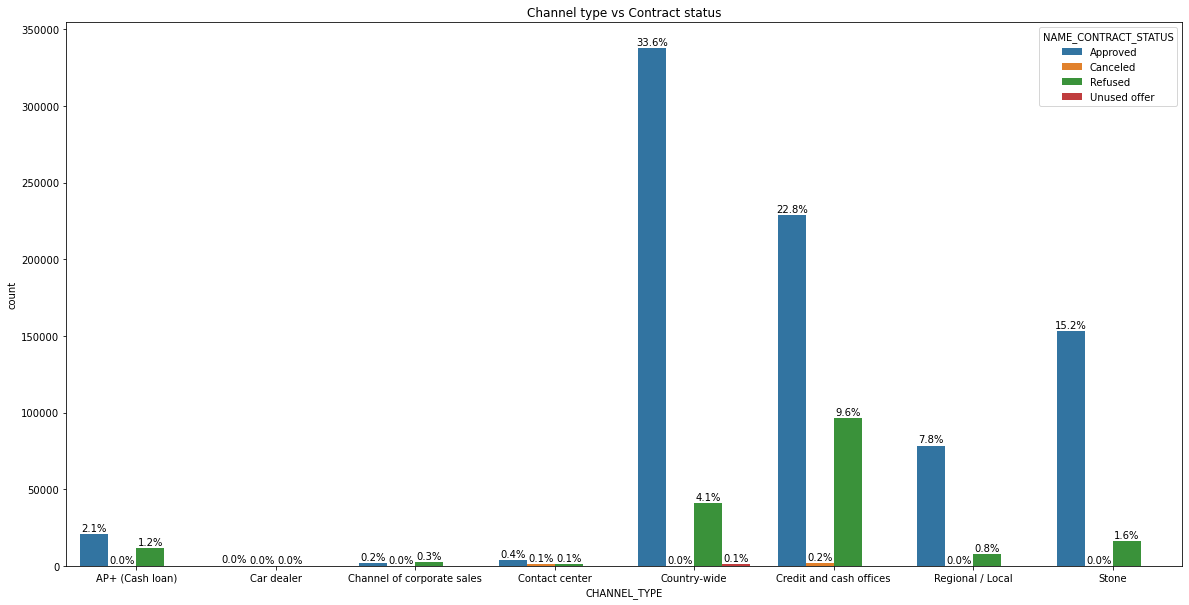

In [506]:
categorical_categorical_countplot(prev_data, 'CHANNEL_TYPE', 'NAME_CONTRACT_STATUS','Channel type vs Contract status',(20,10))

### NAME_SELLER_INDUSTRY

#### NAME_SELLER_INDUSTRY vs NAME_CONTRACT_STATUS

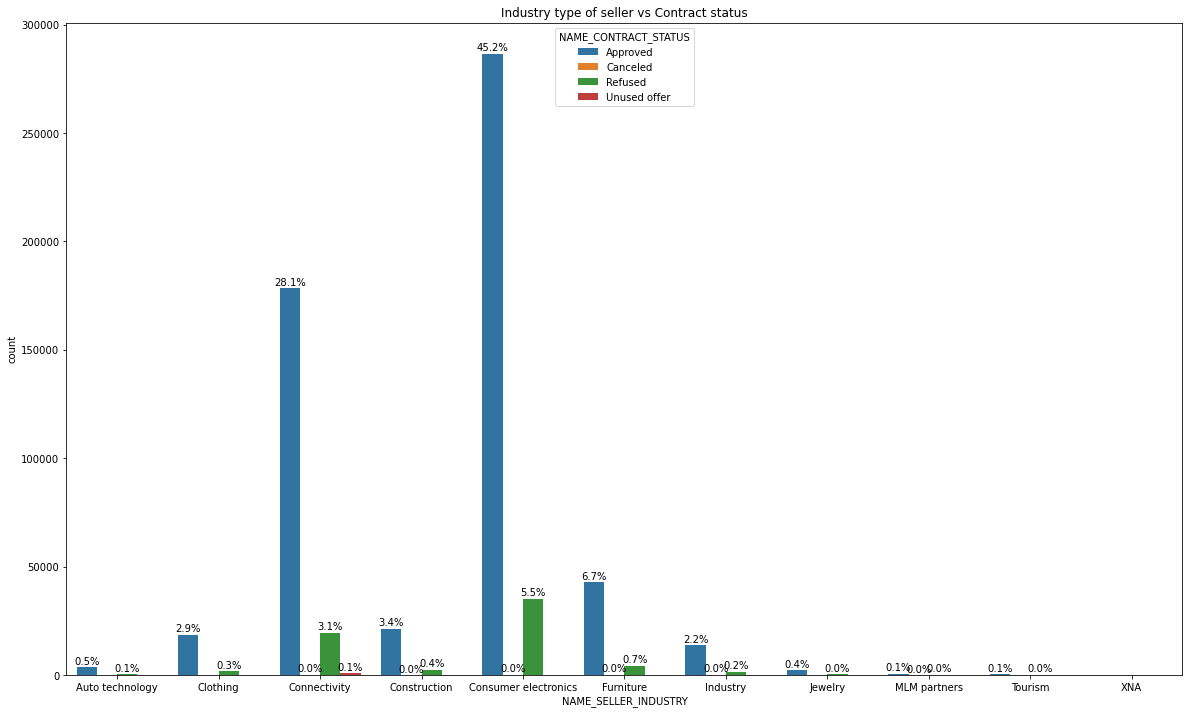

In [507]:
categorical_categorical_countplot(prev_data[prev_data['NAME_SELLER_INDUSTRY']!='XNA'], 'NAME_SELLER_INDUSTRY', 'NAME_CONTRACT_STATUS','Industry type of seller vs Contract status',(20,12))

#### NAME_SELLER_INDUSTRY vs NAME_CONTRACT_TYPE

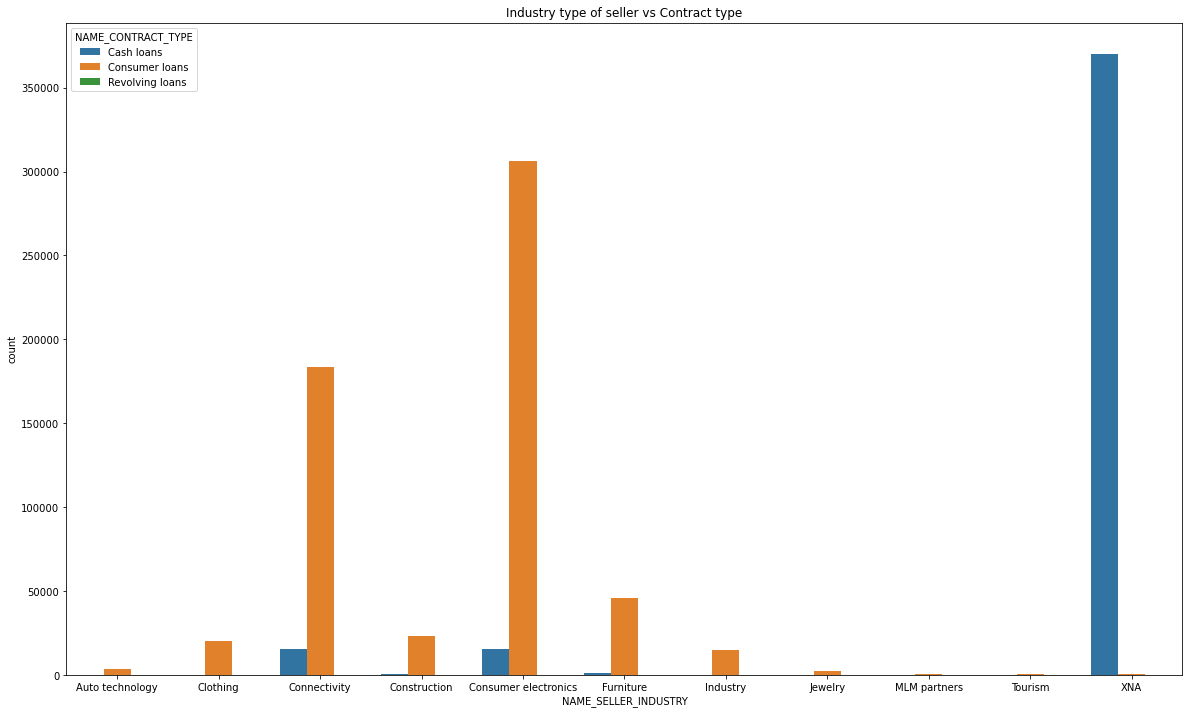

In [508]:
categorical_categorical_countplot(prev_data, 'NAME_SELLER_INDUSTRY', 'NAME_CONTRACT_TYPE','Industry type of seller vs Contract type',(20,12), perc_flag=False)

#### NAME_SELLER_INDUSTRY vs SELLERPLACE_AREA

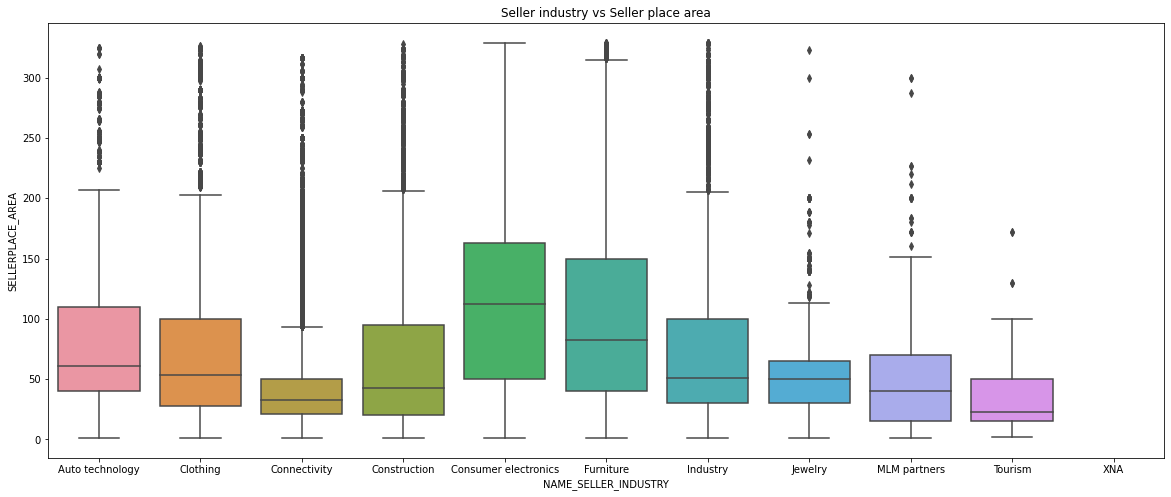

In [509]:
categorical_continous_boxplot(prev_data[(prev_data['NAME_SELLER_INDUSTRY']!='XNA') & ((prev_data['SELLERPLACE_AREA']<330) & (prev_data['SELLERPLACE_AREA']>0))], 'NAME_SELLER_INDUSTRY', 'SELLERPLACE_AREA','Seller industry vs Seller place area',(20,8))

#### NAME_SELLER_INDUSTRY vs AMT_GOODS_PRICE

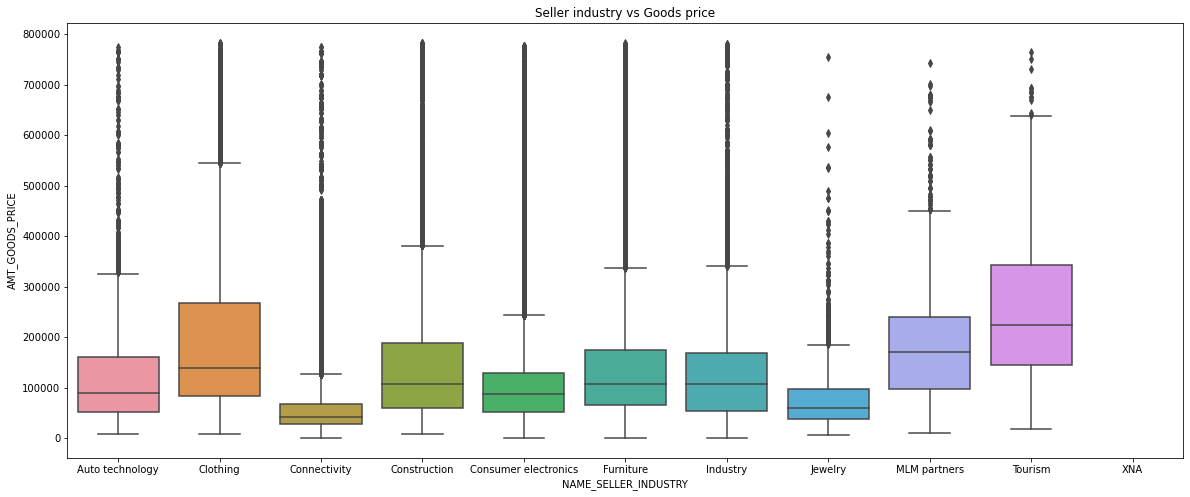

In [510]:
categorical_continous_boxplot(prev_data[(prev_data['NAME_SELLER_INDUSTRY']!='XNA') & (prev_data['AMT_GOODS_PRICE']< 783477.0) ], 'NAME_SELLER_INDUSTRY', 'AMT_GOODS_PRICE','Seller industry vs Goods price',(20,8))

### NAME_YIELD_GROUP

#### NAME_YIELD_GROUP vs NAME_CONTRACT_TYPE

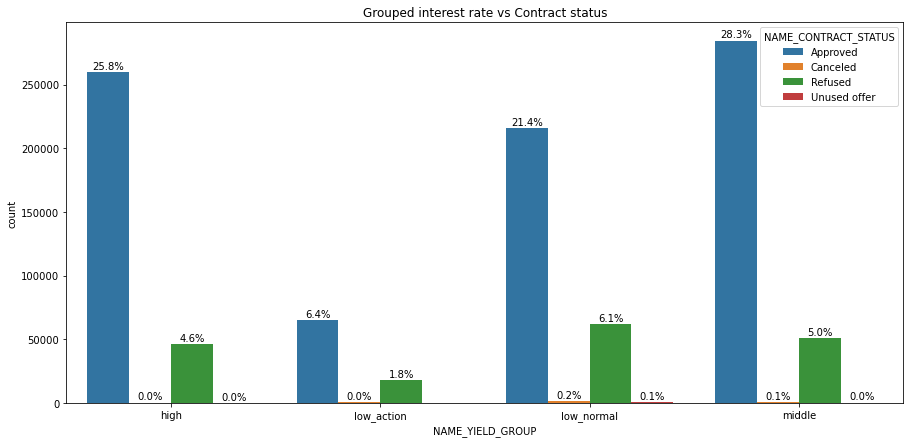

In [511]:
categorical_categorical_countplot(prev_data[prev_data['NAME_YIELD_GROUP']!='XNA'], 'NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS','Grouped interest rate vs Contract status',(15,7))

### PRODUCT_COMBINATION

#### PRODUCT_COMBINATION vs NAME_CONTRACT_TYPE

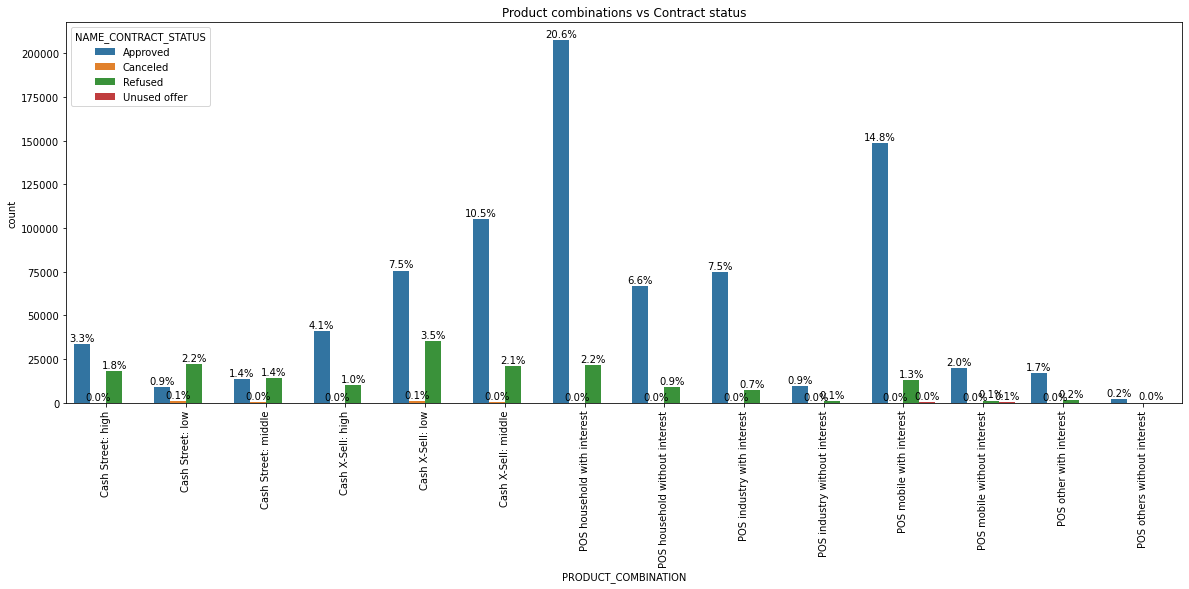

In [512]:
categorical_categorical_countplot(prev_data, 'PRODUCT_COMBINATION', 'NAME_CONTRACT_STATUS','Product combinations vs Contract status',(20,7), rot=90)

### DECISION_GROUPS 

#### DECISION_GROUPS vs NAME_CONTRACT_STATUS

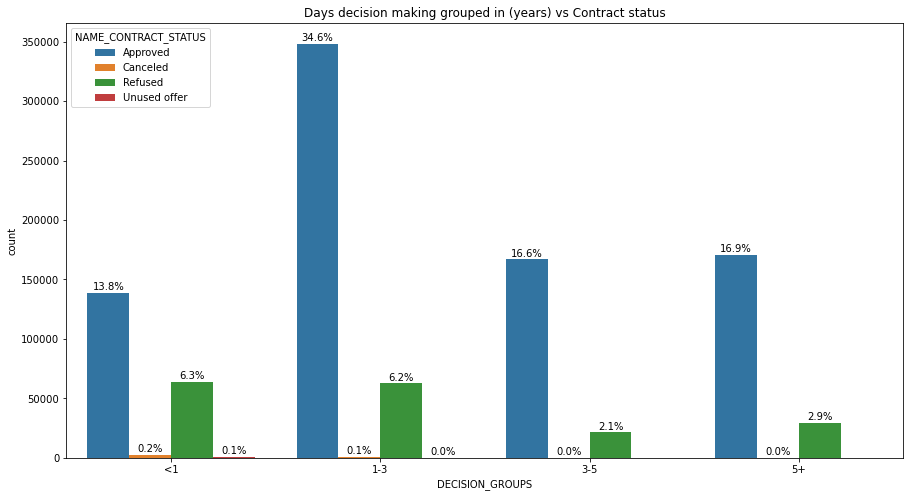

In [513]:
categorical_categorical_countplot(prev_data, 'DECISION_GROUPS', 'NAME_CONTRACT_STATUS','Days decision making grouped in (years) vs Contract status',(15,8))

### PREV_GOODS_PRICE_GROUPS 

#### PREV_GOODS_PRICE_GROUPS vs NAME_CONTRACT_STATUS

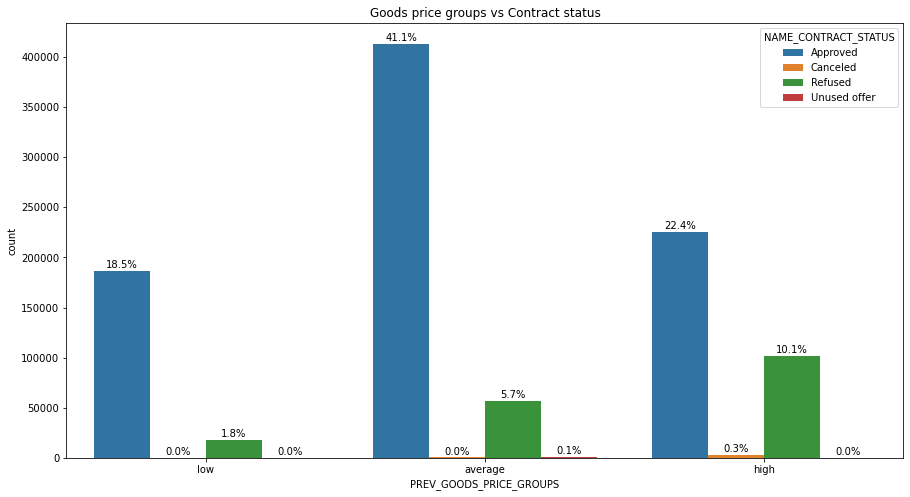

In [514]:
categorical_categorical_countplot(prev_data, 'PREV_GOODS_PRICE_GROUPS', 'NAME_CONTRACT_STATUS','Goods price groups vs Contract status',(15,8))

### PREV_AMT_CREDIT_GROUPS 

#### PREV_AMT_CREDIT_GROUPS vs NAME_CONTRACT_STATUS

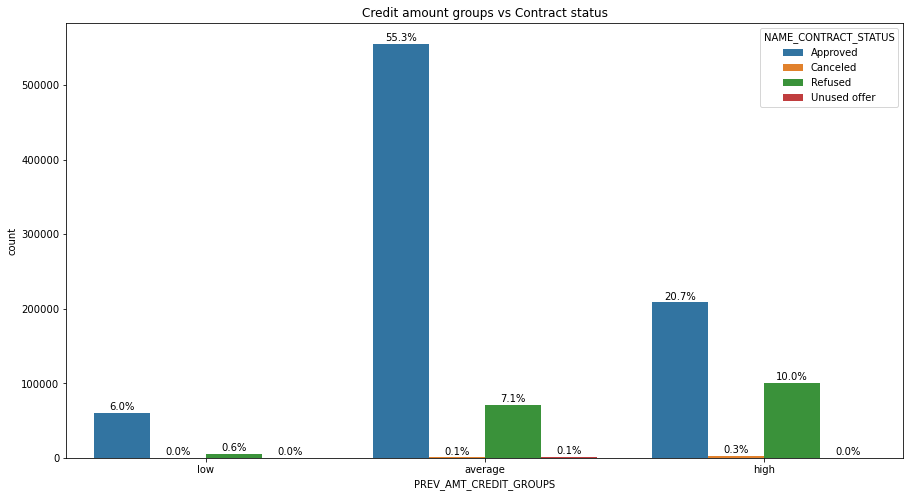

In [515]:
categorical_categorical_countplot(prev_data, 'PREV_AMT_CREDIT_GROUPS', 'NAME_CONTRACT_STATUS','Credit amount groups vs Contract status',(15,8))

- ## Numerical variables

In [516]:
# get the list of numerical columns

list(prev_data.select_dtypes(include=['number']).columns)

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'SELLERPLACE_AREA']

### AMT_CREDIT

#### AMT_CREDIT vs NAME_CONTRACT_STATUS

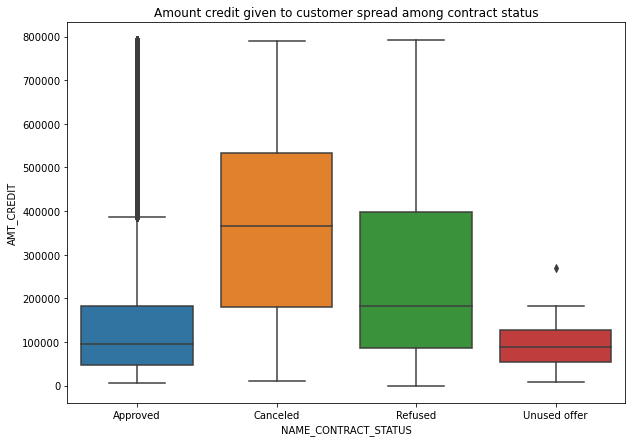

In [517]:
categorical_continous_boxplot(prev_data[(prev_data['AMT_CREDIT']< 793192)],'NAME_CONTRACT_STATUS','AMT_CREDIT','Amount credit given to customer spread among contract status',(10,7))

#### AMT_CREDIT vs AMT_GOODS_PRICE

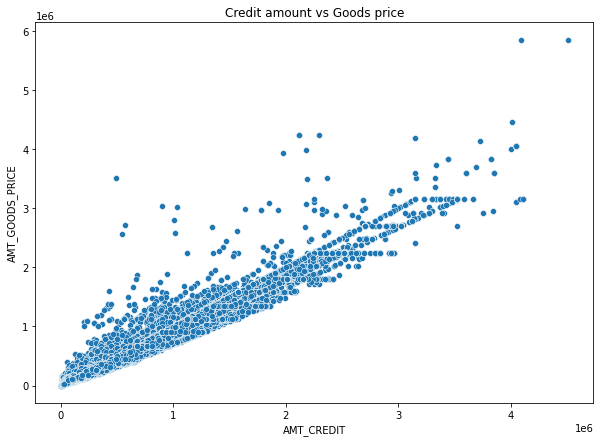

In [518]:
continous_continous_scatterplot(prev_data, 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'Credit amount vs Goods price', (10,7))

### AMT_GOODS_PRICE

#### AMT_GOODS_PRICE vs  NAME_CONTRACT_STATUS

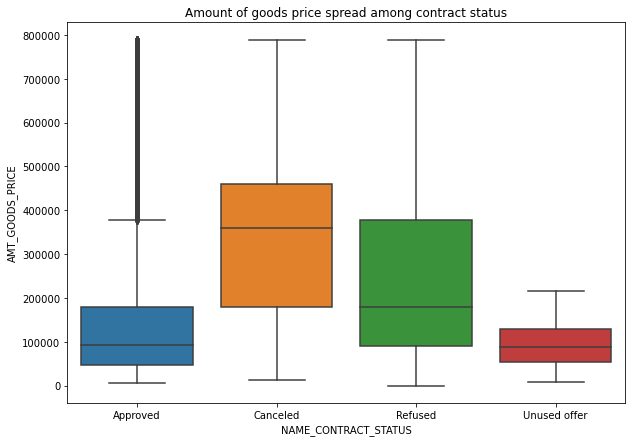

In [519]:
categorical_continous_boxplot(prev_data[(prev_data['AMT_GOODS_PRICE'] <790000)],'NAME_CONTRACT_STATUS','AMT_GOODS_PRICE','Amount of goods price spread among contract status',(10,7))

#### AMT_GOODS_PRICE vs NAME_GOODS_CATEGORY

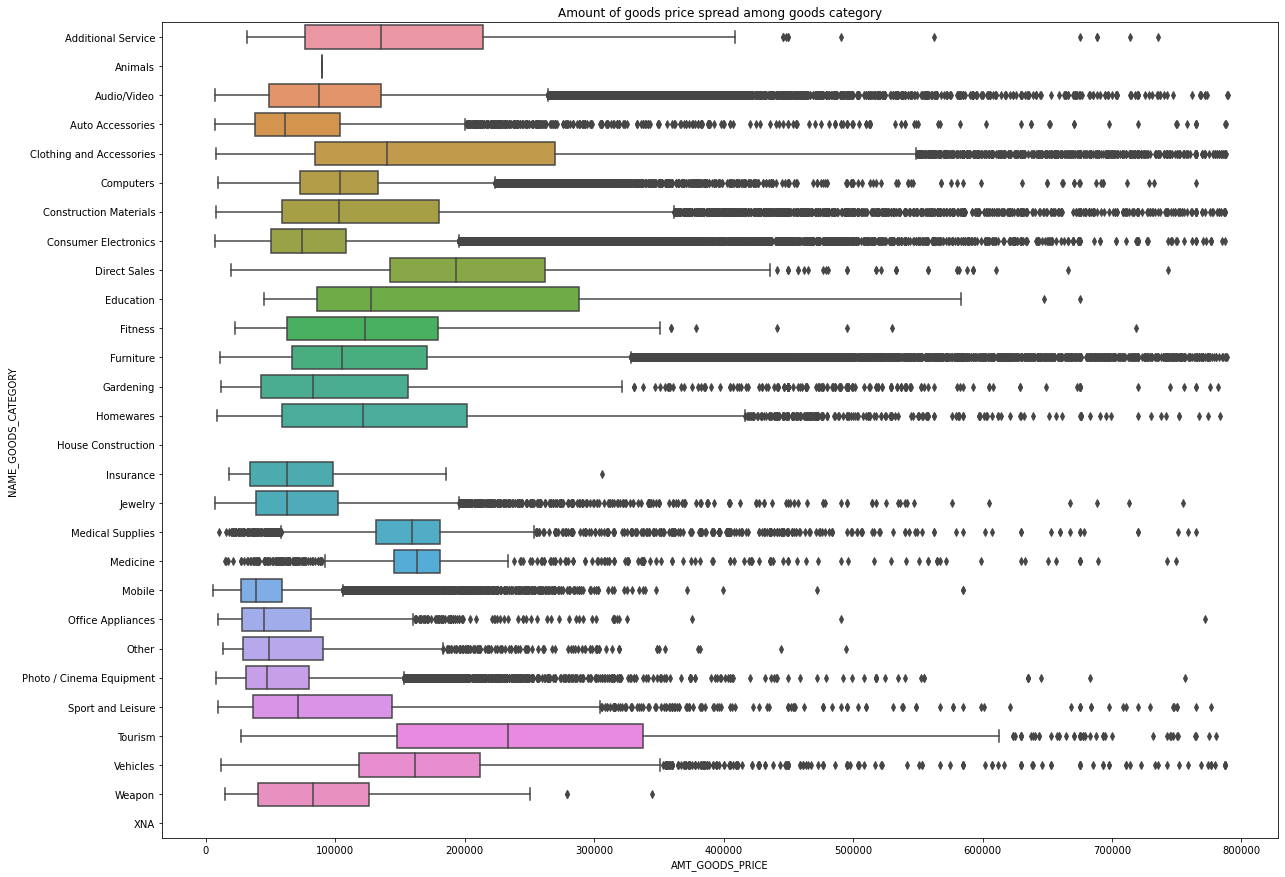

In [520]:
categorical_continous_boxplot(prev_data[(prev_data['AMT_GOODS_PRICE'] <790000) & (prev_data['NAME_GOODS_CATEGORY']!='XNA') ], 'AMT_GOODS_PRICE', 'NAME_GOODS_CATEGORY','Amount of goods price spread among goods category',(20,15))

### SELLERPLACE_AREA

#### SELLERPLACE_AREA vs NAME_CONTRACT_STATUS

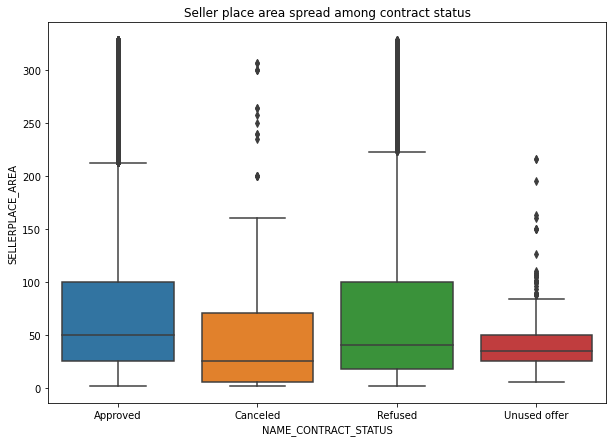

In [521]:
categorical_continous_boxplot(prev_data[(prev_data['SELLERPLACE_AREA']<330) & (prev_data['SELLERPLACE_AREA']>1)],'NAME_CONTRACT_STATUS','SELLERPLACE_AREA','Seller place area spread among contract status',(10,7))

#### SELLERPLACE_AREA vs AMT_GOODS_PRICE

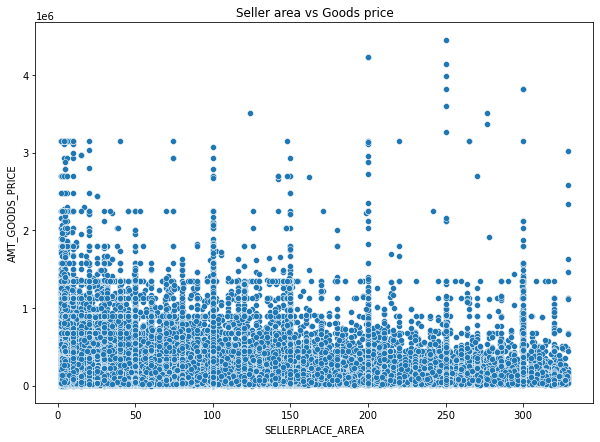

In [522]:
continous_continous_scatterplot(prev_data[(prev_data['SELLERPLACE_AREA']<330) & (prev_data['SELLERPLACE_AREA']>1)], 'SELLERPLACE_AREA', 'AMT_GOODS_PRICE', 'Seller area vs Goods price', (10,7))

In [523]:
# removing a few columns after analysis due to irrelevance and after binning groups

cols = ['SK_ID_PREV', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO']

for col in cols:
    prev_data.drop(col, axis=1, inplace=True)

## PART - 3 : Merging both csv files and doing analysis

In [524]:
# inspect shape of app_data dataframe

app_data.shape

(264894, 15)

In [525]:
# inspect shape of prev_data dataframe

prev_data.shape

(1005473, 15)

In [526]:
# merging both the dataframe using a left join on key 'SK_ID_CURR' using merge method

merged_df = pd.merge(app_data, prev_data, how='left', on=['SK_ID_CURR'])

In [527]:
# check shape of merged dataframe

merged_df.shape

(785174, 29)

In [528]:
# checking data head

merged_df.head(10)

SK_ID_CURR  TARGET NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE OCCUPATION_TYPE       ORGANIZATION_TYPE  EXT_SOURCE_2 INCOME_GROUPS CREDIT_GROUPS GOODS_PRICE_GROUPS AGE_GROUPS EMP_EXP_GROUPS NAME_CONTRACT_TYPE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP          PRODUCT_COMBINATION PREV_AMT_CREDIT_GROUPS PREV_GOODS_PRICE_GROUPS DECISION_GROUPS
0      100002       1          Working  Secondary / secondary special  Single / not married  House / apartment                        0.02        Laborers  Business Entity Type 3          0.26       average       average            average      20-30             <5                NaN                    NaN                  NaN              NaN                   NaN               NaN                      NaN               nan                   NaN              NaN                          NaN                    NaN                     NaN             NaN
1      100003       0    State servant               Higher education               Married  House / apartment                        0.00      Core staff                  School          0.62          high          high               high      40-50             <5     Consumer loans                    XAP             Approved        Refreshed             Furniture               XNA                    Stone           1400.00             Furniture           middle   POS industry with interest                   high                    high             1-3
2      100003       0    State servant               Higher education               Married  House / apartment                        0.00      Core staff                  School          0.62          high          high               high      40-50             <5     Consumer loans                    XAP             Approved        Refreshed  Consumer Electronics               XNA             Country-wide            200.00  Consumer electronics           middle  POS household with interest                average                 average              5+
3      100004       0          Working  Secondary / secondary special  Single / not married  House / apartment                        0.01        Laborers              Government          0.56           low           low                low      50-60             <5     Consumer loans                    XAP             Approved              New                Mobile               XNA         Regional / Local             30.00          Connectivity           middle  POS mobile without interest                    low                     low             1-3
4      100007       0          Working  Secondary / secondary special  Single / not married  House / apartment                        0.03      Core staff                Religion          0.32       average       average            average      50-60           5-10         Cash loans                    XNA             Approved         Repeater                   XNA           walk-in         Regional / Local           1200.00  Consumer electronics             high            Cash Street: high                average                 average             1-3
5      100007       0          Working  Secondary / secondary special  Single / not married  House / apartment                        0.03      Core staff                Religion          0.32       average       average            average      50-60           5-10         Cash loans                    XNA             Approved         Repeater                   XNA            x-sell          AP+ (Cash loan)              4.00                   XNA           middle          Cash X-Sell: middle                   high                    high             1-3
6      100007       0          Working  Secondary / secondary special  Single / not

In [529]:
# descriptive statistics of dataframe

merged_df.describe()

SK_ID_CURR    TARGET  REGION_POPULATION_RELATIVE  EXT_SOURCE_2  SELLERPLACE_AREA
count   785174.00 785174.00                   785174.00     785174.00         757239.00
mean    278318.12      0.08                        0.02          0.52            447.79
std     102799.09      0.27                        0.01          0.19           9411.62
min     100002.00      0.00                        0.00          0.00              0.00
25%     189183.00      0.00                        0.01          0.40              1.00
50%     278589.50      0.00                        0.02          0.57             30.00
75%     367300.00      0.00                        0.03          0.66            150.00
max     456255.00      1.00                        0.07          0.85        4000000.00

In [530]:
# inspecting dtypes and null_counts of dataframe

merged_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785174 entries, 0 to 785173
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  785174 non-null  int64   
 1   TARGET                      785174 non-null  int64   
 2   NAME_INCOME_TYPE            785174 non-null  category
 3   NAME_EDUCATION_TYPE         785174 non-null  category
 4   NAME_FAMILY_STATUS          785174 non-null  category
 5   NAME_HOUSING_TYPE           785174 non-null  category
 6   REGION_POPULATION_RELATIVE  785174 non-null  float64 
 7   OCCUPATION_TYPE             785174 non-null  category
 8   ORGANIZATION_TYPE           785174 non-null  category
 9   EXT_SOURCE_2                785174 non-null  float64 
 10  INCOME_GROUPS               785174 non-null  category
 11  CREDIT_GROUPS               785174 non-null  category
 12  GOODS_PRICE_GROUPS          785174 non-null  category
 13 

In [531]:
# percentage of null in each column

100*merged_df.isnull().sum()/merged_df.shape[0]

SK_ID_CURR                   0.00
TARGET                       0.00
NAME_INCOME_TYPE             0.00
NAME_EDUCATION_TYPE          0.00
NAME_FAMILY_STATUS           0.00
NAME_HOUSING_TYPE            0.00
REGION_POPULATION_RELATIVE   0.00
OCCUPATION_TYPE              0.00
ORGANIZATION_TYPE            0.00
EXT_SOURCE_2                 0.00
INCOME_GROUPS                0.00
CREDIT_GROUPS                0.00
GOODS_PRICE_GROUPS           0.00
AGE_GROUPS                   0.00
EMP_EXP_GROUPS               0.00
NAME_CONTRACT_TYPE           3.56
NAME_CASH_LOAN_PURPOSE       3.56
NAME_CONTRACT_STATUS         3.56
NAME_CLIENT_TYPE             3.56
NAME_GOODS_CATEGORY          3.56
NAME_PRODUCT_TYPE            3.56
CHANNEL_TYPE                 3.56
SELLERPLACE_AREA             3.56
NAME_SELLER_INDUSTRY         3.56
NAME_YIELD_GROUP             3.56
PRODUCT_COMBINATION          3.56
PREV_AMT_CREDIT_GROUPS       3.56
PREV_GOODS_PRICE_GROUPS      3.56
DECISION_GROUPS              3.56
dtype: float64

- ***Here we can impute columns with ~4% null values***

In [532]:
# fetching null value column names

cols = merged_df.columns[merged_df.isnull().any()].tolist()
cols

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'PREV_AMT_CREDIT_GROUPS',
 'PREV_GOODS_PRICE_GROUPS',
 'DECISION_GROUPS']

In [533]:
# since the null count is ~4% of total data size we proceed to impute the values using 'dropna'

for col in cols:
    merged_df.dropna(subset=[col],how='any',inplace=True)
    

In [534]:
# verify percentage of null in each column

100*merged_df.isnull().sum()/merged_df.shape[0]

SK_ID_CURR                   0.00
TARGET                       0.00
NAME_INCOME_TYPE             0.00
NAME_EDUCATION_TYPE          0.00
NAME_FAMILY_STATUS           0.00
NAME_HOUSING_TYPE            0.00
REGION_POPULATION_RELATIVE   0.00
OCCUPATION_TYPE              0.00
ORGANIZATION_TYPE            0.00
EXT_SOURCE_2                 0.00
INCOME_GROUPS                0.00
CREDIT_GROUPS                0.00
GOODS_PRICE_GROUPS           0.00
AGE_GROUPS                   0.00
EMP_EXP_GROUPS               0.00
NAME_CONTRACT_TYPE           0.00
NAME_CASH_LOAN_PURPOSE       0.00
NAME_CONTRACT_STATUS         0.00
NAME_CLIENT_TYPE             0.00
NAME_GOODS_CATEGORY          0.00
NAME_PRODUCT_TYPE            0.00
CHANNEL_TYPE                 0.00
SELLERPLACE_AREA             0.00
NAME_SELLER_INDUSTRY         0.00
NAME_YIELD_GROUP             0.00
PRODUCT_COMBINATION          0.00
PREV_AMT_CREDIT_GROUPS       0.00
PREV_GOODS_PRICE_GROUPS      0.00
DECISION_GROUPS              0.00
dtype: float64

- ## Bivariate + Multivariate Analysis

- ***Utility function for plotting***

In [535]:
# util function to plot heatmap of pivot table

def heatmapper(data, index_name, column_name, value_name, ylabel, xlabel, fig_size=(10,7), rot=45):
    res = pd.pivot_table(data=data, index=index_name, columns=column_name, values=value_name)
    plt.figure(figsize=fig_size)
    sns.heatmap(res, annot=True, cmap='RdYlGn')
    plt.title(f'\n Percentage of Defaulters among {ylabel} & {xlabel} groups \n')
    plt.xlabel(f'\n {xlabel} ')
    plt.ylabel(f'{ylabel}')
    plt.xticks(rotation=rot)
    plt.show()

## NAME_EDUCATION_TYPE

### NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs TARGET

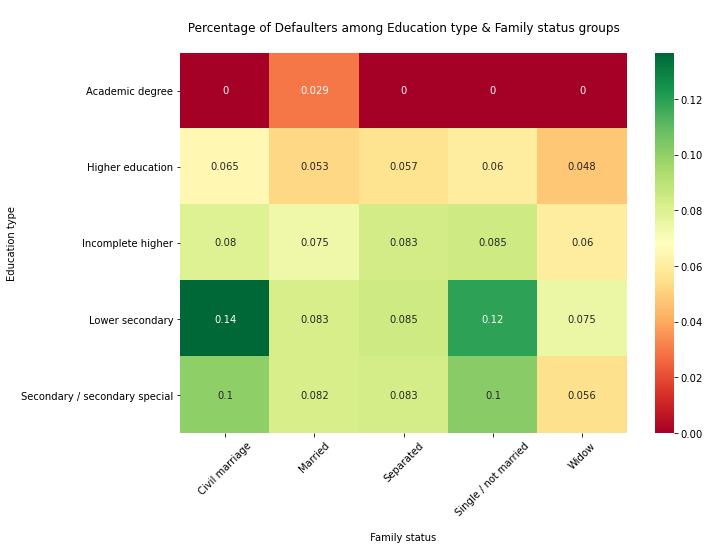

In [536]:
heatmapper(merged_df, 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'TARGET', 'Education type','Family status', fig_size=(10,7), rot=45)

### NAME_EDUCATION_TYPE vs NAME_HOUSING_TYPE vs TARGET

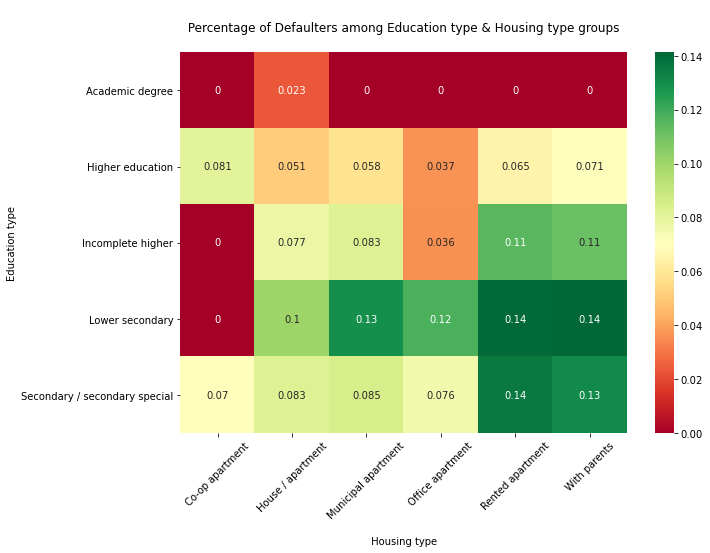

In [537]:
heatmapper(app_data, 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'TARGET', 'Education type','Housing type', fig_size=(10,7), rot=45)

### NAME_EDUCATION_TYPE vs INCOME_GROUPS vs TARGET

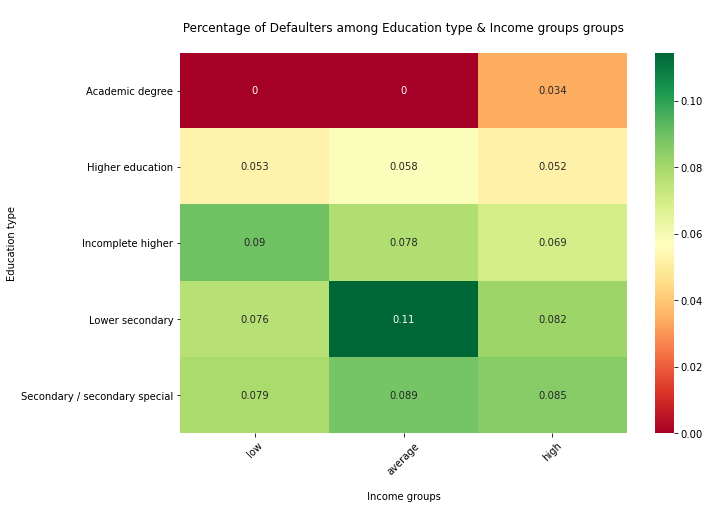

In [538]:
heatmapper(merged_df, 'NAME_EDUCATION_TYPE', 'INCOME_GROUPS', 'TARGET', 'Education type','Income groups', fig_size=(10,7), rot=45)

### NAME_EDUCATION_TYPE vs CREDIT_GROUPS vs TARGET

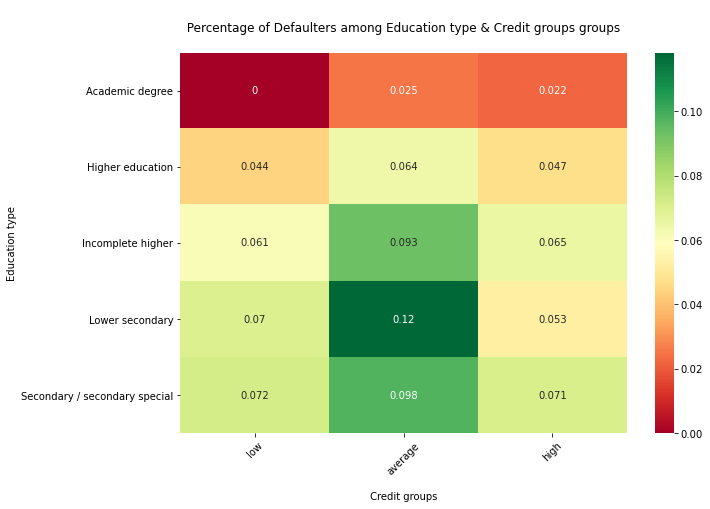

In [539]:
heatmapper(merged_df, 'NAME_EDUCATION_TYPE', 'CREDIT_GROUPS', 'TARGET', 'Education type','Credit groups', fig_size=(10,7), rot=45)

### NAME_EDUCATION_TYPE vs AGE_GROUPS vs TARGET

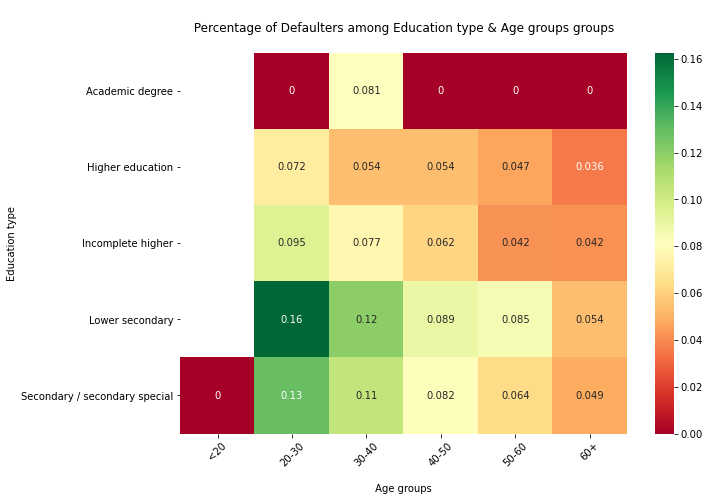

In [540]:
heatmapper(merged_df, 'NAME_EDUCATION_TYPE', 'AGE_GROUPS', 'TARGET', 'Education type','Age groups', fig_size=(10,7), rot=45)

### NAME_EDUCATION_TYPE vs EMP_EXP_GROUPS vs TARGET

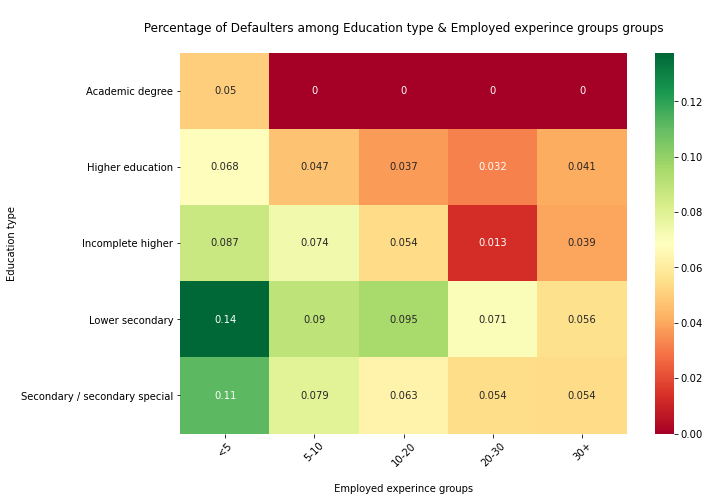

In [541]:
heatmapper(merged_df, 'NAME_EDUCATION_TYPE', 'EMP_EXP_GROUPS', 'TARGET', 'Education type','Employed experince groups', fig_size=(10,7), rot=45)

### NAME_EDUCATION_TYPE vs NAME_CONTRACT_STATUS 

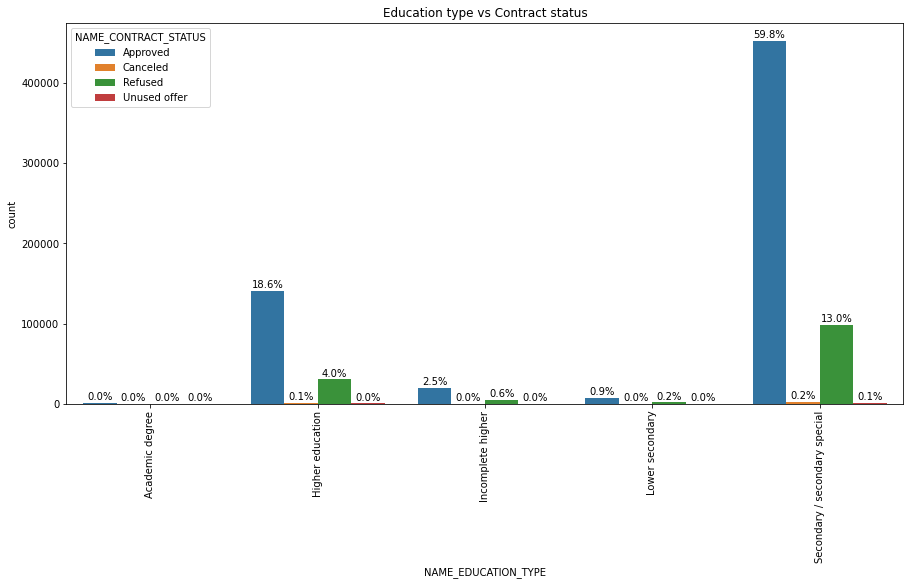

In [542]:
categorical_categorical_countplot(merged_df,'NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS','Education type vs Contract status', (15,7), rot=90)

## NAME_FAMILY_STATUS

### NAME_FAMILY_STATUS vs NAME_HOUSING_TYPE vs TARGET

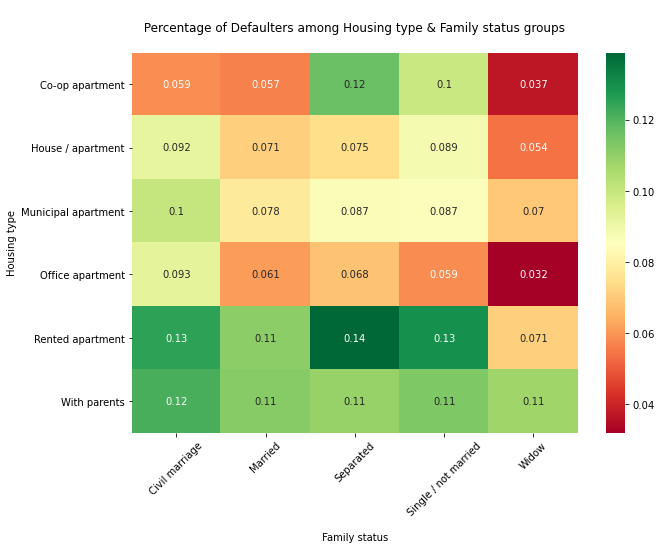

In [543]:
heatmapper(app_data, 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'TARGET', 'Housing type','Family status', fig_size=(10,7), rot=45)

### NAME_FAMILY_STATUS vs NAME_CONTRACT_STATUS 

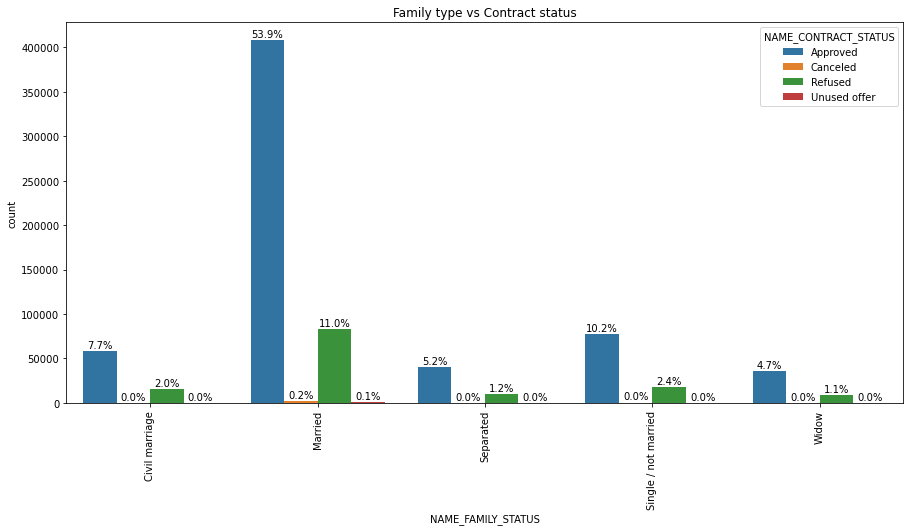

In [544]:
categorical_categorical_countplot(merged_df,'NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS','Family type vs Contract status', (15,7), rot=90)

## NAME_INCOME_TYPE

### NAME_INCOME_TYPE vs NAME_HOUSING_TYPE vs TARGET

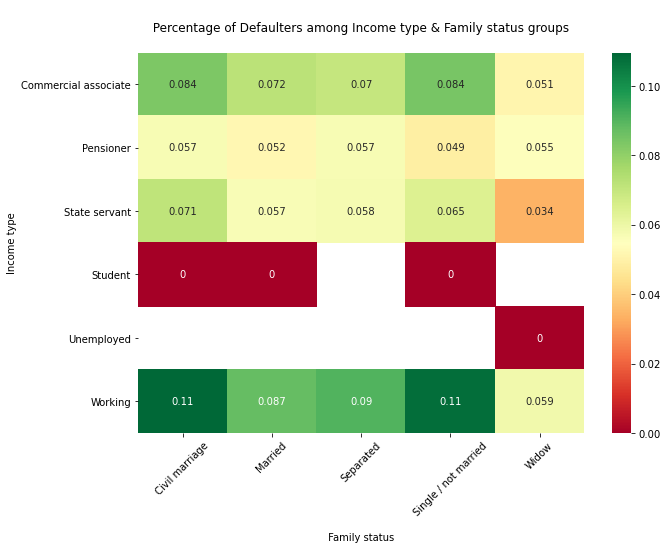

In [545]:
heatmapper(merged_df, 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'TARGET', 'Income type','Family status', fig_size=(10,7), rot=45)

### NAME_INCOME_TYPE vs PREV_AMT_CREDIT_GROUPS vs TARGET

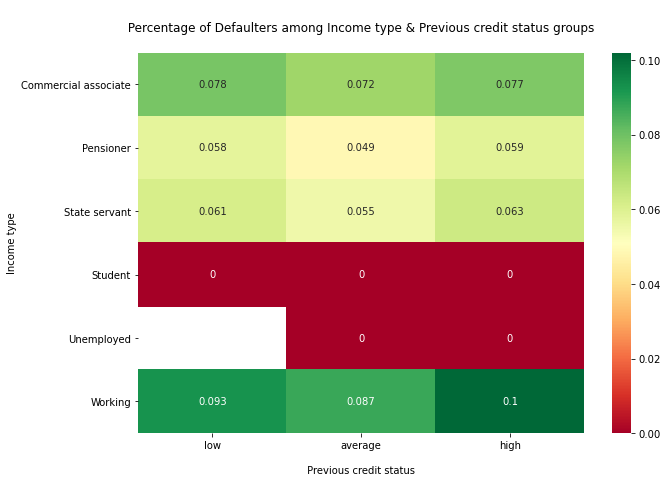

In [546]:
heatmapper(merged_df, 'NAME_INCOME_TYPE', 'PREV_AMT_CREDIT_GROUPS', 'TARGET', 'Income type','Previous credit status', fig_size=(10,7), rot=0)

### NAME_INCOME_TYPE vs NAME_CONTRACT_STATUS 

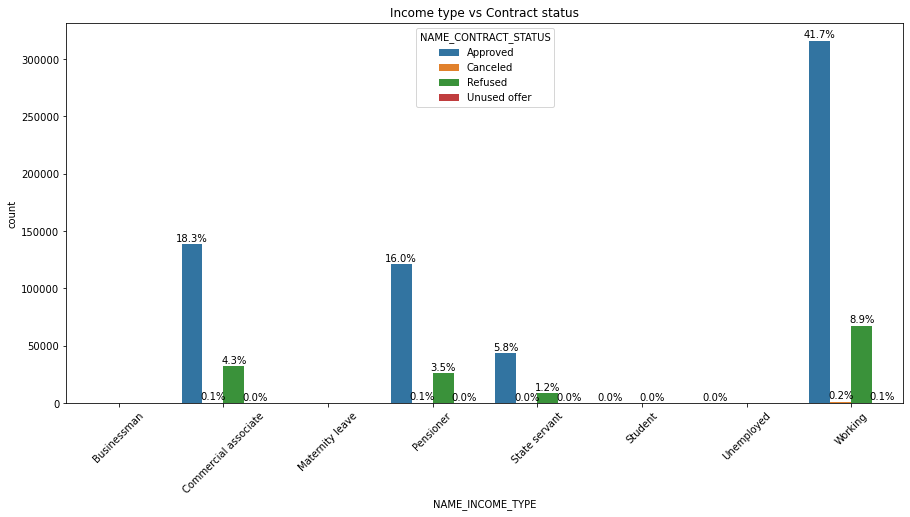

In [547]:
categorical_categorical_countplot(merged_df,'NAME_INCOME_TYPE','NAME_CONTRACT_STATUS','Income type vs Contract status', (15,7), rot=45)

## OCCUPATION_TYPE

### OCCUPATION_TYPE vs NAME_CONTRACT_STATUS

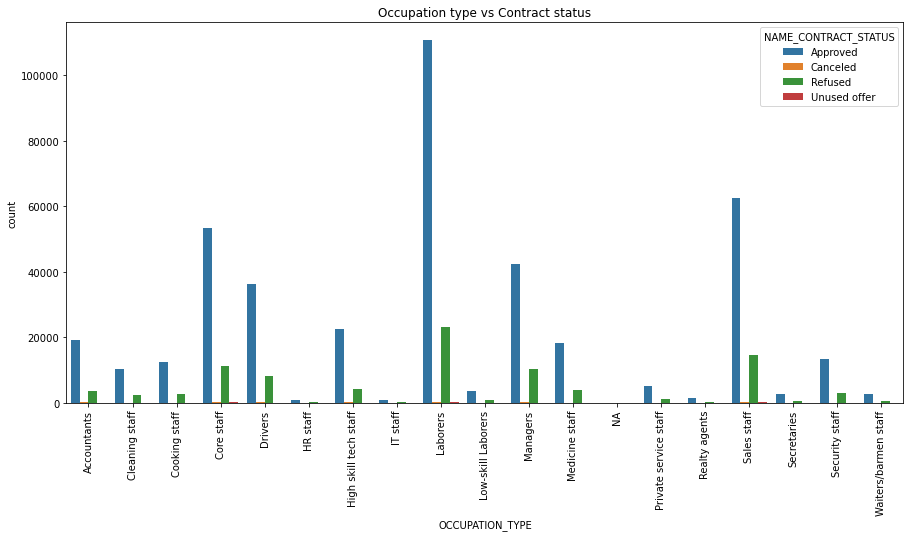

In [548]:
categorical_categorical_countplot(merged_df[merged_df['OCCUPATION_TYPE']!='NA'],'OCCUPATION_TYPE','NAME_CONTRACT_STATUS','Occupation type vs Contract status', (15,7), rot=90, perc_flag=False)

### OCCUPATION_TYPE vs INCOME_GROUPS vs TARGET

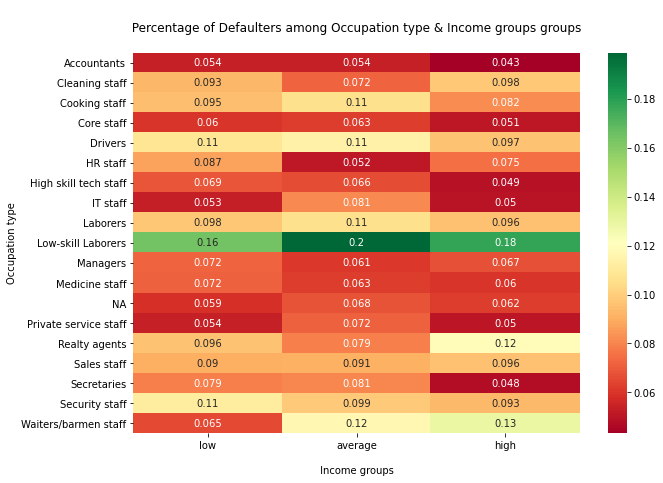

In [549]:
heatmapper(merged_df, 'OCCUPATION_TYPE', 'INCOME_GROUPS', 'TARGET', 'Occupation type','Income groups', fig_size=(10,7), rot=0)

## ORGANIZATION_TYPE

### ORGANIZATION_TYPE vs NAME_CONTRACT_STATUS

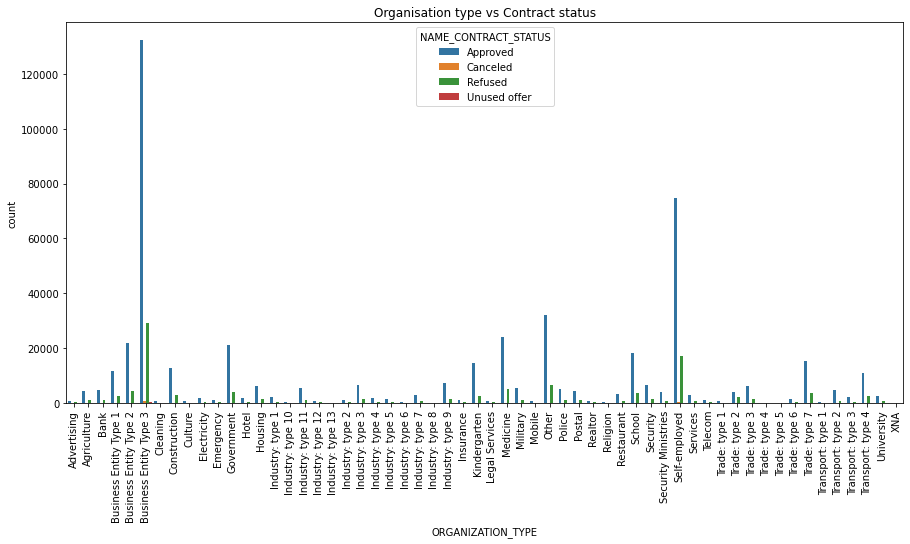

In [550]:
categorical_categorical_countplot(merged_df[merged_df['ORGANIZATION_TYPE']!='XNA'],'ORGANIZATION_TYPE','NAME_CONTRACT_STATUS','Organisation type vs Contract status', (15,7), rot=90, perc_flag=False)

### ORGANIZATION_TYPE vs INCOME_GROUPS vs TARGET

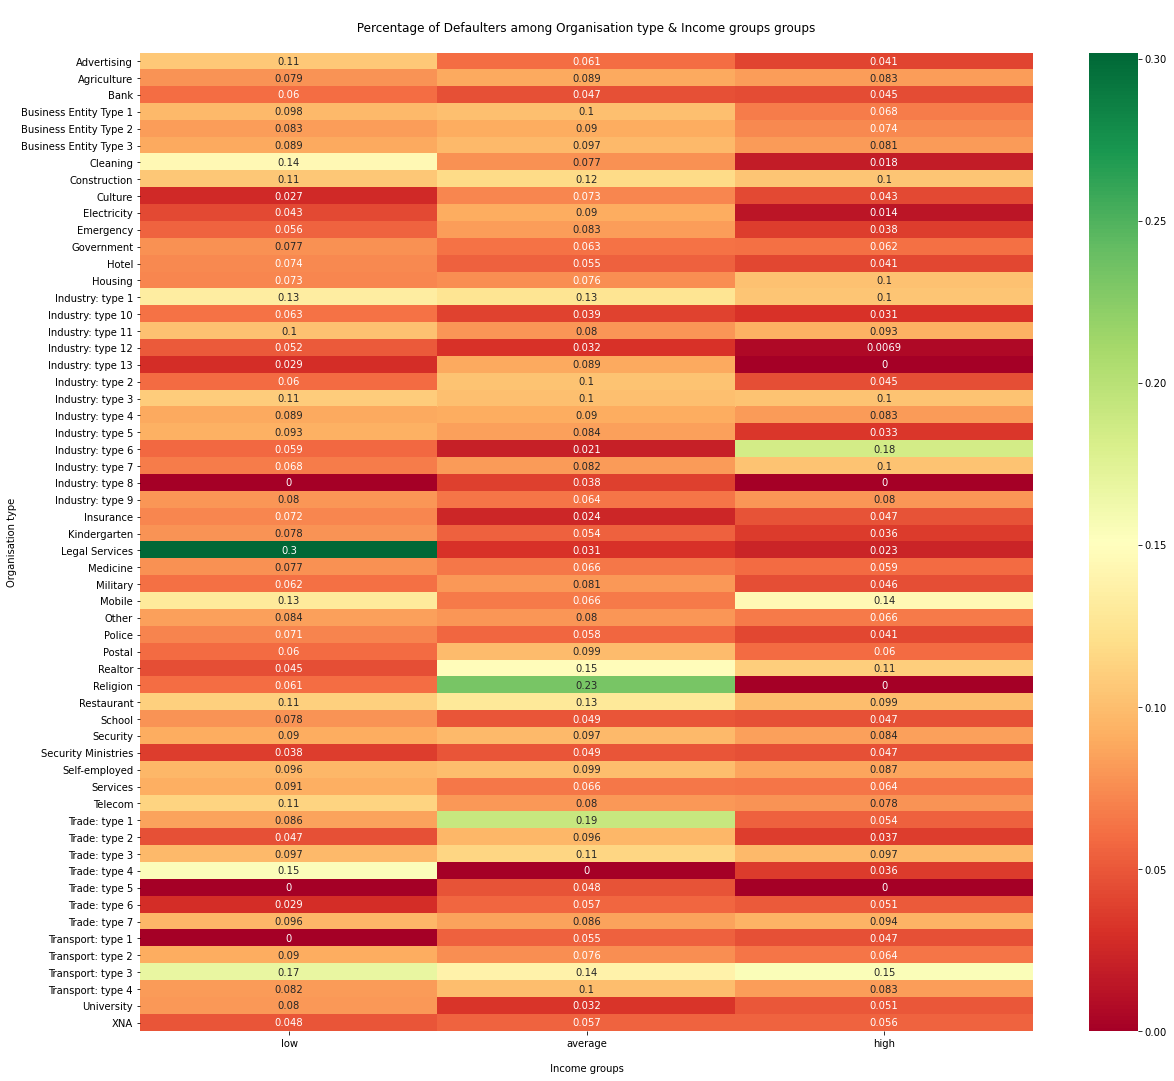

In [551]:
heatmapper(merged_df, 'ORGANIZATION_TYPE', 'INCOME_GROUPS', 'TARGET', 'Organisation type','Income groups', fig_size=(20,18), rot=0)

## AGE_GROUPS

### AGE_GROUPS vs NAME_CONTRACT_STATUS

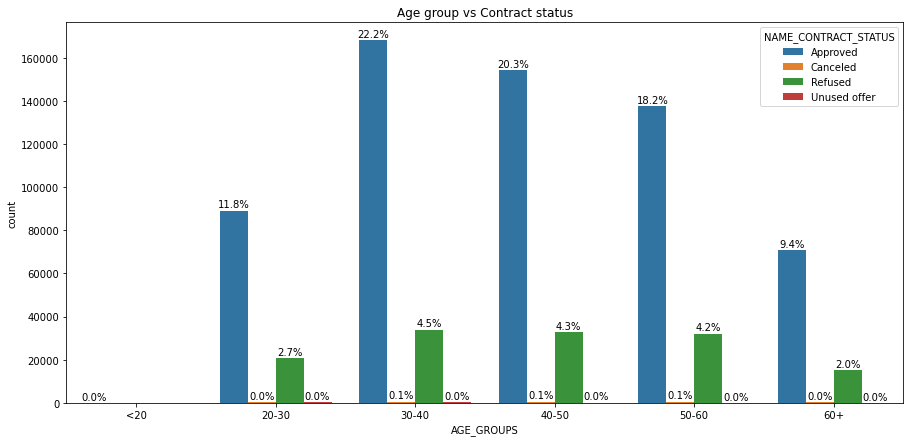

In [552]:
categorical_categorical_countplot(merged_df,'AGE_GROUPS','NAME_CONTRACT_STATUS','Age group vs Contract status', (15,7), rot=0)

## EMP_EXP_GROUPS

### EMP_EXP_GROUPS vs NAME_CONTRACT_STATUS

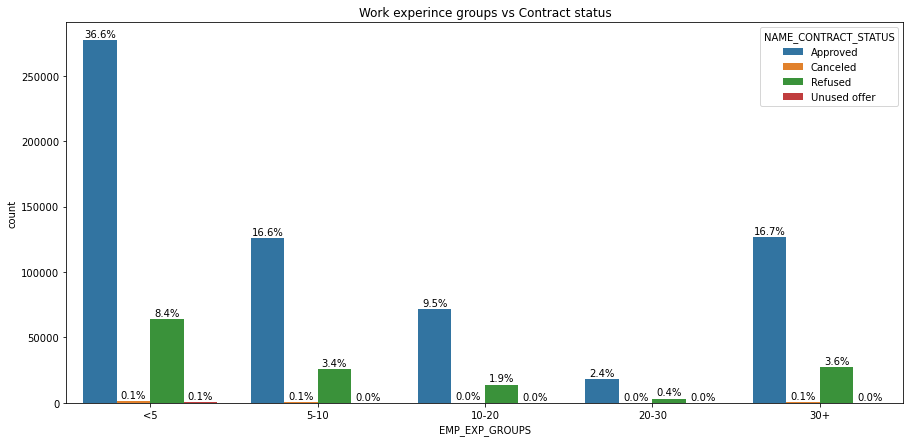

In [553]:
categorical_categorical_countplot(merged_df,'EMP_EXP_GROUPS','NAME_CONTRACT_STATUS','Work experince groups vs Contract status', (15,7), rot=0)

## NAME_CONTRACT_TYPE

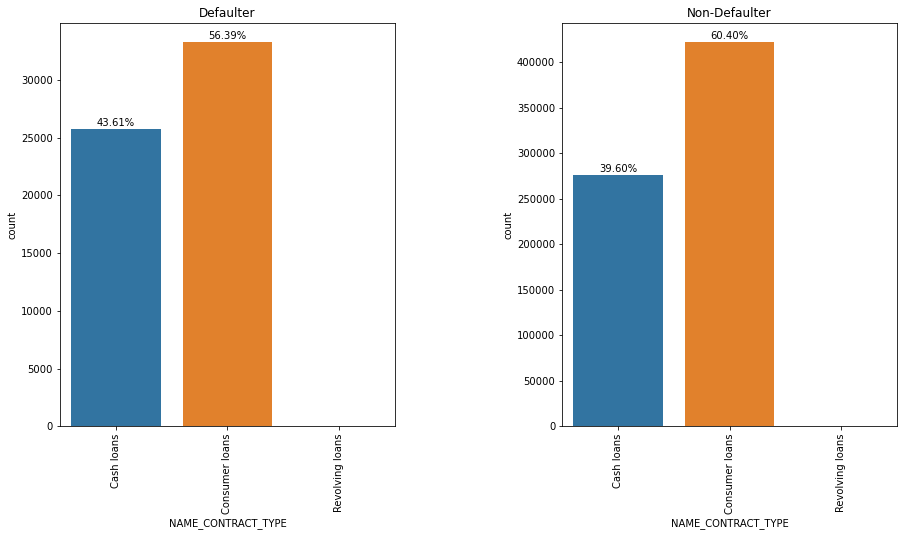

In [554]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('NAME_CONTRACT_TYPE', d1, d2, (15,7), rot=90)

## NAME_CLIENT_TYPE

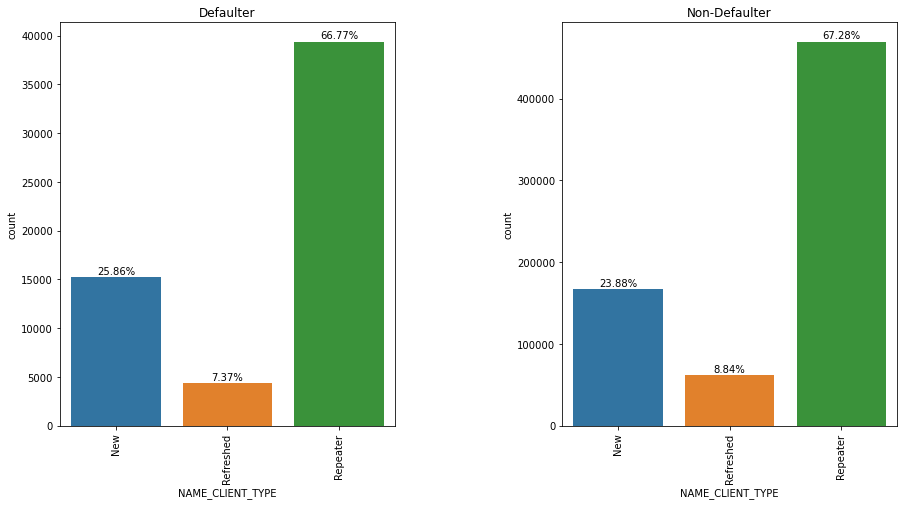

In [555]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('NAME_CLIENT_TYPE', d1, d2, (15,7), rot=90)

## NAME_PRODUCT_TYPE

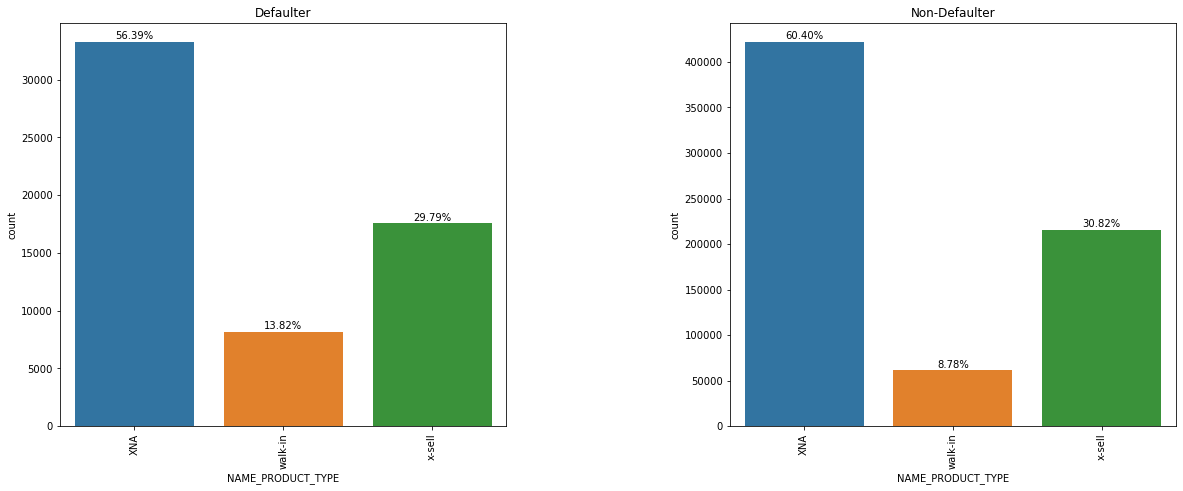

In [556]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('NAME_PRODUCT_TYPE', d1, d2, (20,7), rot=90)

## CHANNEL_TYPE

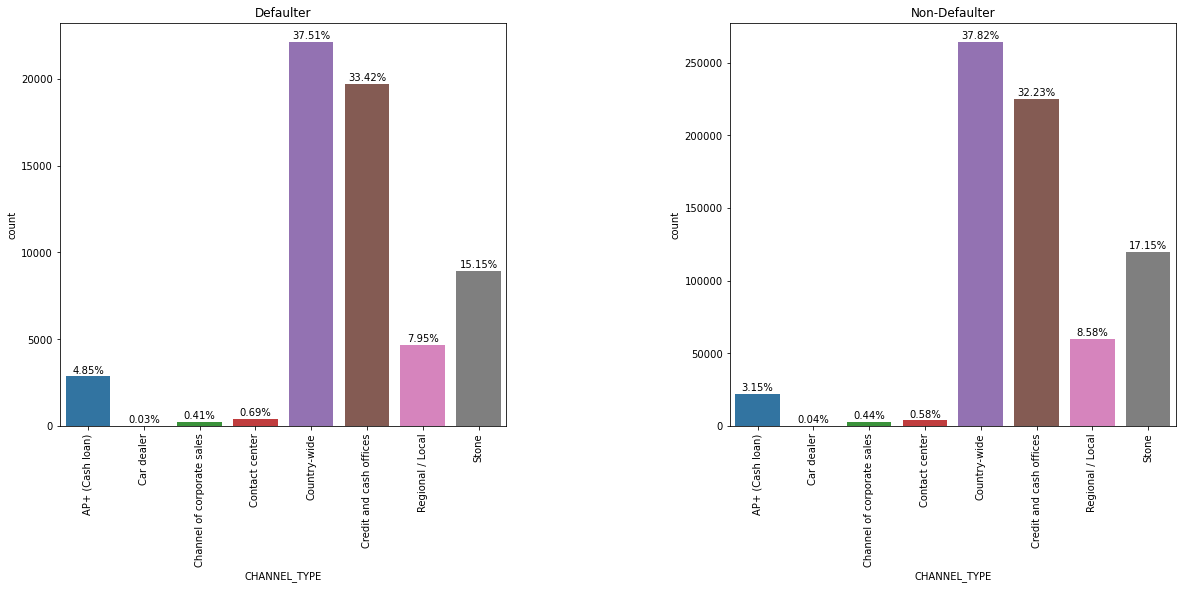

In [557]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('CHANNEL_TYPE', d1, d2, (20,7), rot=90)

## NAME_YIELD_GROUP

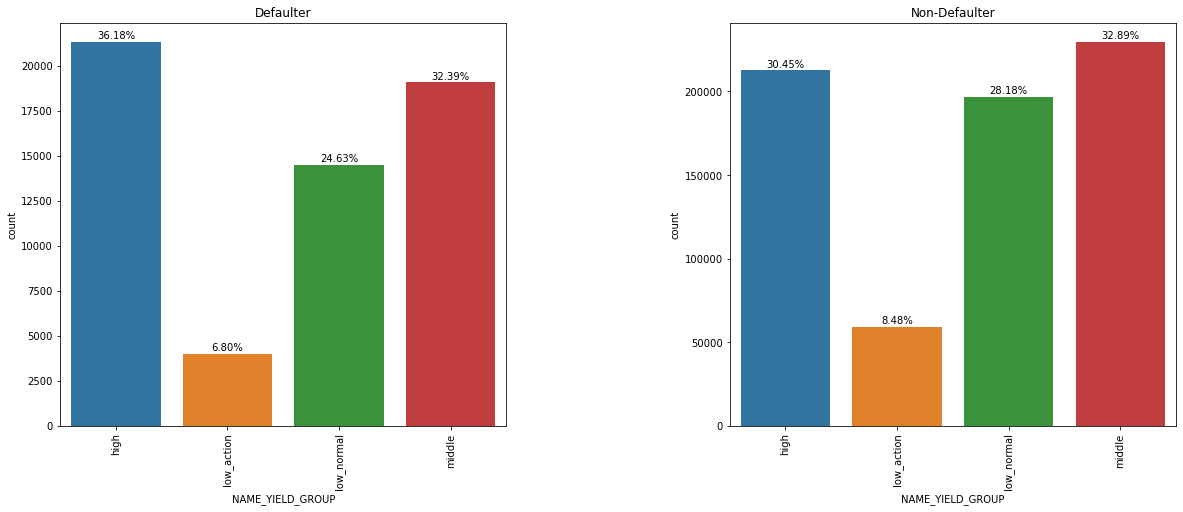

In [558]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('NAME_YIELD_GROUP', d1, d2, (20,7), rot=90)

## NAME_SELLER_INDUSTRY

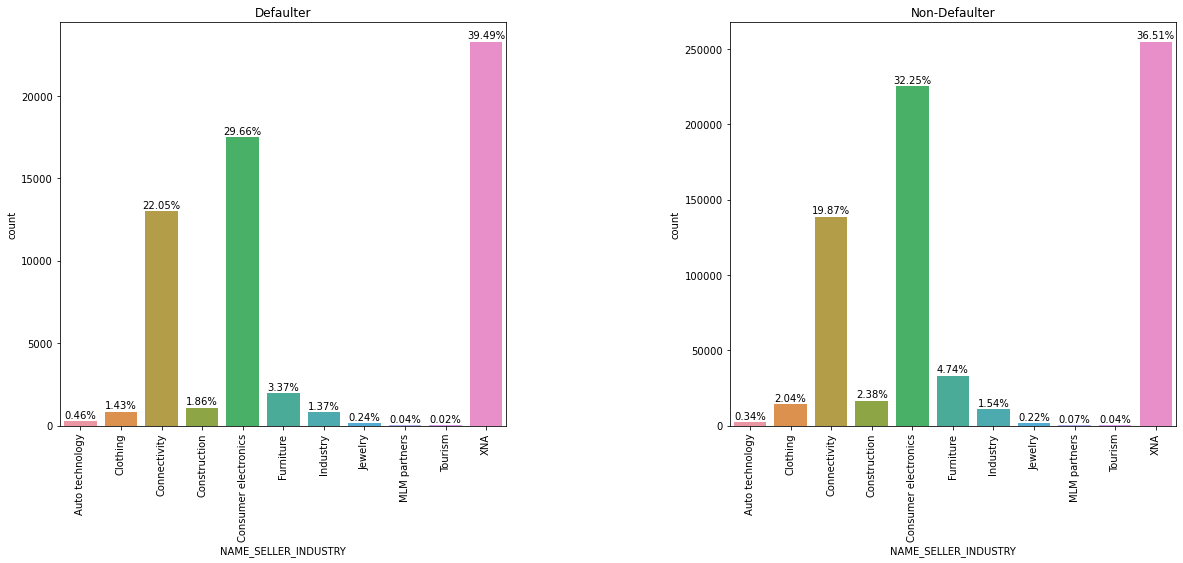

In [559]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('NAME_SELLER_INDUSTRY', d1, d2, (20,7), rot=90)

## PRODUCT_COMBINATION

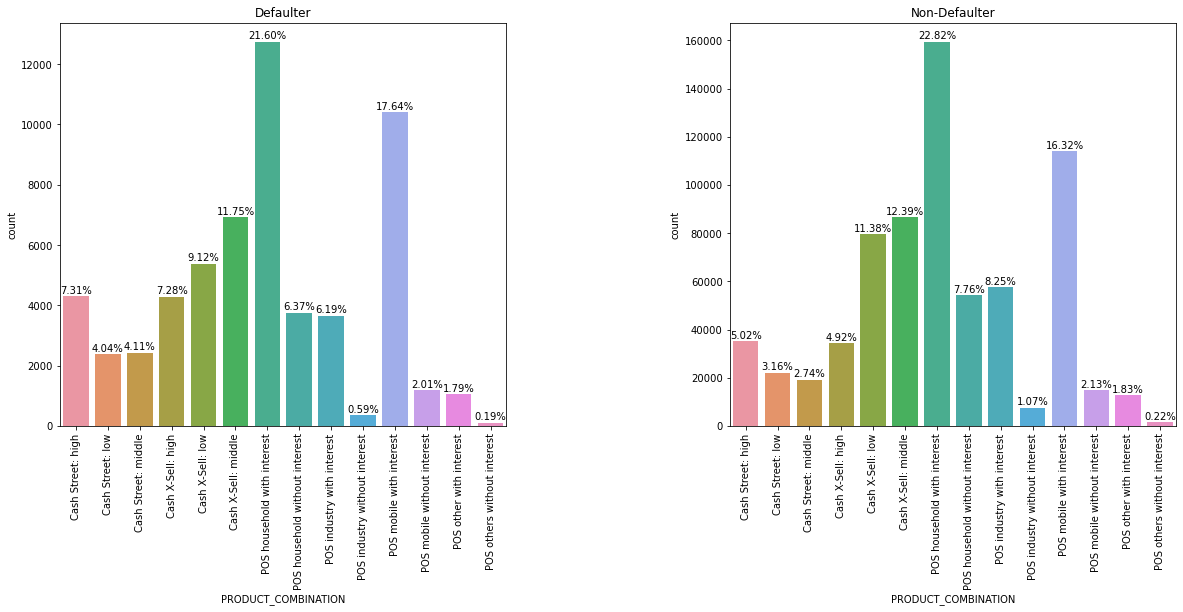

In [560]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('PRODUCT_COMBINATION', d1, d2, (20,7), rot=90)

## PREV_AMT_CREDIT_GROUPS

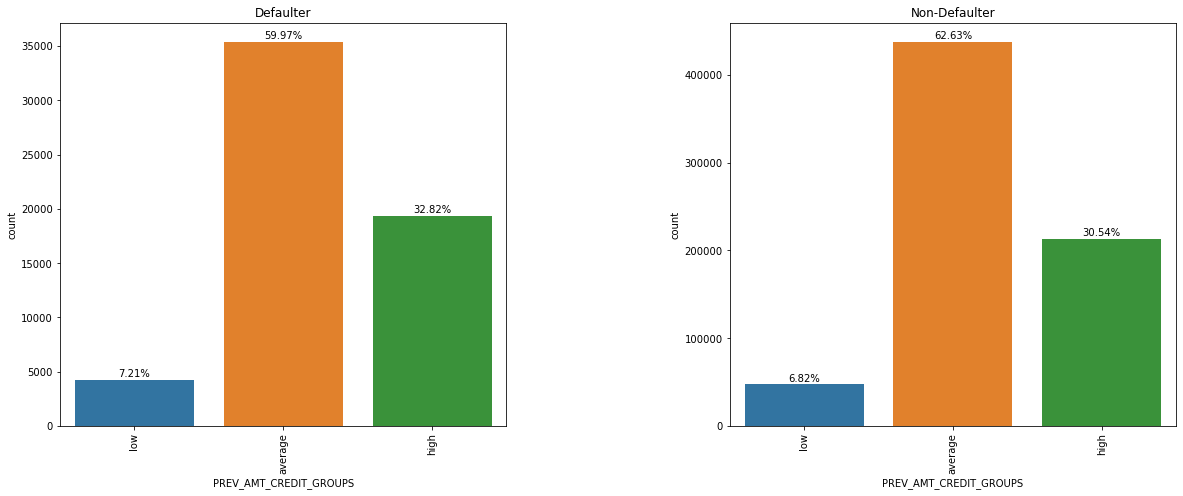

In [561]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('PREV_AMT_CREDIT_GROUPS', d1, d2, (20,7), rot=90)

## PREV_GOODS_PRICE_GROUPS

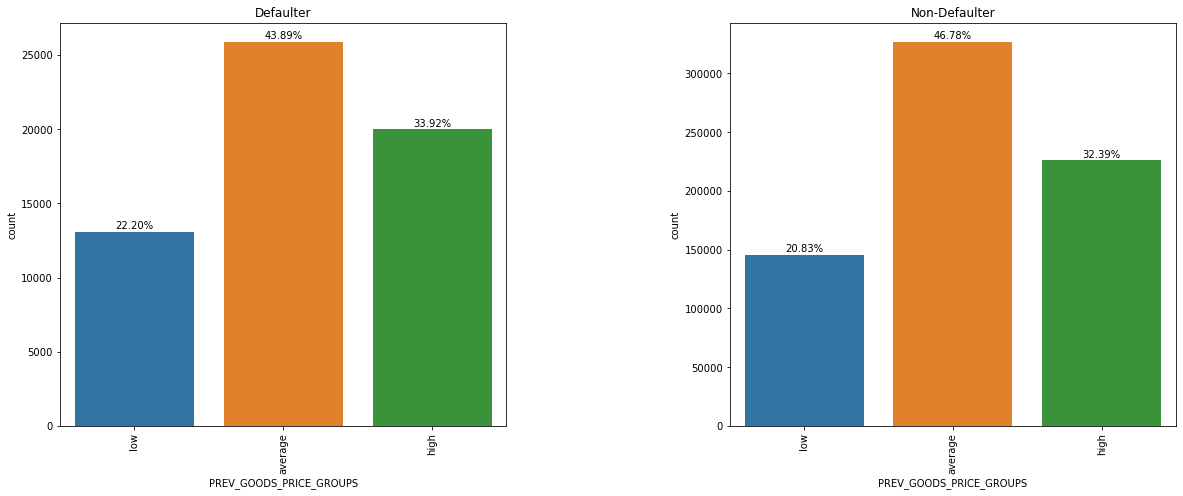

In [562]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('PREV_GOODS_PRICE_GROUPS', d1, d2, (20,7), rot=90)

## DECISION_GROUPS

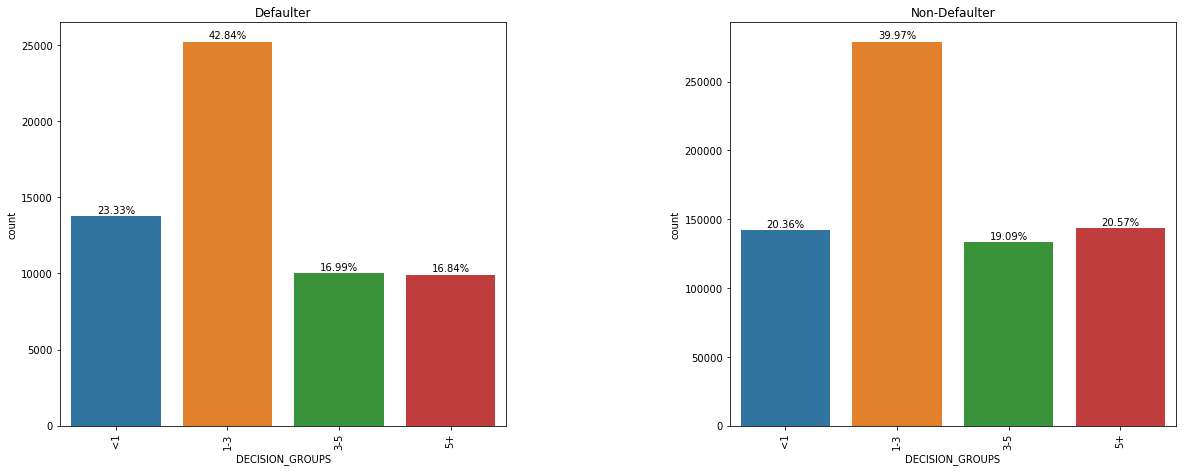

In [563]:
d1 = merged_df[merged_df['TARGET']==1]
d2 = merged_df[merged_df['TARGET']==0]

categorical_plots('DECISION_GROUPS', d1, d2, (20,7), rot=90)

## Correlation of numerical variables

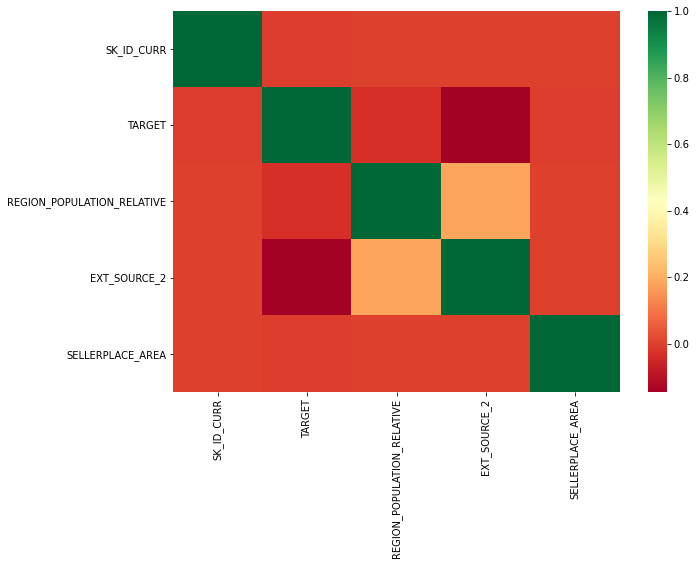

In [564]:
plt.figure(figsize=(10,7))
sns.heatmap(merged_df.corr(),cmap='RdYlGn')
plt.show()

## REGION_POPULATION_RELATIVE

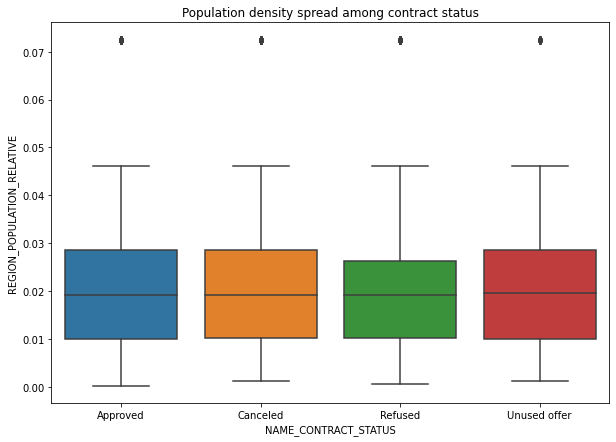

In [565]:
# using boxplots 

categorical_continous_boxplot(merged_df,'NAME_CONTRACT_STATUS','REGION_POPULATION_RELATIVE','Population density spread among contract status',(10,7))

## SELLERPLACE_AREA

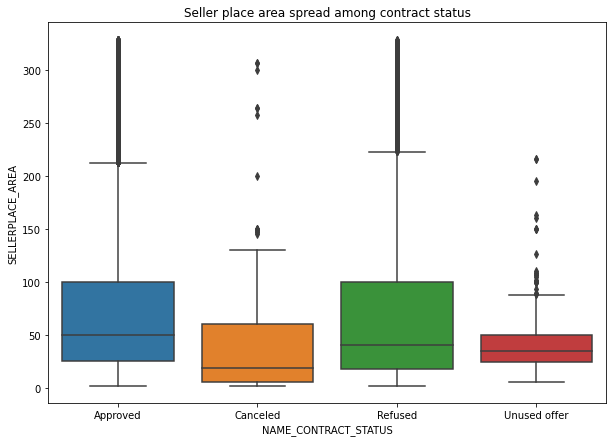

In [566]:
#using boxplot 

categorical_continous_boxplot(merged_df[(merged_df['SELLERPLACE_AREA']<330) & (merged_df['SELLERPLACE_AREA']>1)],'NAME_CONTRACT_STATUS','SELLERPLACE_AREA','Seller place area spread among contract status',(10,7))

## EXT_SOURCE_2

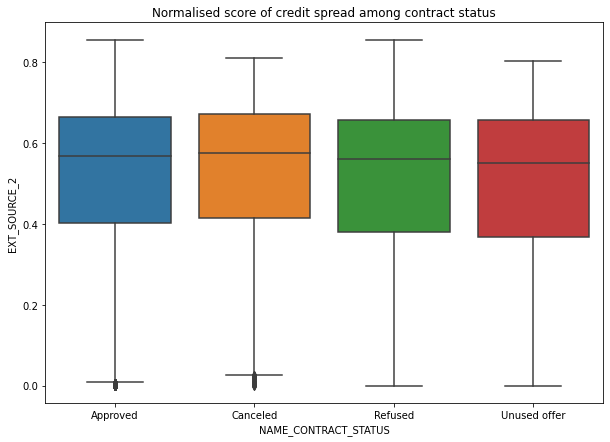

In [567]:
# using boxplots 

categorical_continous_boxplot(merged_df,'NAME_CONTRACT_STATUS','EXT_SOURCE_2','Normalised score of credit spread among contract status',(10,7))

In [568]:
# based on analysis removing some irrelavant columns

cols = ['ORGANIZATION_TYPE','NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
       'NAME_PRODUCT_TYPE','CHANNEL_TYPE','PREV_AMT_CREDIT_GROUPS','PREV_GOODS_PRICE_GROUPS']

for col in cols:
    merged_df.drop(col, axis=1, inplace=True)
    

- ***Thus from the above EDA analysis we have finalised some features that could contribute to deciding whether a client will default or not in the payment of his loan***

In [569]:
list(merged_df.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_2',
 'INCOME_GROUPS',
 'CREDIT_GROUPS',
 'GOODS_PRICE_GROUPS',
 'AGE_GROUPS',
 'EMP_EXP_GROUPS',
 'NAME_CONTRACT_STATUS',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DECISION_GROUPS']

In [570]:
len(list(merged_df.columns))

20